<a href="https://colab.research.google.com/github/MIHIR-110103/Time-Series-Analysis/blob/main/TSA_Mini_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPT-1

In [ ]:
!pip install pandas plotly statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

link1 = f'https://drive.google.com/uc?id=1RwNxuRZys2g3b2BxFOh--iEwhgc7QsZ-'
df_pjme = pd.read_csv(link1)

In [ ]:
df_pjme

Datetime  PJME_MW
0       2002-12-31 01:00:00  26498.0
1       2002-12-31 02:00:00  25147.0
2       2002-12-31 03:00:00  24574.0
3       2002-12-31 04:00:00  24393.0
4       2002-12-31 05:00:00  24860.0
...                     ...      ...
145361  2018-01-01 20:00:00  44284.0
145362  2018-01-01 21:00:00  43751.0
145363  2018-01-01 22:00:00  42402.0
145364  2018-01-01 23:00:00  40164.0
145365  2018-01-02 00:00:00  38608.0

[145366 rows x 2 columns]

In [ ]:
df_pjme.describe()

PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000

In [ ]:
df_pjme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
df_pjme['PJME_GW'] = df_pjme['PJME_MW'] / 1e3
df_pjme = df_pjme.drop(columns=['PJME_MW'])

In [ ]:
df_pjme

Datetime  PJME_GW
0       2002-12-31 01:00:00   26.498
1       2002-12-31 02:00:00   25.147
2       2002-12-31 03:00:00   24.574
3       2002-12-31 04:00:00   24.393
4       2002-12-31 05:00:00   24.860
...                     ...      ...
145361  2018-01-01 20:00:00   44.284
145362  2018-01-01 21:00:00   43.751
145363  2018-01-01 22:00:00   42.402
145364  2018-01-01 23:00:00   40.164
145365  2018-01-02 00:00:00   38.608

[145366 rows x 2 columns]

##Detecting Trend

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
df_pjme

Datetime  PJME_GW
0       2002-12-31 01:00:00   26.498
1       2002-12-31 02:00:00   25.147
2       2002-12-31 03:00:00   24.574
3       2002-12-31 04:00:00   24.393
4       2002-12-31 05:00:00   24.860
...                     ...      ...
145361  2018-01-01 20:00:00   44.284
145362  2018-01-01 21:00:00   43.751
145363  2018-01-01 22:00:00   42.402
145364  2018-01-01 23:00:00   40.164
145365  2018-01-02 00:00:00   38.608

[145366 rows x 2 columns]

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df_pjme['Date'] = df_pjme['Datetime'].dt.strftime('%Y-%m-%d')
df_pjme


Datetime  PJME_GW        Date
0      2002-12-31 01:00:00   26.498  2002-12-31
1      2002-12-31 02:00:00   25.147  2002-12-31
2      2002-12-31 03:00:00   24.574  2002-12-31
3      2002-12-31 04:00:00   24.393  2002-12-31
4      2002-12-31 05:00:00   24.860  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00   44.284  2018-01-01
145362 2018-01-01 21:00:00   43.751  2018-01-01
145363 2018-01-01 22:00:00   42.402  2018-01-01
145364 2018-01-01 23:00:00   40.164  2018-01-01
145365 2018-01-02 00:00:00   38.608  2018-01-02

[145366 rows x 3 columns]

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_GW'].sum().reset_index()

In [ ]:
df.drop(df.index[-1],inplace=True)
df

Date  PJME_GW
0     2002-01-01  714.857
1     2002-01-02  822.277
2     2002-01-03  828.285
3     2002-01-04  809.171
4     2002-01-05  729.723
...          ...      ...
6053  2018-07-29  771.910
6054  2018-07-30  790.978
6055  2018-07-31  828.938
6056  2018-08-01  941.539
6057  2018-08-02  950.233

[6058 rows x 2 columns]

In [ ]:
import plotly.express as px

detecting trends

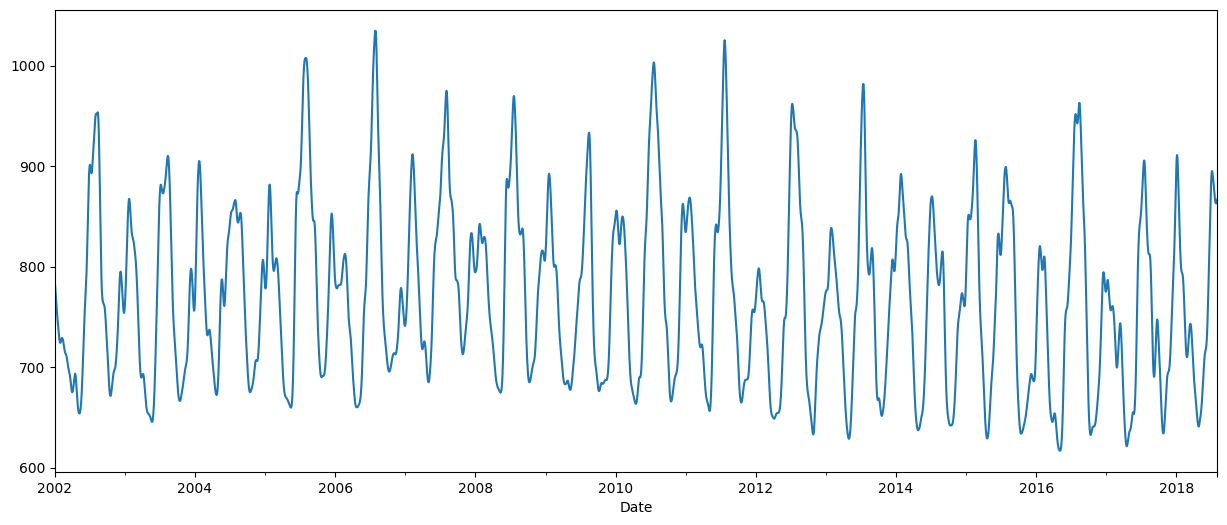

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

PJME_cycle, PJME_trend = hpfilter(df['PJME_GW'], lamb=1600)
PJME_trend.plot(figsize=(15, 6)).autoscale(axis='x', tight=True)

In [ ]:
import plotly.express as px
result_df = pd.DataFrame({'Date': df.index, 'PJME_GW': df['PJME_GW'], 'Trend': PJME_trend})
fig = px.line(result_df, x='Date', y=['PJME_GW', 'Trend'], title='Daily GigaWatt Energy Consumption Trend')
fig.update_layout(xaxis_title='Date', yaxis_title='PJME_GW', legend_title='Series')
fig.show()

##Removing Trend

###detrending manually

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_GW'].sum().reset_index()

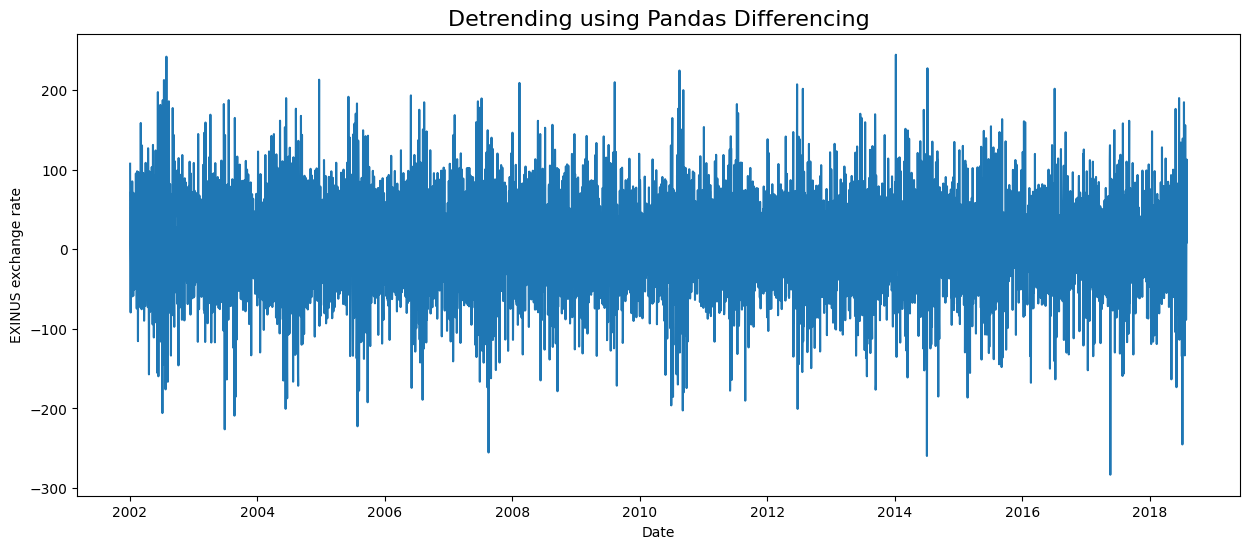

In [ ]:
diff = df['PJME_GW'].diff().dropna()
plt.figure(figsize=(15, 6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Date')
plt.ylabel('EXINUS exchange rate')
plt.show()

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_MW'].sum().reset_index()

In [ ]:
diff = df['PJME_GW'].diff().dropna()
diff_df = pd.DataFrame({'Date': df.index[1:], 'Difference': diff.values})
fig = px.line(diff_df, x='Date', y='Difference', title='Detrending using Pandas Differencing',
              labels={'Difference': 'PJME_GW exchange rate difference'},
              line_shape='linear')
fig.update_layout(xaxis_title='Date', yaxis_title='PJME_GW exchange rate difference')
fig.show()

###detrending using hp filter

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_MW'].sum().reset_index()

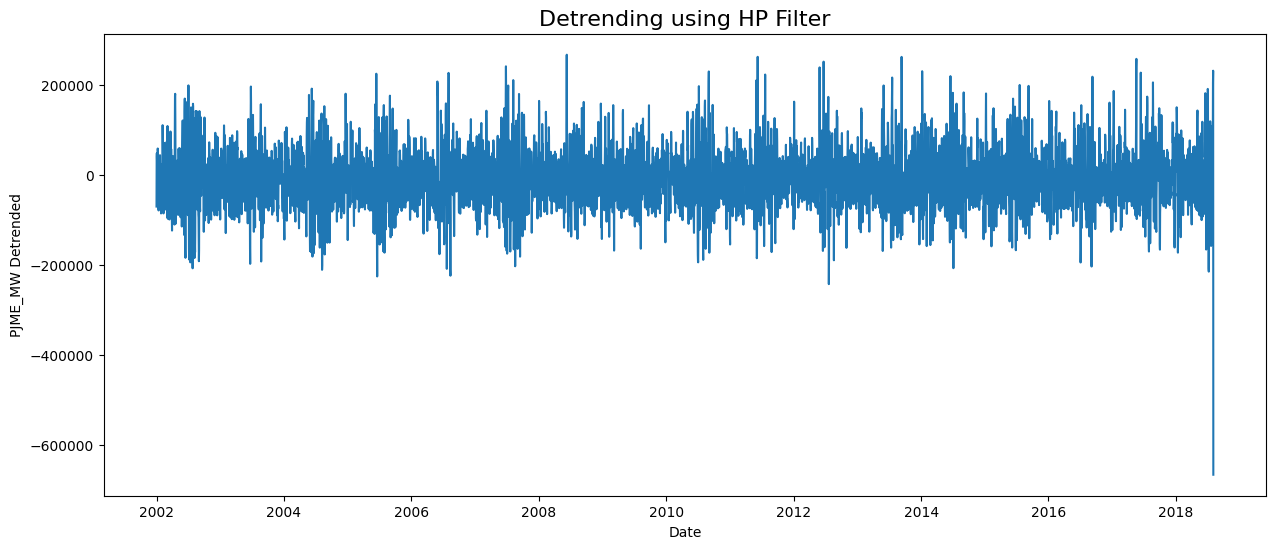

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
PJME_cycle, PJME_trend = hpfilter(df['PJME_MW'], lamb=1600)
df['trend'] = PJME_trend
detrended = df['PJME_MW'] - df['trend']
plt.figure(figsize=(15, 6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Date')
plt.ylabel('PJME_MW Detrended')
plt.show()


In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_MW'].sum().reset_index()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
PJME_cycle, PJME_trend = hpfilter(df['PJME_MW'], lamb=1600)
df['trend'] = PJME_trend
detrended = df['PJME_MW'] - df['trend']
fig = go.Figure()
fig.add_trace(go.Scatter(x=detrended.index, y=detrended, mode='lines', name='PJME_MW Detrended'))
fig.update_layout(title='Detrending using HP Filter',
                  xaxis_title='Date',
                  yaxis_title='PJME_MW Detrended',
                  showlegend=True)
fig.show()

###detrending using scipy signal

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_MW'].sum().reset_index()

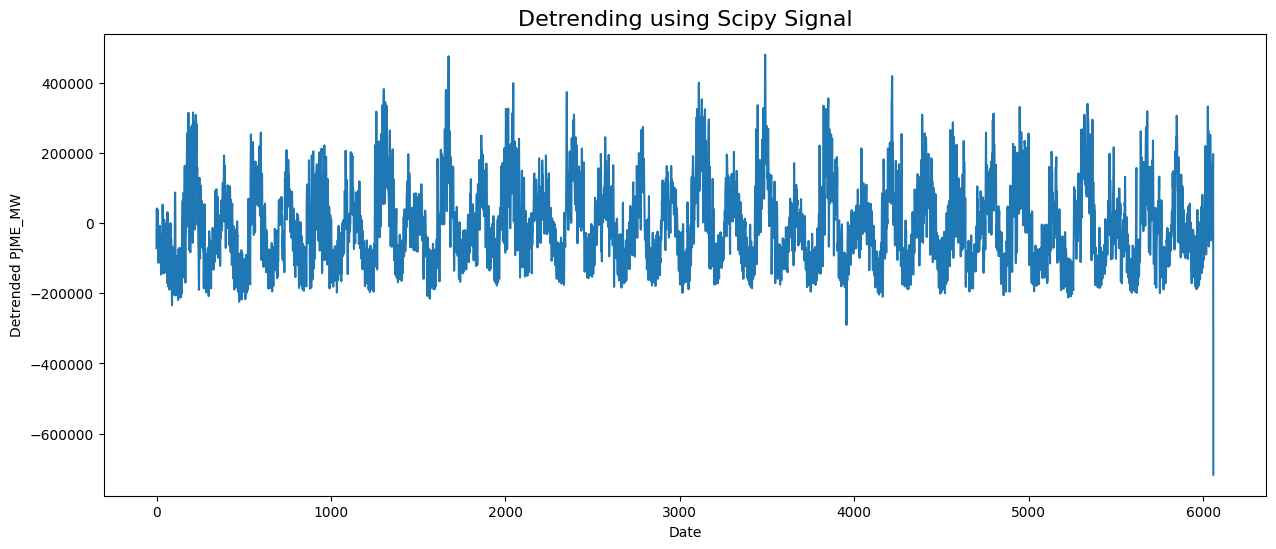

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
detrended = signal.detrend(df['PJME_MW'].values)
plt.figure(figsize=(15, 6))
plt.plot(detrended)
plt.xlabel('Date')
plt.ylabel('Detrended PJME_MW')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=detrended, mode='lines', name='Detrended PJME_MW'))
fig.update_layout(title='Detrending using Scipy Signal',
                  xaxis_title='Date',
                  yaxis_title='Detrended PJME_MW',
                  showlegend=True)
fig.show()

#EXPT-2

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_GW'].sum().reset_index()

In [ ]:
df

Date  PJME_GW
0     2002-01-01  714.857
1     2002-01-02  822.277
2     2002-01-03  828.285
3     2002-01-04  809.171
4     2002-01-05  729.723
...          ...      ...
6054  2018-07-30  790.978
6055  2018-07-31  828.938
6056  2018-08-01  941.539
6057  2018-08-02  950.233
6058  2018-08-03   35.486

[6059 rows x 2 columns]

##Detecting Seasonality using Multiple Box Plots:

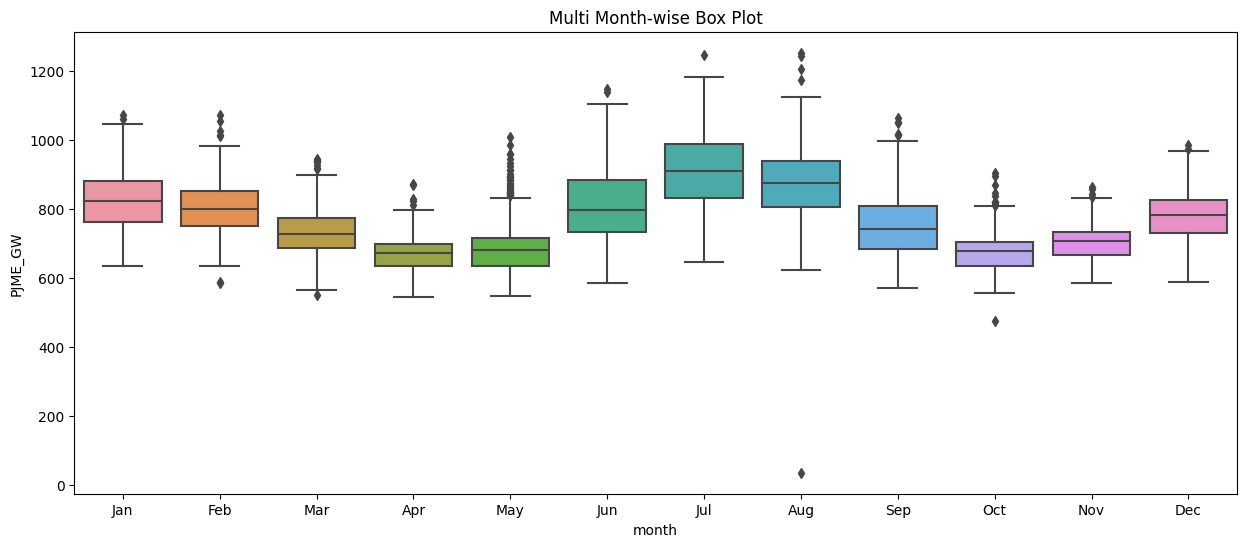

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = [d.year for d in df['Date']]
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='PJME_GW', data=df).set_title("Multi Month-wise Box Plot")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%b')
fig = px.box(df, x='month', y='PJME_GW', title="Multi Month-wise Box Plot")
fig.show()

##Detecting Seasonality using Autocorrelation Plot:

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
df.set_index('Date', inplace=True)

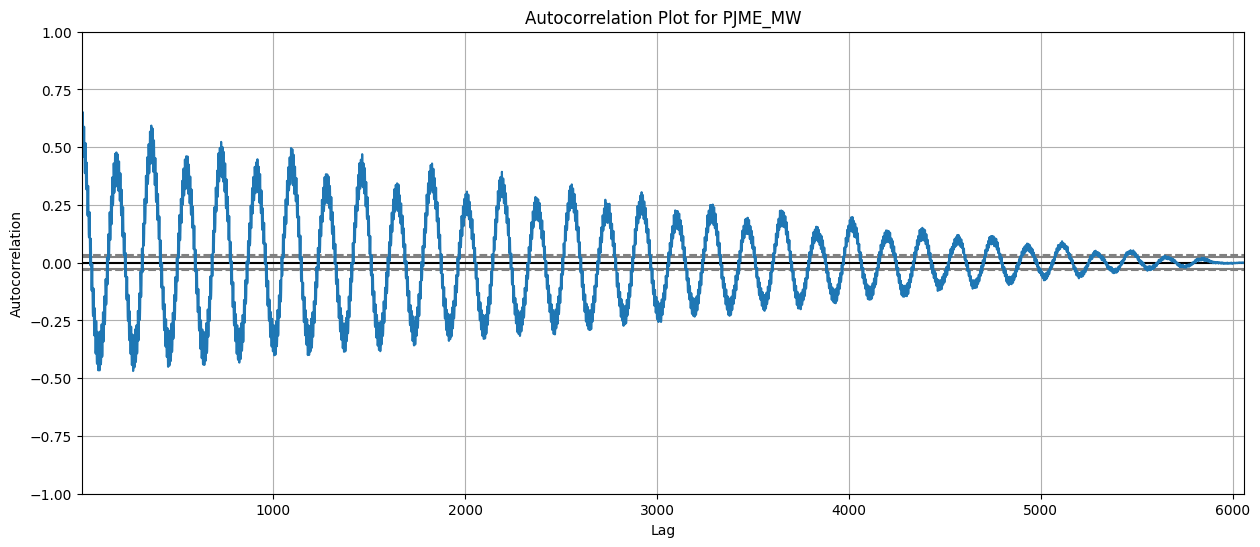

In [ ]:
plt.rcParams.update({'figure.figsize': (15, 6)})
autocorrelation_plot(df['PJME_GW'])
plt.title('Autocorrelation Plot for PJME_MW')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf
import plotly.graph_objects as go
import numpy as np
acf_values = acf(df['PJME_GW'], nlags=len(df)-1)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=acf_values,
    name='ACF',
))

fig.add_shape(type='line', x0=0, x1=len(acf_values)-1, y0=-0.1, y1=-0.05, line=dict(color='red', width=1, dash='dash'), name='-0.05 Threshold')
fig.add_shape(type='line', x0=0, x1=len(acf_values)-1, y0=0.1, y1=0.05, line=dict(color='red', width=1, dash='dash'), name='0.05 Threshold')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Autocorrelation Function",
    xaxis_title="Lag",
    yaxis_title="Autocorrelation",
    height=500,
)

fig.show()


##Seasonal Decomposition:

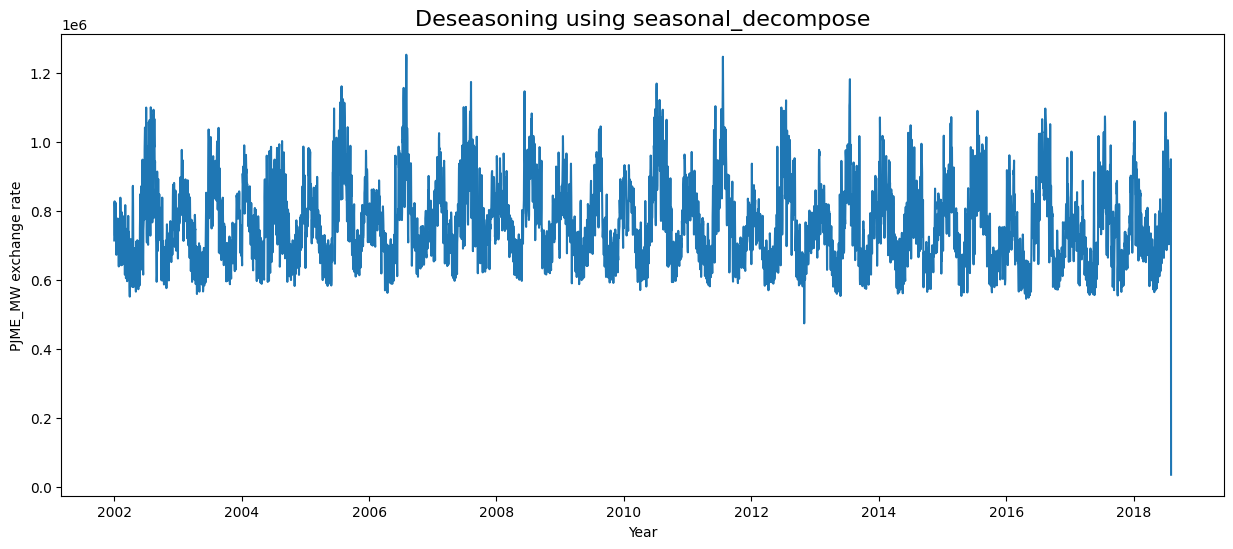

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result_mul = seasonal_decompose(df['PJME_MW'], model='multiplicative')
deseason = df['PJME_MW'] - result_mul.seasonal
plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('PJME_MW exchange rate')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
result_mul = seasonal_decompose(df['PJME_MW'], model='multiplicative')
deseason = df['PJME_MW'] - result_mul.seasonal
deseason_df = pd.DataFrame({'Date': df.index, 'Deseasoned PJME_MW': deseason.values})
fig = px.line(deseason_df, x='Date', y='Deseasoned PJME_MW', title='Deseasoning using seasonal_decompose',
              labels={'Deseasoned PJME_MW': 'PJME_MW exchange rate (Deseasoned)'},
              line_shape='linear')
fig.update_layout(xaxis_title='Date', yaxis_title='PJME_MW exchange rate (Deseasoned)')
fig.show()


##Detecting Cyclic Variations:

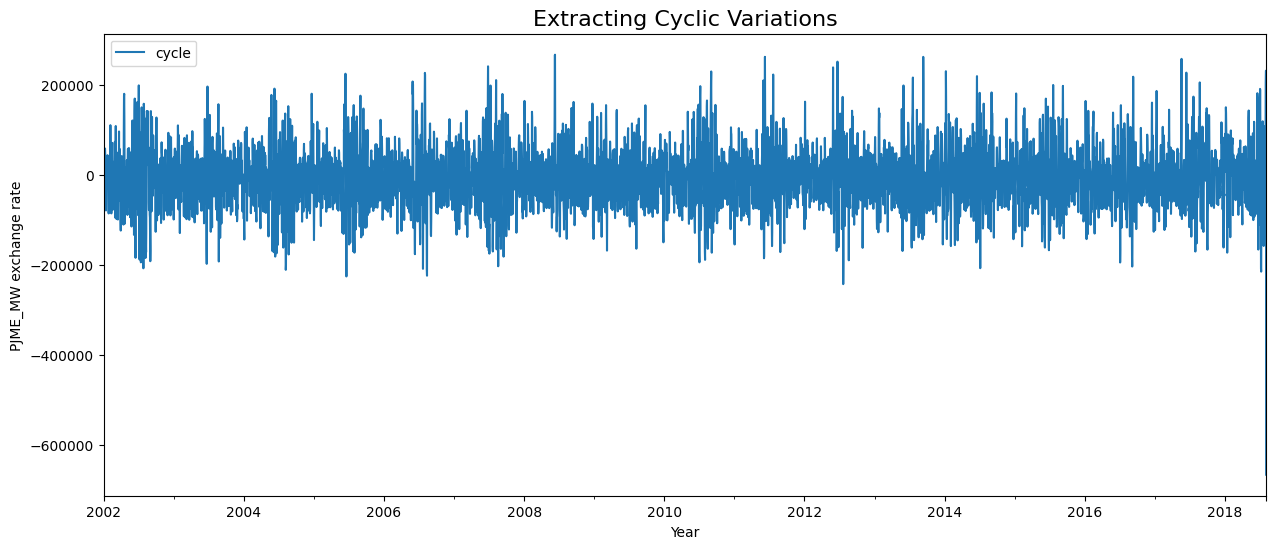

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
PJME_MW_cycle,PJME_MW_trend = hpfilter(df['PJME_MW'], lamb=1600)
df['cycle'] =PJME_MW_cycle
df['trend'] =PJME_MW_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('PJME_MW exchange rate')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
PJME_MW_cycle, PJME_MW_trend = hpfilter(df['PJME_MW'], lamb=1600)
df['cycle'] = PJME_MW_cycle
df['trend'] = PJME_MW_trend
fig = px.line(df, x=df.index, y=['cycle'], title='Extracting Cyclic Variations using HP Filter',
              labels={'cycle': 'PJME_MW exchange rate (Cyclic)'},
              line_shape='linear')
fig.update_layout(xaxis_title='Year', yaxis_title='PJME_MW exchange rate (Cyclic)')
fig.show()


#EXPT-3

## Resampling

In [ ]:
df.drop(df.index[-1],inplace=True)

In [ ]:
df.describe()

PJME_MW         year
count  6.058000e+03  6058.000000
mean   7.697818e+05  2009.800594
std    1.125994e+05     4.792114
min    4.744570e+05  2002.000000
25%    6.870612e+05  2006.000000
50%    7.525230e+05  2010.000000
75%    8.392702e+05  2014.000000
max    1.253516e+06  2018.000000

In [ ]:
df.PJME_MW.resample('M').mean()

Date
2002-01-31    744807.161290
2002-02-28    725740.000000
2002-03-31    693006.161290
2002-04-30    683882.400000
2002-05-31    673767.677419
                  ...      
2018-04-30    656478.400000
2018-05-31    686398.838710
2018-06-30    768347.266667
2018-07-31    880721.709677
2018-08-31    945886.000000
Freq: M, Name: PJME_MW, Length: 200, dtype: float64

In [ ]:
df.PJME_MW.resample('Q').mean()

Date
2002-03-31    721032.588889
2002-06-30    720715.736264
2002-09-30    859872.391304
2002-12-31    726454.173913
2003-03-31    792991.922222
                  ...      
2017-09-30    800301.043478
2017-12-31    711143.000000
2018-03-31    777585.133333
2018-06-30    703550.923077
2018-09-30    884671.060606
Freq: Q-DEC, Name: PJME_MW, Length: 67, dtype: float64

In [ ]:
df.PJME_MW.resample('Y').mean()

Date
2002-12-31    757315.367123
2003-12-31    760596.515068
2004-12-31    774314.095628
2005-12-31    799268.964384
2006-12-31    777644.887671
2007-12-31    806539.063014
2008-12-31    790130.297814
2009-12-31    764262.279452
2010-12-31    794156.079452
2011-12-31    776662.043836
2012-12-31    754390.770492
2013-12-31    760782.868493
2014-12-31    755913.767123
2015-12-31    761025.460274
2016-12-31    752107.994536
2017-12-31    735621.879452
2018-12-31    762616.546729
Freq: A-DEC, Name: PJME_MW, dtype: float64

In [ ]:
df.PJME_MW.resample('W').mean()

Date
2002-01-06    772013.166667
2002-01-13    755697.285714
2002-01-20    754869.142857
2002-01-27    723396.714286
2002-02-03    700715.714286
                  ...      
2018-07-08    923039.571429
2018-07-15    874080.857143
2018-07-22    854690.285714
2018-07-29    877963.714286
2018-08-05    877922.000000
Freq: W-SUN, Name: PJME_MW, Length: 866, dtype: float64

In [ ]:
df.PJME_MW.resample('SM').mean()

Date
2001-12-31    762887.928571
2002-01-15    729973.187500
2002-01-31    742806.533333
2002-02-15    701647.923077
2002-02-28    713002.466667
                  ...      
2018-05-31    712827.866667
2018-06-15    812713.800000
2018-06-30    910330.266667
2018-07-15    858778.375000
2018-07-31    906903.333333
Freq: SM-15, Name: PJME_MW, Length: 399, dtype: float64

## Windowing Function

In [ ]:
df.rolling(window=4).mean()

PJME_MW    year
Date                         
2002-01-01        NaN     NaN
2002-01-02        NaN     NaN
2002-01-03        NaN     NaN
2002-01-04  793647.50  2002.0
2002-01-05  797364.00  2002.0
...               ...     ...
2018-07-29  858428.00  2018.0
2018-07-30  826845.50  2018.0
2018-07-31  804931.00  2018.0
2018-08-01  833341.25  2018.0
2018-08-02  877922.00  2018.0

[6058 rows x 2 columns]

In [ ]:
df.expanding(min_periods=4).mean()

PJME_MW         year
Date                                  
2002-01-01            NaN          NaN
2002-01-02            NaN          NaN
2002-01-03            NaN          NaN
2002-01-04  793647.500000  2002.000000
2002-01-05  780862.600000  2002.000000
...                   ...          ...
2018-07-29  769710.356459  2009.795177
2018-07-30  769713.868869  2009.796532
2018-07-31  769723.648283  2009.797886
2018-08-01  769752.014694  2009.799241
2018-08-02  769781.806867  2009.800594

[6058 rows x 2 columns]

In [ ]:
df.expanding(min_periods=4).mean()

PJME_MW         year
Date                                  
2002-01-01            NaN          NaN
2002-01-02            NaN          NaN
2002-01-03            NaN          NaN
2002-01-04  793647.500000  2002.000000
2002-01-05  780862.600000  2002.000000
...                   ...          ...
2018-07-29  769710.356459  2009.795177
2018-07-30  769713.868869  2009.796532
2018-07-31  769723.648283  2009.797886
2018-08-01  769752.014694  2009.799241
2018-08-02  769781.806867  2009.800594

[6058 rows x 2 columns]

In [ ]:
df.ewm(com=0.5).mean().head(10)

PJME_MW    year
Date                             
2002-01-01  714857.000000  2002.0
2002-01-02  795422.000000  2002.0
2002-01-03  818173.307692  2002.0
2002-01-04  812096.750000  2002.0
2002-01-05  756953.991736  2002.0
2002-01-06  737468.601648  2002.0
2002-01-07  779183.274474  2002.0
2002-01-08  809539.051524  2002.0
2002-01-09  810265.054060  2002.0
2002-01-10  773632.397643  2002.0

## Shifting

In [ ]:
df.shift(periods=3)

PJME_MW month    year
Date                              
2002-01-01       NaN  None     NaN
2002-01-02       NaN  None     NaN
2002-01-03       NaN  None     NaN
2002-01-04  714857.0   Jan  2002.0
2002-01-05  822277.0   Jan  2002.0
...              ...   ...     ...
2018-07-29  917308.0   Jul  2018.0
2018-07-30  916596.0   Jul  2018.0
2018-07-31  827898.0   Jul  2018.0
2018-08-01  771910.0   Jul  2018.0
2018-08-02  790978.0   Jul  2018.0

[6058 rows x 3 columns]

In [ ]:
df.shift(periods=-1)

PJME_MW month    year
Date                              
2002-01-01  822277.0   Jan  2002.0
2002-01-02  828285.0   Jan  2002.0
2002-01-03  809171.0   Jan  2002.0
2002-01-04  729723.0   Jan  2002.0
2002-01-05  727766.0   Jan  2002.0
...              ...   ...     ...
2018-07-29  790978.0   Jul  2018.0
2018-07-30  828938.0   Jul  2018.0
2018-07-31  941539.0   Aug  2018.0
2018-08-01  950233.0   Aug  2018.0
2018-08-02       NaN  None     NaN

[6058 rows x 3 columns]

In [ ]:
df.shift(periods=2, axis =1)

PJME_MW  month      year
Date                                
2002-01-01      NaN    NaN  714857.0
2002-01-02      NaN    NaN  822277.0
2002-01-03      NaN    NaN  828285.0
2002-01-04      NaN    NaN  809171.0
2002-01-05      NaN    NaN  729723.0
...             ...    ...       ...
2018-07-29      NaN    NaN  771910.0
2018-07-30      NaN    NaN  790978.0
2018-07-31      NaN    NaN  828938.0
2018-08-01      NaN    NaN  941539.0
2018-08-02      NaN    NaN  950233.0

[6058 rows x 3 columns]

In [ ]:
df.shift(periods=3,fill_value=0)

PJME_MW month  year
Date                            
2002-01-01       0.0     0     0
2002-01-02       0.0     0     0
2002-01-03       0.0     0     0
2002-01-04  714857.0   Jan  2002
2002-01-05  822277.0   Jan  2002
...              ...   ...   ...
2018-07-29  917308.0   Jul  2018
2018-07-30  916596.0   Jul  2018
2018-07-31  827898.0   Jul  2018
2018-08-01  771910.0   Jul  2018
2018-08-02  790978.0   Jul  2018

[6058 rows x 3 columns]

#EXPT-4

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

##Simple Exponential Smoothing:

In [ ]:
df.reset_index(inplace=True)
df

Date  PJME_GW
0    2002-01-01  714.857
1    2002-01-02  822.277
2    2002-01-03  828.285
3    2002-01-04  809.171
4    2002-01-05  729.723
...         ...      ...
6053 2018-07-29  771.910
6054 2018-07-30  790.978
6055 2018-07-31  828.938
6056 2018-08-01  941.539
6057 2018-08-02  950.233

[6058 rows x 2 columns]

In [ ]:
df = df.drop(df[df.index == -1].index)

In [ ]:
X = df['PJME_GW']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 31233.548297366688
MAE is : 157.40690000000004
RMSE is : 176.73015672874476
MAPE is : 17.344707477011834
R2 is : -3.060493527566769

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 7732.593176923713
MAE is : 72.11456666666665
RMSE is : 87.93516462100763
MAPE is : 8.676416006759299
R2 is : -0.0052698543012767995

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 13978.925013400656
MAE is : 91.17931620475294
RMSE is : 118.23250404774761
MAPE is : 11.511010199770528
R2 is : -0.8173194412253235

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 23527.95234846328
MAE is : 128.1692039742778
RMSE is : 153.38824058076708
MAPE is : 15.974144352979183
R2 is : -2.058733427219639

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 32691.332967510152
MAE is : 158.11159290538416
RMSE is : 180.80744721252537
MAPE is : 19.5016632980535
R2 is : -3.25001170

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

<ipython-input-60-d993ad97386a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

<ipython-input-60-d993ad97386a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

<ipython-input-60-d993ad97386a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pan


MAE is : 180.37680184155582
RMSE is : 200.5688106337077
MAPE is : 22.093953841761245
R2 is : -4.229790546392511

Fitting for smoothing level= 0.6
Evaluation metric results:-
MSE is : 45980.887922334514
MAE is : 195.67531976696065
RMSE is : 214.43154600555982
MAPE is : 23.875127486457785
R2 is : -4.977710121912518

Fitting for smoothing level= 0.7
Evaluation metric results:-
MSE is : 50162.3832803112
MAE is : 206.08329899309885
RMSE is : 223.96960347402324
MAPE is : 25.086906194862042
R2 is : -5.521322223712886

Fitting for smoothing level= 0.8
Evaluation metric results:-
MSE is : 52993.660504082334
MAE is : 212.84173309680156
RMSE is : 230.20351974737991
MAPE is : 25.87377618865034
R2 is : -5.889400250980739

Fitting for smoothing level= 0.9
Evaluation metric results:-
MSE is : 54626.80076724544
MAE is : 216.64427897088174
RMSE is : 233.72377022298232
MAPE is : 26.316498452773303
R2 is : -6.1017154002249745

Fitting for smoothing level= 1
Evaluation metric results:-
MSE is : 55174.050

<ipython-input-60-d993ad97386a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

<ipython-input-60-d993ad97386a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

<ipython-input-60-d993ad97386a>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to est

smoothing parameter        RMSE
1                   0.1   87.935165
2                   0.2  118.232504
3                   0.3  153.388241
0                   0.0  176.730157
4                   0.4  180.807447
5                   0.5  200.568811
6                   0.6  214.431546
7                   0.7  223.969603
8                   0.8  230.203520
9                   0.9  233.723770
10                  1.0  234.891572

In [ ]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 7732.593176923713
MAE is : 72.11456666666665
RMSE is : 87.93516462100763
MAPE is : 8.676416006759299
R2 is : -0.0052698543012767995



In [ ]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 55170.74875035407
MAE is : 217.8960568572131
RMSE is : 234.8845434471031
MAPE is : 26.462240268485065
R2 is : -6.172430941210493



In [ ]:
fitSESauto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  endog   No. Observations:                 6028
Model:             SimpleExpSmoothing   SSE                       21417280.411
Optimized:                       True   AIC                          49286.144
Trend:                           None   BIC                          49299.552
Seasonal:                        None   AICC                         49286.150
Seasonal Periods:                None   Date:                 Wed, 06 Dec 2023
Box-Cox:                        False   Time:                         17:17:19
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              714.85700                  l.0                False
------------------------------------------------------------------------------
"""

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(6028,6058)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(6028,6058)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

In [ ]:
import plotly.graph_objects as go
trace_train = go.Scatter(x=train.index, y=train, mode='lines', name='Train', line=dict(color='blue'))
trace_test = go.Scatter(x=test.index, y=test, mode='lines', name='Test', line=dict(color='orange'))
trace_auto_pred = go.Scatter(x=df_fcst_auto_pred.index, y=df_fcst_auto_pred['Close_auto_search'], mode='lines', name='Simple Exponential Smoothing (optimized=True)', line=dict(color='green'))
trace_gs_pred = go.Scatter(x=df_fcst_gs_pred.index, y=df_fcst_gs_pred['Close_grid_Search'], mode='lines', name='Simple Exponential Smoothing (custom grid search)', line=dict(color='red'))

layout = go.Layout(title='Your Plot Title',
                   xaxis=dict(title='X-axis Label'),
                   yaxis=dict(title='Y-axis Label'),
                   legend=dict(x=0, y=1, traceorder='normal'))
fig = go.Figure(data=[trace_train, trace_test, trace_auto_pred, trace_gs_pred], layout=layout)
fig.show()


##Double exponential smoothing:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df['PJME_GW'] = df['PJME_GW']

In [ ]:
train = df.PJME_GW[0:-30]
test = df.PJME_GW[-30:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
6028    875.731761
6029    875.757948
6030    875.760566
6031    875.760828
6032    875.760854
6033    875.760857
6034    875.760857
6035    875.760857
6036    875.760857
6037    875.760857
6038    875.760857
6039    875.760857
6040    875.760857
6041    875.760857
6042    875.760857
6043    875.760857
6044    875.760857
6045    875.760857
6046    875.760857
6047    875.760857
6048    875.760857
6049    875.760857
6050    875.760857
6051    875.760857
6052    875.760857
6053    875.760857
6054    875.760857
6055    875.760857
6056    875.760857
6057    875.760857
dtype: float64
 RMSE is 88.02304224008925
0.1 0.2 0.1 True


<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    876.797525
6029    876.849704
6030    876.854922
6031    876.855444
6032    876.855496
6033    876.855501
6034    876.855502
6035    876.855502
6036    876.855502
6037    876.855502
6038    876.855502
6039    876.855502
6040    876.855502
6041    876.855502
6042    876.855502
6043    876.855502
6044    876.855502
6045    876.855502
6046    876.855502
6047    876.855502
6048    876.855502
6049    876.855502
6050    876.855502
6051    876.855502
6052    876.855502
6053    876.855502
6054    876.855502
6055    876.855502
6056    876.855502
6057    876.855502
dtype: float64
 RMSE is 88.12366968981081
0.1 0.3 0.1 True
6028    877.853654
6029    877.931635
6030    877.939433
6031    877.940213
6032    877.940291
6033    877.940299
6034    877.940300
6035    877.940300
6036    877.940300
6037    877.940300
6038    877.940300
6039    877.940300
6040    877.940300
6041    877.940300
6042    877.940300
6043    877.940300
6044    877.940300
6045    877.940300
6046    877.940300
6047    87

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    878.900349
6029    879.003942
6030    879.014302
6031    879.015338
6032    879.015441
6033    879.015452
6034    879.015453
6035    879.015453
6036    879.015453
6037    879.015453
6038    879.015453
6039    879.015453
6040    879.015453
6041    879.015453
6042    879.015453
6043    879.015453
6044    879.015453
6045    879.015453
6046    879.015453
6047    879.015453
6048    879.015453
6049    879.015453
6050    879.015453
6051    879.015453
6052    879.015453
6053    879.015453
6054    879.015453
6055    879.015453
6056    879.015453
6057    879.015453
dtype: float64
 RMSE is 88.36160637448967
0.1 0.5 0.1 True
6028    879.937801
6029    880.066822
6030    880.079724
6031    880.081014
6032    880.081143
6033    880.081156
6034    880.081157
6035    880.081158
6036    880.081158
6037    880.081158
6038    880.081158
6039    880.081158
6040    880.081158
6041    880.081158
6042    880.081158
6043    880.081158
6044    880.081158
6045    880.081158
6046    880.081158
6047    88

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    880.966200
6029    881.120465
6030    881.135891
6031    881.137434
6032    881.137588
6033    881.137604
6034    881.137605
6035    881.137605
6036    881.137605
6037    881.137605
6038    881.137605
6039    881.137605
6040    881.137605
6041    881.137605
6042    881.137605
6043    881.137605
6044    881.137605
6045    881.137605
6046    881.137605
6047    881.137605
6048    881.137605
6049    881.137605
6050    881.137605
6051    881.137605
6052    881.137605
6053    881.137605
6054    881.137605
6055    881.137605
6056    881.137605
6057    881.137605
dtype: float64
 RMSE is 88.64593404582345
0.1 0.7 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    881.985728
6029    882.165056
6030    882.182988
6031    882.184782
6032    882.184961
6033    882.184979
6034    882.184981
6035    882.184981
6036    882.184981
6037    882.184981
6038    882.184981
6039    882.184981
6040    882.184981
6041    882.184981
6042    882.184981
6043    882.184981
6044    882.184981
6045    882.184981
6046    882.184981
6047    882.184981
6048    882.184981
6049    882.184981
6050    882.184981
6051    882.184981
6052    882.184981
6053    882.184981
6054    882.184981
6055    882.184981
6056    882.184981
6057    882.184981
dtype: float64
 RMSE is 88.80458522847326
0.1 0.8 0.1 True
6028    882.996562
6029    883.200775
6030    883.221196
6031    883.223238
6032    883.223442
6033    883.223463
6034    883.223465
6035    883.223465
6036    883.223465
6037    883.223465
6038    883.223465
6039    883.223465
6040    883.223465
6041    883.223465
6042    883.223465
6043    883.223465
6044    883.223465
6045    883.223465
6046    883.223465
6047    88

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




0.1 0.9 0.1 True
6028    883.998875
6029    884.227796
6030    884.250688
6031    884.252978
6032    884.253206
6033    884.253229
6034    884.253232
6035    884.253232
6036    884.253232
6037    884.253232
6038    884.253232
6039    884.253232
6040    884.253232
6041    884.253232
6042    884.253232
6043    884.253232
6044    884.253232
6045    884.253232
6046    884.253232
6047    884.253232
6048    884.253232
6049    884.253232
6050    884.253232
6051    884.253232
6052    884.253232
6053    884.253232
6054    884.253232
6055    884.253232
6056    884.253232
6057    884.253232
dtype: float64
 RMSE is 89.15312381123296


<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


0.2 0.1 0.1 True
6028    948.798624
6029    948.837645
6030    948.841547
6031    948.841937
6032    948.841976
6033    948.841980
6034    948.841981
6035    948.841981
6036    948.841981
6037    948.841981
6038    948.841981
6039    948.841981
6040    948.841981
6041    948.841981
6042    948.841981
6043    948.841981
6044    948.841981
6045    948.841981
6046    948.841981
6047    948.841981
6048    948.841981
6049    948.841981
6050    948.841981
6051    948.841981
6052    948.841981
6053    948.841981
6054    948.841981
6055    948.841981
6056    948.841981
6057    948.841981
dtype: float64
 RMSE is 119.08319707335653
0.2 0.2 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    950.007527
6029    950.085127
6030    950.092887
6031    950.093663
6032    950.093741
6033    950.093748
6034    950.093749
6035    950.093749
6036    950.093749
6037    950.093749
6038    950.093749
6039    950.093749
6040    950.093749
6041    950.093749
6042    950.093749
6043    950.093749
6044    950.093749
6045    950.093749
6046    950.093749
6047    950.093749
6048    950.093749
6049    950.093749
6050    950.093749
6051    950.093749
6052    950.093749
6053    950.093749
6054    950.093749
6055    950.093749
6056    950.093749
6057    950.093749
dtype: float64
 RMSE is 119.93356509562803
0.2 0.3 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    951.206030
6029    951.321770
6030    951.333344
6031    951.334502
6032    951.334617
6033    951.334629
6034    951.334630
6035    951.334630
6036    951.334630
6037    951.334630
6038    951.334630
6039    951.334630
6040    951.334630
6041    951.334630
6042    951.334630
6043    951.334630
6044    951.334630
6045    951.334630
6046    951.334630
6047    951.334630
6048    951.334630
6049    951.334630
6050    951.334630
6051    951.334630
6052    951.334630
6053    951.334630
6054    951.334630
6055    951.334630
6056    951.334630
6057    951.334630
dtype: float64
 RMSE is 120.78340019725643
0.2 0.4 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    952.394306
6029    952.547754
6030    952.563099
6031    952.564633
6032    952.564786
6033    952.564802
6034    952.564803
6035    952.564804
6036    952.564804
6037    952.564804
6038    952.564804
6039    952.564804
6040    952.564804
6041    952.564804
6042    952.564804
6043    952.564804
6044    952.564804
6045    952.564804
6046    952.564804
6047    952.564804
6048    952.564804
6049    952.564804
6050    952.564804
6051    952.564804
6052    952.564804
6053    952.564804
6054    952.564804
6055    952.564804
6056    952.564804
6057    952.564804
dtype: float64
 RMSE is 121.63250567621674
0.2 0.5 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    953.572522
6029    953.763250
6030    953.782322
6031    953.784230
6032    953.784420
6033    953.784439
6034    953.784441
6035    953.784441
6036    953.784442
6037    953.784442
6038    953.784442
6039    953.784442
6040    953.784442
6041    953.784442
6042    953.784442
6043    953.784442
6044    953.784442
6045    953.784442
6046    953.784442
6047    953.784442
6048    953.784442
6049    953.784442
6050    953.784442
6051    953.784442
6052    953.784442
6053    953.784442
6054    953.784442
6055    953.784442
6056    953.784442
6057    953.784442
dtype: float64
 RMSE is 122.48069534679172
0.2 0.6 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    954.740840
6029    954.968423
6030    954.991181
6031    954.993457
6032    954.993685
6033    954.993707
6034    954.993710
6035    954.993710
6036    954.993710
6037    954.993710
6038    954.993710
6039    954.993710
6040    954.993710
6041    954.993710
6042    954.993710
6043    954.993710
6044    954.993710
6045    954.993710
6046    954.993710
6047    954.993710
6048    954.993710
6049    954.993710
6050    954.993710
6051    954.993710
6052    954.993710
6053    954.993710
6054    954.993710
6055    954.993710
6056    954.993710
6057    954.993710
dtype: float64
 RMSE is 123.32779288894261
0.2 0.7 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    955.899414
6029    956.163432
6030    956.189834
6031    956.192474
6032    956.192738
6033    956.192765
6034    956.192767
6035    956.192768
6036    956.192768
6037    956.192768
6038    956.192768
6039    956.192768
6040    956.192768
6041    956.192768
6042    956.192768
6043    956.192768
6044    956.192768
6045    956.192768
6046    956.192768
6047    956.192768
6048    956.192768
6049    956.192768
6050    956.192768
6051    956.192768
6052    956.192768
6053    956.192768
6054    956.192768
6055    956.192768
6056    956.192768
6057    956.192768
dtype: float64
 RMSE is 124.17363124279441
0.2 0.8 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    957.048391
6029    957.348430
6030    957.378434
6031    957.381434
6032    957.381734
6033    957.381764
6034    957.381767
6035    957.381768
6036    957.381768
6037    957.381768
6038    957.381768
6039    957.381768
6040    957.381768
6041    957.381768
6042    957.381768
6043    957.381768
6044    957.381768
6045    957.381768
6046    957.381768
6047    957.381768
6048    957.381768
6049    957.381768
6050    957.381768
6051    957.381768
6052    957.381768
6053    957.381768
6054    957.381768
6055    957.381768
6056    957.381768
6057    957.381768
dtype: float64
 RMSE is 125.01805204519364
0.2 0.9 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    958.187915
6029    958.523563
6030    958.557128
6031    958.560485
6032    958.560820
6033    958.560854
6034    958.560857
6035    958.560858
6036    958.560858
6037    958.560858
6038    958.560858
6039    958.560858
6040    958.560858
6041    958.560858
6042    958.560858
6043    958.560858
6044    958.560858
6045    958.560858
6046    958.560858
6047    958.560858
6048    958.560858
6049    958.560858
6050    958.560858
6051    958.560858
6052    958.560858
6053    958.560858
6054    958.560858
6055    958.560858
6056    958.560858
6057    958.560858
dtype: float64
 RMSE is 125.86090510548918
0.3 0.1 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    995.395447
6029    995.440472
6030    995.444975
6031    995.445425
6032    995.445470
6033    995.445475
6034    995.445475
6035    995.445475
6036    995.445475
6037    995.445475
6038    995.445475
6039    995.445475
6040    995.445475
6041    995.445475
6042    995.445475
6043    995.445475
6044    995.445475
6045    995.445475
6046    995.445475
6047    995.445475
6048    995.445475
6049    995.445475
6050    995.445475
6051    995.445475
6052    995.445475
6053    995.445475
6054    995.445475
6055    995.445475
6056    995.445475
6057    995.445475
dtype: float64
 RMSE is 154.4687397918548
0.3 0.2 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    996.646466
6029    996.735772
6030    996.744702
6031    996.745595
6032    996.745685
6033    996.745694
6034    996.745694
6035    996.745694
6036    996.745694
6037    996.745694
6038    996.745694
6039    996.745694
6040    996.745694
6041    996.745694
6042    996.745694
6043    996.745694
6044    996.745694
6045    996.745694
6046    996.745694
6047    996.745694
6048    996.745694
6049    996.745694
6050    996.745694
6051    996.745694
6052    996.745694
6053    996.745694
6054    996.745694
6055    996.745694
6056    996.745694
6057    996.745694
dtype: float64
 RMSE is 155.54033325303124
0.3 0.3 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    997.883330
6029    998.016180
6030    998.029464
6031    998.030793
6032    998.030926
6033    998.030939
6034    998.030940
6035    998.030941
6036    998.030941
6037    998.030941
6038    998.030941
6039    998.030941
6040    998.030941
6041    998.030941
6042    998.030941
6043    998.030941
6044    998.030941
6045    998.030941
6046    998.030941
6047    998.030941
6048    998.030941
6049    998.030941
6050    998.030941
6051    998.030941
6052    998.030941
6053    998.030941
6054    998.030941
6055    998.030941
6056    998.030941
6057    998.030941
dtype: float64
 RMSE is 156.60296251362112
0.3 0.4 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    999.106188
6029    999.281854
6030    999.299420
6031    999.301177
6032    999.301353
6033    999.301370
6034    999.301372
6035    999.301372
6036    999.301372
6037    999.301372
6038    999.301372
6039    999.301372
6040    999.301372
6041    999.301372
6042    999.301372
6043    999.301372
6044    999.301372
6045    999.301372
6046    999.301372
6047    999.301372
6048    999.301372
6049    999.301372
6050    999.301372
6051    999.301372
6052    999.301372
6053    999.301372
6054    999.301372
6055    999.301372
6056    999.301372
6057    999.301372
dtype: float64
 RMSE is 157.6565758703508
0.3 0.5 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1000.315186
6029    1000.532949
6030    1000.554726
6031    1000.556903
6032    1000.557121
6033    1000.557143
6034    1000.557145
6035    1000.557145
6036    1000.557145
6037    1000.557145
6038    1000.557145
6039    1000.557145
6040    1000.557145
6041    1000.557145
6042    1000.557145
6043    1000.557145
6044    1000.557145
6045    1000.557145
6046    1000.557145
6047    1000.557145
6048    1000.557145
6049    1000.557145
6050    1000.557145
6051    1000.557145
6052    1000.557145
6053    1000.557145
6054    1000.557145
6055    1000.557145
6056    1000.557145
6057    1000.557145
dtype: float64
 RMSE is 158.7011280791889
0.3 0.6 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1001.510466
6029    1001.769618
6030    1001.795534
6031    1001.798125
6032    1001.798384
6033    1001.798410
6034    1001.798413
6035    1001.798413
6036    1001.798413
6037    1001.798413
6038    1001.798413
6039    1001.798413
6040    1001.798413
6041    1001.798413
6042    1001.798413
6043    1001.798413
6044    1001.798413
6045    1001.798413
6046    1001.798413
6047    1001.798413
6048    1001.798413
6049    1001.798413
6050    1001.798413
6051    1001.798413
6052    1001.798413
6053    1001.798413
6054    1001.798413
6055    1001.798413
6056    1001.798413
6057    1001.798413
dtype: float64
 RMSE is 159.73658008371896
0.3 0.7 0.1 True
6028    1002.692168
6029    1002.992010
6030    1003.021994
6031    1003.024992
6032    1003.025292
6033    1003.025322
6034    1003.025325
6035    1003.025326
6036    1003.025326
6037    1003.025326
6038    1003.025326
6039    1003.025326
6040    1003.025326
6041    1003.025326
6042    1003.025326
6043    1003.025326
6044    1003.025326


<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecat

6028    1003.860432
6029    1004.200271
6030    1004.234255
6031    1004.237653
6032    1004.237993
6033    1004.238027
6034    1004.238031
6035    1004.238031
6036    1004.238031
6037    1004.238031
6038    1004.238031
6039    1004.238031
6040    1004.238031
6041    1004.238031
6042    1004.238031
6043    1004.238031
6044    1004.238031
6045    1004.238031
6046    1004.238031
6047    1004.238031
6048    1004.238031
6049    1004.238031
6050    1004.238031
6051    1004.238031
6052    1004.238031
6053    1004.238031
6054    1004.238031
6055    1004.238031
6056    1004.238031
6057    1004.238031
dtype: float64
 RMSE is 161.7800566641398
0.3 0.9 0.1 True
6028    1005.015392
6029    1005.394547
6030    1005.432462
6031    1005.436254
6032    1005.436633
6033    1005.436671
6034    1005.436675
6035    1005.436675
6036    1005.436675
6037    1005.436675
6038    1005.436675
6039    1005.436675
6040    1005.436675
6041    1005.436675
6042    1005.436675
6043    1005.436675
6044    1005.436675
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1027.578966
6029    1027.625279
6030    1027.629910
6031    1027.630373
6032    1027.630420
6033    1027.630424
6034    1027.630425
6035    1027.630425
6036    1027.630425
6037    1027.630425
6038    1027.630425
6039    1027.630425
6040    1027.630425
6041    1027.630425
6042    1027.630425
6043    1027.630425
6044    1027.630425
6045    1027.630425
6046    1027.630425
6047    1027.630425
6048    1027.630425
6049    1027.630425
6050    1027.630425
6051    1027.630425
6052    1027.630425
6053    1027.630425
6054    1027.630425
6055    1027.630425
6056    1027.630425
6057    1027.630425
dtype: float64
 RMSE is 181.88282422353305
0.4 0.2 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1028.738717
6029    1028.830328
6030    1028.839489
6031    1028.840405
6032    1028.840497
6033    1028.840506
6034    1028.840507
6035    1028.840507
6036    1028.840507
6037    1028.840507
6038    1028.840507
6039    1028.840507
6040    1028.840507
6041    1028.840507
6042    1028.840507
6043    1028.840507
6044    1028.840507
6045    1028.840507
6046    1028.840507
6047    1028.840507
6048    1028.840507
6049    1028.840507
6050    1028.840507
6051    1028.840507
6052    1028.840507
6053    1028.840507
6054    1028.840507
6055    1028.840507
6056    1028.840507
6057    1028.840507
dtype: float64
 RMSE is 182.9431233692339
0.4 0.3 0.1 True
6028    1029.880478
6029    1030.016391
6030    1030.029982
6031    1030.031341
6032    1030.031477
6033    1030.031490
6034    1030.031492
6035    1030.031492
6036    1030.031492
6037    1030.031492
6038    1030.031492
6039    1030.031492
6040    1030.031492
6041    1030.031492
6042    1030.031492
6043    1030.031492
6044    1030.031492
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1031.004513
6029    1031.183747
6030    1031.201670
6031    1031.203463
6032    1031.203642
6033    1031.203660
6034    1031.203662
6035    1031.203662
6036    1031.203662
6037    1031.203662
6038    1031.203662
6039    1031.203662
6040    1031.203662
6041    1031.203662
6042    1031.203662
6043    1031.203662
6044    1031.203662
6045    1031.203662
6046    1031.203662
6047    1031.203662
6048    1031.203662
6049    1031.203662
6050    1031.203662
6051    1031.203662
6052    1031.203662
6053    1031.203662
6054    1031.203662
6055    1031.203662
6056    1031.203662
6057    1031.203662
dtype: float64
 RMSE is 185.01901254620077
0.4 0.5 0.1 True
6028    1032.111085
6029    1032.332677
6030    1032.354836
6031    1032.357052
6032    1032.357273
6033    1032.357296
6034    1032.357298
6035    1032.357298
6036    1032.357298
6037    1032.357298
6038    1032.357298
6039    1032.357298
6040    1032.357298
6041    1032.357298
6042    1032.357298
6043    1032.357298
6044    1032.357298


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1033.200453
6029    1033.463457
6030    1033.489757
6031    1033.492387
6032    1033.492650
6033    1033.492676
6034    1033.492679
6035    1033.492679
6036    1033.492679
6037    1033.492679
6038    1033.492679
6039    1033.492679
6040    1033.492679
6041    1033.492679
6042    1033.492679
6043    1033.492679
6044    1033.492679
6045    1033.492679
6046    1033.492679
6047    1033.492679
6048    1033.492679
6049    1033.492679
6050    1033.492679
6051    1033.492679
6052    1033.492679
6053    1033.492679
6054    1033.492679
6055    1033.492679
6056    1033.492679
6057    1033.492679
dtype: float64
 RMSE is 187.0362100665618
0.4 0.7 0.1 True
6028    1034.272877
6029    1034.576361
6030    1034.606710
6031    1034.609744
6032    1034.610048
6033    1034.610078
6034    1034.610081
6035    1034.610082
6036    1034.610082
6037    1034.610082
6038    1034.610082
6039    1034.610082
6040    1034.610082
6041    1034.610082
6042    1034.610082
6043    1034.610082
6044    1034.610082
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1035.328612
6029    1035.671663
6030    1035.705968
6031    1035.709399
6032    1035.709742
6033    1035.709776
6034    1035.709780
6035    1035.709780
6036    1035.709780
6037    1035.709780
6038    1035.709780
6039    1035.709780
6040    1035.709780
6041    1035.709780
6042    1035.709780
6043    1035.709780
6044    1035.709780
6045    1035.709780
6046    1035.709780
6047    1035.709780
6048    1035.709780
6049    1035.709780
6050    1035.709780
6051    1035.709780
6052    1035.709780
6053    1035.709780
6054    1035.709780
6055    1035.709780
6056    1035.709780
6057    1035.709780
dtype: float64
 RMSE is 188.99587640494644
0.4 0.9 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1036.367914
6029    1036.749633
6030    1036.787805
6031    1036.791622
6032    1036.792004
6033    1036.792042
6034    1036.792046
6035    1036.792046
6036    1036.792046
6037    1036.792046
6038    1036.792046
6039    1036.792046
6040    1036.792046
6041    1036.792046
6042    1036.792046
6043    1036.792046
6044    1036.792046
6045    1036.792046
6046    1036.792046
6047    1036.792046
6048    1036.792046
6049    1036.792046
6050    1036.792046
6051    1036.792046
6052    1036.792046
6053    1036.792046
6054    1036.792046
6055    1036.792046
6056    1036.792046
6057    1036.792046
dtype: float64
 RMSE is 189.9545128316651
0.5 0.1 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1049.690006
6029    1049.734722
6030    1049.739194
6031    1049.739641
6032    1049.739686
6033    1049.739690
6034    1049.739691
6035    1049.739691
6036    1049.739691
6037    1049.739691
6038    1049.739691
6039    1049.739691
6040    1049.739691
6041    1049.739691
6042    1049.739691
6043    1049.739691
6044    1049.739691
6045    1049.739691
6046    1049.739691
6047    1049.739691
6048    1049.739691
6049    1049.739691
6050    1049.739691
6051    1049.739691
6052    1049.739691
6053    1049.739691
6054    1049.739691
6055    1049.739691
6056    1049.739691
6057    1049.739691
dtype: float64
 RMSE is 201.5339595613546
0.5 0.2 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1050.694105
6029    1050.782317
6030    1050.791138
6031    1050.792020
6032    1050.792108
6033    1050.792117
6034    1050.792118
6035    1050.792118
6036    1050.792118
6037    1050.792118
6038    1050.792118
6039    1050.792118
6040    1050.792118
6041    1050.792118
6042    1050.792118
6043    1050.792118
6044    1050.792118
6045    1050.792118
6046    1050.792118
6047    1050.792118
6048    1050.792118
6049    1050.792118
6050    1050.792118
6051    1050.792118
6052    1050.792118
6053    1050.792118
6054    1050.792118
6055    1050.792118
6056    1050.792118
6057    1050.792118
dtype: float64
 RMSE is 202.48119066843103
0.5 0.3 0.1 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1051.678864
6029    1051.809375
6030    1051.822426
6031    1051.823731
6032    1051.823862
6033    1051.823875
6034    1051.823876
6035    1051.823876
6036    1051.823876
6037    1051.823876
6038    1051.823876
6039    1051.823876
6040    1051.823876
6041    1051.823876
6042    1051.823876
6043    1051.823876
6044    1051.823876
6045    1051.823876
6046    1051.823876
6047    1051.823876
6048    1051.823876
6049    1051.823876
6050    1051.823876
6051    1051.823876
6052    1051.823876
6053    1051.823876
6054    1051.823876
6055    1051.823876
6056    1051.823876
6057    1051.823876
dtype: float64
 RMSE is 203.41081099421237
0.5 0.4 0.1 True
6028    1052.644671
6029    1052.816310
6030    1052.833474
6031    1052.835190
6032    1052.835362
6033    1052.835379
6034    1052.835381
6035    1052.835381
6036    1052.835381
6037    1052.835381
6038    1052.835381
6039    1052.835381
6040    1052.835381
6041    1052.835381
6042    1052.835381
6043    1052.835381
6044    1052.835381


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1053.591912
6029    1053.803529
6030    1053.824691
6031    1053.826807
6032    1053.827018
6033    1053.827040
6034    1053.827042
6035    1053.827042
6036    1053.827042
6037    1053.827042
6038    1053.827042
6039    1053.827042
6040    1053.827042
6041    1053.827042
6042    1053.827042
6043    1053.827042
6044    1053.827042
6045    1053.827042
6046    1053.827042
6047    1053.827042
6048    1053.827042
6049    1053.827042
6050    1053.827042
6051    1053.827042
6052    1053.827042
6053    1053.827042
6054    1053.827042
6055    1053.827042
6056    1053.827042
6057    1053.827042
dtype: float64
 RMSE is 205.21843414193162
0.5 0.6 0.1 True
6028    1054.520960
6029    1054.771429
6030    1054.796476
6031    1054.798981
6032    1054.799231
6033    1054.799256
6034    1054.799259
6035    1054.799259
6036    1054.799259
6037    1054.799259
6038    1054.799259
6039    1054.799259
6040    1054.799259
6041    1054.799259
6042    1054.799259
6043    1054.799259
6044    1054.799259


<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


6028    1056.325946
6029    1056.650824
6030    1056.683312
6031    1056.686560
6032    1056.686885
6033    1056.686918
6034    1056.686921
6035    1056.686921
6036    1056.686921
6037    1056.686921
6038    1056.686921
6039    1056.686921
6040    1056.686921
6041    1056.686921
6042    1056.686921
6043    1056.686921
6044    1056.686921
6045    1056.686921
6046    1056.686921
6047    1056.686921
6048    1056.686921
6049    1056.686921
6050    1056.686921
6051    1056.686921
6052    1056.686921
6053    1056.686921
6054    1056.686921
6055    1056.686921
6056    1056.686921
6057    1056.686921
dtype: float64
 RMSE is 207.8052960904201
0.5 0.9 0.1 True
6028    1057.202595
6029    1057.563073
6030    1057.599121
6031    1057.602726
6032    1057.603086
6033    1057.603122
6034    1057.603126
6035    1057.603126
6036    1057.603126
6037    1057.603126
6038    1057.603126
6039    1057.603126
6040    1057.603126
6041    1057.603126
6042    1057.603126
6043    1057.603126
6044    1057.603126
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1065.659176
6029    1065.740231
6030    1065.748337
6031    1065.749147
6032    1065.749228
6033    1065.749236
6034    1065.749237
6035    1065.749237
6036    1065.749237
6037    1065.749237
6038    1065.749237
6039    1065.749237
6040    1065.749237
6041    1065.749237
6042    1065.749237
6043    1065.749237
6044    1065.749237
6045    1065.749237
6046    1065.749237
6047    1065.749237
6048    1065.749237
6049    1065.749237
6050    1065.749237
6051    1065.749237
6052    1065.749237
6053    1065.749237
6054    1065.749237
6055    1065.749237
6056    1065.749237
6057    1065.749237
dtype: float64
 RMSE is 216.0595612850331
0.6 0.3 0.1 True
6028    1066.477378
6029    1066.596887
6030    1066.608838
6031    1066.610033
6032    1066.610152
6033    1066.610164
6034    1066.610165
6035    1066.610166
6036    1066.610166
6037    1066.610166
6038    1066.610166
6039    1066.610166
6040    1066.610166
6041    1066.610166
6042    1066.610166
6043    1066.610166
6044    1066.610166
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1068.057832
6029    1068.250231
6030    1068.269470
6031    1068.271394
6032    1068.271587
6033    1068.271606
6034    1068.271608
6035    1068.271608
6036    1068.271608
6037    1068.271608
6038    1068.271608
6039    1068.271608
6040    1068.271608
6041    1068.271608
6042    1068.271608
6043    1068.271608
6044    1068.271608
6045    1068.271608
6046    1068.271608
6047    1068.271608
6048    1068.271608
6049    1068.271608
6050    1068.271608
6051    1068.271608
6052    1068.271608
6053    1068.271608
6054    1068.271608
6055    1068.271608
6056    1068.271608
6057    1068.271608
dtype: float64
 RMSE is 218.36482643028424
0.6 0.6 0.1 True
6028    1068.820894
6029    1069.047780
6030    1069.070469
6031    1069.072738
6032    1069.072965
6033    1069.072988
6034    1069.072990
6035    1069.072990
6036    1069.072990
6037    1069.072990
6038    1069.072990
6039    1069.072990
6040    1069.072990
6041    1069.072990
6042    1069.072990
6043    1069.072990
6044    1069.072990


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1070.294622
6029    1070.586683
6030    1070.615889
6031    1070.618810
6032    1070.619102
6033    1070.619131
6034    1070.619134
6035    1070.619134
6036    1070.619134
6037    1070.619134
6038    1070.619134
6039    1070.619134
6040    1070.619134
6041    1070.619134
6042    1070.619134
6043    1070.619134
6044    1070.619134
6045    1070.619134
6046    1070.619134
6047    1070.619134
6048    1070.619134
6049    1070.619134
6050    1070.619134
6051    1070.619134
6052    1070.619134
6053    1070.619134
6054    1070.619134
6055    1070.619134
6056    1070.619134
6057    1070.619134
dtype: float64
 RMSE is 220.5145578533527
0.6 0.9 0.1 True
6028    1071.006020
6029    1071.328813
6030    1071.361092
6031    1071.364320
6032    1071.364643
6033    1071.364675
6034    1071.364678
6035    1071.364679
6036    1071.364679
6037    1071.364679
6038    1071.364679
6039    1071.364679
6040    1071.364679
6041    1071.364679
6042    1071.364679
6043    1071.364679
6044    1071.364679
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1075.734279
6029    1075.804986
6030    1075.812056
6031    1075.812764
6032    1075.812834
6033    1075.812841
6034    1075.812842
6035    1075.812842
6036    1075.812842
6037    1075.812842
6038    1075.812842
6039    1075.812842
6040    1075.812842
6041    1075.812842
6042    1075.812842
6043    1075.812842
6044    1075.812842
6045    1075.812842
6046    1075.812842
6047    1075.812842
6048    1075.812842
6049    1075.812842
6050    1075.812842
6051    1075.812842
6052    1075.812842
6053    1075.812842
6054    1075.812842
6055    1075.812842
6056    1075.812842
6057    1075.812842
dtype: float64
 RMSE is 225.2939417313086
0.7 0.3 0.1 True
6028    1076.386094
6029    1076.489781
6030    1076.500150
6031    1076.501187
6032    1076.501291
6033    1076.501301
6034    1076.501302
6035    1076.501302
6036    1076.501302
6037    1076.501302
6038    1076.501302
6039    1076.501302
6040    1076.501302
6041    1076.501302
6042    1076.501302
6043    1076.501302
6044    1076.501302
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1077.633664
6029    1077.798693
6030    1077.815196
6031    1077.816846
6032    1077.817011
6033    1077.817028
6034    1077.817029
6035    1077.817029
6036    1077.817029
6037    1077.817029
6038    1077.817029
6039    1077.817029
6040    1077.817029
6041    1077.817029
6042    1077.817029
6043    1077.817029
6044    1077.817029
6045    1077.817029
6046    1077.817029
6047    1077.817029
6048    1077.817029
6049    1077.817029
6050    1077.817029
6051    1077.817029
6052    1077.817029
6053    1077.817029
6054    1077.817029
6055    1077.817029
6056    1077.817029
6057    1077.817029
dtype: float64
 RMSE is 227.1393008096659
0.7 0.6 0.1 True
6028    1078.230135
6029    1078.423574
6030    1078.442918
6031    1078.444853
6032    1078.445046
6033    1078.445066
6034    1078.445068
6035    1078.445068
6036    1078.445068
6037    1078.445068
6038    1078.445068
6039    1078.445068
6040    1078.445068
6041    1078.445068
6042    1078.445068
6043    1078.445068
6044    1078.445068
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1079.370126
6029    1079.615976
6030    1079.640561
6031    1079.643019
6032    1079.643265
6033    1079.643290
6034    1079.643292
6035    1079.643293
6036    1079.643293
6037    1079.643293
6038    1079.643293
6039    1079.643293
6040    1079.643293
6041    1079.643293
6042    1079.643293
6043    1079.643293
6044    1079.643293
6045    1079.643293
6046    1079.643293
6047    1079.643293
6048    1079.643293
6049    1079.643293
6050    1079.643293
6051    1079.643293
6052    1079.643293
6053    1079.643293
6054    1079.643293
6055    1079.643293
6056    1079.643293
6057    1079.643293
dtype: float64
 RMSE is 228.82321750961518
0.7 0.9 0.1 True
6028    1079.914271
6029    1080.184162
6030    1080.211151
6031    1080.213850
6032    1080.214120
6033    1080.214147
6034    1080.214149
6035    1080.214150
6036    1080.214150
6037    1080.214150
6038    1080.214150
6039    1080.214150
6040    1080.214150
6041    1080.214150
6042    1080.214150
6043    1080.214150
6044    1080.214150


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1082.144380
6029    1082.201521
6030    1082.207235
6031    1082.207807
6032    1082.207864
6033    1082.207870
6034    1082.207870
6035    1082.207870
6036    1082.207870
6037    1082.207870
6038    1082.207870
6039    1082.207870
6040    1082.207870
6041    1082.207870
6042    1082.207870
6043    1082.207870
6044    1082.207870
6045    1082.207870
6046    1082.207870
6047    1082.207870
6048    1082.207870
6049    1082.207870
6050    1082.207870
6051    1082.207870
6052    1082.207870
6053    1082.207870
6054    1082.207870
6055    1082.207870
6056    1082.207870
6057    1082.207870
dtype: float64
 RMSE is 231.19817407020517
0.8 0.3 0.1 True
6028    1082.620746
6029    1082.703723
6030    1082.712021
6031    1082.712851
6032    1082.712934
6033    1082.712942
6034    1082.712943
6035    1082.712943
6036    1082.712943
6037    1082.712943
6038    1082.712943
6039    1082.712943
6040    1082.712943
6041    1082.712943
6042    1082.712943
6043    1082.712943
6044    1082.712943


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1083.514494
6029    1083.643792
6030    1083.656722
6031    1083.658015
6032    1083.658144
6033    1083.658157
6034    1083.658159
6035    1083.658159
6036    1083.658159
6037    1083.658159
6038    1083.658159
6039    1083.658159
6040    1083.658159
6041    1083.658159
6042    1083.658159
6043    1083.658159
6044    1083.658159
6045    1083.658159
6046    1083.658159
6047    1083.658159
6048    1083.658159
6049    1083.658159
6050    1083.658159
6051    1083.658159
6052    1083.658159
6053    1083.658159
6054    1083.658159
6055    1083.658159
6056    1083.658159
6057    1083.658159
dtype: float64
 RMSE is 232.53909153427537
0.8 0.6 0.1 True
6028    1083.932452
6029    1084.082281
6030    1084.097264
6031    1084.098762
6032    1084.098912
6033    1084.098927
6034    1084.098929
6035    1084.098929
6036    1084.098929
6037    1084.098929
6038    1084.098929
6039    1084.098929
6040    1084.098929
6041    1084.098929
6042    1084.098929
6043    1084.098929
6044    1084.098929


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1084.711871
6029    1084.897608
6030    1084.916182
6031    1084.918040
6032    1084.918225
6033    1084.918244
6034    1084.918246
6035    1084.918246
6036    1084.918246
6037    1084.918246
6038    1084.918246
6039    1084.918246
6040    1084.918246
6041    1084.918246
6042    1084.918246
6043    1084.918246
6044    1084.918246
6045    1084.918246
6046    1084.918246
6047    1084.918246
6048    1084.918246
6049    1084.918246
6050    1084.918246
6051    1084.918246
6052    1084.918246
6053    1084.918246
6054    1084.918246
6055    1084.918246
6056    1084.918246
6057    1084.918246
dtype: float64
 RMSE is 233.70532322255028
0.8 0.9 0.1 True
6028    1085.073827
6029    1085.274980
6030    1085.295096
6031    1085.297107
6032    1085.297308
6033    1085.297329
6034    1085.297331
6035    1085.297331
6036    1085.297331
6037    1085.297331
6038    1085.297331
6039    1085.297331
6040    1085.297331
6041    1085.297331
6042    1085.297331
6043    1085.297331
6044    1085.297331


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.563011
6029    1085.603305
6030    1085.607334
6031    1085.607737
6032    1085.607777
6033    1085.607781
6034    1085.607782
6035    1085.607782
6036    1085.607782
6037    1085.607782
6038    1085.607782
6039    1085.607782
6040    1085.607782
6041    1085.607782
6042    1085.607782
6043    1085.607782
6044    1085.607782
6045    1085.607782
6046    1085.607782
6047    1085.607782
6048    1085.607782
6049    1085.607782
6050    1085.607782
6051    1085.607782
6052    1085.607782
6053    1085.607782
6054    1085.607782
6055    1085.607782
6056    1085.607782
6057    1085.607782
dtype: float64
 RMSE is 234.34787187174112
0.9 0.3 0.1 True
6028    1085.844842
6029    1085.902132
6030    1085.907861
6031    1085.908434
6032    1085.908492
6033    1085.908497
6034    1085.908498
6035    1085.908498
6036    1085.908498
6037    1085.908498
6038    1085.908498
6039    1085.908498
6040    1085.908498
6041    1085.908498
6042    1085.908498
6043    1085.908498
6044    1085.908498


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1086.344143
6029    1086.429253
6030    1086.437764
6031    1086.438615
6032    1086.438700
6033    1086.438709
6034    1086.438710
6035    1086.438710
6036    1086.438710
6037    1086.438710
6038    1086.438710
6039    1086.438710
6040    1086.438710
6041    1086.438710
6042    1086.438710
6043    1086.438710
6044    1086.438710
6045    1086.438710
6046    1086.438710
6047    1086.438710
6048    1086.438710
6049    1086.438710
6050    1086.438710
6051    1086.438710
6052    1086.438710
6053    1086.438710
6054    1086.438710
6055    1086.438710
6056    1086.438710
6057    1086.438710
dtype: float64
 RMSE is 235.1176051414499
0.9 0.6 0.1 True
6028    1086.562120
6029    1086.658101
6030    1086.667699
6031    1086.668659
6032    1086.668755
6033    1086.668764
6034    1086.668765
6035    1086.668765
6036    1086.668765
6037    1086.668765
6038    1086.668765
6039    1086.668765
6040    1086.668765
6041    1086.668765
6042    1086.668765
6043    1086.668765
6044    1086.668765
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1086.935937
6029    1087.047693
6030    1087.058868
6031    1087.059986
6032    1087.060097
6033    1087.060109
6034    1087.060110
6035    1087.060110
6036    1087.060110
6037    1087.060110
6038    1087.060110
6039    1087.060110
6040    1087.060110
6041    1087.060110
6042    1087.060110
6043    1087.060110
6044    1087.060110
6045    1087.060110
6046    1087.060110
6047    1087.060110
6048    1087.060110
6049    1087.060110
6050    1087.060110
6051    1087.060110
6052    1087.060110
6053    1087.060110
6054    1087.060110
6055    1087.060110
6056    1087.060110
6057    1087.060110
dtype: float64
 RMSE is 235.6936606460892
0.9 0.9 0.1 True
6028    1087.092238
6029    1087.208943
6030    1087.220613
6031    1087.221780
6032    1087.221897
6033    1087.221909
6034    1087.221910
6035    1087.221910
6036    1087.221910
6037    1087.221910
6038    1087.221910
6039    1087.221910
6040    1087.221910
6041    1087.221910
6042    1087.221910
6043    1087.221910
6044    1087.221910
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    879.313162
6029    879.545452
6030    879.591910
6031    879.601202
6032    879.603060
6033    879.603432
6034    879.603506
6035    879.603521
6036    879.603524
6037    879.603525
6038    879.603525
6039    879.603525
6040    879.603525
6041    879.603525
6042    879.603525
6043    879.603525
6044    879.603525
6045    879.603525
6046    879.603525
6047    879.603525
6048    879.603525
6049    879.603525
6050    879.603525
6051    879.603525
6052    879.603525
6053    879.603525
6054    879.603525
6055    879.603525
6056    879.603525
6057    879.603525
dtype: float64
 RMSE is 88.44213441971976
0.1 0.3 0.2 True
6028    881.573027
6029    881.918791
6030    881.987944
6031    882.001774
6032    882.004541
6033    882.005094
6034    882.005204
6035    882.005227
6036    882.005231
6037    882.005232
6038    882.005232
6039    882.005232
6040    882.005232
6041    882.005232
6042    882.005232
6043    882.005232
6044    882.005232
6045    882.005232
6046    882.005232
6047    88

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    885.965695
6029    886.533345
6030    886.646875
6031    886.669581
6032    886.674122
6033    886.675030
6034    886.675212
6035    886.675248
6036    886.675255
6037    886.675257
6038    886.675257
6039    886.675257
6040    886.675257
6041    886.675257
6042    886.675257
6043    886.675257
6044    886.675257
6045    886.675257
6046    886.675257
6047    886.675257
6048    886.675257
6049    886.675257
6050    886.675257
6051    886.675257
6052    886.675257
6053    886.675257
6054    886.675257
6055    886.675257
6056    886.675257
6057    886.675257
dtype: float64
 RMSE is 89.63504011125526
0.1 0.6 0.2 True
6028    888.102210
6029    888.778370
6030    888.913602
6031    888.940649
6032    888.946058
6033    888.947140
6034    888.947356
6035    888.947400
6036    888.947408
6037    888.947410
6038    888.947410
6039    888.947410
6040    888.947410
6041    888.947410
6042    888.947410
6043    888.947410
6044    888.947410
6045    888.947410
6046    888.947410
6047    88

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    892.264035
6029    893.152582
6030    893.330292
6031    893.365834
6032    893.372942
6033    893.374364
6034    893.374648
6035    893.374705
6036    893.374717
6037    893.374719
6038    893.374719
6039    893.374719
6040    893.374719
6041    893.374719
6042    893.374719
6043    893.374719
6044    893.374719
6045    893.374719
6046    893.374719
6047    893.374719
6048    893.374719
6049    893.374719
6050    893.374719
6051    893.374719
6052    893.374719
6053    893.374719
6054    893.374719
6055    893.374719
6056    893.374719
6057    893.374719
dtype: float64
 RMSE is 91.25527102270729
0.1 0.9 0.2 True
6028    894.292418
6029    895.284925
6030    895.483426
6031    895.523126
6032    895.531066
6033    895.532654
6034    895.532972
6035    895.533035
6036    895.533048
6037    895.533051
6038    895.533051
6039    895.533051
6040    895.533051
6041    895.533051
6042    895.533051
6043    895.533051
6044    895.533051
6045    895.533051
6046    895.533051
6047    89

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    952.864211
6029    953.212089
6030    953.281665
6031    953.295580
6032    953.298363
6033    953.298920
6034    953.299031
6035    953.299053
6036    953.299058
6037    953.299059
6038    953.299059
6039    953.299059
6040    953.299059
6041    953.299059
6042    953.299059
6043    953.299059
6044    953.299059
6045    953.299059
6046    953.299059
6047    953.299059
6048    953.299059
6049    953.299059
6050    953.299059
6051    953.299059
6052    953.299059
6053    953.299059
6054    953.299059
6055    953.299059
6056    953.299059
6057    953.299059
dtype: float64
 RMSE is 122.14314404153657
0.2 0.3 0.2 True
6028    955.435430
6029    955.951197
6030    956.054350
6031    956.074981
6032    956.079107
6033    956.079932
6034    956.080097
6035    956.080130
6036    956.080137
6037    956.080138
6038    956.080138
6039    956.080138
6040    956.080138
6041    956.080138
6042    956.080138
6043    956.080138
6044    956.080138
6045    956.080138
6046    956.080138
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    960.443725
6029    961.283609
6030    961.451586
6031    961.485181
6032    961.491900
6033    961.493244
6034    961.493513
6035    961.493567
6036    961.493577
6037    961.493580
6038    961.493580
6039    961.493580
6040    961.493580
6041    961.493580
6042    961.493580
6043    961.493580
6044    961.493580
6045    961.493580
6046    961.493580
6047    961.493580
6048    961.493580
6049    961.493580
6050    961.493580
6051    961.493580
6052    961.493580
6053    961.493580
6054    961.493580
6055    961.493580
6056    961.493580
6057    961.493580
dtype: float64
 RMSE is 127.9803658549994
0.2 0.6 0.2 True
6028    962.883750
6029    963.880023
6030    964.079277
6031    964.119128
6032    964.127099
6033    964.128693
6034    964.129011
6035    964.129075
6036    964.129088
6037    964.129090
6038    964.129091
6039    964.129091
6040    964.129091
6041    964.129091
6042    964.129091
6043    964.129091
6044    964.129091
6045    964.129091
6046    964.129091
6047    96

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    967.641968
6029    968.940049
6030    969.199665
6031    969.251588
6032    969.261972
6033    969.264049
6034    969.264465
6035    969.264548
6036    969.264564
6037    969.264568
6038    969.264568
6039    969.264569
6040    969.264569
6041    969.264569
6042    969.264569
6043    969.264569
6044    969.264569
6045    969.264569
6046    969.264569
6047    969.264569
6048    969.264569
6049    969.264569
6050    969.264569
6051    969.264569
6052    969.264569
6053    969.264569
6054    969.264569
6055    969.264569
6056    969.264569
6057    969.264569
dtype: float64
 RMSE is 133.74177481187849
0.2 0.9 0.2 True
6028    969.962397
6029    971.406032
6030    971.694759
6031    971.752505
6032    971.764054
6033    971.766364
6034    971.766826
6035    971.766918
6036    971.766937
6037    971.766940
6038    971.766941
6039    971.766941
6040    971.766941
6041    971.766941
6042    971.766941
6043    971.766941
6044    971.766941
6045    971.766941
6046    971.766941
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     999.633907
6029    1000.037535
6030    1000.118260
6031    1000.134406
6032    1000.137635
6033    1000.138280
6034    1000.138410
6035    1000.138435
6036    1000.138441
6037    1000.138442
6038    1000.138442
6039    1000.138442
6040    1000.138442
6041    1000.138442
6042    1000.138442
6043    1000.138442
6044    1000.138442
6045    1000.138442
6046    1000.138442
6047    1000.138442
6048    1000.138442
6049    1000.138442
6050    1000.138442
6051    1000.138442
6052    1000.138442
6053    1000.138442
6054    1000.138442
6055    1000.138442
6056    1000.138442
6057    1000.138442
dtype: float64
 RMSE is 158.34945299734994
0.3 0.3 0.2 True
6028    1002.288621
6029    1002.883849
6030    1003.002894
6031    1003.026703
6032    1003.031465
6033    1003.032418
6034    1003.032608
6035    1003.032646
6036    1003.032654
6037    1003.032655
6038    1003.032656
6039    1003.032656
6040    1003.032656
6041    1003.032656
6042    1003.032656
6043    1003.032656
6044    1003.032656


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1007.410244
6029    1008.369117
6030    1008.560892
6031    1008.599247
6032    1008.606918
6033    1008.608452
6034    1008.608759
6035    1008.608821
6036    1008.608833
6037    1008.608835
6038    1008.608836
6039    1008.608836
6040    1008.608836
6041    1008.608836
6042    1008.608836
6043    1008.608836
6044    1008.608836
6045    1008.608836
6046    1008.608836
6047    1008.608836
6048    1008.608836
6049    1008.608836
6050    1008.608836
6051    1008.608836
6052    1008.608836
6053    1008.608836
6054    1008.608836
6055    1008.608836
6056    1008.608836
6057    1008.608836
dtype: float64
 RMSE is 165.45932100811447
0.3 0.6 0.2 True
6028    1009.879615
6029    1011.010878
6030    1011.237130
6031    1011.282381
6032    1011.291431
6033    1011.293241
6034    1011.293603
6035    1011.293675
6036    1011.293690
6037    1011.293693
6038    1011.293693
6039    1011.293693
6040    1011.293693
6041    1011.293693
6042    1011.293693
6043    1011.293693
6044    1011.293693


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

True
6028    1012.289610
6029    1013.587196
6030    1013.846713
6031    1013.898617
6032    1013.908997
6033    1013.911073
6034    1013.911489
6035    1013.911572
6036    1013.911588
6037    1013.911592
6038    1013.911592
6039    1013.911592
6040    1013.911592
6041    1013.911592
6042    1013.911592
6043    1013.911592
6044    1013.911592
6045    1013.911592
6046    1013.911592
6047    1013.911592
6048    1013.911592
6049    1013.911592
6050    1013.911592
6051    1013.911592
6052    1013.911592
6053    1013.911592
6054    1013.911592
6055    1013.911592
6056    1013.911592
6057    1013.911592
dtype: float64
 RMSE is 169.97255440254906
0.3 0.8 0.2 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



6028    1014.641383
6029    1016.099394
6030    1016.390996
6031    1016.449317
6032    1016.460981
6033    1016.463314
6034    1016.463780
6035    1016.463874
6036    1016.463892
6037    1016.463896
6038    1016.463897
6039    1016.463897
6040    1016.463897
6041    1016.463897
6042    1016.463897
6043    1016.463897
6044    1016.463897
6045    1016.463897
6046    1016.463897
6047    1016.463897
6048    1016.463897
6049    1016.463897
6050    1016.463897
6051    1016.463897
6052    1016.463897
6053    1016.463897
6054    1016.463897
6055    1016.463897
6056    1016.463897
6057    1016.463897
dtype: float64
 RMSE is 172.1605657659723
0.3 0.9 0.2 True
6028    1016.936076
6029    1018.548777
6030    1018.871317
6031    1018.935825
6032    1018.948727
6033    1018.951307
6034    1018.951823
6035    1018.951927
6036    1018.951947
6037    1018.951951
6038    1018.951952
6039    1018.951952
6040    1018.951952
6041    1018.951952
6042    1018.951952
6043    1018.951952
6044    1018.951952
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


6028    1029.012551
6029    1029.226647
6030    1029.269467
6031    1029.278030
6032    1029.279743
6033    1029.280086
6034    1029.280154
6035    1029.280168
6036    1029.280171
6037    1029.280171
6038    1029.280171
6039    1029.280171
6040    1029.280171
6041    1029.280171
6042    1029.280171
6043    1029.280171
6044    1029.280171
6045    1029.280171
6046    1029.280171
6047    1029.280171
6048    1029.280171
6049    1029.280171
6050    1029.280171
6051    1029.280171
6052    1029.280171
6053    1029.280171
6054    1029.280171
6055    1029.280171
6056    1029.280171
6057    1029.280171
dtype: float64
 RMSE is 183.32634750277973
0.4 0.2 0.2 True
6028    1031.539215
6029    1031.957995
6030    1032.041752
6031    1032.058503
6032    1032.061853
6033    1032.062523
6034    1032.062657
6035    1032.062684
6036    1032.062689
6037    1032.062690
6038    1032.062691
6039    1032.062691
6040    1032.062691
6041    1032.062691
6042    1032.062691
6043    1032.062691
6044    1032.062691


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1033.983441
6029    1034.597840
6030    1034.720720
6031    1034.745296
6032    1034.750211
6033    1034.751194
6034    1034.751391
6035    1034.751430
6036    1034.751438
6037    1034.751439
6038    1034.751440
6039    1034.751440
6040    1034.751440
6041    1034.751440
6042    1034.751440
6043    1034.751440
6044    1034.751440
6045    1034.751440
6046    1034.751440
6047    1034.751440
6048    1034.751440
6049    1034.751440
6050    1034.751440
6051    1034.751440
6052    1034.751440
6053    1034.751440
6054    1034.751440
6055    1034.751440
6056    1034.751440
6057    1034.751440
dtype: float64
 RMSE is 188.14064819172899
0.4 0.4 0.2 True
6028    1036.347705
6029    1037.148996
6030    1037.309254
6031    1037.341305
6032    1037.347716
6033    1037.348998
6034    1037.349254
6035    1037.349305
6036    1037.349316
6037    1037.349318
6038    1037.349318
6039    1037.349318
6040    1037.349318
6041    1037.349318
6042    1037.349318
6043    1037.349318
6044    1037.349318


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1038.634469
6029    1039.614253
6030    1039.810210
6031    1039.849402
6032    1039.857240
6033    1039.858808
6034    1039.859121
6035    1039.859184
6036    1039.859196
6037    1039.859199
6038    1039.859199
6039    1039.859199
6040    1039.859199
6041    1039.859199
6042    1039.859199
6043    1039.859199
6044    1039.859199
6045    1039.859199
6046    1039.859199
6047    1039.859199
6048    1039.859199
6049    1039.859199
6050    1039.859199
6051    1039.859199
6052    1039.859199
6053    1039.859199
6054    1039.859199
6055    1039.859199
6056    1039.859199
6057    1039.859199
dtype: float64
 RMSE is 192.66589594183245
0.4 0.6 0.2 True
6028    1040.846174
6029    1041.996377
6030    1042.226417
6031    1042.272425
6032    1042.281627
6033    1042.283467
6034    1042.283835
6035    1042.283909
6036    1042.283924
6037    1042.283927
6038    1042.283927
6039    1042.283927
6040    1042.283927
6041    1042.283927
6042    1042.283927
6043    1042.283927
6044    1042.283927


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1042.985239
6029    1044.298096
6030    1044.560667
6031    1044.613181
6032    1044.623684
6033    1044.625785
6034    1044.626205
6035    1044.626289
6036    1044.626306
6037    1044.626309
6038    1044.626310
6039    1044.626310
6040    1044.626310
6041    1044.626310
6042    1044.626310
6043    1044.626310
6044    1044.626310
6045    1044.626310
6046    1044.626310
6047    1044.626310
6048    1044.626310
6049    1044.626310
6050    1044.626310
6051    1044.626310
6052    1044.626310
6053    1044.626310
6054    1044.626310
6055    1044.626310
6056    1044.626310
6057    1044.626310
dtype: float64
 RMSE is 196.91437177680388
0.4 0.8 0.2 True
6028    1045.054056
6029    1046.522103
6030    1046.815713
6031    1046.874435
6032    1046.886179
6033    1046.888528
6034    1046.888998
6035    1046.889092
6036    1046.889110
6037    1046.889114
6038    1046.889115
6039    1046.889115
6040    1046.889115
6041    1046.889115
6042    1046.889115
6043    1046.889115
6044    1046.889115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1047.054983
6029    1048.671049
6030    1048.994262
6031    1049.058904
6032    1049.071833
6033    1049.074419
6034    1049.074936
6035    1049.075039
6036    1049.075060
6037    1049.075064
6038    1049.075065
6039    1049.075065
6040    1049.075065
6041    1049.075065
6042    1049.075065
6043    1049.075065
6044    1049.075065
6045    1049.075065
6046    1049.075065
6047    1049.075065
6048    1049.075065
6049    1049.075065
6050    1049.075065
6051    1049.075065
6052    1049.075065
6053    1049.075065
6054    1049.075065
6055    1049.075065
6056    1049.075065
6057    1049.075065
dtype: float64
 RMSE is 200.8995810854979
0.5 0.1 0.2 True
6028    1050.956426
6029    1051.167078
6030    1051.209209
6031    1051.217635
6032    1051.219320
6033    1051.219657
6034    1051.219724
6035    1051.219738
6036    1051.219740
6037    1051.219741
6038    1051.219741
6039    1051.219741
6040    1051.219741
6041    1051.219741
6042    1051.219741
6043    1051.219741
6044    1051.219741
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1053.154497
6029    1053.564588
6030    1053.646607
6031    1053.663010
6032    1053.666291
6033    1053.666947
6034    1053.667078
6035    1053.667105
6036    1053.667110
6037    1053.667111
6038    1053.667111
6039    1053.667111
6040    1053.667111
6041    1053.667111
6042    1053.667111
6043    1053.667111
6044    1053.667111
6045    1053.667111
6046    1053.667111
6047    1053.667111
6048    1053.667111
6049    1053.667111
6050    1053.667111
6051    1053.667111
6052    1053.667111
6053    1053.667111
6054    1053.667111
6055    1053.667111
6056    1053.667111
6057    1053.667111
dtype: float64
 RMSE is 205.06819669451502
0.5 0.3 0.2 True
6028    1055.264332
6029    1055.863153
6030    1055.982917
6031    1056.006870
6032    1056.011661
6033    1056.012619
6034    1056.012811
6035    1056.012849
6036    1056.012857
6037    1056.012858
6038    1056.012858
6039    1056.012858
6040    1056.012858
6041    1056.012858
6042    1056.012858
6043    1056.012858
6044    1056.012858


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1057.289757
6029    1058.067078
6030    1058.222542
6031    1058.253634
6032    1058.259853
6033    1058.261097
6034    1058.261345
6035    1058.261395
6036    1058.261405
6037    1058.261407
6038    1058.261408
6039    1058.261408
6040    1058.261408
6041    1058.261408
6042    1058.261408
6043    1058.261408
6044    1058.261408
6045    1058.261408
6046    1058.261408
6047    1058.261408
6048    1058.261408
6049    1058.261408
6050    1058.261408
6051    1058.261408
6052    1058.261408
6053    1058.261408
6054    1058.261408
6055    1058.261408
6056    1058.261408
6057    1058.261408
dtype: float64
 RMSE is 209.22116302309124
0.5 0.5 0.2 True
6028    1059.234464
6029    1060.180509
6030    1060.369718
6031    1060.407560
6032    1060.415128
6033    1060.416642
6034    1060.416944
6035    1060.417005
6036    1060.417017
6037    1060.417019
6038    1060.417020
6039    1060.417020
6040    1060.417020
6041    1060.417020
6042    1060.417020
6043    1060.417020
6044    1060.417020


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1061.102011
6029    1062.207432
6030    1062.428516
6031    1062.472733
6032    1062.481577
6033    1062.483345
6034    1062.483699
6035    1062.483770
6036    1062.483784
6037    1062.483787
6038    1062.483787
6039    1062.483787
6040    1062.483787
6041    1062.483787
6042    1062.483787
6043    1062.483787
6044    1062.483787
6045    1062.483787
6046    1062.483787
6047    1062.483787
6048    1062.483787
6049    1062.483787
6050    1062.483787
6051    1062.483787
6052    1062.483787
6053    1062.483787
6054    1062.483787
6055    1062.483787
6056    1062.483787
6057    1062.483787
dtype: float64
 RMSE is 213.05345456573392
0.5 0.7 0.2 True
6028    1062.895810
6029    1064.151665
6030    1064.402836
6031    1064.453070
6032    1064.463117
6033    1064.465126
6034    1064.465528
6035    1064.465609
6036    1064.465625
6037    1064.465628
6038    1064.465629
6039    1064.465629
6040    1064.465629
6041    1064.465629
6042    1064.465629
6043    1064.465629
6044    1064.465629


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1064.619129
6029    1066.016855
6030    1066.296400
6031    1066.352309
6032    1066.363490
6033    1066.365727
6034    1066.366174
6035    1066.366263
6036    1066.366281
6037    1066.366285
6038    1066.366286
6039    1066.366286
6040    1066.366286
6041    1066.366286
6042    1066.366286
6043    1066.366286
6044    1066.366286
6045    1066.366286
6046    1066.366286
6047    1066.366286
6048    1066.366286
6049    1066.366286
6050    1066.366286
6051    1066.366286
6052    1066.366286
6053    1066.366286
6054    1066.366286
6055    1066.366286
6056    1066.366286
6057    1066.366286
dtype: float64
 RMSE is 216.58974042224574
0.5 0.9 0.2 True
6028    1066.275088
6029    1067.806476
6030    1068.112754
6031    1068.174010
6032    1068.186261
6033    1068.188711
6034    1068.189201
6035    1068.189299
6036    1068.189319
6037    1068.189323
6038    1068.189323
6039    1068.189323
6040    1068.189324
6041    1068.189324
6042    1068.189324
6043    1068.189324
6044    1068.189324


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1065.908137
6029    1066.107592
6030    1066.147483
6031    1066.155461
6032    1066.157057
6033    1066.157376
6034    1066.157439
6035    1066.157452
6036    1066.157455
6037    1066.157455
6038    1066.157455
6039    1066.157455
6040    1066.157455
6041    1066.157455
6042    1066.157455
6043    1066.157455
6044    1066.157455
6045    1066.157455
6046    1066.157455
6047    1066.157455
6048    1066.157455
6049    1066.157455
6050    1066.157455
6051    1066.157455
6052    1066.157455
6053    1066.157455
6054    1066.157455
6055    1066.157455
6056    1066.157455
6057    1066.157455
dtype: float64
 RMSE is 216.42927353577014
0.6 0.2 0.2 True
6028    1067.760575
6029    1068.146813
6030    1068.224061
6031    1068.239510
6032    1068.242600
6033    1068.243218
6034    1068.243342
6035    1068.243367
6036    1068.243372
6037    1068.243373
6038    1068.243373
6039    1068.243373
6040    1068.243373
6041    1068.243373
6042    1068.243373
6043    1068.243373
6044    1068.243373


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1069.526564
6029    1070.087499
6030    1070.199686
6031    1070.222123
6032    1070.226611
6033    1070.227508
6034    1070.227688
6035    1070.227724
6036    1070.227731
6037    1070.227732
6038    1070.227733
6039    1070.227733
6040    1070.227733
6041    1070.227733
6042    1070.227733
6043    1070.227733
6044    1070.227733
6045    1070.227733
6046    1070.227733
6047    1070.227733
6048    1070.227733
6049    1070.227733
6050    1070.227733
6051    1070.227733
6052    1070.227733
6053    1070.227733
6054    1070.227733
6055    1070.227733
6056    1070.227733
6057    1070.227733
dtype: float64
 RMSE is 220.14705642473177
0.6 0.4 0.2 True
6028    1071.210389
6029    1071.934477
6030    1072.079294
6031    1072.108258
6032    1072.114050
6033    1072.115209
6034    1072.115441
6035    1072.115487
6036    1072.115496
6037    1072.115498
6038    1072.115498
6039    1072.115498
6040    1072.115498
6041    1072.115498
6042    1072.115498
6043    1072.115498
6044    1072.115498


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1072.816067
6029    1073.692262
6030    1073.867500
6031    1073.902548
6032    1073.909558
6033    1073.910960
6034    1073.911240
6035    1073.911296
6036    1073.911307
6037    1073.911310
6038    1073.911310
6039    1073.911310
6040    1073.911310
6041    1073.911310
6042    1073.911310
6043    1073.911310
6044    1073.911310
6045    1073.911310
6046    1073.911310
6047    1073.911310
6048    1073.911310
6049    1073.911310
6050    1073.911310
6051    1073.911310
6052    1073.911310
6053    1073.911310
6054    1073.911310
6055    1073.911310
6056    1073.911310
6057    1073.911310
dtype: float64
 RMSE is 223.52196519378674
0.6 0.6 0.2 True
6028    1074.347349
6029    1075.365065
6030    1075.568608
6031    1075.609317
6032    1075.617459
6033    1075.619087
6034    1075.619413
6035    1075.619478
6036    1075.619491
6037    1075.619494
6038    1075.619494
6039    1075.619494
6040    1075.619494
6041    1075.619494
6042    1075.619494
6043    1075.619494
6044    1075.619494


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1075.807734
6029    1076.956806
6030    1077.186621
6031    1077.232584
6032    1077.241776
6033    1077.243615
6034    1077.243982
6035    1077.244056
6036    1077.244071
6037    1077.244074
6038    1077.244074
6039    1077.244074
6040    1077.244074
6041    1077.244074
6042    1077.244074
6043    1077.244074
6044    1077.244074
6045    1077.244074
6046    1077.244074
6047    1077.244074
6048    1077.244074
6049    1077.244074
6050    1077.244074
6051    1077.244074
6052    1077.244074
6053    1077.244074
6054    1077.244074
6055    1077.244074
6056    1077.244074
6057    1077.244074
dtype: float64
 RMSE is 226.5836335967081
0.6 0.8 0.2 True
6028    1077.200472
6029    1078.471121
6030    1078.725251
6031    1078.776077
6032    1078.786242
6033    1078.788275
6034    1078.788682
6035    1078.788763
6036    1078.788779
6037    1078.788783
6038    1078.788783
6039    1078.788783
6040    1078.788783
6041    1078.788783
6042    1078.788783
6043    1078.788783
6044    1078.788783
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1075.975738
6029    1076.157655
6030    1076.194038
6031    1076.201315
6032    1076.202770
6033    1076.203061
6034    1076.203119
6035    1076.203131
6036    1076.203133
6037    1076.203134
6038    1076.203134
6039    1076.203134
6040    1076.203134
6041    1076.203134
6042    1076.203134
6043    1076.203134
6044    1076.203134
6045    1076.203134
6046    1076.203134
6047    1076.203134
6048    1076.203134
6049    1076.203134
6050    1076.203134
6051    1076.203134
6052    1076.203134
6053    1076.203134
6054    1076.203134
6055    1076.203134
6056    1076.203134
6057    1076.203134
dtype: float64
 RMSE is 225.65014522682628
0.7 0.2 0.2 True
6028    1077.489892
6029    1077.839511
6030    1077.909435
6031    1077.923420
6032    1077.926217
6033    1077.926776
6034    1077.926888
6035    1077.926910
6036    1077.926915
6037    1077.926916
6038    1077.926916
6039    1077.926916
6040    1077.926916
6041    1077.926916
6042    1077.926916
6043    1077.926916
6044    1077.926916


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1080.268329
6029    1080.913023
6030    1081.041961
6031    1081.067749
6032    1081.072907
6033    1081.073938
6034    1081.074144
6035    1081.074186
6036    1081.074194
6037    1081.074195
6038    1081.074196
6039    1081.074196
6040    1081.074196
6041    1081.074196
6042    1081.074196
6043    1081.074196
6044    1081.074196
6045    1081.074196
6046    1081.074196
6047    1081.074196
6048    1081.074196
6049    1081.074196
6050    1081.074196
6051    1081.074196
6052    1081.074196
6053    1081.074196
6054    1081.074196
6055    1081.074196
6056    1081.074196
6057    1081.074196
dtype: float64
 RMSE is 230.1332658969462
0.7 0.5 0.2 True
6028    1081.540153
6029    1082.313236
6030    1082.467852
6031    1082.498776
6032    1082.504960
6033    1082.506197
6034    1082.506445
6035    1082.506494
6036    1082.506504
6037    1082.506506
6038    1082.506506
6039    1082.506507
6040    1082.506507
6041    1082.506507
6042    1082.506507
6043    1082.506507
6044    1082.506507
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1083.865391
6029    1084.859126
6030    1085.057873
6031    1085.097622
6032    1085.105572
6033    1085.107162
6034    1085.107480
6035    1085.107544
6036    1085.107556
6037    1085.107559
6038    1085.107559
6039    1085.107559
6040    1085.107559
6041    1085.107559
6042    1085.107559
6043    1085.107559
6044    1085.107559
6045    1085.107559
6046    1085.107559
6047    1085.107559
6048    1085.107559
6049    1085.107559
6050    1085.107559
6051    1085.107559
6052    1085.107559
6053    1085.107559
6054    1085.107559
6055    1085.107559
6056    1085.107559
6057    1085.107559
dtype: float64
 RMSE is 233.8573710473165
0.7 0.8 0.2 True
6028    1084.924459
6029    1086.011190
6030    1086.228536
6031    1086.272005
6032    1086.280699
6033    1086.282438
6034    1086.282785
6035    1086.282855
6036    1086.282869
6037    1086.282872
6038    1086.282872
6039    1086.282872
6040    1086.282872
6041    1086.282872
6042    1086.282872
6043    1086.282872
6044    1086.282872
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1082.385346
6029    1082.543371
6030    1082.574975
6031    1082.581296
6032    1082.582561
6033    1082.582813
6034    1082.582864
6035    1082.582874
6036    1082.582876
6037    1082.582877
6038    1082.582877
6039    1082.582877
6040    1082.582877
6041    1082.582877
6042    1082.582877
6043    1082.582877
6044    1082.582877
6045    1082.582877
6046    1082.582877
6047    1082.582877
6048    1082.582877
6049    1082.582877
6050    1082.582877
6051    1082.582877
6052    1082.582877
6053    1082.582877
6054    1082.582877
6055    1082.582877
6056    1082.582877
6057    1082.582877
dtype: float64
 RMSE is 231.54210430652373
0.8 0.2 0.2 True
6028    1083.549310
6029    1083.849269
6030    1083.909261
6031    1083.921259
6032    1083.923659
6033    1083.924139
6034    1083.924235
6035    1083.924254
6036    1083.924258
6037    1083.924259
6038    1083.924259
6039    1083.924259
6040    1083.924259
6041    1083.924259
6042    1083.924259
6043    1083.924259
6044    1083.924259


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.620482
6029    1086.158212
6030    1086.265758
6031    1086.287267
6032    1086.291569
6033    1086.292429
6034    1086.292601
6035    1086.292635
6036    1086.292642
6037    1086.292644
6038    1086.292644
6039    1086.292644
6040    1086.292644
6041    1086.292644
6042    1086.292644
6043    1086.292644
6044    1086.292644
6045    1086.292644
6046    1086.292644
6047    1086.292644
6048    1086.292644
6049    1086.292644
6050    1086.292644
6051    1086.292644
6052    1086.292644
6053    1086.292644
6054    1086.292644
6055    1086.292644
6056    1086.292644
6057    1086.292644
dtype: float64
 RMSE is 234.96897111546858
0.8 0.5 0.2 True
6028    1086.533804
6029    1087.168307
6030    1087.295207
6031    1087.320587
6032    1087.325663
6033    1087.326679
6034    1087.326882
6035    1087.326922
6036    1087.326930
6037    1087.326932
6038    1087.326932
6039    1087.326932
6040    1087.326932
6041    1087.326932
6042    1087.326932
6043    1087.326932
6044    1087.326932


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1088.128776
6029    1088.914560
6030    1089.071716
6031    1089.103147
6032    1089.109434
6033    1089.110691
6034    1089.110942
6035    1089.110993
6036    1089.111003
6037    1089.111005
6038    1089.111005
6039    1089.111005
6040    1089.111005
6041    1089.111005
6042    1089.111005
6043    1089.111005
6044    1089.111005
6045    1089.111005
6046    1089.111005
6047    1089.111005
6048    1089.111005
6049    1089.111005
6050    1089.111005
6051    1089.111005
6052    1089.111005
6053    1089.111005
6054    1089.111005
6055    1089.111005
6056    1089.111005
6057    1089.111005
dtype: float64
 RMSE is 237.57883662754077
0.8 0.8 0.2 True
6028    1088.814730
6029    1089.655678
6030    1089.823867
6031    1089.857505
6032    1089.864233
6033    1089.865578
6034    1089.865847
6035    1089.865901
6036    1089.865912
6037    1089.865914
6038    1089.865914
6039    1089.865914
6040    1089.865914
6041    1089.865914
6042    1089.865914
6043    1089.865914
6044    1089.865914


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.808091
6029    1085.935630
6030    1085.961138
6031    1085.966239
6032    1085.967260
6033    1085.967464
6034    1085.967504
6035    1085.967513
6036    1085.967514
6037    1085.967515
6038    1085.967515
6039    1085.967515
6040    1085.967515
6041    1085.967515
6042    1085.967515
6043    1085.967515
6044    1085.967515
6045    1085.967515
6046    1085.967515
6047    1085.967515
6048    1085.967515
6049    1085.967515
6050    1085.967515
6051    1085.967515
6052    1085.967515
6053    1085.967515
6054    1085.967515
6055    1085.967515
6056    1085.967515
6057    1085.967515
dtype: float64
 RMSE is 234.67884052452442
0.9 0.2 0.2 True
6028    1086.586646
6029    1086.823405
6030    1086.870756
6031    1086.880227
6032    1086.882121
6033    1086.882499
6034    1086.882575
6035    1086.882590
6036    1086.882593
6037    1086.882594
6038    1086.882594
6039    1086.882594
6040    1086.882594
6041    1086.882594
6042    1086.882594
6043    1086.882594
6044    1086.882594


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.867623
6029    1088.269929
6030    1088.350391
6031    1088.366483
6032    1088.369701
6033    1088.370345
6034    1088.370474
6035    1088.370500
6036    1088.370505
6037    1088.370506
6038    1088.370506
6039    1088.370506
6040    1088.370506
6041    1088.370506
6042    1088.370506
6043    1088.370506
6044    1088.370506
6045    1088.370506
6046    1088.370506
6047    1088.370506
6048    1088.370506
6049    1088.370506
6050    1088.370506
6051    1088.370506
6052    1088.370506
6053    1088.370506
6054    1088.370506
6055    1088.370506
6056    1088.370506
6057    1088.370506
dtype: float64
 RMSE is 236.90163888011494
0.9 0.5 0.2 True
6028    1088.375053
6029    1088.834595
6030    1088.926504
6031    1088.944885
6032    1088.948562
6033    1088.949297
6034    1088.949444
6035    1088.949473
6036    1088.949479
6037    1088.949480
6038    1088.949481
6039    1088.949481
6040    1088.949481
6041    1088.949481
6042    1088.949481
6043    1088.949481
6044    1088.949481


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1089.134525
6029    1089.659428
6030    1089.764408
6031    1089.785404
6032    1089.789603
6033    1089.790443
6034    1089.790611
6035    1089.790645
6036    1089.790652
6037    1089.790653
6038    1089.790653
6039    1089.790653
6040    1089.790653
6041    1089.790653
6042    1089.790653
6043    1089.790653
6044    1089.790653
6045    1089.790653
6046    1089.790653
6047    1089.790653
6048    1089.790653
6049    1089.790653
6050    1089.790653
6051    1089.790653
6052    1089.790653
6053    1089.790653
6054    1089.790653
6055    1089.790653
6056    1089.790653
6057    1089.790653
dtype: float64
 RMSE is 238.2179367010701
0.9 0.8 0.2 True
6028    1089.390312
6029    1089.924042
6030    1090.030787
6031    1090.052137
6032    1090.056406
6033    1090.057260
6034    1090.057431
6035    1090.057465
6036    1090.057472
6037    1090.057474
6038    1090.057474
6039    1090.057474
6040    1090.057474
6041    1090.057474
6042    1090.057474
6043    1090.057474
6044    1090.057474
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    878.542014
6029    878.837792
6030    878.926526
6031    878.953146
6032    878.961132
6033    878.963527
6034    878.964246
6035    878.964462
6036    878.964526
6037    878.964546
6038    878.964552
6039    878.964553
6040    878.964554
6041    878.964554
6042    878.964554
6043    878.964554
6044    878.964554
6045    878.964554
6046    878.964554
6047    878.964554
6048    878.964554
6049    878.964554
6050    878.964554
6051    878.964554
6052    878.964554
6053    878.964554
6054    878.964554
6055    878.964554
6056    878.964554
6057    878.964554
dtype: float64
 RMSE is 88.36973675939734
0.1 0.2 0.3 True
6028    882.297850
6029    882.882107
6030    883.057384
6031    883.109967
6032    883.125742
6033    883.130475
6034    883.131895
6035    883.132321
6036    883.132448
6037    883.132487
6038    883.132498
6039    883.132502
6040    883.132503
6041    883.132503
6042    883.132503
6043    883.132503
6044    883.132503
6045    883.132503
6046    883.132503
6047    88

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    889.458661
6029    890.599556
6030    890.941825
6031    891.044506
6032    891.075310
6033    891.084551
6034    891.087323
6035    891.088155
6036    891.088405
6037    891.088480
6038    891.088502
6039    891.088509
6040    891.088511
6041    891.088511
6042    891.088512
6043    891.088512
6044    891.088512
6045    891.088512
6046    891.088512
6047    891.088512
6048    891.088512
6049    891.088512
6050    891.088512
6051    891.088512
6052    891.088512
6053    891.088512
6054    891.088512
6055    891.088512
6056    891.088512
6057    891.088512
dtype: float64
 RMSE is 90.6772675377082
0.1 0.5 0.3 True
6028    892.880770
6029    894.290507
6030    894.713429
6031    894.840305
6032    894.878368
6033    894.889787
6034    894.893212
6035    894.894240
6036    894.894548
6037    894.894641
6038    894.894669
6039    894.894677
6040    894.894680
6041    894.894680
6042    894.894680
6043    894.894681
6044    894.894681
6045    894.894681
6046    894.894681
6047    894

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    899.445005
6029    901.374917
6030    901.953891
6031    902.127583
6032    902.179691
6033    902.195323
6034    902.200013
6035    902.201420
6036    902.201842
6037    902.201969
6038    902.202007
6039    902.202018
6040    902.202021
6041    902.202022
6042    902.202023
6043    902.202023
6044    902.202023
6045    902.202023
6046    902.202023
6047    902.202023
6048    902.202023
6049    902.202023
6050    902.202023
6051    902.202023
6052    902.202023
6053    902.202023
6054    902.202023
6055    902.202023
6056    902.202023
6057    902.202023
dtype: float64
 RMSE is 94.11215316386398
0.1 0.8 0.3 True
6028    902.599684
6029    904.781422
6030    905.435943
6031    905.632299
6032    905.691206
6033    905.708878
6034    905.714180
6035    905.715770
6036    905.716248
6037    905.716391
6038    905.716434
6039    905.716447
6040    905.716450
6041    905.716452
6042    905.716452
6043    905.716452
6044    905.716452
6045    905.716452
6046    905.716452
6047    90

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    951.979115
6029    952.427277
6030    952.561726
6031    952.602060
6032    952.614160
6033    952.617791
6034    952.618880
6035    952.619206
6036    952.619304
6037    952.619334
6038    952.619343
6039    952.619345
6040    952.619346
6041    952.619346
6042    952.619346
6043    952.619346
6044    952.619346
6045    952.619346
6046    952.619346
6047    952.619346
6048    952.619346
6049    952.619346
6050    952.619346
6051    952.619346
6052    952.619346
6053    952.619346
6054    952.619346
6055    952.619346
6056    952.619346
6057    952.619346
dtype: float64
 RMSE is 121.6715069015935
0.2 0.2 0.3 True
6028    956.251586
6029    957.131749
6030    957.395798
6031    957.475012
6032    957.498777
6033    957.505906
6034    957.508045
6035    957.508686
6036    957.508879
6037    957.508937
6038    957.508954
6039    957.508959
6040    957.508961
6041    957.508961
6042    957.508961
6043    957.508961
6044    957.508961
6045    957.508961
6046    957.508961
6047    95

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    964.446116
6029    966.144036
6030    966.653412
6031    966.806225
6032    966.852069
6033    966.865822
6034    966.869948
6035    966.871186
6036    966.871557
6037    966.871668
6038    966.871702
6039    966.871712
6040    966.871715
6041    966.871716
6042    966.871716
6043    966.871716
6044    966.871716
6045    966.871716
6046    966.871716
6047    966.871716
6048    966.871716
6049    966.871716
6050    966.871716
6051    966.871716
6052    966.871716
6053    966.871716
6054    966.871716
6055    966.871716
6056    966.871716
6057    966.871716
dtype: float64
 RMSE is 131.94218505530756
0.2 0.5 0.3 True
6028    968.381194
6029    970.465830
6030    971.091220
6031    971.278837
6032    971.335122
6033    971.352008
6034    971.357074
6035    971.358593
6036    971.359049
6037    971.359186
6038    971.359227
6039    971.359239
6040    971.359243
6041    971.359244
6042    971.359244
6043    971.359245
6044    971.359245
6045    971.359245
6046    971.359245
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    975.952264
6029    978.768050
6030    979.612785
6031    979.866206
6032    979.942232
6033    979.965040
6034    979.971883
6035    979.973935
6036    979.974551
6037    979.974736
6038    979.974791
6039    979.974808
6040    979.974813
6041    979.974814
6042    979.974815
6043    979.974815
6044    979.974815
6045    979.974815
6046    979.974815
6047    979.974815
6048    979.974815
6049    979.974815
6050    979.974815
6051    979.974815
6052    979.974815
6053    979.974815
6054    979.974815
6055    979.974815
6056    979.974815
6057    979.974815
dtype: float64
 RMSE is 141.9786345675946
0.2 0.8 0.3 True
6028    979.596077
6029    982.757021
6030    983.705304
6031    983.989789
6032    984.075134
6033    984.100738
6034    984.108419
6035    984.110724
6036    984.111415
6037    984.111622
6038    984.111684
6039    984.111703
6040    984.111709
6041    984.111710
6042    984.111711
6043    984.111711
6044    984.111711
6045    984.111711
6046    984.111711
6047    98

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    998.755833
6029    999.283326
6030    999.441574
6031    999.489048
6032    999.503290
6033    999.507563
6034    999.508845
6035    999.509229
6036    999.509345
6037    999.509379
6038    999.509390
6039    999.509393
6040    999.509394
6041    999.509394
6042    999.509394
6043    999.509394
6044    999.509394
6045    999.509394
6046    999.509394
6047    999.509394
6048    999.509394
6049    999.509394
6050    999.509394
6051    999.509394
6052    999.509394
6053    999.509394
6054    999.509394
6055    999.509394
6056    999.509394
6057    999.509394
dtype: float64
 RMSE is 157.8220711648015
0.3 0.2 0.3 True
6028    1003.211103
6029    1004.238512
6030    1004.546735
6031    1004.639202
6032    1004.666942
6033    1004.675264
6034    1004.677760
6035    1004.678509
6036    1004.678734
6037    1004.678801
6038    1004.678822
6039    1004.678828
6040    1004.678829
6041    1004.678830
6042    1004.678830
6043    1004.678830
6044    1004.678830
6045    1004.678830
6046    100

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1011.630218
6029    1013.578900
6030    1014.163504
6031    1014.338886
6032    1014.391500
6033    1014.407285
6034    1014.412020
6035    1014.413440
6036    1014.413867
6037    1014.413994
6038    1014.414033
6039    1014.414044
6040    1014.414048
6041    1014.414049
6042    1014.414049
6043    1014.414049
6044    1014.414049
6045    1014.414049
6046    1014.414049
6047    1014.414049
6048    1014.414049
6049    1014.414049
6050    1014.414049
6051    1014.414049
6052    1014.414049
6053    1014.414049
6054    1014.414049
6055    1014.414049
6056    1014.414049
6057    1014.414049
dtype: float64
 RMSE is 170.38148348130744
0.3 0.5 0.3 True
6028    1015.602949
6029    1017.975035
6030    1018.686660
6031    1018.900148
6032    1018.964194
6033    1018.983408
6034    1018.989172
6035    1018.990902
6036    1018.991420
6037    1018.991576
6038    1018.991623
6039    1018.991637
6040    1018.991641
6041    1018.991642
6042    1018.991643
6043    1018.991643
6044    1018.991643


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1023.095517
6029    1026.245027
6030    1027.189880
6031    1027.473336
6032    1027.558372
6033    1027.583883
6034    1027.591537
6035    1027.593833
6036    1027.594521
6037    1027.594728
6038    1027.594790
6039    1027.594809
6040    1027.594814
6041    1027.594816
6042    1027.594816
6043    1027.594817
6044    1027.594817
6045    1027.594817
6046    1027.594817
6047    1027.594817
6048    1027.594817
6049    1027.594817
6050    1027.594817
6051    1027.594817
6052    1027.594817
6053    1027.594817
6054    1027.594817
6055    1027.594817
6056    1027.594817
6057    1027.594817
dtype: float64
 RMSE is 181.77258515129407
0.3 0.8 0.3 True
6028    1026.623534
6029    1030.129089
6030    1031.180755
6031    1031.496255
6032    1031.590905
6033    1031.619300
6034    1031.627819
6035    1031.630374
6036    1031.631141
6037    1031.631371
6038    1031.631440
6039    1031.631461
6040    1031.631467
6041    1031.631469
6042    1031.631469
6043    1031.631469
6044    1031.631469


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1030.770987
6029    1031.327102
6030    1031.493936
6031    1031.543987
6032    1031.559002
6033    1031.563506
6034    1031.564858
6035    1031.565263
6036    1031.565385
6037    1031.565421
6038    1031.565432
6039    1031.565435
6040    1031.565436
6041    1031.565437
6042    1031.565437
6043    1031.565437
6044    1031.565437
6045    1031.565437
6046    1031.565437
6047    1031.565437
6048    1031.565437
6049    1031.565437
6050    1031.565437
6051    1031.565437
6052    1031.565437
6053    1031.565437
6054    1031.565437
6055    1031.565437
6056    1031.565437
6057    1031.565437
dtype: float64
 RMSE is 185.32566333814262
0.4 0.2 0.3 True
6028    1034.916347
6029    1035.990950
6030    1036.313331
6031    1036.410046
6032    1036.439060
6033    1036.447764
6034    1036.450376
6035    1036.451159
6036    1036.451394
6037    1036.451464
6038    1036.451486
6039    1036.451492
6040    1036.451494
6041    1036.451494
6042    1036.451495
6043    1036.451495
6044    1036.451495


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1042.571245
6029    1044.578585
6030    1045.180787
6031    1045.361448
6032    1045.415646
6033    1045.431906
6034    1045.436783
6035    1045.438247
6036    1045.438686
6037    1045.438817
6038    1045.438857
6039    1045.438869
6040    1045.438872
6041    1045.438873
6042    1045.438874
6043    1045.438874
6044    1045.438874
6045    1045.438874
6046    1045.438874
6047    1045.438874
6048    1045.438874
6049    1045.438874
6050    1045.438874
6051    1045.438874
6052    1045.438874
6053    1045.438874
6054    1045.438874
6055    1045.438874
6056    1045.438874
6057    1045.438874
dtype: float64
 RMSE is 197.611918295534
0.4 0.5 0.3 True
6028    1046.100131
6029    1048.525908
6030    1049.253641
6031    1049.471960
6032    1049.537456
6033    1049.557105
6034    1049.563000
6035    1049.564768
6036    1049.565299
6037    1049.565458
6038    1049.565506
6039    1049.565520
6040    1049.565524
6041    1049.565526
6042    1049.565526
6043    1049.565526
6044    1049.565526
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1052.609464
6029    1055.786204
6030    1056.739226
6031    1057.025132
6032    1057.110904
6033    1057.136636
6034    1057.144355
6035    1057.146671
6036    1057.147366
6037    1057.147574
6038    1057.147637
6039    1057.147656
6040    1057.147661
6041    1057.147663
6042    1057.147663
6043    1057.147664
6044    1057.147664
6045    1057.147664
6046    1057.147664
6047    1057.147664
6048    1057.147664
6049    1057.147664
6050    1057.147664
6051    1057.147664
6052    1057.147664
6053    1057.147664
6054    1057.147664
6055    1057.147664
6056    1057.147664
6057    1057.147664
dtype: float64
 RMSE is 208.1285306842267
0.4 0.8 0.3 True
6028    1055.609237
6029    1059.122231
6030    1060.176129
6031    1060.492299
6032    1060.587150
6033    1060.615605
6034    1060.624141
6035    1060.626702
6036    1060.627471
6037    1060.627701
6038    1060.627770
6039    1060.627791
6040    1060.627797
6041    1060.627799
6042    1060.627800
6043    1060.627800
6044    1060.627800
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1052.528432
6029    1053.083382
6030    1053.249868
6031    1053.299813
6032    1053.314797
6033    1053.319292
6034    1053.320640
6035    1053.321045
6036    1053.321166
6037    1053.321203
6038    1053.321214
6039    1053.321217
6040    1053.321218
6041    1053.321218
6042    1053.321218
6043    1053.321218
6044    1053.321218
6045    1053.321218
6046    1053.321218
6047    1053.321218
6048    1053.321218
6049    1053.321218
6050    1053.321218
6051    1053.321218
6052    1053.321218
6053    1053.321218
6054    1053.321218
6055    1053.321218
6056    1053.321218
6057    1053.321218
dtype: float64
 RMSE is 204.7478484524363
0.5 0.2 0.3 True
6028    1056.144196
6029    1057.209508
6030    1057.529101
6031    1057.624979
6032    1057.653743
6033    1057.662372
6034    1057.664961
6035    1057.665737
6036    1057.665970
6037    1057.666040
6038    1057.666061
6039    1057.666067
6040    1057.666069
6041    1057.666070
6042    1057.666070
6043    1057.666070
6044    1057.666070
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1062.701184
6029    1064.666451
6030    1065.256031
6031    1065.432905
6032    1065.485968
6033    1065.501886
6034    1065.506662
6035    1065.508094
6036    1065.508524
6037    1065.508653
6038    1065.508692
6039    1065.508704
6040    1065.508707
6041    1065.508708
6042    1065.508708
6043    1065.508708
6044    1065.508708
6045    1065.508708
6046    1065.508708
6047    1065.508708
6048    1065.508708
6049    1065.508708
6050    1065.508708
6051    1065.508708
6052    1065.508708
6053    1065.508708
6054    1065.508708
6055    1065.508708
6056    1065.508708
6057    1065.508708
dtype: float64
 RMSE is 215.7756054275238
0.5 0.5 0.3 True
6028    1065.673373
6029    1068.034186
6030    1068.742430
6031    1068.954904
6032    1069.018646
6033    1069.037768
6034    1069.043505
6035    1069.045226
6036    1069.045742
6037    1069.045897
6038    1069.045944
6039    1069.045958
6040    1069.045962
6041    1069.045963
6042    1069.045963
6043    1069.045964
6044    1069.045964
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1071.076860
6029    1074.133058
6030    1075.049918
6031    1075.324976
6032    1075.407493
6033    1075.432248
6034    1075.439675
6035    1075.441903
6036    1075.442571
6037    1075.442772
6038    1075.442832
6039    1075.442850
6040    1075.442855
6041    1075.442857
6042    1075.442857
6043    1075.442858
6044    1075.442858
6045    1075.442858
6046    1075.442858
6047    1075.442858
6048    1075.442858
6049    1075.442858
6050    1075.442858
6051    1075.442858
6052    1075.442858
6053    1075.442858
6054    1075.442858
6055    1075.442858
6056    1075.442858
6057    1075.442858
dtype: float64
 RMSE is 224.84785453554142
0.5 0.8 0.3 True
6028    1073.534257
6029    1076.894865
6030    1077.903047
6031    1078.205502
6032    1078.296238
6033    1078.323459
6034    1078.331625
6035    1078.334075
6036    1078.334810
6037    1078.335031
6038    1078.335097
6039    1078.335117
6040    1078.335122
6041    1078.335124
6042    1078.335125
6043    1078.335125
6044    1078.335125


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1067.277543
6029    1067.813281
6030    1067.974003
6031    1068.022219
6032    1068.036684
6033    1068.041024
6034    1068.042325
6035    1068.042716
6036    1068.042833
6037    1068.042868
6038    1068.042879
6039    1068.042882
6040    1068.042883
6041    1068.042883
6042    1068.042883
6043    1068.042883
6044    1068.042883
6045    1068.042883
6046    1068.042883
6047    1068.042883
6048    1068.042883
6049    1068.042883
6050    1068.042883
6051    1068.042883
6052    1068.042883
6053    1068.042883
6054    1068.042883
6055    1068.042883
6056    1068.042883
6057    1068.042883
dtype: float64
 RMSE is 218.14109388605783
0.6 0.2 0.3 True
6028    1070.347610
6029    1071.369365
6030    1071.675892
6031    1071.767850
6032    1071.795437
6033    1071.803714
6034    1071.806196
6035    1071.806941
6036    1071.807165
6037    1071.807232
6038    1071.807252
6039    1071.807258
6040    1071.807260
6041    1071.807260
6042    1071.807260
6043    1071.807260
6044    1071.807261


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1075.837375
6029    1077.697485
6030    1078.255518
6031    1078.422928
6032    1078.473151
6033    1078.488218
6034    1078.492738
6035    1078.494094
6036    1078.494500
6037    1078.494622
6038    1078.494659
6039    1078.494670
6040    1078.494673
6041    1078.494674
6042    1078.494675
6043    1078.494675
6044    1078.494675
6045    1078.494675
6046    1078.494675
6047    1078.494675
6048    1078.494675
6049    1078.494675
6050    1078.494675
6051    1078.494675
6052    1078.494675
6053    1078.494675
6054    1078.494675
6055    1078.494675
6056    1078.494675
6057    1078.494675
dtype: float64
 RMSE is 227.70185324740183
0.6 0.5 0.3 True
6028    1078.291961
6029    1080.511128
6030    1081.176878
6031    1081.376603
6032    1081.436520
6033    1081.454496
6034    1081.459888
6035    1081.461506
6036    1081.461991
6037    1081.462137
6038    1081.462181
6039    1081.462194
6040    1081.462198
6041    1081.462199
6042    1081.462199
6043    1081.462199
6044    1081.462199


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1082.695651
6029    1085.526616
6030    1086.375905
6031    1086.630692
6032    1086.707128
6033    1086.730059
6034    1086.736938
6035    1086.739002
6036    1086.739621
6037    1086.739807
6038    1086.739863
6039    1086.739879
6040    1086.739884
6041    1086.739886
6042    1086.739886
6043    1086.739886
6044    1086.739886
6045    1086.739886
6046    1086.739886
6047    1086.739886
6048    1086.739886
6049    1086.739886
6050    1086.739886
6051    1086.739886
6052    1086.739886
6053    1086.739886
6054    1086.739886
6055    1086.739886
6056    1086.739886
6057    1086.739886
dtype: float64
 RMSE is 235.29505319323272
0.6 0.8 0.3 True
6028    1084.670210
6029    1087.758450
6030    1088.684921
6031    1088.962863
6032    1089.046245
6033    1089.071260
6034    1089.078765
6035    1089.081016
6036    1089.081691
6037    1089.081894
6038    1089.081955
6039    1089.081973
6040    1089.081978
6041    1089.081980
6042    1089.081981
6043    1089.081981
6044    1089.081981


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1077.154863
6029    1077.657157
6030    1077.807845
6031    1077.853051
6032    1077.866613
6033    1077.870682
6034    1077.871903
6035    1077.872269
6036    1077.872379
6037    1077.872411
6038    1077.872421
6039    1077.872424
6040    1077.872425
6041    1077.872426
6042    1077.872426
6043    1077.872426
6044    1077.872426
6045    1077.872426
6046    1077.872426
6047    1077.872426
6048    1077.872426
6049    1077.872426
6050    1077.872426
6051    1077.872426
6052    1077.872426
6053    1077.872426
6054    1077.872426
6055    1077.872426
6056    1077.872426
6057    1077.872426
dtype: float64
 RMSE is 227.17604115753863
0.7 0.2 0.3 True
6028    1079.703570
6029    1080.653400
6030    1080.938349
6031    1081.023834
6032    1081.049479
6033    1081.057173
6034    1081.059481
6035    1081.060173
6036    1081.060381
6037    1081.060443
6038    1081.060462
6039    1081.060468
6040    1081.060469
6041    1081.060470
6042    1081.060470
6043    1081.060470
6044    1081.060470


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1084.176782
6029    1085.873482
6030    1086.382492
6031    1086.535195
6032    1086.581005
6033    1086.594749
6034    1086.598872
6035    1086.600109
6036    1086.600480
6037    1086.600591
6038    1086.600624
6039    1086.600634
6040    1086.600637
6041    1086.600638
6042    1086.600639
6043    1086.600639
6044    1086.600639
6045    1086.600639
6046    1086.600639
6047    1086.600639
6048    1086.600639
6049    1086.600639
6050    1086.600639
6051    1086.600639
6052    1086.600639
6053    1086.600639
6054    1086.600639
6055    1086.600639
6056    1086.600639
6057    1086.600639
dtype: float64
 RMSE is 235.20721627721204
0.7 0.5 0.3 True
6028    1086.133631
6029    1088.136313
6030    1088.737118
6031    1088.917360
6032    1088.971432
6033    1088.987654
6034    1088.992520
6035    1088.993980
6036    1088.994418
6037    1088.994550
6038    1088.994589
6039    1088.994601
6040    1088.994605
6041    1088.994606
6042    1088.994606
6043    1088.994606
6044    1088.994606


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1089.553214
6029    1092.045966
6030    1092.793792
6031    1093.018140
6032    1093.085444
6033    1093.105635
6034    1093.111693
6035    1093.113510
6036    1093.114055
6037    1093.114219
6038    1093.114268
6039    1093.114283
6040    1093.114287
6041    1093.114288
6042    1093.114289
6043    1093.114289
6044    1093.114289
6045    1093.114289
6046    1093.114289
6047    1093.114289
6048    1093.114289
6049    1093.114289
6050    1093.114289
6051    1093.114289
6052    1093.114289
6053    1093.114289
6054    1093.114289
6055    1093.114289
6056    1093.114289
6057    1093.114289
dtype: float64
 RMSE is 241.23224942203618
0.7 0.8 0.3 True
6028    1091.036713
6029    1093.717525
6030    1094.521769
6031    1094.763042
6032    1094.835424
6033    1094.857138
6034    1094.863653
6035    1094.865607
6036    1094.866193
6037    1094.866369
6038    1094.866422
6039    1094.866438
6040    1094.866442
6041    1094.866444
6042    1094.866444
6043    1094.866444
6044    1094.866445


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1083.381062
6029    1083.835740
6030    1083.972143
6031    1084.013064
6032    1084.025341
6033    1084.029024
6034    1084.030128
6035    1084.030460
6036    1084.030559
6037    1084.030589
6038    1084.030598
6039    1084.030601
6040    1084.030602
6041    1084.030602
6042    1084.030602
6043    1084.030602
6044    1084.030602
6045    1084.030602
6046    1084.030602
6047    1084.030602
6048    1084.030602
6049    1084.030602
6050    1084.030602
6051    1084.030602
6052    1084.030602
6053    1084.030602
6054    1084.030602
6055    1084.030602
6056    1084.030602
6057    1084.030602
dtype: float64
 RMSE is 232.87027898319462
0.8 0.2 0.3 True
6028    1085.399888
6029    1086.248435
6030    1086.503000
6031    1086.579369
6032    1086.602280
6033    1086.609153
6034    1086.611215
6035    1086.611833
6036    1086.612019
6037    1086.612075
6038    1086.612091
6039    1086.612096
6040    1086.612098
6041    1086.612098
6042    1086.612099
6043    1086.612099
6044    1086.612099


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1088.810278
6029    1090.279563
6030    1090.720348
6031    1090.852584
6032    1090.892255
6033    1090.904156
6034    1090.907726
6035    1090.908797
6036    1090.909119
6037    1090.909215
6038    1090.909244
6039    1090.909253
6040    1090.909255
6041    1090.909256
6042    1090.909256
6043    1090.909256
6044    1090.909256
6045    1090.909256
6046    1090.909256
6047    1090.909256
6048    1090.909256
6049    1090.909256
6050    1090.909256
6051    1090.909256
6052    1090.909256
6053    1090.909256
6054    1090.909256
6055    1090.909256
6056    1090.909256
6057    1090.909256
dtype: float64
 RMSE is 239.21809568807416
0.8 0.5 0.3 True
6028    1090.228558
6029    1091.930842
6030    1092.441527
6031    1092.594733
6032    1092.640695
6033    1092.654483
6034    1092.658620
6035    1092.659861
6036    1092.660233
6037    1092.660345
6038    1092.660378
6039    1092.660388
6040    1092.660391
6041    1092.660392
6042    1092.660392
6043    1092.660392
6044    1092.660392


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1092.542163
6029    1094.567171
6030    1095.174673
6031    1095.356924
6032    1095.411599
6033    1095.428002
6034    1095.432922
6035    1095.434399
6036    1095.434841
6037    1095.434974
6038    1095.435014
6039    1095.435026
6040    1095.435030
6041    1095.435031
6042    1095.435031
6043    1095.435031
6044    1095.435031
6045    1095.435031
6046    1095.435031
6047    1095.435031
6048    1095.435031
6049    1095.435031
6050    1095.435031
6051    1095.435031
6052    1095.435031
6053    1095.435031
6054    1095.435031
6055    1095.435031
6056    1095.435031
6057    1095.435031
dtype: float64
 RMSE is 243.41260512522845
0.8 0.8 0.3 True
6028    1093.452641
6029    1095.570731
6030    1096.206158
6031    1096.396786
6032    1096.453975
6033    1096.471131
6034    1096.476278
6035    1096.477823
6036    1096.478286
6037    1096.478425
6038    1096.478466
6039    1096.478479
6040    1096.478483
6041    1096.478484
6042    1096.478484
6043    1096.478484
6044    1096.478484


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1086.612987
6029    1087.005155
6030    1087.122806
6031    1087.158101
6032    1087.168690
6033    1087.171866
6034    1087.172819
6035    1087.173105
6036    1087.173191
6037    1087.173217
6038    1087.173224
6039    1087.173227
6040    1087.173228
6041    1087.173228
6042    1087.173228
6043    1087.173228
6044    1087.173228
6045    1087.173228
6046    1087.173228
6047    1087.173228
6048    1087.173228
6049    1087.173228
6050    1087.173228
6051    1087.173228
6052    1087.173228
6053    1087.173228
6054    1087.173228
6055    1087.173228
6056    1087.173228
6057    1087.173228
dtype: float64
 RMSE is 235.78661910542664
0.9 0.2 0.3 True
6028    1088.052927
6029    1088.769080
6030    1088.983927
6031    1089.048380
6032    1089.067717
6033    1089.073517
6034    1089.075258
6035    1089.075780
6036    1089.075936
6037    1089.075983
6038    1089.075997
6039    1089.076002
6040    1089.076003
6041    1089.076003
6042    1089.076003
6043    1089.076003
6044    1089.076003


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1090.269162
6029    1091.443265
6030    1091.795497
6031    1091.901166
6032    1091.932867
6033    1091.942377
6034    1091.945230
6035    1091.946086
6036    1091.946343
6037    1091.946420
6038    1091.946443
6039    1091.946450
6040    1091.946452
6041    1091.946452
6042    1091.946453
6043    1091.946453
6044    1091.946453
6045    1091.946453
6046    1091.946453
6047    1091.946453
6048    1091.946453
6049    1091.946453
6050    1091.946453
6051    1091.946453
6052    1091.946453
6053    1091.946453
6054    1091.946453
6055    1091.946453
6056    1091.946453
6057    1091.946453
dtype: float64
 RMSE is 240.19425746730425
0.9 0.5 0.3 True
6028    1091.066915
6029    1092.380707
6030    1092.774844
6031    1092.893085
6032    1092.928558
6033    1092.939200
6034    1092.942392
6035    1092.943350
6036    1092.943637
6037    1092.943723
6038    1092.943749
6039    1092.943757
6040    1092.943759
6041    1092.943760
6042    1092.943760
6043    1092.943760
6044    1092.943760


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1091.669008
6029    1093.065985
6030    1093.485078
6031    1093.610806
6032    1093.648524
6033    1093.659840
6034    1093.663234
6035    1093.664253
6036    1093.664558
6037    1093.664650
6038    1093.664677
6039    1093.664686
6040    1093.664688
6041    1093.664689
6042    1093.664689
6043    1093.664689
6044    1093.664689
6045    1093.664689
6046    1093.664689
6047    1093.664689
6048    1093.664689
6049    1093.664689
6050    1093.664689
6051    1093.664689
6052    1093.664689
6053    1093.664689
6054    1093.664689
6055    1093.664689
6056    1093.664689
6057    1093.664689
dtype: float64
 RMSE is 241.78603073561334
0.9 0.7 0.3 True
6028    1092.082146
6029    1093.507636
6030    1093.935283
6031    1094.063577
6032    1094.102066
6033    1094.113612
6034    1094.117076
6035    1094.118115
6036    1094.118427
6037    1094.118520
6038    1094.118548
6039    1094.118557
6040    1094.118559
6041    1094.118560
6042    1094.118560
6043    1094.118560
6044    1094.118561


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1092.312054
6029    1093.712985
6030    1094.133265
6031    1094.259349
6032    1094.297174
6033    1094.308521
6034    1094.311926
6035    1094.312947
6036    1094.313253
6037    1094.313345
6038    1094.313373
6039    1094.313381
6040    1094.313383
6041    1094.313384
6042    1094.313384
6043    1094.313384
6044    1094.313384
6045    1094.313384
6046    1094.313384
6047    1094.313384
6048    1094.313384
6049    1094.313384
6050    1094.313384
6051    1094.313384
6052    1094.313384
6053    1094.313384
6054    1094.313384
6055    1094.313384
6056    1094.313384
6057    1094.313384
dtype: float64
 RMSE is 242.3904074518687
0.9 0.9 0.3 True
6028    1092.363784
6029    1093.688536
6030    1094.085961
6031    1094.205189
6032    1094.240957
6033    1094.251687
6034    1094.254906
6035    1094.255872
6036    1094.256162
6037    1094.256249
6038    1094.256275
6039    1094.256283
6040    1094.256285
6041    1094.256286
6042    1094.256286
6043    1094.256286
6044    1094.256286
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    880.412629
6029    881.007299
6030    881.245167
6031    881.340314
6032    881.378373
6033    881.393597
6034    881.399686
6035    881.402122
6036    881.403096
6037    881.403486
6038    881.403642
6039    881.403704
6040    881.403729
6041    881.403739
6042    881.403743
6043    881.403745
6044    881.403745
6045    881.403746
6046    881.403746
6047    881.403746
6048    881.403746
6049    881.403746
6050    881.403746
6051    881.403746
6052    881.403746
6053    881.403746
6054    881.403746
6055    881.403746
6056    881.403746
6057    881.403746
dtype: float64
 RMSE is 88.72318598089477
0.1 0.2 0.4 True
6028    885.878597
6029    887.047072
6030    887.514462
6031    887.701418
6032    887.776200
6033    887.806113
6034    887.818078
6035    887.822864
6036    887.824779
6037    887.825545
6038    887.825851
6039    887.825973
6040    887.826022
6041    887.826042
6042    887.826050
6043    887.826053
6044    887.826054
6045    887.826055
6046    887.826055
6047    88

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.1 0.3 0.4 True
6028    891.087949
6029    892.811164
6030    893.500451
6031    893.776165
6032    893.886451
6033    893.930565
6034    893.948211
6035    893.955269
6036    893.958093
6037    893.959222
6038    893.959674
6039    893.959854
6040    893.959927
6041    893.959956
6042    893.959967
6043    893.959972
6044    893.959974
6045    893.959974
6046    893.959975
6047    893.959975
6048    893.959975
6049    893.959975
6050    893.959975
6051    893.959975
6052    893.959975
6053    893.959975
6054    893.959975
6055    893.959975
6056    893.959975
6057    893.959975
dtype: float64
 RMSE is 91.48623064155672
0.1 0.4 0.4 True


<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecat

6028    896.069478
6029    898.329880
6030    899.234041
6031    899.595706
6032    899.740371
6033    899.798238
6034    899.821384
6035    899.830643
6036    899.834346
6037    899.835828
6038    899.836420
6039    899.836657
6040    899.836752
6041    899.836790
6042    899.836805
6043    899.836811
6044    899.836814
6045    899.836815
6046    899.836815
6047    899.836815
6048    899.836815
6049    899.836815
6050    899.836815
6051    899.836815
6052    899.836815
6053    899.836815
6054    899.836815
6055    899.836815
6056    899.836815
6057    899.836815
dtype: float64
 RMSE is 93.32466405052976
0.1 0.5 0.4 True
6028    900.847778
6029    903.629084
6030    904.741607
6031    905.186616
6032    905.364620
6033    905.435821
6034    905.464302
6035    905.475694
6036    905.480251
6037    905.482074
6038    905.482803
6039    905.483094
6040    905.483211
6041    905.483258
6042    905.483276
6043    905.483284
6044    905.483287
6045    905.483288
6046    905.483289
6047    90

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    905.443975
6029    908.730980
6030    910.045781
6031    910.571702
6032    910.782070
6033    910.866218
6034    910.899877
6035    910.913340
6036    910.918726
6037    910.920880
6038    910.921742
6039    910.922086
6040    910.922224
6041    910.922279
6042    910.922301
6043    910.922310
6044    910.922314
6045    910.922315
6046    910.922316
6047    910.922316
6048    910.922316
6049    910.922316
6050    910.922316
6051    910.922316
6052    910.922316
6053    910.922316
6054    910.922316
6055    910.922316
6056    910.922316
6057    910.922316
dtype: float64
 RMSE is 97.65000696441331
0.1 0.7 0.4 True
6028    909.876330
6029    913.654736
6030    915.166098
6031    915.770643
6032    916.012461
6033    916.109188
6034    916.147879
6035    916.163355
6036    916.169546
6037    916.172022
6038    916.173013
6039    916.173409
6040    916.173567
6041    916.173631
6042    916.173656
6043    916.173666
6044    916.173670
6045    916.173672
6046    916.173673
6047    91

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    914.160708
6029    918.416988
6030    920.119500
6031    920.800505
6032    921.072907
6033    921.181868
6034    921.225452
6035    921.242886
6036    921.249859
6037    921.252648
6038    921.253764
6039    921.254211
6040    921.254389
6041    921.254460
6042    921.254489
6043    921.254500
6044    921.254505
6045    921.254507
6046    921.254508
6047    921.254508
6048    921.254508
6049    921.254508
6050    921.254508
6051    921.254508
6052    921.254508
6053    921.254508
6054    921.254508
6055    921.254508
6056    921.254508
6057    921.254508
dtype: float64
 RMSE is 102.58269611853521
0.1 0.9 0.4 True
6028    918.310953
6029    923.032233
6030    924.920745
6031    925.676149
6032    925.978311
6033    926.099176
6034    926.147522
6035    926.166860
6036    926.174596
6037    926.177690
6038    926.178927
6039    926.179422
6040    926.179621
6041    926.179700
6042    926.179731
6043    926.179744
6044    926.179749
6045    926.179751
6046    926.179752
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    954.073874
6029    954.981548
6030    955.344617
6031    955.489845
6032    955.547936
6033    955.571173
6034    955.580467
6035    955.584185
6036    955.585672
6037    955.586267
6038    955.586505
6039    955.586600
6040    955.586638
6041    955.586653
6042    955.586659
6043    955.586662
6044    955.586663
6045    955.586663
6046    955.586663
6047    955.586663
6048    955.586663
6049    955.586664
6050    955.586664
6051    955.586664
6052    955.586664
6053    955.586664
6054    955.586664
6055    955.586664
6056    955.586664
6057    955.586664
dtype: float64
 RMSE is 123.74280252196557
0.2 0.2 0.4 True
6028    960.303187
6029    962.073502
6030    962.781628
6031    963.064878
6032    963.178178
6033    963.223498
6034    963.241626
6035    963.248878
6036    963.251778
6037    963.252938
6038    963.253402
6039    963.253588
6040    963.253662
6041    963.253692
6042    963.253704
6043    963.253709
6044    963.253711
6045    963.253711
6046    963.253712
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    966.294731
6029    968.884873
6030    969.920930
6031    970.335353
6032    970.501122
6033    970.567430
6034    970.593953
6035    970.604562
6036    970.608806
6037    970.610503
6038    970.611182
6039    970.611454
6040    970.611562
6041    970.611606
6042    970.611623
6043    970.611630
6044    970.611633
6045    970.611634
6046    970.611635
6047    970.611635
6048    970.611635
6049    970.611635
6050    970.611635
6051    970.611635
6052    970.611635
6053    970.611635
6054    970.611635
6055    970.611635
6056    970.611635
6057    970.611635
dtype: float64
 RMSE is 134.7348588434926
0.2 0.4 0.4 True
6028    972.069639
6029    975.438532
6030    976.786089
6031    977.325111
6032    977.540721
6033    977.626964
6034    977.661462
6035    977.675261
6036    977.680780
6037    977.682988
6038    977.683871
6039    977.684224
6040    977.684366
6041    977.684422
6042    977.684445
6043    977.684454
6044    977.684458
6045    977.684459
6046    977.684460
6047    97

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    977.643841
6029    981.751806
6030    983.394992
6031    984.052266
6032    984.315176
6033    984.420340
6034    984.462405
6035    984.479232
6036    984.485962
6037    984.488654
6038    984.489731
6039    984.490162
6040    984.490334
6041    984.490403
6042    984.490431
6043    984.490442
6044    984.490446
6045    984.490448
6046    984.490449
6047    984.490449
6048    984.490449
6049    984.490449
6050    984.490449
6051    984.490449
6052    984.490449
6053    984.490449
6054    984.490449
6055    984.490449
6056    984.490449
6057    984.490449
dtype: float64
 RMSE is 145.50436879439988
0.2 0.6 0.4 True
6028    983.029161
6029    987.837700
6030    989.761115
6031    990.530481
6032    990.838228
6033    990.961327
6034    991.010566
6035    991.030262
6036    991.038140
6037    991.041291
6038    991.042552
6039    991.043056
6040    991.043258
6041    991.043338
6042    991.043371
6043    991.043384
6044    991.043389
6045    991.043391
6046    991.043392
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    988.234244
6029    993.705909
6030    995.894574
6031    996.770041
6032    997.120227
6033    997.260302
6034    997.316332
6035    997.338744
6036    997.347708
6037    997.351294
6038    997.352729
6039    997.353302
6040    997.353532
6041    997.353624
6042    997.353660
6043    997.353675
6044    997.353681
6045    997.353683
6046    997.353684
6047    997.353685
6048    997.353685
6049    997.353685
6050    997.353685
6051    997.353685
6052    997.353685
6053    997.353685
6054    997.353685
6055    997.353685
6056    997.353685
6057    997.353685
dtype: float64
 RMSE is 155.90543905718152
0.2 0.8 0.4 True
6028     993.265335
6029     999.363667
6030    1001.803000
6031    1002.778733
6032    1003.169026
6033    1003.325144
6034    1003.387591
6035    1003.412569
6036    1003.422561
6037    1003.426557
6038    1003.428156
6039    1003.428796
6040    1003.429051
6041    1003.429154
6042    1003.429195
6043    1003.429211
6044    1003.429218
6045    1003.429220
6046    10

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     998.126927
6029    1004.816450
6030    1007.492259
6031    1008.562583
6032    1008.990713
6033    1009.161964
6034    1009.230465
6035    1009.257865
6036    1009.268825
6037    1009.273209
6038    1009.274963
6039    1009.275665
6040    1009.275945
6041    1009.276057
6042    1009.276102
6043    1009.276120
6044    1009.276127
6045    1009.276130
6046    1009.276131
6047    1009.276132
6048    1009.276132
6049    1009.276132
6050    1009.276132
6051    1009.276132
6052    1009.276132
6053    1009.276132
6054    1009.276132
6055    1009.276132
6056    1009.276132
6057    1009.276132
dtype: float64
 RMSE is 165.83938071350178
0.3 0.1 0.4 True
6028    1001.011604
6029    1002.088701
6030    1002.519540
6031    1002.691875
6032    1002.760810
6033    1002.788383
6034    1002.799413
6035    1002.803824
6036    1002.805589
6037    1002.806295
6038    1002.806577
6039    1002.806690
6040    1002.806736
6041    1002.806754
6042    1002.806761
6043    1002.806764
6044    1002.806765


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1007.544453
6029    1009.620639
6030    1010.451113
6031    1010.783303
6032    1010.916178
6033    1010.969329
6034    1010.990589
6035    1010.999093
6036    1011.002495
6037    1011.003855
6038    1011.004399
6039    1011.004617
6040    1011.004704
6041    1011.004739
6042    1011.004753
6043    1011.004759
6044    1011.004761
6045    1011.004762
6046    1011.004762
6047    1011.004762
6048    1011.004762
6049    1011.004762
6050    1011.004762
6051    1011.004762
6052    1011.004762
6053    1011.004762
6054    1011.004762
6055    1011.004762
6056    1011.004762
6057    1011.004762
dtype: float64
 RMSE is 167.44355140594857
0.3 0.3 0.4 True
6028    1013.741333
6029    1016.742220
6030    1017.942575
6031    1018.422717
6032    1018.614773
6033    1018.691596
6034    1018.722325
6035    1018.734617
6036    1018.739533
6037    1018.741500
6038    1018.742287
6039    1018.742601
6040    1018.742727
6041    1018.742778
6042    1018.742798
6043    1018.742806
6044    1018.742809


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1019.612276
6029    1023.467067
6030    1025.008983
6031    1025.625749
6032    1025.872456
6033    1025.971139
6034    1026.010612
6035    1026.026401
6036    1026.032717
6037    1026.035243
6038    1026.036254
6039    1026.036658
6040    1026.036819
6041    1026.036884
6042    1026.036910
6043    1026.036920
6044    1026.036924
6045    1026.036926
6046    1026.036927
6047    1026.036927
6048    1026.036927
6049    1026.036927
6050    1026.036927
6051    1026.036927
6052    1026.036927
6053    1026.036927
6054    1026.036927
6055    1026.036927
6056    1026.036927
6057    1026.036927
dtype: float64
 RMSE is 180.346301895601
0.3 0.5 0.4 True
6028    1025.166234
6029    1029.807801
6030    1031.664427
6031    1032.407078
6032    1032.704138
6033    1032.822962
6034    1032.870492
6035    1032.889504
6036    1032.897108
6037    1032.900150
6038    1032.901367
6039    1032.901854
6040    1032.902048
6041    1032.902126
6042    1032.902157
6043    1032.902170
6044    1032.902175
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1030.412113
6029    1035.777117
6030    1037.923119
6031    1038.781520
6032    1039.124880
6033    1039.262224
6034    1039.317162
6035    1039.339137
6036    1039.347927
6037    1039.351443
6038    1039.352849
6039    1039.353412
6040    1039.353637
6041    1039.353727
6042    1039.353763
6043    1039.353777
6044    1039.353783
6045    1039.353785
6046    1039.353786
6047    1039.353787
6048    1039.353787
6049    1039.353787
6050    1039.353787
6051    1039.353787
6052    1039.353787
6053    1039.353787
6054    1039.353787
6055    1039.353787
6056    1039.353787
6057    1039.353787
dtype: float64
 RMSE is 192.01821187935056
0.3 0.7 0.4 True
6028    1035.359389
6029    1041.388405
6030    1043.800011
6031    1044.764654
6032    1045.150511
6033    1045.304853
6034    1045.366590
6035    1045.391285
6036    1045.401163
6037    1045.405114
6038    1045.406695
6039    1045.407327
6040    1045.407580
6041    1045.407681
6042    1045.407722
6043    1045.407738
6044    1045.407744


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1044.400635
6029    1051.595404
6030    1054.473311
6031    1055.624474
6032    1056.084939
6033    1056.269125
6034    1056.342799
6035    1056.372269
6036    1056.384057
6037    1056.388772
6038    1056.390658
6039    1056.391413
6040    1056.391714
6041    1056.391835
6042    1056.391883
6043    1056.391903
6044    1056.391910
6045    1056.391914
6046    1056.391915
6047    1056.391915
6048    1056.391915
6049    1056.391916
6050    1056.391916
6051    1056.391916
6052    1056.391916
6053    1056.391916
6054    1056.391916
6055    1056.391916
6056    1056.391916
6057    1056.391916
dtype: float64
 RMSE is 207.22112425752258
0.4 0.1 0.4 True
6028    1032.955576
6029    1034.101032
6030    1034.559214
6031    1034.742486
6032    1034.815796
6033    1034.845119
6034    1034.856849
6035    1034.861541
6036    1034.863417
6037    1034.864168
6038    1034.864468
6039    1034.864588
6040    1034.864636
6041    1034.864656
6042    1034.864663
6043    1034.864666
6044    1034.864668


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1044.671033
6029    1047.792486
6030    1049.041068
6031    1049.540500
6032    1049.740273
6033    1049.820182
6034    1049.852146
6035    1049.864932
6036    1049.870046
6037    1049.872091
6038    1049.872910
6039    1049.873237
6040    1049.873368
6041    1049.873420
6042    1049.873441
6043    1049.873450
6044    1049.873453
6045    1049.873454
6046    1049.873455
6047    1049.873455
6048    1049.873455
6049    1049.873455
6050    1049.873455
6051    1049.873455
6052    1049.873455
6053    1049.873455
6054    1049.873455
6055    1049.873455
6056    1049.873455
6057    1049.873455
dtype: float64
 RMSE is 201.51688539858753
0.4 0.4 0.4 True
6028    1049.880967
6029    1053.849437
6030    1055.436825
6031    1056.071780
6032    1056.325762
6033    1056.427355
6034    1056.467992
6035    1056.484247
6036    1056.490749
6037    1056.493350
6038    1056.494390
6039    1056.494806
6040    1056.494973
6041    1056.495039
6042    1056.495066
6043    1056.495076
6044    1056.495081


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1059.138077
6029    1064.559104
6030    1066.727514
6031    1067.594878
6032    1067.941824
6033    1068.080602
6034    1068.136113
6035    1068.158318
6036    1068.167200
6037    1068.170752
6038    1068.172174
6039    1068.172742
6040    1068.172969
6041    1068.173060
6042    1068.173097
6043    1068.173111
6044    1068.173117
6045    1068.173119
6046    1068.173120
6047    1068.173121
6048    1068.173121
6049    1068.173121
6050    1068.173121
6051    1068.173121
6052    1068.173121
6053    1068.173121
6054    1068.173121
6055    1068.173121
6056    1068.173121
6057    1068.173121
dtype: float64
 RMSE is 218.01765248428714
0.4 0.7 0.4 True
6028    1063.240950
6029    1069.282864
6030    1071.699630
6031    1072.666336
6032    1073.053018
6033    1073.207691
6034    1073.269561
6035    1073.294308
6036    1073.304207
6037    1073.308167
6038    1073.309751
6039    1073.310384
6040    1073.310638
6041    1073.310739
6042    1073.310780
6043    1073.310796
6044    1073.310802


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1070.534288
6029    1077.642020
6030    1080.485113
6031    1081.622350
6032    1082.077245
6033    1082.259203
6034    1082.331986
6035    1082.361100
6036    1082.372745
6037    1082.377403
6038    1082.379266
6039    1082.380012
6040    1082.380310
6041    1082.380429
6042    1082.380477
6043    1082.380496
6044    1082.380503
6045    1082.380506
6046    1082.380508
6047    1082.380508
6048    1082.380508
6049    1082.380508
6050    1082.380508
6051    1082.380508
6052    1082.380508
6053    1082.380508
6054    1082.380508
6055    1082.380508
6056    1082.380508
6057    1082.380508
dtype: float64
 RMSE is 230.9986757834519
0.5 0.1 0.4 True
6028    1054.502475
6029    1055.657834
6030    1056.119978
6031    1056.304836
6032    1056.378779
6033    1056.408356
6034    1056.420187
6035    1056.424919
6036    1056.426812
6037    1056.427569
6038    1056.427872
6039    1056.427993
6040    1056.428042
6041    1056.428061
6042    1056.428069
6043    1056.428072
6044    1056.428073
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1064.635811
6029    1067.731835
6030    1068.970245
6031    1069.465608
6032    1069.663754
6033    1069.743012
6034    1069.774715
6035    1069.787397
6036    1069.792469
6037    1069.794498
6038    1069.795310
6039    1069.795634
6040    1069.795764
6041    1069.795816
6042    1069.795837
6043    1069.795845
6044    1069.795849
6045    1069.795850
6046    1069.795850
6047    1069.795851
6048    1069.795851
6049    1069.795851
6050    1069.795851
6051    1069.795851
6052    1069.795851
6053    1069.795851
6054    1069.795851
6055    1069.795851
6056    1069.795851
6057    1069.795851
dtype: float64
 RMSE is 219.61366201849452
0.5 0.4 0.4 True
6028    1069.024942
6029    1072.932094
6030    1074.494955
6031    1075.120099
6032    1075.370156
6033    1075.470180
6034    1075.510189
6035    1075.526192
6036    1075.532594
6037    1075.535155
6038    1075.536179
6039    1075.536588
6040    1075.536752
6041    1075.536818
6042    1075.536844
6043    1075.536855
6044    1075.536859


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1076.666835
6029    1081.934735
6030    1084.041895
6031    1084.884759
6032    1085.221905
6033    1085.356763
6034    1085.410707
6035    1085.432284
6036    1085.440915
6037    1085.444367
6038    1085.445748
6039    1085.446300
6040    1085.446521
6041    1085.446610
6042    1085.446645
6043    1085.446659
6044    1085.446665
6045    1085.446667
6046    1085.446668
6047    1085.446668
6048    1085.446669
6049    1085.446669
6050    1085.446669
6051    1085.446669
6052    1085.446669
6053    1085.446669
6054    1085.446669
6055    1085.446669
6056    1085.446669
6057    1085.446669
dtype: float64
 RMSE is 233.9268092814714
0.5 0.7 0.4 True
6028    1079.998885
6029    1085.835606
6030    1088.170294
6031    1089.104170
6032    1089.477720
6033    1089.627140
6034    1089.686908
6035    1089.710815
6036    1089.720378
6037    1089.724203
6038    1089.725733
6039    1089.726345
6040    1089.726590
6041    1089.726688
6042    1089.726727
6043    1089.726743
6044    1089.726749
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.857068
6029    1092.647241
6030    1095.363310
6031    1096.449737
6032    1096.884308
6033    1097.058137
6034    1097.127668
6035    1097.155481
6036    1097.166606
6037    1097.171056
6038    1097.172836
6039    1097.173548
6040    1097.173833
6041    1097.173947
6042    1097.173992
6043    1097.174010
6044    1097.174018
6045    1097.174021
6046    1097.174022
6047    1097.174022
6048    1097.174022
6049    1097.174022
6050    1097.174022
6051    1097.174022
6052    1097.174022
6053    1097.174022
6054    1097.174022
6055    1097.174022
6056    1097.174022
6057    1097.174022
dtype: float64
 RMSE is 244.74918679642485
0.6 0.1 0.4 True
6028    1069.015409
6029    1070.146859
6030    1070.599439
6031    1070.780471
6032    1070.852884
6033    1070.881849
6034    1070.893435
6035    1070.898070
6036    1070.899923
6037    1070.900665
6038    1070.900962
6039    1070.901080
6040    1070.901128
6041    1070.901147
6042    1070.901154
6043    1070.901157
6044    1070.901159


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1077.606566
6029    1080.593645
6030    1081.788477
6031    1082.266410
6032    1082.457583
6033    1082.534052
6034    1082.564640
6035    1082.576875
6036    1082.581769
6037    1082.583726
6038    1082.584509
6039    1082.584823
6040    1082.584948
6041    1082.584998
6042    1082.585018
6043    1082.585026
6044    1082.585029
6045    1082.585031
6046    1082.585031
6047    1082.585031
6048    1082.585031
6049    1082.585031
6050    1082.585031
6051    1082.585031
6052    1082.585031
6053    1082.585031
6054    1082.585031
6055    1082.585031
6056    1082.585031
6057    1082.585031
dtype: float64
 RMSE is 231.3939672906828
0.6 0.4 0.4 True
6028    1081.262041
6029    1085.004753
6030    1086.501838
6031    1087.100672
6032    1087.340206
6033    1087.436020
6034    1087.474345
6035    1087.489675
6036    1087.495807
6037    1087.498260
6038    1087.499241
6039    1087.499634
6040    1087.499791
6041    1087.499853
6042    1087.499878
6043    1087.499888
6044    1087.499892
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.536084
6029    1092.508790
6030    1094.497873
6031    1095.293506
6032    1095.611759
6033    1095.739060
6034    1095.789981
6035    1095.810349
6036    1095.818496
6037    1095.821755
6038    1095.823058
6039    1095.823580
6040    1095.823788
6041    1095.823872
6042    1095.823905
6043    1095.823919
6044    1095.823924
6045    1095.823926
6046    1095.823927
6047    1095.823927
6048    1095.823927
6049    1095.823927
6050    1095.823928
6051    1095.823928
6052    1095.823928
6053    1095.823928
6054    1095.823928
6055    1095.823928
6056    1095.823928
6057    1095.823928
dtype: float64
 RMSE is 243.5854406735166
0.6 0.7 0.4 True
6028    1090.233709
6029    1095.700184
6030    1097.886773
6031    1098.761409
6032    1099.111264
6033    1099.251205
6034    1099.307182
6035    1099.329573
6036    1099.338529
6037    1099.342112
6038    1099.343545
6039    1099.344118
6040    1099.344347
6041    1099.344439
6042    1099.344475
6043    1099.344490
6044    1099.344496
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1094.905925
6029    1101.153604
6030    1103.652675
6031    1104.652303
6032    1105.052155
6033    1105.212095
6034    1105.276072
6035    1105.301662
6036    1105.311898
6037    1105.315993
6038    1105.317631
6039    1105.318286
6040    1105.318548
6041    1105.318653
6042    1105.318694
6043    1105.318711
6044    1105.318718
6045    1105.318721
6046    1105.318722
6047    1105.318722
6048    1105.318722
6049    1105.318722
6050    1105.318722
6051    1105.318722
6052    1105.318722
6053    1105.318722
6054    1105.318722
6055    1105.318722
6056    1105.318722
6057    1105.318722
dtype: float64
 RMSE is 252.3912138415553
0.7 0.1 0.4 True
6028    1078.673964
6029    1079.756127
6030    1080.188992
6031    1080.362138
6032    1080.431396
6033    1080.459099
6034    1080.470181
6035    1080.474613
6036    1080.476386
6037    1080.477095
6038    1080.477379
6039    1080.477493
6040    1080.477538
6041    1080.477556
6042    1080.477563
6043    1080.477566
6044    1080.477567
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.841466
6029    1088.646317
6030    1089.768257
6031    1090.217033
6032    1090.396544
6033    1090.468348
6034    1090.497070
6035    1090.508558
6036    1090.513154
6037    1090.514992
6038    1090.515727
6039    1090.516021
6040    1090.516139
6041    1090.516186
6042    1090.516205
6043    1090.516212
6044    1090.516215
6045    1090.516217
6046    1090.516217
6047    1090.516217
6048    1090.516217
6049    1090.516217
6050    1090.516217
6051    1090.516217
6052    1090.516217
6053    1090.516217
6054    1090.516217
6055    1090.516217
6056    1090.516217
6057    1090.516217
dtype: float64
 RMSE is 238.75823884178487
0.7 0.4 0.4 True
6028    1088.823479
6029    1092.302197
6030    1093.693685
6031    1094.250279
6032    1094.472917
6033    1094.561973
6034    1094.597595
6035    1094.611844
6036    1094.617543
6037    1094.619823
6038    1094.620735
6039    1094.621100
6040    1094.621245
6041    1094.621304
6042    1094.621327
6043    1094.621336
6044    1094.621340


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1093.807990
6029    1098.321360
6030    1100.126708
6031    1100.848847
6032    1101.137703
6033    1101.253245
6034    1101.299462
6035    1101.317949
6036    1101.325343
6037    1101.328301
6038    1101.329484
6039    1101.329958
6040    1101.330147
6041    1101.330223
6042    1101.330253
6043    1101.330265
6044    1101.330270
6045    1101.330272
6046    1101.330273
6047    1101.330273
6048    1101.330273
6049    1101.330273
6050    1101.330273
6051    1101.330273
6052    1101.330273
6053    1101.330273
6054    1101.330273
6055    1101.330273
6056    1101.330273
6057    1101.330273
dtype: float64
 RMSE is 248.75117589660184
0.7 0.7 0.4 True
6028    1095.877162
6029    1100.768845
6030    1102.725518
6031    1103.508187
6032    1103.821255
6033    1103.946482
6034    1103.996573
6035    1104.016609
6036    1104.024623
6037    1104.027829
6038    1104.029112
6039    1104.029625
6040    1104.029830
6041    1104.029912
6042    1104.029945
6043    1104.029958
6044    1104.029963


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1099.289779
6029    1104.689795
6030    1106.849802
6031    1107.713804
6032    1108.059405
6033    1108.197646
6034    1108.252942
6035    1108.275060
6036    1108.283908
6037    1108.287447
6038    1108.288862
6039    1108.289428
6040    1108.289655
6041    1108.289746
6042    1108.289782
6043    1108.289796
6044    1108.289802
6045    1108.289804
6046    1108.289805
6047    1108.289806
6048    1108.289806
6049    1108.289806
6050    1108.289806
6051    1108.289806
6052    1108.289806
6053    1108.289806
6054    1108.289806
6055    1108.289806
6056    1108.289806
6057    1108.289806
dtype: float64
 RMSE is 255.2228525355968
0.8 0.1 0.4 True
6028    1084.697592
6029    1085.705615
6030    1086.108824
6031    1086.270108
6032    1086.334621
6033    1086.360427
6034    1086.370749
6035    1086.374878
6036    1086.376529
6037    1086.377190
6038    1086.377454
6039    1086.377560
6040    1086.377602
6041    1086.377619
6042    1086.377626
6043    1086.377629
6044    1086.377630
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1090.436403
6029    1092.977702
6030    1093.994221
6031    1094.400829
6032    1094.563472
6033    1094.628529
6034    1094.654552
6035    1094.664961
6036    1094.669125
6037    1094.670791
6038    1094.671457
6039    1094.671723
6040    1094.671830
6041    1094.671872
6042    1094.671889
6043    1094.671896
6044    1094.671899
6045    1094.671900
6046    1094.671901
6047    1094.671901
6048    1094.671901
6049    1094.671901
6050    1094.671901
6051    1094.671901
6052    1094.671901
6053    1094.671901
6054    1094.671901
6055    1094.671901
6056    1094.671901
6057    1094.671901
dtype: float64
 RMSE is 242.64057451082903
0.8 0.4 0.4 True
6028    1092.712318
6029    1095.811546
6030    1097.051237
6031    1097.547114
6032    1097.745464
6033    1097.824805
6034    1097.856541
6035    1097.869235
6036    1097.874313
6037    1097.876344
6038    1097.877156
6039    1097.877481
6040    1097.877611
6041    1097.877663
6042    1097.877684
6043    1097.877693
6044    1097.877696


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1096.261995
6029    1100.116276
6030    1101.657988
6031    1102.274673
6032    1102.521347
6033    1102.620016
6034    1102.659484
6035    1102.675271
6036    1102.681586
6037    1102.684112
6038    1102.685122
6039    1102.685526
6040    1102.685688
6041    1102.685753
6042    1102.685779
6043    1102.685789
6044    1102.685793
6045    1102.685795
6046    1102.685795
6047    1102.685796
6048    1102.685796
6049    1102.685796
6050    1102.685796
6051    1102.685796
6052    1102.685796
6053    1102.685796
6054    1102.685796
6055    1102.685796
6056    1102.685796
6057    1102.685796
dtype: float64
 RMSE is 250.0549536705818
0.8 0.7 0.4 True
6028    1097.585973
6029    1101.652204
6030    1103.278697
6031    1103.929294
6032    1104.189533
6033    1104.293628
6034    1104.335266
6035    1104.351922
6036    1104.358584
6037    1104.361249
6038    1104.362315
6039    1104.362741
6040    1104.362911
6041    1104.362980
6042    1104.363007
6043    1104.363018
6044    1104.363022
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1099.413740
6029    1103.595814
6030    1105.268644
6031    1105.937776
6032    1106.205429
6033    1106.312490
6034    1106.355314
6035    1106.372444
6036    1106.379296
6037    1106.382037
6038    1106.383133
6039    1106.383572
6040    1106.383747
6041    1106.383817
6042    1106.383845
6043    1106.383856
6044    1106.383861
6045    1106.383863
6046    1106.383863
6047    1106.383864
6048    1106.383864
6049    1106.383864
6050    1106.383864
6051    1106.383864
6052    1106.383864
6053    1106.383864
6054    1106.383864
6055    1106.383864
6056    1106.383864
6057    1106.383864
dtype: float64
 RMSE is 253.50154473317897
0.9 0.1 0.4 True
6028    1087.728077
6029    1088.635621
6030    1088.998639
6031    1089.143846
6032    1089.201929
6033    1089.225162
6034    1089.234456
6035    1089.238173
6036    1089.239660
6037    1089.240255
6038    1089.240492
6039    1089.240588
6040    1089.240626
6041    1089.240641
6042    1089.240647
6043    1089.240649
6044    1089.240650


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1091.902345
6029    1094.090985
6030    1094.966441
6031    1095.316624
6032    1095.456697
6033    1095.512726
6034    1095.535138
6035    1095.544102
6036    1095.547688
6037    1095.549123
6038    1095.549696
6039    1095.549926
6040    1095.550018
6041    1095.550054
6042    1095.550069
6043    1095.550075
6044    1095.550077
6045    1095.550078
6046    1095.550079
6047    1095.550079
6048    1095.550079
6049    1095.550079
6050    1095.550079
6051    1095.550079
6052    1095.550079
6053    1095.550079
6054    1095.550079
6055    1095.550079
6056    1095.550079
6057    1095.550079
dtype: float64
 RMSE is 243.47820741108336
0.9 0.4 0.4 True
6028    1093.369531
6029    1095.962770
6030    1097.000066
6031    1097.414985
6032    1097.580952
6033    1097.647339
6034    1097.673894
6035    1097.684516
6036    1097.688764
6037    1097.690464
6038    1097.691144
6039    1097.691415
6040    1097.691524
6041    1097.691568
6042    1097.691585
6043    1097.691592
6044    1097.691595


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1095.210831
6029    1098.193244
6030    1099.386209
6031    1099.863395
6032    1100.054269
6033    1100.130619
6034    1100.161159
6035    1100.173375
6036    1100.178261
6037    1100.180216
6038    1100.180998
6039    1100.181310
6040    1100.181435
6041    1100.181485
6042    1100.181505
6043    1100.181513
6044    1100.181517
6045    1100.181518
6046    1100.181518
6047    1100.181519
6048    1100.181519
6049    1100.181519
6050    1100.181519
6051    1100.181519
6052    1100.181519
6053    1100.181519
6054    1100.181519
6055    1100.181519
6056    1100.181519
6057    1100.181519
dtype: float64
 RMSE is 247.75975880532886
0.9 0.7 0.4 True
6028    1095.623144
6029    1098.603675
6030    1099.795888
6031    1100.272773
6032    1100.463527
6033    1100.539829
6034    1100.570349
6035    1100.582558
6036    1100.587441
6037    1100.589394
6038    1100.590175
6039    1100.590488
6040    1100.590613
6041    1100.590663
6042    1100.590683
6043    1100.590691
6044    1100.590694


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1095.495056
6029    1098.102278
6030    1099.145167
6031    1099.562323
6032    1099.729185
6033    1099.795930
6034    1099.822628
6035    1099.833307
6036    1099.837579
6037    1099.839287
6038    1099.839971
6039    1099.840244
6040    1099.840353
6041    1099.840397
6042    1099.840415
6043    1099.840422
6044    1099.840424
6045    1099.840426
6046    1099.840426
6047    1099.840426
6048    1099.840426
6049    1099.840426
6050    1099.840426
6051    1099.840426
6052    1099.840426
6053    1099.840426
6054    1099.840426
6055    1099.840426
6056    1099.840426
6057    1099.840426
dtype: float64
 RMSE is 247.461277968852
0.1 0.1 0.5 True
6028    882.736670
6029    883.796555
6030    884.326498
6031    884.591469
6032    884.723955
6033    884.790197
6034    884.823319
6035    884.839880
6036    884.848160
6037    884.852300
6038    884.854370
6039    884.855405
6040    884.855923
6041    884.856181
6042    884.856311
6043    884.856376
6044    884.856408
6045    884.856424


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    897.221014
6029    900.257037
6030    901.775049
6031    902.534054
6032    902.913557
6033    903.103309
6034    903.198184
6035    903.245622
6036    903.269341
6037    903.281200
6038    903.287130
6039    903.290095
6040    903.291578
6041    903.292319
6042    903.292689
6043    903.292875
6044    903.292967
6045    903.293014
6046    903.293037
6047    903.293048
6048    903.293054
6049    903.293057
6050    903.293058
6051    903.293059
6052    903.293060
6053    903.293060
6054    903.293060
6055    903.293060
6056    903.293060
6057    903.293060
dtype: float64
 RMSE is 94.59683177564627
0.1 0.4 0.5 True
6028    903.801635
6029    907.765594
6030    909.747573
6031    910.738563
6032    911.234058
6033    911.481806
6034    911.605679
6035    911.667616
6036    911.698585
6037    911.714069
6038    911.721811
6039    911.725682
6040    911.727617
6041    911.728585
6042    911.729069
6043    911.729311
6044    911.729432
6045    911.729492
6046    911.729523
6047    91

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    915.958603
6029    921.678467
6030    924.538399
6031    925.968366
6032    926.683349
6033    927.040840
6034    927.219586
6035    927.308959
6036    927.353645
6037    927.375989
6038    927.387160
6039    927.392746
6040    927.395539
6041    927.396935
6042    927.397634
6043    927.397983
6044    927.398157
6045    927.398245
6046    927.398288
6047    927.398310
6048    927.398321
6049    927.398326
6050    927.398329
6051    927.398330
6052    927.398331
6053    927.398331
6054    927.398332
6055    927.398332
6056    927.398332
6057    927.398332
dtype: float64
 RMSE is 105.88084647413582
0.1 0.7 0.5 True
6028    921.629117
6029    928.182543
6030    931.459256
6031    933.097612
6032    933.916790
6033    934.326379
6034    934.531174
6035    934.633571
6036    934.684770
6037    934.710369
6038    934.723169
6039    934.729569
6040    934.732769
6041    934.734368
6042    934.735168
6043    934.735568
6044    934.735768
6045    934.735868
6046    934.735918
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    932.333492
6029    940.474723
6030    944.545338
6031    946.580645
6032    947.598299
6033    948.107126
6034    948.361539
6035    948.488746
6036    948.552349
6037    948.584151
6038    948.600052
6039    948.608002
6040    948.611977
6041    948.613965
6042    948.614959
6043    948.615456
6044    948.615704
6045    948.615828
6046    948.615890
6047    948.615922
6048    948.615937
6049    948.615945
6050    948.615949
6051    948.615951
6052    948.615952
6053    948.615952
6054    948.615952
6055    948.615952
6056    948.615953
6057    948.615953
dtype: float64
 RMSE is 118.89993804218328
0.2 0.1 0.5 True
6028    956.625463
6029    958.255535
6030    959.070571
6031    959.478089
6032    959.681848
6033    959.783727
6034    959.834667
6035    959.860137
6036    959.872872
6037    959.879239
6038    959.882423
6039    959.884015
6040    959.884811
6041    959.885209
6042    959.885408
6043    959.885507
6044    959.885557
6045    959.885582
6046    959.885594
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    973.324752
6029    977.912662
6030    980.206618
6031    981.353595
6032    981.927084
6033    982.213829
6034    982.357201
6035    982.428887
6036    982.464730
6037    982.482651
6038    982.491612
6039    982.496093
6040    982.498333
6041    982.499453
6042    982.500013
6043    982.500293
6044    982.500433
6045    982.500503
6046    982.500538
6047    982.500555
6048    982.500564
6049    982.500569
6050    982.500571
6051    982.500572
6052    982.500572
6053    982.500573
6054    982.500573
6055    982.500573
6056    982.500573
6057    982.500573
dtype: float64
 RMSE is 143.83265505257657
0.2 0.4 0.5 True
6028    981.114020
6029    987.040659
6030    990.003979
6031    991.485639
6032    992.226469
6033    992.596884
6034    992.782091
6035    992.874695
6036    992.920997
6037    992.944148
6038    992.955724
6039    992.961511
6040    992.964405
6041    992.965852
6042    992.966576
6043    992.966937
6044    992.967118
6045    992.967209
6046    992.967254
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     995.748104
6029    1004.085294
6030    1008.253890
6031    1010.338187
6032    1011.380336
6033    1011.901411
6034    1012.161948
6035    1012.292216
6036    1012.357351
6037    1012.389918
6038    1012.406201
6039    1012.414343
6040    1012.418414
6041    1012.420449
6042    1012.421467
6043    1012.421976
6044    1012.422231
6045    1012.422358
6046    1012.422421
6047    1012.422453
6048    1012.422469
6049    1012.422477
6050    1012.422481
6051    1012.422483
6052    1012.422484
6053    1012.422484
6054    1012.422485
6055    1012.422485
6056    1012.422485
6057    1012.422485
dtype: float64
 RMSE is 168.2778931371677
0.2 0.7 0.5 True
6028    1002.621315
6029    1012.033517
6030    1016.739618
6031    1019.092669
6032    1020.269194
6033    1020.857456
6034    1021.151588
6035    1021.298653
6036    1021.372186
6037    1021.408953
6038    1021.427336
6039    1021.436527
6040    1021.441123
6041    1021.443421
6042    1021.444570
6043    1021.445145
6044    1021.445432
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1015.495469
6029    1026.805618
6030    1032.460693
6031    1035.288231
6032    1036.701999
6033    1037.408884
6034    1037.762326
6035    1037.939047
6036    1038.027408
6037    1038.071588
6038    1038.093678
6039    1038.104723
6040    1038.110246
6041    1038.113007
6042    1038.114387
6043    1038.115078
6044    1038.115423
6045    1038.115595
6046    1038.115682
6047    1038.115725
6048    1038.115746
6049    1038.115757
6050    1038.115763
6051    1038.115765
6052    1038.115767
6053    1038.115767
6054    1038.115768
6055    1038.115768
6056    1038.115768
6057    1038.115768
dtype: float64
 RMSE is 190.41918744878848
0.3 0.1 0.5 True
6028    1003.803990
6029    1005.754748
6030    1006.730128
6031    1007.217817
6032    1007.461662
6033    1007.583585
6034    1007.644546
6035    1007.675026
6036    1007.690267
6037    1007.697887
6038    1007.701697
6039    1007.703602
6040    1007.704554
6041    1007.705031
6042    1007.705269
6043    1007.705388
6044    1007.705447


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1021.320332
6029    1026.634166
6030    1029.291084
6031    1030.619542
6032    1031.283772
6033    1031.615886
6034    1031.781944
6035    1031.864972
6036    1031.906487
6037    1031.927244
6038    1031.937622
6039    1031.942812
6040    1031.945406
6041    1031.946704
6042    1031.947352
6043    1031.947677
6044    1031.947839
6045    1031.947920
6046    1031.947960
6047    1031.947981
6048    1031.947991
6049    1031.947996
6050    1031.947998
6051    1031.948000
6052    1031.948000
6053    1031.948001
6054    1031.948001
6055    1031.948001
6056    1031.948001
6057    1031.948001
dtype: float64
 RMSE is 185.33951904999242
0.3 0.4 0.5 True
6028    1029.200167
6029    1035.943325
6030    1039.314904
6031    1041.000693
6032    1041.843588
6033    1042.265035
6034    1042.475759
6035    1042.581120
6036    1042.633801
6037    1042.660142
6038    1042.673312
6039    1042.679897
6040    1042.683190
6041    1042.684836
6042    1042.685659
6043    1042.686071
6044    1042.686277


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1043.253701
6029    1052.398891
6030    1056.971486
6031    1059.257784
6032    1060.400933
6033    1060.972507
6034    1061.258294
6035    1061.401188
6036    1061.472635
6037    1061.508358
6038    1061.526220
6039    1061.535151
6040    1061.539616
6041    1061.541849
6042    1061.542965
6043    1061.543523
6044    1061.543802
6045    1061.543942
6046    1061.544012
6047    1061.544047
6048    1061.544064
6049    1061.544073
6050    1061.544077
6051    1061.544079
6052    1061.544080
6053    1061.544081
6054    1061.544081
6055    1061.544081
6056    1061.544081
6057    1061.544081
dtype: float64
 RMSE is 211.55982945946673
0.3 0.7 0.5 True
6028    1049.455068
6029    1059.595773
6030    1064.666126
6031    1067.201302
6032    1068.468891
6033    1069.102685
6034    1069.419582
6035    1069.578030
6036    1069.657254
6037    1069.696867
6038    1069.716673
6039    1069.726576
6040    1069.731527
6041    1069.734003
6042    1069.735241
6043    1069.735860
6044    1069.736169


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1060.318710
6029    1072.103185
6030    1077.995423
6031    1080.941542
6032    1082.414601
6033    1083.151131
6034    1083.519396
6035    1083.703528
6036    1083.795594
6037    1083.841627
6038    1083.864644
6039    1083.876152
6040    1083.881906
6041    1083.884784
6042    1083.886222
6043    1083.886941
6044    1083.887301
6045    1083.887481
6046    1083.887571
6047    1083.887616
6048    1083.887638
6049    1083.887649
6050    1083.887655
6051    1083.887658
6052    1083.887659
6053    1083.887660
6054    1083.887660
6055    1083.887660
6056    1083.887661
6057    1083.887661
dtype: float64
 RMSE is 231.8334852734551
0.4 0.1 0.5 True
6028    1035.709023
6029    1037.799711
6030    1038.845055
6031    1039.367727
6032    1039.629063
6033    1039.759731
6034    1039.825065
6035    1039.857732
6036    1039.874066
6037    1039.882233
6038    1039.886316
6039    1039.888358
6040    1039.889379
6041    1039.889889
6042    1039.890144
6043    1039.890272
6044    1039.890336
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1051.754978
6029    1057.277351
6030    1060.038537
6031    1061.419130
6032    1062.109427
6033    1062.454575
6034    1062.627149
6035    1062.713436
6036    1062.756580
6037    1062.778152
6038    1062.788938
6039    1062.794330
6040    1062.797027
6041    1062.798375
6042    1062.799049
6043    1062.799386
6044    1062.799555
6045    1062.799639
6046    1062.799681
6047    1062.799702
6048    1062.799713
6049    1062.799718
6050    1062.799721
6051    1062.799722
6052    1062.799723
6053    1062.799723
6054    1062.799723
6055    1062.799723
6056    1062.799723
6057    1062.799723
dtype: float64
 RMSE is 212.95707352782932
0.4 0.4 0.5 True
6028    1058.584324
6029    1065.494196
6030    1068.949132
6031    1070.676600
6032    1071.540334
6033    1071.972201
6034    1072.188135
6035    1072.296101
6036    1072.350085
6037    1072.377076
6038    1072.390572
6039    1072.397320
6040    1072.400694
6041    1072.402381
6042    1072.403225
6043    1072.403646
6044    1072.403857


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1070.145425
6029    1079.296603
6030    1083.872192
6031    1086.159986
6032    1087.303883
6033    1087.875832
6034    1088.161806
6035    1088.304793
6036    1088.376287
6037    1088.412034
6038    1088.429907
6039    1088.438844
6040    1088.443312
6041    1088.445546
6042    1088.446664
6043    1088.447222
6044    1088.447501
6045    1088.447641
6046    1088.447711
6047    1088.447746
6048    1088.447763
6049    1088.447772
6050    1088.447776
6051    1088.447778
6052    1088.447780
6053    1088.447780
6054    1088.447780
6055    1088.447781
6056    1088.447781
6057    1088.447781
dtype: float64
 RMSE is 236.25002779085514
0.4 0.7 0.5 True
6028    1075.011432
6029    1085.064347
6030    1090.090805
6031    1092.604033
6032    1093.860648
6033    1094.488955
6034    1094.803109
6035    1094.960185
6036    1095.038724
6037    1095.077993
6038    1095.097628
6039    1095.107445
6040    1095.112354
6041    1095.114808
6042    1095.116035
6043    1095.116649
6044    1095.116955


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1083.258424
6029    1094.783047
6030    1100.545359
6031    1103.426515
6032    1104.867093
6033    1105.587382
6034    1105.947526
6035    1106.127598
6036    1106.217635
6037    1106.262653
6038    1106.285162
6039    1106.296416
6040    1106.302043
6041    1106.304857
6042    1106.306264
6043    1106.306967
6044    1106.307319
6045    1106.307495
6046    1106.307583
6047    1106.307627
6048    1106.307649
6049    1106.307660
6050    1106.307665
6051    1106.307668
6052    1106.307669
6053    1106.307670
6054    1106.307670
6055    1106.307671
6056    1106.307671
6057    1106.307671
dtype: float64
 RMSE is 252.6991393267678
0.5 0.1 0.5 True
6028    1057.022428
6029    1059.149143
6030    1060.212500
6031    1060.744179
6032    1061.010018
6033    1061.142938
6034    1061.209398
6035    1061.242627
6036    1061.259242
6037    1061.267550
6038    1061.271704
6039    1061.273781
6040    1061.274819
6041    1061.275338
6042    1061.275598
6043    1061.275728
6044    1061.275792
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1070.825064
6029    1076.320424
6030    1079.068104
6031    1080.441944
6032    1081.128864
6033    1081.472324
6034    1081.644054
6035    1081.729919
6036    1081.772851
6037    1081.794317
6038    1081.805050
6039    1081.810417
6040    1081.813100
6041    1081.814442
6042    1081.815113
6043    1081.815448
6044    1081.815616
6045    1081.815700
6046    1081.815742
6047    1081.815763
6048    1081.815773
6049    1081.815778
6050    1081.815781
6051    1081.815782
6052    1081.815783
6053    1081.815783
6054    1081.815783
6055    1081.815784
6056    1081.815784
6057    1081.815784
dtype: float64
 RMSE is 230.3973371891503
0.5 0.4 0.5 True
6028    1076.479899
6029    1083.296210
6030    1086.704366
6031    1088.408443
6032    1089.260482
6033    1089.686502
6034    1089.899511
6035    1090.006016
6036    1090.059269
6037    1090.085895
6038    1090.099208
6039    1090.105865
6040    1090.109193
6041    1090.110857
6042    1090.111689
6043    1090.112105
6044    1090.112313
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.819953
6029    1094.728088
6030    1099.182155
6031    1101.409189
6032    1102.522706
6033    1103.079464
6034    1103.357843
6035    1103.497033
6036    1103.566628
6037    1103.601425
6038    1103.618824
6039    1103.627523
6040    1103.631873
6041    1103.634048
6042    1103.635135
6043    1103.635679
6044    1103.635951
6045    1103.636087
6046    1103.636155
6047    1103.636189
6048    1103.636206
6049    1103.636214
6050    1103.636218
6051    1103.636221
6052    1103.636222
6053    1103.636222
6054    1103.636222
6055    1103.636223
6056    1103.636223
6057    1103.636223
dtype: float64
 RMSE is 250.41018474331048
0.5 0.7 0.5 True
6028    1089.694923
6029    1099.431523
6030    1104.299824
6031    1106.733974
6032    1107.951049
6033    1108.559586
6034    1108.863855
6035    1109.015990
6036    1109.092057
6037    1109.130090
6038    1109.149107
6039    1109.158616
6040    1109.163370
6041    1109.165747
6042    1109.166935
6043    1109.167530
6044    1109.167827


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1096.245863
6029    1107.312292
6030    1112.845506
6031    1115.612114
6032    1116.995417
6033    1117.687069
6034    1118.032895
6035    1118.205808
6036    1118.292264
6037    1118.335493
6038    1118.357107
6039    1118.367914
6040    1118.373317
6041    1118.376019
6042    1118.377370
6043    1118.378045
6044    1118.378383
6045    1118.378552
6046    1118.378636
6047    1118.378679
6048    1118.378700
6049    1118.378710
6050    1118.378716
6051    1118.378718
6052    1118.378720
6053    1118.378720
6054    1118.378721
6055    1118.378721
6056    1118.378721
6057    1118.378721
dtype: float64
 RMSE is 264.06760841415206
0.6 0.1 0.5 True
6028    1071.255026
6029    1073.360353
6030    1074.413016
6031    1074.939348
6032    1075.202514
6033    1075.334097
6034    1075.399888
6035    1075.432784
6036    1075.449232
6037    1075.457456
6038    1075.461568
6039    1075.463624
6040    1075.464652
6041    1075.465166
6042    1075.465423
6043    1075.465551
6044    1075.465616


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1082.953216
6029    1088.300820
6030    1090.974622
6031    1092.311523
6032    1092.979974
6033    1093.314199
6034    1093.481311
6035    1093.564868
6036    1093.606646
6037    1093.627535
6038    1093.637979
6039    1093.643202
6040    1093.645813
6041    1093.647118
6042    1093.647771
6043    1093.648098
6044    1093.648261
6045    1093.648342
6046    1093.648383
6047    1093.648404
6048    1093.648414
6049    1093.648419
6050    1093.648421
6051    1093.648423
6052    1093.648423
6053    1093.648424
6054    1093.648424
6055    1093.648424
6056    1093.648424
6057    1093.648424
dtype: float64
 RMSE is 241.38049154612844
0.6 0.4 0.5 True
6028    1087.641627
6029    1094.226503
6030    1097.518940
6031    1099.165159
6032    1099.988269
6033    1100.399823
6034    1100.605601
6035    1100.708489
6036    1100.759934
6037    1100.785656
6038    1100.798517
6039    1100.804947
6040    1100.808163
6041    1100.809770
6042    1100.810574
6043    1100.810976
6044    1100.811177


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1091.719734
6029    1099.340784
6030    1103.151308
6031    1105.056571
6032    1106.009202
6033    1106.485518
6034    1106.723675
6035    1106.842754
6036    1106.902294
6037    1106.932063
6038    1106.946948
6039    1106.954391
6040    1106.958112
6041    1106.959973
6042    1106.960903
6043    1106.961368
6044    1106.961601
6045    1106.961717
6046    1106.961775
6047    1106.961804
6048    1106.961819
6049    1106.961826
6050    1106.961830
6051    1106.961831
6052    1106.961832
6053    1106.961833
6054    1106.961833
6055    1106.961833
6056    1106.961833
6057    1106.961833
dtype: float64
 RMSE is 253.628339630792
0.6 0.6 0.5 True
6028    1095.287863
6029    1103.775579
6030    1108.019437
6031    1110.141366
6032    1111.202331
6033    1111.732813
6034    1111.998054
6035    1112.130675
6036    1112.196985
6037    1112.230140
6038    1112.246718
6039    1112.255006
6040    1112.259151
6041    1112.261223
6042    1112.262259
6043    1112.262777
6044    1112.263036
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1098.428215
6029    1107.637740
6030    1112.242503
6031    1114.544884
6032    1115.696075
6033    1116.271670
6034    1116.559468
6035    1116.703367
6036    1116.775316
6037    1116.811291
6038    1116.829278
6039    1116.838272
6040    1116.842769
6041    1116.845017
6042    1116.846142
6043    1116.846704
6044    1116.846985
6045    1116.847125
6046    1116.847196
6047    1116.847231
6048    1116.847248
6049    1116.847257
6050    1116.847261
6051    1116.847264
6052    1116.847265
6053    1116.847265
6054    1116.847266
6055    1116.847266
6056    1116.847266
6057    1116.847266
dtype: float64
 RMSE is 262.78034671256387
0.6 0.8 0.5 True
6028    1101.206521
6029    1111.011740
6030    1115.914349
6031    1118.365653
6032    1119.591306
6033    1120.204132
6034    1120.510545
6035    1120.663752
6036    1120.740355
6037    1120.778657
6038    1120.797807
6039    1120.807383
6040    1120.812170
6041    1120.814564
6042    1120.815761
6043    1120.816360
6044    1120.816659


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1103.674468
6029    1113.963192
6030    1119.107554
6031    1121.679735
6032    1122.965826
6033    1123.608871
6034    1123.930394
6035    1124.091155
6036    1124.171536
6037    1124.211726
6038    1124.231821
6039    1124.241869
6040    1124.246893
6041    1124.249405
6042    1124.250661
6043    1124.251289
6044    1124.251603
6045    1124.251760
6046    1124.251838
6047    1124.251877
6048    1124.251897
6049    1124.251907
6050    1124.251912
6051    1124.251914
6052    1124.251915
6053    1124.251916
6054    1124.251916
6055    1124.251916
6056    1124.251916
6057    1124.251917
dtype: float64
 RMSE is 269.66979690486613
0.7 0.1 0.5 True
6028    1080.651822
6029    1082.695324
6030    1083.717075
6031    1084.227950
6032    1084.483388
6033    1084.611107
6034    1084.674966
6035    1084.706896
6036    1084.722861
6037    1084.730843
6038    1084.734834
6039    1084.736830
6040    1084.737828
6041    1084.738327
6042    1084.738576
6043    1084.738701
6044    1084.738763


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.967901
6029    1089.689106
6030    1091.549709
6031    1092.480011
6032    1092.945161
6033    1093.177737
6034    1093.294024
6035    1093.352168
6036    1093.381240
6037    1093.395776
6038    1093.403044
6039    1093.406678
6040    1093.408495
6041    1093.409404
6042    1093.409858
6043    1093.410085
6044    1093.410198
6045    1093.410255
6046    1093.410284
6047    1093.410298
6048    1093.410305
6049    1093.410308
6050    1093.410310
6051    1093.410311
6052    1093.410312
6053    1093.410312
6054    1093.410312
6055    1093.410312
6056    1093.410312
6057    1093.410312
dtype: float64
 RMSE is 241.29150296695124
0.7 0.3 0.5 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1090.481294
6029    1095.574958
6030    1098.121790
6031    1099.395206
6032    1100.031914
6033    1100.350268
6034    1100.509445
6035    1100.589034
6036    1100.628828
6037    1100.648725
6038    1100.658674
6039    1100.663648
6040    1100.666135
6041    1100.667379
6042    1100.668001
6043    1100.668312
6044    1100.668467
6045    1100.668545
6046    1100.668584
6047    1100.668603
6048    1100.668613
6049    1100.668618
6050    1100.668620
6051    1100.668621
6052    1100.668622
6053    1100.668622
6054    1100.668622
6055    1100.668622
6056    1100.668622
6057    1100.668622
dtype: float64
 RMSE is 247.9483062169217
0.7 0.4 0.5 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1094.327144
6029    1100.537256
6030    1103.642311
6031    1105.194839
6032    1105.971103
6033    1106.359235
6034    1106.553301
6035    1106.650334
6036    1106.698851
6037    1106.723109
6038    1106.735238
6039    1106.741303
6040    1106.744335
6041    1106.745851
6042    1106.746609
6043    1106.746988
6044    1106.747178
6045    1106.747273
6046    1106.747320
6047    1106.747344
6048    1106.747355
6049    1106.747361
6050    1106.747364
6051    1106.747366
6052    1106.747367
6053    1106.747367
6054    1106.747367
6055    1106.747367
6056    1106.747367
6057    1106.747367
dtype: float64
 RMSE is 253.5444019190935
0.7 0.5 0.5 True
6028    1097.614938
6029    1104.723957
6030    1108.278466
6031    1110.055721
6032    1110.944348
6033    1111.388662
6034    1111.610819
6035    1111.721897
6036    1111.777437
6037    1111.805206
6038    1111.819091
6039    1111.826033
6040    1111.829505
6041    1111.831240
6042    1111.832108
6043    1111.832542
6044    1111.832759
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.430616
6029    1108.250033
6030    1112.159742
6031    1114.114596
6032    1115.092024
6033    1115.580737
6034    1115.825094
6035    1115.947272
6036    1116.008362
6037    1116.038906
6038    1116.054179
6039    1116.061815
6040    1116.065633
6041    1116.067542
6042    1116.068496
6043    1116.068974
6044    1116.069212
6045    1116.069332
6046    1116.069391
6047    1116.069421
6048    1116.069436
6049    1116.069443
6050    1116.069447
6051    1116.069449
6052    1116.069450
6053    1116.069450
6054    1116.069451
6055    1116.069451
6056    1116.069451
6057    1116.069451
dtype: float64
 RMSE is 262.16497241064644
0.7 0.7 0.5 True
6028    1102.839903
6029    1111.202399
6030    1115.383647
6031    1117.474271
6032    1118.519582
6033    1119.042238
6034    1119.303566
6035    1119.434230
6036    1119.499562
6037    1119.532228
6038    1119.548561
6039    1119.556728
6040    1119.560811
6041    1119.562853
6042    1119.563874
6043    1119.564384
6044    1119.564639


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1104.891868
6029    1113.644989
6030    1118.021549
6031    1120.209830
6032    1121.303970
6033    1121.851040
6034    1122.124575
6035    1122.261342
6036    1122.329726
6037    1122.363918
6038    1122.381014
6039    1122.389562
6040    1122.393836
6041    1122.395973
6042    1122.397041
6043    1122.397575
6044    1122.397843
6045    1122.397976
6046    1122.398043
6047    1122.398076
6048    1122.398093
6049    1122.398101
6050    1122.398106
6051    1122.398108
6052    1122.398109
6053    1122.398109
6054    1122.398109
6055    1122.398110
6056    1122.398110
6057    1122.398110
dtype: float64
 RMSE is 268.0501094452145
0.7 0.9 0.5 True
6028    1106.622105
6029    1115.623224
6030    1120.123783
6031    1122.374063
6032    1123.499203
6033    1124.061773
6034    1124.343058
6035    1124.483700
6036    1124.554022
6037    1124.589182
6038    1124.606762
6039    1124.615553
6040    1124.619948
6041    1124.622145
6042    1124.623244
6043    1124.623793
6044    1124.624068
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1086.439280
6029    1088.382582
6030    1089.354233
6031    1089.840058
6032    1090.082971
6033    1090.204427
6034    1090.265155
6035    1090.295519
6036    1090.310701
6037    1090.318292
6038    1090.322088
6039    1090.323986
6040    1090.324935
6041    1090.325409
6042    1090.325646
6043    1090.325765
6044    1090.325824
6045    1090.325854
6046    1090.325869
6047    1090.325876
6048    1090.325880
6049    1090.325882
6050    1090.325883
6051    1090.325883
6052    1090.325883
6053    1090.325883
6054    1090.325883
6055    1090.325883
6056    1090.325883
6057    1090.325883
dtype: float64
 RMSE is 238.56858706592823
0.8 0.2 0.5 True
6028    1090.826476
6029    1094.320788
6030    1096.067945
6031    1096.941523
6032    1097.378312
6033    1097.596707
6034    1097.705904
6035    1097.760502
6036    1097.787802
6037    1097.801451
6038    1097.808276
6039    1097.811689
6040    1097.813395
6041    1097.814248
6042    1097.814675
6043    1097.814888
6044    1097.814994


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1094.447116
6029    1099.162982
6030    1101.520915
6031    1102.699881
6032    1103.289365
6033    1103.584106
6034    1103.731477
6035    1103.805162
6036    1103.842005
6037    1103.860426
6038    1103.869637
6039    1103.874243
6040    1103.876545
6041    1103.877697
6042    1103.878272
6043    1103.878560
6044    1103.878704
6045    1103.878776
6046    1103.878812
6047    1103.878830
6048    1103.878839
6049    1103.878843
6050    1103.878846
6051    1103.878847
6052    1103.878847
6053    1103.878848
6054    1103.878848
6055    1103.878848
6056    1103.878848
6057    1103.878848
dtype: float64
 RMSE is 250.98237472174443
0.8 0.4 0.5 True
6028    1097.422281
6029    1103.078355
6030    1105.906392
6031    1107.320410
6032    1108.027419
6033    1108.380924
6034    1108.557676
6035    1108.646053
6036    1108.690241
6037    1108.712335
6038    1108.723382
6039    1108.728905
6040    1108.731667
6041    1108.733048
6042    1108.733738
6043    1108.734083
6044    1108.734256


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1099.843485
6029    1106.193836
6030    1109.369011
6031    1110.956599
6032    1111.750393
6033    1112.147290
6034    1112.345738
6035    1112.444962
6036    1112.494574
6037    1112.519380
6038    1112.531783
6039    1112.537985
6040    1112.541086
6041    1112.542636
6042    1112.543411
6043    1112.543799
6044    1112.543993
6045    1112.544090
6046    1112.544138
6047    1112.544162
6048    1112.544174
6049    1112.544180
6050    1112.544183
6051    1112.544185
6052    1112.544186
6053    1112.544186
6054    1112.544186
6055    1112.544186
6056    1112.544186
6057    1112.544186
dtype: float64
 RMSE is 258.97339305958593
0.8 0.6 0.5 True
6028    1101.777544
6029    1108.601272
6030    1112.013136
6031    1113.719068
6032    1114.572034
6033    1114.998517
6034    1115.211758
6035    1115.318379
6036    1115.371689
6037    1115.398345
6038    1115.411672
6039    1115.418336
6040    1115.421668
6041    1115.423334
6042    1115.424167
6043    1115.424583
6044    1115.424792


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1103.271371
6029    1110.364412
6030    1113.910933
6031    1115.684193
6032    1116.570823
6033    1117.014139
6034    1117.235796
6035    1117.346625
6036    1117.402039
6037    1117.429746
6038    1117.443600
6039    1117.450527
6040    1117.453990
6041    1117.455722
6042    1117.456588
6043    1117.457021
6044    1117.457237
6045    1117.457345
6046    1117.457400
6047    1117.457427
6048    1117.457440
6049    1117.457447
6050    1117.457450
6051    1117.457452
6052    1117.457453
6053    1117.457453
6054    1117.457453
6055    1117.457454
6056    1117.457454
6057    1117.457454
dtype: float64
 RMSE is 263.53333493711136
0.8 0.8 0.5 True
6028    1104.356187
6029    1111.524999
6030    1115.109406
6031    1116.901609
6032    1117.797710
6033    1118.245761
6034    1118.469786
6035    1118.581799
6036    1118.637806
6037    1118.665809
6038    1118.679810
6039    1118.686811
6040    1118.690311
6041    1118.692062
6042    1118.692937
6043    1118.693374
6044    1118.693593


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1105.051041
6029    1112.107874
6030    1115.636290
6031    1117.400498
6032    1118.282602
6033    1118.723654
6034    1118.944180
6035    1119.054443
6036    1119.109574
6037    1119.137140
6038    1119.150923
6039    1119.157814
6040    1119.161260
6041    1119.162983
6042    1119.163844
6043    1119.164275
6044    1119.164490
6045    1119.164598
6046    1119.164652
6047    1119.164679
6048    1119.164692
6049    1119.164699
6050    1119.164702
6051    1119.164704
6052    1119.164705
6053    1119.164705
6054    1119.164705
6055    1119.164706
6056    1119.164706
6057    1119.164706
dtype: float64
 RMSE is 265.1451107832776
0.9 0.1 0.5 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1089.245079
6029    1091.047469
6030    1091.948664
6031    1092.399261
6032    1092.624560
6033    1092.737209
6034    1092.793534
6035    1092.821696
6036    1092.835777
6037    1092.842818
6038    1092.846338
6039    1092.848098
6040    1092.848978
6041    1092.849418
6042    1092.849638
6043    1092.849748
6044    1092.849803
6045    1092.849831
6046    1092.849845
6047    1092.849852
6048    1092.849855
6049    1092.849857
6050    1092.849858
6051    1092.849858
6052    1092.849858
6053    1092.849858
6054    1092.849858
6055    1092.849858
6056    1092.849858
6057    1092.849858
dtype: float64
 RMSE is 240.92844869274407
0.9 0.2 0.5 True


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



6028    1092.648929
6029    1095.829539
6030    1097.419843
6031    1098.214995
6032    1098.612571
6033    1098.811359
6034    1098.910753
6035    1098.960450
6036    1098.985299
6037    1098.997723
6038    1099.003935
6039    1099.007041
6040    1099.008594
6041    1099.009371
6042    1099.009759
6043    1099.009953
6044    1099.010050
6045    1099.010099
6046    1099.010123
6047    1099.010135
6048    1099.010141
6049    1099.010144
6050    1099.010146
6051    1099.010147
6052    1099.010147
6053    1099.010147
6054    1099.010147
6055    1099.010147
6056    1099.010147
6057    1099.010147
dtype: float64
 RMSE is 246.55820940393278
0.9 0.3 0.5 True
6028    1095.283820
6029    1099.480783
6030    1101.579265
6031    1102.628505
6032    1103.153126
6033    1103.415436
6034    1103.546591
6035    1103.612169
6036    1103.644957
6037    1103.661352
6038    1103.669549
6039    1103.673648
6040    1103.675697
6041    1103.676722
6042    1103.677234
6043    1103.677490
6044    1103.677618


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1097.252067
6029    1102.149044
6030    1104.597533
6031    1105.821777
6032    1106.433899
6033    1106.739960
6034    1106.892991
6035    1106.969506
6036    1107.007764
6037    1107.026892
6038    1107.036457
6039    1107.041239
6040    1107.043630
6041    1107.044826
6042    1107.045423
6043    1107.045722
6044    1107.045872
6045    1107.045946
6046    1107.045984
6047    1107.046003
6048    1107.046012
6049    1107.046017
6050    1107.046019
6051    1107.046020
6052    1107.046021
6053    1107.046021
6054    1107.046021
6055    1107.046021
6056    1107.046021
6057    1107.046021
dtype: float64
 RMSE is 253.93452119952005
0.9 0.5 0.5 True
6028    1098.626503
6029    1103.939241
6030    1106.595610
6031    1107.923794
6032    1108.587887
6033    1108.919933
6034    1109.085956
6035    1109.168967
6036    1109.210473
6037    1109.231226
6038    1109.241602
6039    1109.246791
6040    1109.249385
6041    1109.250682
6042    1109.251330
6043    1109.251655
6044    1109.251817


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1099.777500
6029    1105.149190
6030    1107.835034
6031    1109.177957
6032    1109.849418
6033    1110.185148
6034    1110.353014
6035    1110.436946
6036    1110.478912
6037    1110.499896
6038    1110.510387
6039    1110.515633
6040    1110.518256
6041    1110.519567
6042    1110.520223
6043    1110.520551
6044    1110.520715
6045    1110.520797
6046    1110.520838
6047    1110.520858
6048    1110.520869
6049    1110.520874
6050    1110.520876
6051    1110.520878
6052    1110.520878
6053    1110.520878
6054    1110.520879
6055    1110.520879
6056    1110.520879
6057    1110.520879
dtype: float64
 RMSE is 257.1552675999239
0.9 0.8 0.5 True
6028    1099.609225
6029    1104.648361
6030    1107.167930
6031    1108.427714
6032    1109.057606
6033    1109.372552
6034    1109.530025
6035    1109.608761
6036    1109.648129
6037    1109.667813
6038    1109.677656
6039    1109.682577
6040    1109.685037
6041    1109.686267
6042    1109.686882
6043    1109.687190
6044    1109.687344
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    885.701071
6029    887.457570
6030    888.511470
6031    889.143810
6032    889.523214
6033    889.750856
6034    889.887441
6035    889.969392
6036    890.018563
6037    890.048066
6038    890.065767
6039    890.076388
6040    890.082761
6041    890.086584
6042    890.088878
6043    890.090255
6044    890.091080
6045    890.091576
6046    890.091873
6047    890.092052
6048    890.092159
6049    890.092223
6050    890.092262
6051    890.092285
6052    890.092298
6053    890.092307
6054    890.092312
6055    890.092315
6056    890.092317
6057    890.092318
dtype: float64
 RMSE is 90.51745991216676
0.1 0.2 0.6 True
6028    895.574497
6029    898.977643
6030    901.019531
6031    902.244664
6032    902.979744
6033    903.420792
6034    903.685420
6035    903.844198
6036    903.939464
6037    903.996624
6038    904.030920
6039    904.051497
6040    904.063844
6041    904.071251
6042    904.075696
6043    904.078363
6044    904.079963
6045    904.080923
6046    904.081499
6047    90

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    912.805739
6029    919.254894
6030    923.124387
6031    925.446083
6032    926.839101
6033    927.674911
6034    928.176397
6035    928.477289
6036    928.657824
6037    928.766145
6038    928.831138
6039    928.870133
6040    928.893531
6041    928.907569
6042    928.915992
6043    928.921046
6044    928.924078
6045    928.925898
6046    928.926989
6047    928.927644
6048    928.928037
6049    928.928273
6050    928.928415
6051    928.928500
6052    928.928550
6053    928.928581
6054    928.928599
6055    928.928610
6056    928.928617
6057    928.928621
dtype: float64
 RMSE is 106.63055252268238
0.1 0.5 0.6 True
6028    920.506950
6029    928.382965
6030    933.108574
6031    935.943940
6032    937.645159
6033    938.665890
6034    939.278329
6035    939.645793
6036    939.866271
6037    939.998557
6038    940.077930
6039    940.125553
6040    940.154127
6041    940.171271
6042    940.181558
6043    940.187730
6044    940.191433
6045    940.193655
6046    940.194988
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    934.671541
6029    945.251064
6030    951.598778
6031    955.407406
6032    957.692583
6033    959.063689
6034    959.886353
6035    960.379951
6036    960.676110
6037    960.853805
6038    960.960423
6039    961.024393
6040    961.062775
6041    961.085804
6042    961.099622
6043    961.107913
6044    961.112887
6045    961.115872
6046    961.117662
6047    961.118737
6048    961.119381
6049    961.119768
6050    961.120000
6051    961.120140
6052    961.120223
6053    961.120273
6054    961.120303
6055    961.120321
6056    961.120332
6057    961.120339
dtype: float64
 RMSE is 127.21414994027278
0.1 0.8 0.6 True
6028    941.303704
6029    953.168942
6030    960.288085
6031    964.559571
6032    967.122462
6033    968.660197
6034    969.582838
6035    970.136422
6036    970.468573
6037    970.667864
6038    970.787438
6039    970.859182
6040    970.902229
6041    970.928057
6042    970.943554
6043    970.952852
6044    970.958431
6045    970.961778
6046    970.963787
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    959.743302
6029    962.466472
6030    964.100373
6031    965.080714
6032    965.668919
6033    966.021842
6034    966.233595
6035    966.360648
6036    966.436879
6037    966.482618
6038    966.510061
6039    966.526527
6040    966.536406
6041    966.542334
6042    966.545891
6043    966.548025
6044    966.549305
6045    966.550073
6046    966.550534
6047    966.550811
6048    966.550977
6049    966.551076
6050    966.551136
6051    966.551172
6052    966.551194
6053    966.551206
6054    966.551214
6055    966.551219
6056    966.551222
6057    966.551223
dtype: float64
 RMSE is 131.53644991434484
0.2 0.2 0.6 True
6028    971.040229
6029    976.281254
6030    979.425868
6031    981.312637
6032    982.444698
6033    983.123935
6034    983.531477
6035    983.776003
6036    983.922718
6037    984.010747
6038    984.063564
6039    984.095255
6040    984.114269
6041    984.125678
6042    984.132523
6043    984.136630
6044    984.139094
6045    984.140573
6046    984.141460
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     991.888117
6029    1001.617105
6030    1007.454497
6031    1010.956932
6032    1013.058394
6033    1014.319270
6034    1015.075796
6035    1015.529712
6036    1015.802061
6037    1015.965471
6038    1016.063517
6039    1016.122344
6040    1016.157641
6041    1016.178819
6042    1016.191525
6043    1016.199149
6044    1016.203724
6045    1016.206468
6046    1016.208115
6047    1016.209103
6048    1016.209696
6049    1016.210052
6050    1016.210265
6051    1016.210393
6052    1016.210470
6053    1016.210516
6054    1016.210544
6055    1016.210561
6056    1016.210570
6057    1016.210576
dtype: float64
 RMSE is 170.96978340368247
0.2 0.5 0.6 True
6028    1001.637935
6029    1013.343298
6030    1020.366516
6031    1024.580446
6032    1027.108805
6033    1028.625820
6034    1029.536029
6035    1030.082154
6036    1030.409829
6037    1030.606434
6038    1030.724398
6039    1030.795175
6040    1030.837642
6041    1030.863122
6042    1030.878410
6043    1030.887583
6044    1030.893087


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1019.873992
6029    1034.983439
6030    1044.049107
6031    1049.488508
6032    1052.752148
6033    1054.710332
6034    1055.885243
6035    1056.590189
6036    1057.013157
6037    1057.266938
6038    1057.419206
6039    1057.510567
6040    1057.565384
6041    1057.598274
6042    1057.618008
6043    1057.629848
6044    1057.636952
6045    1057.641215
6046    1057.643773
6047    1057.645307
6048    1057.646228
6049    1057.646780
6050    1057.647112
6051    1057.647311
6052    1057.647430
6053    1057.647501
6054    1057.647544
6055    1057.647570
6056    1057.647586
6057    1057.647595
dtype: float64
 RMSE is 206.84036336705947
0.2 0.8 0.6 True
6028    1028.312735
6029    1044.846581
6030    1054.766889
6031    1060.719073
6032    1064.290384
6033    1066.433170
6034    1067.718842
6035    1068.490245
6036    1068.953087
6037    1069.230792
6038    1069.397415
6039    1069.497389
6040    1069.557373
6041    1069.593364
6042    1069.614958
6043    1069.627915
6044    1069.635689


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1007.272556
6029    1010.564725
6030    1012.540027
6031    1013.725208
6032    1014.436317
6033    1014.862982
6034    1015.118981
6035    1015.272580
6036    1015.364740
6037    1015.420036
6038    1015.453213
6039    1015.473120
6040    1015.485064
6041    1015.492230
6042    1015.496530
6043    1015.499110
6044    1015.500658
6045    1015.501586
6046    1015.502144
6047    1015.502478
6048    1015.502678
6049    1015.502799
6050    1015.502871
6051    1015.502914
6052    1015.502940
6053    1015.502956
6054    1015.502965
6055    1015.502971
6056    1015.502974
6057    1015.502976
dtype: float64
 RMSE is 171.00357513974313
0.3 0.2 0.6 True
6028    1019.429668
6029    1025.642615
6030    1029.370384
6031    1031.607045
6032    1032.949042
6033    1033.754240
6034    1034.237359
6035    1034.527230
6036    1034.701153
6037    1034.805506
6038    1034.868119
6039    1034.905686
6040    1034.928226
6041    1034.941750
6042    1034.949865
6043    1034.954734
6044    1034.957655


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1040.933771
6029    1051.922589
6030    1058.515880
6031    1062.471854
6032    1064.845439
6033    1066.269590
6034    1067.124080
6035    1067.636775
6036    1067.944391
6037    1068.128961
6038    1068.239703
6039    1068.306148
6040    1068.346016
6041    1068.369936
6042    1068.384288
6043    1068.392899
6044    1068.398066
6045    1068.401166
6046    1068.403026
6047    1068.404142
6048    1068.404812
6049    1068.405214
6050    1068.405455
6051    1068.405599
6052    1068.405686
6053    1068.405738
6054    1068.405769
6055    1068.405788
6056    1068.405799
6057    1068.405806
dtype: float64
 RMSE is 217.06634570285505
0.3 0.5 0.6 True
6028    1050.247479
6029    1063.118982
6030    1070.841884
6031    1075.475625
6032    1078.255869
6033    1079.924016
6034    1080.924904
6035    1081.525437
6036    1081.885757
6037    1082.101948
6038    1082.231664
6039    1082.309493
6040    1082.356190
6041    1082.384208
6042    1082.401020
6043    1082.411106
6044    1082.417158


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1065.968722
6029    1081.718902
6030    1091.169010
6031    1096.839075
6032    1100.241114
6033    1102.282337
6034    1103.507071
6035    1104.241912
6036    1104.682816
6037    1104.947359
6038    1105.106084
6039    1105.201319
6040    1105.258461
6041    1105.292745
6042    1105.313316
6043    1105.325659
6044    1105.333064
6045    1105.337507
6046    1105.340173
6047    1105.341773
6048    1105.342733
6049    1105.343309
6050    1105.343654
6051    1105.343861
6052    1105.343986
6053    1105.344060
6054    1105.344105
6055    1105.344132
6056    1105.344148
6057    1105.344158
dtype: float64
 RMSE is 250.55773163344236
0.3 0.8 0.6 True
6028    1072.439407
6029    1089.255092
6030    1099.344503
6031    1105.398149
6032    1109.030337
6033    1111.209650
6034    1112.517238
6035    1113.301790
6036    1113.772522
6037    1114.054961
6038    1114.224424
6039    1114.326102
6040    1114.387109
6041    1114.423713
6042    1114.445675
6043    1114.458853
6044    1114.466759


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1039.214457
6029    1042.771751
6030    1044.906128
6031    1046.186754
6032    1046.955130
6033    1047.416155
6034    1047.692771
6035    1047.858740
6036    1047.958321
6037    1048.018070
6038    1048.053919
6039    1048.075429
6040    1048.088335
6041    1048.096078
6042    1048.100724
6043    1048.103512
6044    1048.105185
6045    1048.106188
6046    1048.106790
6047    1048.107152
6048    1048.107368
6049    1048.107498
6050    1048.107576
6051    1048.107623
6052    1048.107651
6053    1048.107668
6054    1048.107678
6055    1048.107684
6056    1048.107688
6057    1048.107690
dtype: float64
 RMSE is 199.6176003575057
0.4 0.2 0.6 True
6028    1050.578357
6029    1057.149447
6030    1061.092101
6031    1063.457693
6032    1064.877049
6033    1065.728662
6034    1066.239630
6035    1066.546211
6036    1066.730159
6037    1066.840528
6038    1066.906750
6039    1066.946483
6040    1066.970322
6041    1066.984626
6042    1066.993209
6043    1066.998358
6044    1067.001448
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1069.146624
6029    1080.303270
6030    1086.997258
6031    1091.013650
6032    1093.423486
6033    1094.869387
6034    1095.736928
6035    1096.257452
6036    1096.569767
6037    1096.757156
6038    1096.869589
6039    1096.937049
6040    1096.977525
6041    1097.001811
6042    1097.016382
6043    1097.025125
6044    1097.030371
6045    1097.033518
6046    1097.035407
6047    1097.036540
6048    1097.037219
6049    1097.037627
6050    1097.037872
6051    1097.038019
6052    1097.038107
6053    1097.038160
6054    1097.038192
6055    1097.038211
6056    1097.038222
6057    1097.038229
dtype: float64
 RMSE is 243.42407131319376
0.4 0.5 0.6 True
6028    1076.518035
6029    1089.364853
6030    1097.072944
6031    1101.697799
6032    1104.472712
6033    1106.137660
6034    1107.136628
6035    1107.736010
6036    1108.095638
6037    1108.311415
6038    1108.440882
6039    1108.518562
6040    1108.565169
6041    1108.593134
6042    1108.609913
6043    1108.619980
6044    1108.626021


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1088.105807
6029    1103.457543
6030    1112.668585
6031    1118.195210
6032    1121.511185
6033    1123.500770
6034    1124.694522
6035    1125.410772
6036    1125.840523
6037    1126.098373
6038    1126.253083
6039    1126.345909
6040    1126.401605
6041    1126.435022
6042    1126.455072
6043    1126.467103
6044    1126.474321
6045    1126.478652
6046    1126.481250
6047    1126.482809
6048    1126.483745
6049    1126.484306
6050    1126.484643
6051    1126.484845
6052    1126.484966
6053    1126.485039
6054    1126.485083
6055    1126.485109
6056    1126.485125
6057    1126.485134
dtype: float64
 RMSE is 270.4441962974923
0.4 0.8 0.6 True
6028    1092.639256
6029    1108.928299
6030    1118.701725
6031    1124.565781
6032    1128.084214
6033    1130.195275
6034    1131.461911
6035    1132.221892
6036    1132.677881
6037    1132.951475
6038    1133.115631
6039    1133.214124
6040    1133.273220
6041    1133.308678
6042    1133.329953
6043    1133.342717
6044    1133.350376
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1060.288307
6029    1063.934074
6030    1066.121535
6031    1067.434011
6032    1068.221496
6033    1068.693988
6034    1068.977483
6035    1069.147580
6036    1069.249638
6037    1069.310873
6038    1069.347613
6039    1069.369658
6040    1069.382885
6041    1069.390821
6042    1069.395582
6043    1069.398439
6044    1069.400154
6045    1069.401182
6046    1069.401799
6047    1069.402169
6048    1069.402392
6049    1069.402525
6050    1069.402605
6051    1069.402653
6052    1069.402682
6053    1069.402699
6054    1069.402709
6055    1069.402716
6056    1069.402719
6057    1069.402721
dtype: float64
 RMSE is 218.9119243244898
0.5 0.2 0.6 True
6028    1070.162887
6029    1076.789734
6030    1080.765842
6031    1083.151507
6032    1084.582906
6033    1085.441745
6034    1085.957049
6035    1086.266231
6036    1086.451740
6037    1086.563046
6038    1086.629829
6039    1086.669899
6040    1086.693941
6041    1086.708367
6042    1086.717022
6043    1086.722215
6044    1086.725331
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1085.397388
6029    1096.378801
6030    1102.967650
6031    1106.920958
6032    1109.292944
6033    1110.716135
6034    1111.570050
6035    1112.082398
6036    1112.389808
6037    1112.574253
6038    1112.684921
6039    1112.751321
6040    1112.791161
6041    1112.815065
6042    1112.829408
6043    1112.838013
6044    1112.843177
6045    1112.846275
6046    1112.848134
6047    1112.849249
6048    1112.849918
6049    1112.850319
6050    1112.850560
6051    1112.850705
6052    1112.850792
6053    1112.850844
6054    1112.850875
6055    1112.850894
6056    1112.850905
6057    1112.850912
dtype: float64
 RMSE is 258.22197557745767
0.5 0.5 0.6 True
6028    1091.191158
6029    1103.741635
6030    1111.271921
6031    1115.790093
6032    1118.500996
6033    1120.127538
6034    1121.103463
6035    1121.689018
6036    1122.040351
6037    1122.251151
6038    1122.377631
6039    1122.453519
6040    1122.499051
6041    1122.526371
6042    1122.542763
6043    1122.552598
6044    1122.558499


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.209654
6029    1115.095738
6030    1124.027389
6031    1129.386379
6032    1132.601773
6033    1134.531010
6034    1135.688551
6035    1136.383077
6036    1136.799792
6037    1137.049821
6038    1137.199838
6039    1137.289849
6040    1137.343855
6041    1137.376259
6042    1137.395701
6043    1137.407366
6044    1137.414365
6045    1137.418565
6046    1137.421085
6047    1137.422597
6048    1137.423504
6049    1137.424048
6050    1137.424374
6051    1137.424570
6052    1137.424688
6053    1137.424758
6054    1137.424801
6055    1137.424826
6056    1137.424841
6057    1137.424851
dtype: float64
 RMSE is 280.8482214284069
0.5 0.8 0.6 True
6028    1103.790740
6029    1119.561391
6030    1129.023781
6031    1134.701215
6032    1138.107676
6033    1140.151552
6034    1141.377878
6035    1142.113673
6036    1142.555151
6037    1142.820037
6038    1142.978969
6039    1143.074328
6040    1143.131543
6041    1143.165873
6042    1143.186470
6043    1143.198829
6044    1143.206244
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1074.192159
6029    1077.832305
6030    1080.016392
6031    1081.326845
6032    1082.113116
6033    1082.584879
6034    1082.867937
6035    1083.037772
6036    1083.139672
6037    1083.200813
6038    1083.237497
6039    1083.259508
6040    1083.272714
6041    1083.280638
6042    1083.285392
6043    1083.288245
6044    1083.289956
6045    1083.290983
6046    1083.291599
6047    1083.291969
6048    1083.292191
6049    1083.292324
6050    1083.292404
6051    1083.292452
6052    1083.292480
6053    1083.292498
6054    1083.292508
6055    1083.292514
6056    1083.292518
6057    1083.292520
dtype: float64
 RMSE is 231.6926086347572
0.6 0.2 0.6 True
6028    1082.615358
6029    1089.155823
6030    1093.080103
6031    1095.434670
6032    1096.847411
6033    1097.695055
6034    1098.203641
6035    1098.508793
6036    1098.691885
6037    1098.801739
6038    1098.867652
6039    1098.907200
6040    1098.930928
6041    1098.945166
6042    1098.953708
6043    1098.958833
6044    1098.961909
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1095.213914
6029    1105.875513
6030    1112.272472
6031    1116.110647
6032    1118.413552
6033    1119.795296
6034    1120.624342
6035    1121.121769
6036    1121.420226
6037    1121.599300
6038    1121.706744
6039    1121.771210
6040    1121.809890
6041    1121.833098
6042    1121.847023
6043    1121.855378
6044    1121.860391
6045    1121.863399
6046    1121.865203
6047    1121.866286
6048    1121.866936
6049    1121.867326
6050    1121.867560
6051    1121.867700
6052    1121.867784
6053    1121.867835
6054    1121.867865
6055    1121.867883
6056    1121.867894
6057    1121.867901
dtype: float64
 RMSE is 266.74545606035963
0.6 0.5 0.6 True
6028    1099.936459
6029    1112.049943
6030    1119.318034
6031    1123.678888
6032    1126.295401
6033    1127.865308
6034    1128.807253
6035    1129.372419
6036    1129.711519
6037    1129.914979
6038    1130.037055
6039    1130.110301
6040    1130.154248
6041    1130.180617
6042    1130.196438
6043    1130.205930
6044    1130.211626


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.293755
6029    1121.501245
6030    1130.025738
6031    1135.140435
6032    1138.209252
6033    1140.050543
6034    1141.155317
6035    1141.818182
6036    1142.215901
6037    1142.454532
6038    1142.597711
6039    1142.683618
6040    1142.735163
6041    1142.766089
6042    1142.784645
6043    1142.795779
6044    1142.802459
6045    1142.806467
6046    1142.808872
6047    1142.810315
6048    1142.811180
6049    1142.811700
6050    1142.812012
6051    1142.812199
6052    1142.812311
6053    1142.812378
6054    1142.812419
6055    1142.812443
6056    1142.812457
6057    1142.812466
dtype: float64
 RMSE is 286.05368098757305
0.6 0.8 0.6 True
6028    1110.215571
6029    1125.164396
6030    1134.133691
6031    1139.515268
6032    1142.744215
6033    1144.681582
6034    1145.844003
6035    1146.541456
6036    1146.959927
6037    1147.211010
6038    1147.361660
6039    1147.452049
6040    1147.506283
6041    1147.538824
6042    1147.558348
6043    1147.570062
6044    1147.577091


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1083.270284
6029    1086.843333
6030    1088.987163
6031    1090.273460
6032    1091.045239
6033    1091.508306
6034    1091.786147
6035    1091.952851
6036    1092.052873
6037    1092.112887
6038    1092.148895
6039    1092.170500
6040    1092.183463
6041    1092.191240
6042    1092.195907
6043    1092.198707
6044    1092.200387
6045    1092.201395
6046    1092.202000
6047    1092.202363
6048    1092.202580
6049    1092.202711
6050    1092.202789
6051    1092.202836
6052    1092.202865
6053    1092.202882
6054    1092.202892
6055    1092.202898
6056    1092.202902
6057    1092.202904
dtype: float64
 RMSE is 239.96542456842934
0.7 0.2 0.6 True
6028    1090.427791
6029    1096.781270
6030    1100.593358
6031    1102.880610
6032    1104.252962
6033    1105.076372
6034    1105.570419
6035    1105.866847
6036    1106.044704
6037    1106.151418
6038    1106.215446
6039    1106.253863
6040    1106.276913
6041    1106.290744
6042    1106.299042
6043    1106.304021
6044    1106.307008


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.867861
6029    1111.033022
6030    1117.132119
6031    1120.791577
6032    1122.987252
6033    1124.304657
6034    1125.095100
6035    1125.569365
6036    1125.853925
6037    1126.024661
6038    1126.127102
6039    1126.188567
6040    1126.225446
6041    1126.247573
6042    1126.260849
6043    1126.268815
6044    1126.273595
6045    1126.276462
6046    1126.278183
6047    1126.279215
6048    1126.279835
6049    1126.280207
6050    1126.280430
6051    1126.280563
6052    1126.280644
6053    1126.280692
6054    1126.280721
6055    1126.280738
6056    1126.280748
6057    1126.280755
dtype: float64
 RMSE is 270.9786851191192
0.7 0.5 0.6 True
6028    1104.690775
6029    1116.125492
6030    1122.986322
6031    1127.102820
6032    1129.572719
6033    1131.054658
6034    1131.943822
6035    1132.477320
6036    1132.797419
6037    1132.989478
6038    1133.104713
6039    1133.173855
6040    1133.215340
6041    1133.240231
6042    1133.255165
6043    1133.264126
6044    1133.269502
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.447013
6029    1123.520570
6030    1131.364704
6031    1136.071185
6032    1138.895073
6033    1140.589406
6034    1141.606006
6035    1142.215966
6036    1142.581942
6037    1142.801527
6038    1142.933279
6039    1143.012330
6040    1143.059760
6041    1143.088218
6042    1143.105293
6043    1143.115538
6044    1143.121685
6045    1143.125373
6046    1143.127586
6047    1143.128914
6048    1143.129711
6049    1143.130189
6050    1143.130476
6051    1143.130648
6052    1143.130751
6053    1143.130813
6054    1143.130850
6055    1143.130872
6056    1143.130886
6057    1143.130894
dtype: float64
 RMSE is 286.51895745026457
0.7 0.8 0.6 True
6028    1112.595642
6029    1126.119273
6030    1134.233451
6031    1139.101958
6032    1142.023062
6033    1143.775725
6034    1144.827322
6035    1145.458281
6036    1145.836856
6037    1146.064001
6038    1146.200288
6039    1146.282060
6040    1146.331123
6041    1146.360561
6042    1146.378224
6043    1146.388822
6044    1146.395180


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.8 0.1 0.6 True
6028    1088.771290
6029    1092.221898
6030    1094.292263
6031    1095.534482
6032    1096.279814
6033    1096.727012
6034    1096.995332
6035    1097.156323
6036    1097.252918
6037    1097.310875
6038    1097.345649
6039    1097.366514
6040    1097.379033
6041    1097.386544
6042    1097.391051
6043    1097.393755
6044    1097.395377
6045    1097.396350
6046    1097.396935
6047    1097.397285
6048    1097.397495
6049    1097.397621
6050    1097.397697
6051    1097.397743
6052    1097.397770
6053    1097.397786
6054    1097.397796
6055    1097.397802
6056    1097.397805
6057    1097.397808
dtype: float64
 RMSE is 244.8216317703888
0.8 0.2 0.6 True
6028    1094.753321
6029    1100.812827
6030    1104.448531
6031    1106.629953
6032    1107.938807
6033    1108.724119
6034    1109.195306
6035    1109.478018
6036    1109.647646
6037    1109.749422
6038    1109.810488
6039    1109.847128
6040    1109.869111
6041    1109.882302
6042    1109.890216
6043    1109.894964
6044

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.8 0.3 0.6 True
6028    1099.431637
6029    1107.435796
6030    1112.238291
6031    1115.119788
6032    1116.848687
6033    1117.886026
6034    1118.508429
6035    1118.881871
6036    1119.105936
6037    1119.240375
6038    1119.321039
6039    1119.369437
6040    1119.398476
6041    1119.415899
6042    1119.426353
6043    1119.432626
6044    1119.436389
6045    1119.438647
6046    1119.440002
6047    1119.440815
6048    1119.441303
6049    1119.441595
6050    1119.441771
6051    1119.441876
6052    1119.441939
6053    1119.441977
6054    1119.442000
6055    1119.442014
6056    1119.442022
6057    1119.442027
dtype: float64
 RMSE is 264.8386501065307
0.8 0.4 0.6 True
6028    1103.083938
6029    1112.503528
6030    1118.155282
6031    1121.546334
6032    1123.580966
6033    1124.801745
6034    1125.534212
6035    1125.973692
6036    1126.237380
6037    1126.395593
6038    1126.490521
6039    1126.547478
6040    1126.581652
6041    1126.602156
6042    1126.614459
6043    1126.621840
6044

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1105.912967
6029    1116.314261
6030    1122.555037
6031    1126.299503
6032    1128.546183
6033    1129.894191
6034    1130.702995
6035    1131.188278
6036    1131.479448
6037    1131.654149
6038    1131.758971
6039    1131.821863
6040    1131.859599
6041    1131.882240
6042    1131.895825
6043    1131.903976
6044    1131.908866
6045    1131.911801
6046    1131.913561
6047    1131.914618
6048    1131.915251
6049    1131.915632
6050    1131.915860
6051    1131.915997
6052    1131.916079
6053    1131.916128
6054    1131.916158
6055    1131.916176
6056    1131.916186
6057    1131.916193
dtype: float64
 RMSE is 276.2720987969412
0.8 0.6 0.6 True
6028    1108.058019
6029    1119.070375
6030    1125.677788
6031    1129.642236
6032    1132.020905
6033    1133.448106
6034    1134.304427
6035    1134.818220
6036    1135.126495
6037    1135.311460
6038    1135.422440
6039    1135.489027
6040    1135.528980
6041    1135.552951
6042    1135.567334
6043    1135.575964
6044    1135.581141
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.619155
6029    1121.877516
6030    1128.632533
6031    1132.685543
6032    1135.117349
6033    1136.576432
6034    1137.451883
6035    1137.977153
6036    1138.292315
6037    1138.481412
6038    1138.594870
6039    1138.662945
6040    1138.703790
6041    1138.728297
6042    1138.743001
6043    1138.751824
6044    1138.757117
6045    1138.760294
6046    1138.762199
6047    1138.763343
6048    1138.764029
6049    1138.764440
6050    1138.764687
6051    1138.764835
6052    1138.764924
6053    1138.764978
6054    1138.765010
6055    1138.765029
6056    1138.765040
6057    1138.765047
dtype: float64
 RMSE is 282.6375941011421
0.8 0.9 0.6 True
6028    1111.114195
6029    1122.035433
6030    1128.588175
6031    1132.519821
6032    1134.878808
6033    1136.294201
6034    1137.143436
6035    1137.652977
6036    1137.958702
6037    1138.142137
6038    1138.252198
6039    1138.318235
6040    1138.357857
6041    1138.381630
6042    1138.395894
6043    1138.404452
6044    1138.409587
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1096.083386
6029    1101.726467
6030    1105.112316
6031    1107.143825
6032    1108.362731
6033    1109.094074
6034    1109.532880
6035    1109.796164
6036    1109.954134
6037    1110.048916
6038    1110.105785
6039    1110.139907
6040    1110.160380
6041    1110.172664
6042    1110.180034
6043    1110.184456
6044    1110.187109
6045    1110.188701
6046    1110.189657
6047    1110.190230
6048    1110.190573
6049    1110.190780
6050    1110.190904
6051    1110.190978
6052    1110.191022
6053    1110.191049
6054    1110.191065
6055    1110.191075
6056    1110.191081
6057    1110.191084
dtype: float64
 RMSE is 256.47925049650473
0.9 0.3 0.6 True
6028    1099.578112
6029    1106.878689
6030    1111.259036
6031    1113.887244
6032    1115.464168
6033    1116.410323
6034    1116.978016
6035    1117.318632
6036    1117.523001
6037    1117.645623
6038    1117.719196
6039    1117.763340
6040    1117.789826
6041    1117.805718
6042    1117.815253
6043    1117.820974
6044    1117.824407


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1103.628233
6029    1112.573905
6030    1117.941308
6031    1121.161750
6032    1123.094015
6033    1124.253374
6034    1124.948990
6035    1125.366359
6036    1125.616781
6037    1125.767034
6038    1125.857185
6039    1125.911276
6040    1125.943731
6041    1125.963204
6042    1125.974888
6043    1125.981898
6044    1125.986104
6045    1125.988628
6046    1125.990142
6047    1125.991050
6048    1125.991595
6049    1125.991922
6050    1125.992119
6051    1125.992236
6052    1125.992307
6053    1125.992349
6054    1125.992375
6055    1125.992390
6056    1125.992399
6057    1125.992405
dtype: float64
 RMSE is 270.88171616280323
0.9 0.6 0.6 True
6028    1104.450371
6029    1113.524249
6030    1118.968575
6031    1122.235171
6032    1124.195129
6033    1125.371103
6034    1126.076688
6035    1126.500039
6036    1126.754049
6037    1126.906455
6038    1126.997899
6039    1127.052765
6040    1127.085685
6041    1127.105437
6042    1127.117288
6043    1127.124399
6044    1127.128665


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1104.005753
6029    1112.110938
6030    1116.974049
6031    1119.891916
6032    1121.642636
6033    1122.693068
6034    1123.323327
6035    1123.701483
6036    1123.928376
6037    1124.064512
6038    1124.146194
6039    1124.195203
6040    1124.224608
6041    1124.242251
6042    1124.252837
6043    1124.259189
6044    1124.263000
6045    1124.265286
6046    1124.266658
6047    1124.267481
6048    1124.267975
6049    1124.268272
6050    1124.268449
6051    1124.268556
6052    1124.268620
6053    1124.268658
6054    1124.268682
6055    1124.268695
6056    1124.268704
6057    1124.268709
dtype: float64
 RMSE is 269.37573623037633
0.9 0.9 0.6 True
6028    1102.786785
6029    1109.820214
6030    1114.040271
6031    1116.572306
6032    1118.091527
6033    1119.003059
6034    1119.549978
6035    1119.878130
6036    1120.075021
6037    1120.193156
6038    1120.264036
6039    1120.306565
6040    1120.332082
6041    1120.347392
6042    1120.356578
6043    1120.362090
6044    1120.365397


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    902.323350
6029    907.631239
6030    911.346762
6031    913.947628
6032    915.768235
6033    917.042659
6034    917.934756
6035    918.559224
6036    918.996351
6037    919.302341
6038    919.516533
6039    919.666468
6040    919.771422
6041    919.844890
6042    919.896318
6043    919.932317
6044    919.957517
6045    919.975156
6046    919.987504
6047    919.996148
6048    920.002198
6049    920.006433
6050    920.009398
6051    920.011473
6052    920.012926
6053    920.013943
6054    920.014655
6055    920.015153
6056    920.015502
6057    920.015746
dtype: float64
 RMSE is 101.66623522773135
0.1 0.3 0.7 True
6028    913.317835
6029    920.994329
6030    926.367875
6031    930.129357
6032    932.762394
6033    934.605520
6034    935.895709
6035    936.798840
6036    937.431033
6037    937.873567
6038    938.183341
6039    938.400183
6040    938.551973
6041    938.658225
6042    938.732602
6043    938.784666
6044    938.821110
6045    938.846622
6046    938.864480
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


6028    932.057742
6029    944.158601
6030    952.629202
6031    958.558623
6032    962.709217
6033    965.614634
6034    967.648425
6035    969.072079
6036    970.068637
6037    970.766227
6038    971.254540
6039    971.596360
6040    971.835633
6041    972.003125
6042    972.120369
6043    972.202439
6044    972.259889
6045    972.300104
6046    972.328254
6047    972.347959
6048    972.361753
6049    972.371408
6050    972.378167
6051    972.382898
6052    972.386210
6053    972.388529
6054    972.390151
6055    972.391287
6056    972.392083
6057    972.392639
dtype: float64
 RMSE is 134.34187230249753
0.1 0.6 0.7 True
6028    940.408506
6029    954.623550
6030    964.574080
6031    971.539452
6032    976.415212
6033    979.828244
6034    982.217367
6035    983.889752
6036    985.060422
6037    985.879891
6038    986.453520
6039    986.855059
6040    987.136137
6041    987.332892
6042    987.470620
6043    987.567030
6044    987.634516
6045    987.681757
6046    987.714826
6047    9

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     956.154745
6029     974.467981
6030     987.287246
6031     996.260731
6032    1002.542171
6033    1006.939179
6034    1010.017085
6035    1012.171619
6036    1013.679792
6037    1014.735514
6038    1015.474519
6039    1015.991823
6040    1016.353935
6041    1016.607414
6042    1016.784849
6043    1016.909054
6044    1016.995997
6045    1017.056857
6046    1017.099459
6047    1017.129281
6048    1017.150156
6049    1017.164769
6050    1017.174997
6051    1017.182157
6052    1017.187170
6053    1017.190678
6054    1017.193134
6055    1017.194853
6056    1017.196057
6057    1017.196899
dtype: float64
 RMSE is 169.1489372866389
0.1 0.9 0.7 True
6028     963.843739
6029     984.140958
6030     998.349011
6031    1008.294648
6032    1015.256594
6033    1020.129956
6034    1023.541310
6035    1025.929257
6036    1027.600820
6037    1028.770915
6038    1029.589981
6039    1030.163327
6040    1030.564669
6041    1030.845609
6042    1031.042267
6043    1031.179927
6044    1031.276289
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     977.954852
6029     986.238885
6030     992.037708
6031     996.096884
6032     998.938308
6033    1000.927304
6034    1002.319601
6035    1003.294210
6036    1003.976435
6037    1004.453993
6038    1004.788284
6039    1005.022287
6040    1005.186090
6041    1005.300751
6042    1005.381015
6043    1005.437199
6044    1005.476528
6045    1005.504058
6046    1005.523329
6047    1005.536819
6048    1005.546262
6049    1005.552872
6050    1005.557499
6051    1005.560738
6052    1005.563005
6053    1005.564592
6054    1005.565703
6055    1005.566481
6056    1005.567025
6057    1005.567406
dtype: float64
 RMSE is 161.186264585062
0.2 0.3 0.7 True
6028     991.498108
6029    1003.443743
6030    1011.805687
6031    1017.659048
6032    1021.756401
6033    1024.624548
6034    1026.632251
6035    1028.037642
6036    1029.021417
6037    1029.710059
6038    1030.192108
6039    1030.529543
6040    1030.765747
6041    1030.931090
6042    1031.046830
6043    1031.127848
6044    1031.184561
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1017.247359
6029    1035.624819
6030    1048.489040
6031    1057.493996
6032    1063.797464
6033    1068.209892
6034    1071.298592
6035    1073.460682
6036    1074.974144
6037    1076.033568
6038    1076.775165
6039    1077.294283
6040    1077.657665
6041    1077.912033
6042    1078.090090
6043    1078.214731
6044    1078.301979
6045    1078.363052
6046    1078.405804
6047    1078.435730
6048    1078.456678
6049    1078.471342
6050    1078.481607
6051    1078.488792
6052    1078.493822
6053    1078.497343
6054    1078.499807
6055    1078.501532
6056    1078.502740
6057    1078.503585
dtype: float64
 RMSE is 223.13691571787666
0.2 0.6 0.7 True
6028    1029.496836
6029    1050.577627
6030    1065.334181
6031    1075.663769
6032    1082.894480
6033    1087.955978
6034    1091.499027
6035    1093.979161
6036    1095.715255
6037    1096.930520
6038    1097.781206
6039    1098.376687
6040    1098.793523
6041    1099.085308
6042    1099.289558
6043    1099.432532
6044    1099.532615


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1041.165284
6029    1064.562704
6030    1080.940898
6031    1092.405634
6032    1100.430949
6033    1106.048669
6034    1109.981074
6035    1112.733757
6036    1114.660635
6037    1116.009450
6038    1116.953620
6039    1117.614539
6040    1118.077183
6041    1118.401033
6042    1118.627728
6043    1118.786415
6044    1118.897496
6045    1118.975252
6046    1119.029682
6047    1119.067782
6048    1119.094453
6049    1119.113122
6050    1119.126191
6051    1119.135339
6052    1119.141742
6053    1119.146225
6054    1119.149363
6055    1119.151559
6056    1119.153097
6057    1119.154173
dtype: float64
 RMSE is 259.5048098295342
0.2 0.8 0.7 True
6028    1052.088495
6029    1077.399064
6030    1095.116463
6031    1107.518641
6032    1116.200167
6033    1122.277234
6034    1126.531182
6035    1129.508945
6036    1131.593379
6037    1133.052483
6038    1134.073856
6039    1134.788817
6040    1135.289289
6041    1135.639620
6042    1135.884852
6043    1136.056514
6044    1136.176677
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1062.120387
6029    1088.941863
6030    1107.716896
6031    1120.859419
6032    1130.059185
6033    1136.499022
6034    1141.006907
6035    1144.162427
6036    1146.371291
6037    1147.917495
6038    1148.999839
6039    1149.757479
6040    1150.287827
6041    1150.659071
6042    1150.918942
6043    1151.100851
6044    1151.228188
6045    1151.317323
6046    1151.379718
6047    1151.423395
6048    1151.453968
6049    1151.475370
6050    1151.490351
6051    1151.500837
6052    1151.508178
6053    1151.513317
6054    1151.516913
6055    1151.519431
6056    1151.521194
6057    1151.522428
dtype: float64
 RMSE is 289.09167941510066
0.3 0.1 0.7 True
6028    1011.540412
6029    1016.840661
6030    1020.550836
6031    1023.147958
6032    1024.965944
6033    1026.238534
6034    1027.129347
6035    1027.752916
6036    1028.189414
6037    1028.494963
6038    1028.708847
6039    1028.858566
6040    1028.963369
6041    1029.036731
6042    1029.088085
6043    1029.124032
6044    1029.149196


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1027.506517
6029    1037.439540
6030    1044.392656
6031    1049.259837
6032    1052.666864
6033    1055.051783
6034    1056.721226
6035    1057.889837
6036    1058.707864
6037    1059.280483
6038    1059.681316
6039    1059.961900
6040    1060.158308
6041    1060.295794
6042    1060.392034
6043    1060.459402
6044    1060.506560
6045    1060.539570
6046    1060.562677
6047    1060.578852
6048    1060.590175
6049    1060.598100
6050    1060.603649
6051    1060.607532
6052    1060.610251
6053    1060.612154
6054    1060.613486
6055    1060.614418
6056    1060.615071
6057    1060.615528
dtype: float64
 RMSE is 208.8572605685695
0.3 0.3 0.7 True
6028    1042.215921
6029    1056.123139
6030    1065.858192
6031    1072.672729
6032    1077.442905
6033    1080.782028
6034    1083.119414
6035    1084.755585
6036    1085.900904
6037    1086.702627
6038    1087.263834
6039    1087.656678
6040    1087.931669
6041    1088.124163
6042    1088.258909
6043    1088.353231
6044    1088.419256
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1055.551827
6029    1072.755044
6030    1084.797295
6031    1093.226871
6032    1099.127574
6033    1103.258067
6034    1106.149411
6035    1108.173352
6036    1109.590111
6037    1110.581842
6038    1111.276054
6039    1111.762002
6040    1112.102166
6041    1112.340281
6042    1112.506961
6043    1112.623637
6044    1112.705311
6045    1112.762482
6046    1112.802502
6047    1112.830516
6048    1112.850126
6049    1112.863853
6050    1112.873461
6051    1112.880187
6052    1112.884896
6053    1112.888192
6054    1112.890499
6055    1112.892114
6056    1112.893244
6057    1112.894035
dtype: float64
 RMSE is 255.1713259886627
0.3 0.5 0.7 True
6028    1067.334092
6029    1087.158949
6030    1101.036349
6031    1110.750529
6032    1117.550455
6033    1122.310403
6034    1125.642367
6035    1127.974742
6036    1129.607404
6037    1130.750267
6038    1131.550272
6039    1132.110275
6040    1132.502277
6041    1132.776679
6042    1132.968760
6043    1133.103217
6044    1133.197336
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1077.444489
6029    1099.260036
6030    1114.530919
6031    1125.220537
6032    1132.703269
6033    1137.941182
6034    1141.607721
6035    1144.174298
6036    1145.970902
6037    1147.228525
6038    1148.108861
6039    1148.725096
6040    1149.156461
6041    1149.458416
6042    1149.669785
6043    1149.817743
6044    1149.921314
6045    1149.993813
6046    1150.044563
6047    1150.080087
6048    1150.104955
6049    1150.122362
6050    1150.134547
6051    1150.143076
6052    1150.149047
6053    1150.153226
6054    1150.156152
6055    1150.158200
6056    1150.159634
6057    1150.160637
dtype: float64
 RMSE is 289.06223520401204
0.3 0.7 0.7 True
6028    1085.869888
6029    1109.124118
6030    1125.402080
6031    1136.796653
6032    1144.772854
6033    1150.356195
6034    1154.264533
6035    1157.000370
6036    1158.915456
6037    1160.256016
6038    1161.194408
6039    1161.851283
6040    1162.311095
6041    1162.632963
6042    1162.858271
6043    1163.015987
6044    1163.126388


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1092.699599
6029    1116.942828
6030    1133.913088
6031    1145.792270
6032    1154.107698
6033    1159.928497
6034    1164.003056
6035    1166.855248
6036    1168.851782
6037    1170.249356
6038    1171.227658
6039    1171.912469
6040    1172.391837
6041    1172.727394
6042    1172.962284
6043    1173.126708
6044    1173.241804
6045    1173.322371
6046    1173.378768
6047    1173.418246
6048    1173.445881
6049    1173.465225
6050    1173.478766
6051    1173.488245
6052    1173.494880
6053    1173.499524
6054    1173.502776
6055    1173.505051
6056    1173.506645
6057    1173.507760
dtype: float64
 RMSE is 310.6256886985008
0.3 0.9 0.7 True
6028    1098.102546
6029    1122.997245
6030    1140.423535
6031    1152.621938
6032    1161.160820
6033    1167.138038
6034    1171.322090
6035    1174.250927
6036    1176.301112
6037    1177.736242
6038    1178.740833
6039    1179.444047
6040    1179.936296
6041    1180.280871
6042    1180.522073
6043    1180.690915
6044    1180.809104
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1043.664664
6029    1049.450982
6030    1053.501404
6031    1056.336700
6032    1058.321407
6033    1059.710702
6034    1060.683208
6035    1061.363963
6036    1061.840491
6037    1062.174060
6038    1062.407559
6039    1062.571008
6040    1062.685423
6041    1062.765513
6042    1062.821576
6043    1062.860820
6044    1062.888291
6045    1062.907521
6046    1062.920981
6047    1062.930404
6048    1062.937000
6049    1062.941617
6050    1062.944849
6051    1062.947111
6052    1062.948695
6053    1062.949803
6054    1062.950579
6055    1062.951122
6056    1062.951503
6057    1062.951769
dtype: float64
 RMSE is 211.99188091803728
0.4 0.2 0.7 True
6028    1058.741106
6029    1069.285232
6030    1076.666120
6031    1081.832741
6032    1085.449376
6033    1087.981021
6034    1089.753172
6035    1090.993678
6036    1091.862032
6037    1092.469880
6038    1092.895374
6039    1093.193219
6040    1093.401711
6041    1093.547655
6042    1093.649816
6043    1093.721329
6044    1093.771388


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1071.615127
6029    1085.941065
6030    1095.969222
6031    1102.988932
6032    1107.902729
6033    1111.342387
6034    1113.750147
6035    1115.435580
6036    1116.615382
6037    1117.441244
6038    1118.019347
6039    1118.424020
6040    1118.707290
6041    1118.905580
6042    1119.044382
6043    1119.141544
6044    1119.209557
6045    1119.257167
6046    1119.290493
6047    1119.313822
6048    1119.330152
6049    1119.341583
6050    1119.349584
6051    1119.355186
6052    1119.359106
6053    1119.361851
6054    1119.363772
6055    1119.365117
6056    1119.366058
6057    1119.366717
dtype: float64
 RMSE is 261.96462069545356
0.4 0.4 0.7 True
6028    1082.272346
6029    1099.492000
6030    1111.545758
6031    1119.983389
6032    1125.889730
6033    1130.024169
6034    1132.918276
6035    1134.944151
6036    1136.362264
6037    1137.354942
6038    1138.049818
6039    1138.536230
6040    1138.876719
6041    1139.115061
6042    1139.281901
6043    1139.398688
6044    1139.480440


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1090.835813
6029    1110.199400
6030    1123.753911
6031    1133.242068
6032    1139.883779
6033    1144.532976
6034    1147.787414
6035    1150.065521
6036    1151.660195
6037    1152.776467
6038    1153.557858
6039    1154.104831
6040    1154.487713
6041    1154.755730
6042    1154.943342
6043    1155.074670
6044    1155.166600
6045    1155.230951
6046    1155.275996
6047    1155.307528
6048    1155.329601
6049    1155.345051
6050    1155.355867
6051    1155.363437
6052    1155.368737
6053    1155.372447
6054    1155.375043
6055    1155.376861
6056    1155.378134
6057    1155.379024
dtype: float64
 RMSE is 294.6520601536641
0.4 0.6 0.7 True
6028    1097.564023
6029    1118.489592
6030    1133.137490
6031    1143.391019
6032    1150.568489
6033    1155.592718
6034    1159.109678
6035    1161.571550
6036    1163.294861
6037    1164.501178
6038    1165.345600
6039    1165.936696
6040    1166.350463
6041    1166.640099
6042    1166.842845
6043    1166.984767
6044    1167.084113
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1102.797307
6029    1124.872450
6030    1140.325050
6031    1151.141871
6032    1158.713645
6033    1164.013887
6034    1167.724056
6035    1170.321174
6036    1172.139157
6037    1173.411746
6038    1174.302557
6039    1174.926125
6040    1175.362623
6041    1175.668171
6042    1175.882055
6043    1176.031774
6044    1176.136577
6045    1176.209939
6046    1176.261293
6047    1176.297240
6048    1176.322404
6049    1176.340018
6050    1176.352348
6051    1176.360979
6052    1176.367020
6053    1176.371250
6054    1176.374210
6055    1176.376282
6056    1176.377733
6057    1176.378748
dtype: float64
 RMSE is 313.9387356003258
0.4 0.8 0.7 True
6028    1106.897646
6029    1129.858931
6030    1145.931831
6031    1157.182861
6032    1165.058582
6033    1170.571587
6034    1174.430690
6035    1177.132062
6036    1179.023023
6037    1180.346695
6038    1181.273266
6039    1181.921866
6040    1182.375885
6041    1182.693699
6042    1182.916169
6043    1183.071897
6044    1183.180907
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.200426
6029    1133.899636
6030    1150.489084
6031    1162.101697
6032    1170.230527
6033    1175.920707
6034    1179.903834
6035    1182.692022
6036    1184.643754
6037    1186.009966
6038    1186.966315
6039    1187.635759
6040    1188.104370
6041    1188.432397
6042    1188.662017
6043    1188.822750
6044    1188.935264
6045    1189.014023
6046    1189.069155
6047    1189.107747
6048    1189.134761
6049    1189.153671
6050    1189.166908
6051    1189.176174
6052    1189.182661
6053    1189.187201
6054    1189.190379
6055    1189.192604
6056    1189.194161
6057    1189.195251
dtype: float64
 RMSE is 325.766560448038
0.5 0.1 0.7 True
6028    1064.540719
6029    1070.518234
6030    1074.702494
6031    1077.631476
6032    1079.681764
6033    1081.116965
6034    1082.121606
6035    1082.824854
6036    1083.317128
6037    1083.661720
6038    1083.902934
6039    1084.071784
6040    1084.189979
6041    1084.272716
6042    1084.330631
6043    1084.371172
6044    1084.399551
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1077.613827
6029    1088.266203
6030    1095.722866
6031    1100.942530
6032    1104.596295
6033    1107.153930
6034    1108.944275
6035    1110.197517
6036    1111.074786
6037    1111.688874
6038    1112.118736
6039    1112.419639
6040    1112.630271
6041    1112.777714
6042    1112.880924
6043    1112.953170
6044    1113.003743
6045    1113.039144
6046    1113.063925
6047    1113.081271
6048    1113.093414
6049    1113.101914
6050    1113.107863
6051    1113.112028
6052    1113.114944
6053    1113.116985
6054    1113.118413
6055    1113.119413
6056    1113.120113
6057    1113.120603
dtype: float64
 RMSE is 257.077736228682
0.5 0.3 0.7 True
6028    1088.086326
6029    1102.283314
6030    1112.221205
6031    1119.177728
6032    1124.047295
6033    1127.455992
6034    1129.842079
6035    1131.512341
6036    1132.681524
6037    1133.499952
6038    1134.072851
6039    1134.473881
6040    1134.754602
6041    1134.951107
6042    1135.088660
6043    1135.184947
6044    1135.252348
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1096.283041
6029    1113.109834
6030    1124.888590
6031    1133.133718
6032    1138.905308
6033    1142.945421
6034    1145.773501
6035    1147.753156
6036    1149.138915
6037    1150.108946
6038    1150.787968
6039    1151.263283
6040    1151.596004
6041    1151.828908
6042    1151.991941
6043    1152.106064
6044    1152.185951
6045    1152.241871
6046    1152.281015
6047    1152.308416
6048    1152.327597
6049    1152.341023
6050    1152.350422
6051    1152.357001
6052    1152.361606
6053    1152.364830
6054    1152.367087
6055    1152.368666
6056    1152.369772
6057    1152.370546
dtype: float64
 RMSE is 292.4710973002347
0.5 0.5 0.7 True
6028    1102.637018
6029    1121.410028
6030    1134.551135
6031    1143.749910
6032    1150.189052
6033    1154.696452
6034    1157.851632
6035    1160.060257
6036    1161.606296
6037    1162.688522
6038    1163.446081
6039    1163.976372
6040    1164.347576
6041    1164.607418
6042    1164.789308
6043    1164.916631
6044    1165.005757
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.605519
6029    1127.849874
6030    1142.020922
6031    1151.940656
6032    1158.884470
6033    1163.745140
6034    1167.147609
6035    1169.529337
6036    1171.196546
6037    1172.363593
6038    1173.180526
6039    1173.752379
6040    1174.152676
6041    1174.432884
6042    1174.629029
6043    1174.766331
6044    1174.862443
6045    1174.929720
6046    1174.976815
6047    1175.009781
6048    1175.032858
6049    1175.049011
6050    1175.060318
6051    1175.068234
6052    1175.073774
6053    1175.077653
6054    1175.080367
6055    1175.082268
6056    1175.083598
6057    1175.084529
dtype: float64
 RMSE is 313.19387881443225
0.5 0.7 0.7 True
6028    1111.596358
6029    1132.999122
6030    1147.981056
6031    1158.468410
6032    1165.809558
6033    1170.948362
6034    1174.545524
6035    1177.063538
6036    1178.826147
6037    1180.059974
6038    1180.923653
6039    1181.528228
6040    1181.951431
6041    1182.247672
6042    1182.455042
6043    1182.600200
6044    1182.701811


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1114.927171
6029    1137.283797
6030    1152.933434
6031    1163.888181
6032    1171.556503
6033    1176.924329
6034    1180.681807
6035    1183.312042
6036    1185.153206
6037    1186.442021
6038    1187.344191
6039    1187.975710
6040    1188.417774
6041    1188.727218
6042    1188.943830
6043    1189.095457
6044    1189.201597
6045    1189.275894
6046    1189.327903
6047    1189.364309
6048    1189.389793
6049    1189.407632
6050    1189.420119
6051    1189.428860
6052    1189.434979
6053    1189.439262
6054    1189.442260
6055    1189.444359
6056    1189.445828
6057    1189.446856
dtype: float64
 RMSE is 326.36962340954426
0.5 0.9 0.7 True
6028    1117.816155
6029    1140.983264
6030    1157.200240
6031    1168.552124
6032    1176.498442
6033    1182.060865
6034    1185.954561
6035    1188.680148
6036    1190.588059
6037    1191.923597
6038    1192.858473
6039    1193.512887
6040    1193.970976
6041    1194.291639
6042    1194.516103
6043    1194.673227
6044    1194.783214


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1078.082369
6029    1084.096178
6030    1088.305844
6031    1091.252610
6032    1093.315346
6033    1094.759262
6034    1095.770003
6035    1096.477521
6036    1096.972784
6037    1097.319468
6038    1097.562147
6039    1097.732022
6040    1097.850935
6041    1097.934174
6042    1097.992441
6043    1098.033228
6044    1098.061779
6045    1098.081765
6046    1098.095755
6047    1098.105548
6048    1098.112403
6049    1098.117201
6050    1098.120560
6051    1098.122911
6052    1098.124557
6053    1098.125709
6054    1098.126516
6055    1098.127080
6056    1098.127476
6057    1098.127752
dtype: float64
 RMSE is 244.3190101882852
0.6 0.2 0.7 True
6028    1089.189885
6029    1099.740662
6030    1107.126206
6031    1112.296086
6032    1115.915003
6033    1118.448244
6034    1120.221514
6035    1121.462802
6036    1122.331704
6037    1122.939935
6038    1123.365697
6039    1123.663730
6040    1123.872354
6041    1124.018390
6042    1124.120615
6043    1124.192173
6044    1124.242264
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1104.337251
6029    1120.692767
6030    1132.141628
6031    1140.155831
6032    1145.765773
6033    1149.692732
6034    1152.441604
6035    1154.365814
6036    1155.712761
6037    1156.655624
6038    1157.315628
6039    1157.777631
6040    1158.101033
6041    1158.327414
6042    1158.485881
6043    1158.596808
6044    1158.674457
6045    1158.728811
6046    1158.766859
6047    1158.793493
6048    1158.812136
6049    1158.825187
6050    1158.834322
6051    1158.840717
6052    1158.845193
6053    1158.848326
6054    1158.850520
6055    1158.852055
6056    1158.853130
6057    1158.853882
dtype: float64
 RMSE is 298.76546228790386
0.6 0.5 0.7 True
6028    1109.442800
6029    1127.616580
6030    1140.338226
6031    1149.243379
6032    1155.476985
6033    1159.840510
6034    1162.894977
6035    1165.033104
6036    1166.529793
6037    1167.577475
6038    1168.310853
6039    1168.824217
6040    1169.183572
6041    1169.435121
6042    1169.611205
6043    1169.734463
6044    1169.820745


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1116.855908
6029    1137.460009
6030    1151.882880
6031    1161.978889
6032    1169.046096
6033    1173.993141
6034    1177.456072
6035    1179.880124
6036    1181.576960
6037    1182.764746
6038    1183.596196
6039    1184.178210
6040    1184.585621
6041    1184.870808
6042    1185.070439
6043    1185.210181
6044    1185.308000
6045    1185.376474
6046    1185.424405
6047    1185.457957
6048    1185.481443
6049    1185.497884
6050    1185.509392
6051    1185.517448
6052    1185.523087
6053    1185.527035
6054    1185.529798
6055    1185.531732
6056    1185.533086
6057    1185.534034
dtype: float64
 RMSE is 323.0960671027085
0.6 0.8 0.7 True
6028    1119.681804
6029    1141.099255
6030    1156.091470
6031    1166.586021
6032    1173.932207
6033    1179.074536
6034    1182.674167
6035    1185.193909
6036    1186.957728
6037    1188.192402
6038    1189.056673
6039    1189.661663
6040    1190.085156
6041    1190.381601
6042    1190.589112
6043    1190.734371
6044    1190.836051
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1086.779949
6029    1092.736185
6030    1096.905550
6031    1099.824106
6032    1101.867095
6033    1103.297187
6034    1104.298252
6035    1104.998997
6036    1105.489519
6037    1105.832884
6038    1106.073240
6039    1106.241488
6040    1106.359263
6041    1106.441705
6042    1106.499414
6043    1106.539811
6044    1106.568088
6045    1106.587883
6046    1106.601739
6047    1106.611438
6048    1106.618227
6049    1106.622980
6050    1106.626307
6051    1106.628635
6052    1106.630266
6053    1106.631407
6054    1106.632206
6055    1106.632765
6056    1106.633156
6057    1106.633430
dtype: float64
 RMSE is 252.27788342115508
0.7 0.2 0.7 True
6028    1096.219234
6029    1106.539215
6030    1113.763202
6031    1118.819993
6032    1122.359747
6033    1124.837575
6034    1126.572054
6035    1127.786189
6036    1128.636084
6037    1129.231011
6038    1129.647459
6039    1129.938973
6040    1130.143033
6041    1130.285875
6042    1130.385864
6043    1130.455856
6044    1130.504851


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1108.715422
6029    1124.426347
6030    1135.423994
6031    1143.122348
6032    1148.511195
6033    1152.283388
6034    1154.923923
6035    1156.772298
6036    1158.066160
6037    1158.971864
6038    1159.605856
6039    1160.049651
6040    1160.360307
6041    1160.577767
6042    1160.729988
6043    1160.836543
6044    1160.911132
6045    1160.963344
6046    1160.999892
6047    1161.025476
6048    1161.043385
6049    1161.055921
6050    1161.064696
6051    1161.070839
6052    1161.075139
6053    1161.078149
6054    1161.080256
6055    1161.081731
6056    1161.082763
6057    1161.083486
dtype: float64
 RMSE is 301.0661774881946
0.7 0.5 0.7 True
6028    1112.860883
6029    1130.174913
6030    1142.294735
6031    1150.778610
6032    1156.717322
6033    1160.874421
6034    1163.784390
6035    1165.821368
6036    1167.247253
6037    1168.245372
6038    1168.944056
6039    1169.433135
6040    1169.775489
6041    1170.015138
6042    1170.182892
6043    1170.300320
6044    1170.382519
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1118.712338
6029    1137.903888
6030    1151.337973
6031    1160.741832
6032    1167.324534
6033    1171.932425
6034    1175.157949
6035    1177.415815
6036    1178.996322
6037    1180.102677
6038    1180.877125
6039    1181.419239
6040    1181.798718
6041    1182.064354
6042    1182.250299
6043    1182.380460
6044    1182.471574
6045    1182.535353
6046    1182.579998
6047    1182.611250
6048    1182.633126
6049    1182.648439
6050    1182.659159
6051    1182.666662
6052    1182.671915
6053    1182.675592
6054    1182.678165
6055    1182.679967
6056    1182.681228
6057    1182.682111
dtype: float64
 RMSE is 320.7506833118526
0.7 0.8 0.7 True
6028    1120.785880
6029    1140.410907
6030    1154.148426
6031    1163.764689
6032    1170.496073
6033    1175.208042
6034    1178.506420
6035    1180.815285
6036    1182.431490
6037    1183.562834
6038    1184.354775
6039    1184.909133
6040    1185.297184
6041    1185.568820
6042    1185.758965
6043    1185.892066
6044    1185.985237
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1091.930349
6029    1097.750911
6030    1101.825304
6031    1104.677380
6032    1106.673833
6033    1108.071350
6034    1109.049612
6035    1109.734395
6036    1110.213743
6037    1110.549287
6038    1110.784168
6039    1110.948584
6040    1111.063676
6041    1111.144240
6042    1111.200635
6043    1111.240111
6044    1111.267744
6045    1111.287088
6046    1111.300628
6047    1111.310107
6048    1111.316741
6049    1111.321386
6050    1111.324637
6051    1111.326913
6052    1111.328506
6053    1111.329621
6054    1111.330401
6055    1111.330948
6056    1111.331330
6057    1111.331598
dtype: float64
 RMSE is 256.71859092345295
0.8 0.2 0.7 True
6028    1099.880868
6029    1109.834651
6030    1116.802298
6031    1121.679652
6032    1125.093800
6033    1127.483703
6034    1129.156635
6035    1130.327688
6036    1131.147425
6037    1131.721240
6038    1132.122911
6039    1132.404081
6040    1132.600900
6041    1132.738673
6042    1132.835114
6043    1132.902623
6044    1132.949879


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1109.911416
6029    1124.664981
6030    1134.992477
6031    1142.221725
6032    1147.282198
6033    1150.824529
6034    1153.304161
6035    1155.039903
6036    1156.254922
6037    1157.105436
6038    1157.700796
6039    1158.117547
6040    1158.409274
6041    1158.613482
6042    1158.756428
6043    1158.856490
6044    1158.926533
6045    1158.975564
6046    1159.009885
6047    1159.033910
6048    1159.050727
6049    1159.062500
6050    1159.070740
6051    1159.076509
6052    1159.080546
6053    1159.083373
6054    1159.085351
6055    1159.086736
6056    1159.087706
6057    1159.088385
dtype: float64
 RMSE is 299.42851316165445
0.8 0.5 0.7 True
6028    1112.981272
6029    1128.965746
6030    1140.154878
6031    1147.987270
6032    1153.469945
6033    1157.307817
6034    1159.994328
6035    1161.874885
6036    1163.191275
6037    1164.112748
6038    1164.757780
6039    1165.209301
6040    1165.525367
6041    1165.746612
6042    1165.901484
6043    1166.009895
6044    1166.085782


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1116.612638
6029    1133.461844
6030    1145.256288
6031    1153.512398
6032    1159.291676
6033    1163.337170
6034    1166.169016
6035    1168.151308
6036    1169.538913
6037    1170.510236
6038    1171.190162
6039    1171.666111
6040    1171.999275
6041    1172.232489
6042    1172.395740
6043    1172.510015
6044    1172.590007
6045    1172.646002
6046    1172.685199
6047    1172.712636
6048    1172.731842
6049    1172.745287
6050    1172.754698
6051    1172.761285
6052    1172.765897
6053    1172.769125
6054    1172.771384
6055    1172.772966
6056    1172.774073
6057    1172.774848
dtype: float64
 RMSE is 311.9142868527102
0.8 0.8 0.7 True
6028    1117.413597
6029    1134.009524
6030    1145.626672
6031    1153.758676
6032    1159.451078
6033    1163.435760
6034    1166.225038
6035    1168.177532
6036    1169.544278
6037    1170.501000
6038    1171.170705
6039    1171.639499
6040    1171.967655
6041    1172.197364
6042    1172.358160
6043    1172.470717
6044    1172.549508
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1094.151693
6029    1099.757316
6030    1103.681252
6031    1106.428007
6032    1108.350735
6033    1109.696645
6034    1110.638782
6035    1111.298278
6036    1111.759925
6037    1112.083078
6038    1112.309285
6039    1112.467630
6040    1112.578472
6041    1112.656061
6042    1112.710373
6043    1112.748392
6044    1112.775005
6045    1112.793634
6046    1112.806674
6047    1112.815803
6048    1112.822192
6049    1112.826665
6050    1112.829796
6051    1112.831988
6052    1112.833522
6053    1112.834596
6054    1112.835348
6055    1112.835874
6056    1112.836242
6057    1112.836500
dtype: float64
 RMSE is 258.1912856590283
0.9 0.2 0.7 True
6028    1100.620849
6029    1110.048346
6030    1116.647594
6031    1121.267068
6032    1124.500699
6033    1126.764241
6034    1128.348721
6035    1129.457857
6036    1130.234251
6037    1130.777728
6038    1131.158161
6039    1131.424465
6040    1131.610877
6041    1131.741366
6042    1131.832708
6043    1131.896648
6044    1131.941405
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.907549
6029    1121.293740
6030    1130.664074
6031    1137.223308
6032    1141.814771
6033    1145.028796
6034    1147.278613
6035    1148.853485
6036    1149.955895
6037    1150.727583
6038    1151.267764
6039    1151.645891
6040    1151.910579
6041    1152.095861
6042    1152.225559
6043    1152.316347
6044    1152.379899
6045    1152.424385
6046    1152.455525
6047    1152.477324
6048    1152.492582
6049    1152.503264
6050    1152.510740
6051    1152.515974
6052    1152.519638
6053    1152.522202
6054    1152.523998
6055    1152.525254
6056    1152.526134
6057    1152.526750
dtype: float64
 RMSE is 293.5589487858607
0.9 0.5 0.7 True
6028    1109.577872
6029    1123.637428
6030    1133.479117
6031    1140.368299
6032    1145.190727
6033    1148.566427
6034    1150.929416
6035    1152.583509
6036    1153.741374
6037    1154.551879
6038    1155.119233
6039    1155.516381
6040    1155.794384
6041    1155.988986
6042    1156.125208
6043    1156.220563
6044    1156.287312
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.009505
6029    1123.437368
6030    1132.836873
6031    1139.416526
6032    1144.022283
6033    1147.246313
6034    1149.503134
6035    1151.082909
6036    1152.188751
6037    1152.962841
6038    1153.504703
6039    1153.884007
6040    1154.149520
6041    1154.335379
6042    1154.465480
6043    1154.556551
6044    1154.620301
6045    1154.664925
6046    1154.696163
6047    1154.718029
6048    1154.733335
6049    1154.744049
6050    1154.751549
6051    1154.756799
6052    1154.760475
6053    1154.763047
6054    1154.764848
6055    1154.766108
6056    1154.766991
6057    1154.767608
dtype: float64
 RMSE is 295.6800550645336
0.9 0.8 0.7 True
6028    1108.912231
6029    1121.116908
6030    1129.660183
6031    1135.640475
6032    1139.826679
6033    1142.757023
6034    1144.808263
6035    1146.244131
6036    1147.249239
6037    1147.952814
6038    1148.445317
6039    1148.790069
6040    1149.031395
6041    1149.200324
6042    1149.318573
6043    1149.401348
6044    1149.459291
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    895.583981
6029    899.837170
6030    903.239721
6031    905.961762
6032    908.139394
6033    909.881501
6034    911.275186
6035    912.390134
6036    913.282092
6037    913.995659
6038    914.566512
6039    915.023195
6040    915.388541
6041    915.680818
6042    915.914639
6043    916.101697
6044    916.251342
6045    916.371059
6046    916.466832
6047    916.543451
6048    916.604746
6049    916.653782
6050    916.693010
6051    916.724393
6052    916.749500
6053    916.769585
6054    916.785653
6055    916.798508
6056    916.808791
6057    916.817018
dtype: float64
 RMSE is 99.518166013083
0.1 0.2 0.8 True
6028    911.479258
6029    919.412347
6030    925.758818
6031    930.835995
6032    934.897736
6033    938.147129
6034    940.746644
6035    942.826255
6036    944.489944
6037    945.820896
6038    946.885657
6039    947.737466
6040    948.418913
6041    948.964071
6042    949.400197
6043    949.749098
6044    950.028219
6045    950.251515
6046    950.430153
6047    950.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     934.704500
6029     949.151552
6030     960.709194
6031     969.955307
6032     977.352198
6033     983.269710
6034     988.003720
6035     991.790928
6036     994.820695
6037     997.244508
6038     999.183558
6039    1000.734799
6040    1001.975791
6041    1002.968585
6042    1003.762820
6043    1004.398208
6044    1004.906519
6045    1005.313167
6046    1005.638486
6047    1005.898741
6048    1006.106945
6049    1006.273508
6050    1006.406758
6051    1006.513359
6052    1006.598639
6053    1006.666863
6054    1006.721443
6055    1006.765106
6056    1006.800037
6057    1006.827982
dtype: float64
 RMSE is 156.82265816306054
0.1 0.5 0.8 True
6028     943.786041
6029     961.358255
6030     975.416027
6031     986.662244
6032     995.659218
6033    1002.856797
6034    1008.614860
6035    1013.221311
6036    1016.906471
6037    1019.854599
6038    1022.213102
6039    1024.099904
6040    1025.609346
6041    1026.816899
6042    1027.782942
6043    1028.555776
6044    1029.174044


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     960.377361
6029     984.368606
6030    1003.561602
6031    1018.915999
6032    1031.199517
6033    1041.026331
6034    1048.887782
6035    1055.176943
6036    1060.208272
6037    1064.233335
6038    1067.453385
6039    1070.029426
6040    1072.090258
6041    1073.738924
6042    1075.057856
6043    1076.113003
6044    1076.957119
6045    1077.632413
6046    1078.172648
6047    1078.604836
6048    1078.950586
6049    1079.227186
6050    1079.448466
6051    1079.625490
6052    1079.767110
6053    1079.880405
6054    1079.971042
6055    1080.043551
6056    1080.101558
6057    1080.147964
dtype: float64
 RMSE is 215.3990294263045
0.1 0.8 0.8 True
6028     968.951229
6029     996.272381
6030    1018.129303
6031    1035.614840
6032    1049.603270
6033    1060.794014
6034    1069.746609
6035    1076.908685
6036    1082.638346
6037    1087.222075
6038    1090.889057
6039    1093.822644
6040    1096.169513
6041    1098.047008
6042    1099.549004
6043    1100.750601
6044    1101.711879
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     968.428121
6029     975.033936
6030     980.318589
6031     984.546311
6032     987.928488
6033     990.634230
6034     992.798824
6035     994.530499
6036     995.915839
6037     997.024111
6038     997.910728
6039     998.620022
6040     999.187457
6041     999.641405
6042    1000.004564
6043    1000.295091
6044    1000.527512
6045    1000.713450
6046    1000.862199
6047    1000.981199
6048    1001.076399
6049    1001.152559
6050    1001.213487
6051    1001.262229
6052    1001.301223
6053    1001.332418
6054    1001.357374
6055    1001.377339
6056    1001.393311
6057    1001.406088
dtype: float64
 RMSE is 155.8977248393347
0.2 0.2 0.8 True
6028     985.825194
6029     998.353916
6030    1008.376893
6031    1016.395274
6032    1022.809980
6033    1027.941744
6034    1032.047155
6035    1035.331485
6036    1037.958948
6037    1040.060918
6038    1041.742495
6039    1043.087756
6040    1044.163965
6041    1045.024932
6042    1045.713706
6043    1046.264725
6044    1046.705540
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1018.620264
6029    1042.039949
6030    1060.775697
6031    1075.764296
6032    1087.755175
6033    1097.347878
6034    1105.022040
6035    1111.161370
6036    1116.072834
6037    1120.002005
6038    1123.145342
6039    1125.660012
6040    1127.671748
6041    1129.281136
6042    1130.568647
6043    1131.598656
6044    1132.422662
6045    1133.081868
6046    1133.609232
6047    1134.031124
6048    1134.368637
6049    1134.638648
6050    1134.854656
6051    1135.027463
6052    1135.165708
6053    1135.276305
6054    1135.364782
6055    1135.435564
6056    1135.492189
6057    1135.537489
dtype: float64
 RMSE is 266.29190445282467
0.2 0.5 0.8 True
6028    1035.414658
6029    1063.682402
6030    1086.296597
6031    1104.387953
6032    1118.861038
6033    1130.439505
6034    1139.702280
6035    1147.112499
6036    1153.040675
6037    1157.783215
6038    1161.577247
6039    1164.612473
6040    1167.040654
6041    1168.983199
6042    1170.537234
6043    1171.780463
6044    1172.775045


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1068.221090
6029    1104.061597
6030    1132.734003
6031    1155.671927
6032    1174.022267
6033    1188.702538
6034    1200.446756
6035    1209.842130
6036    1217.358429
6037    1223.371468
6038    1228.181899
6039    1232.030244
6040    1235.108920
6041    1237.571861
6042    1239.542214
6043    1241.118496
6044    1242.379522
6045    1243.388343
6046    1244.195399
6047    1244.841044
6048    1245.357560
6049    1245.770773
6050    1246.101344
6051    1246.365800
6052    1246.577365
6053    1246.746617
6054    1246.882018
6055    1246.990340
6056    1247.076997
6057    1247.146322
dtype: float64
 RMSE is 364.8292105675062
0.2 0.8 0.8 True
6028    1083.010916
6029    1121.325936
6030    1151.977953
6031    1176.499566
6032    1196.116856
6033    1211.810689
6034    1224.365755
6035    1234.409808
6036    1242.445050
6037    1248.873243
6038    1254.015798
6039    1258.129842
6040    1261.421078
6041    1264.054066
6042    1266.160456
6043    1267.845569
6044    1269.193659
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1016.723650
6029    1024.935491
6030    1031.504963
6031    1036.760541
6032    1040.965004
6033    1044.328574
6034    1047.019429
6035    1049.172114
6036    1050.894262
6037    1052.271980
6038    1053.374155
6039    1054.255894
6040    1054.961286
6041    1055.525600
6042    1055.977050
6043    1056.338211
6044    1056.627139
6045    1056.858282
6046    1057.043196
6047    1057.191128
6048    1057.309473
6049    1057.404149
6050    1057.479890
6051    1057.540482
6052    1057.588957
6053    1057.627736
6054    1057.658759
6055    1057.683578
6056    1057.703433
6057    1057.719317
dtype: float64
 RMSE is 203.63227827217491
0.3 0.2 0.8 True
6028    1037.108327
6029    1052.454574
6030    1064.731572
6031    1074.553170
6032    1082.410449
6033    1088.696271
6034    1093.724930
6035    1097.747856
6036    1100.966198
6037    1103.540871
6038    1105.600609
6039    1107.248400
6040    1108.566632
6041    1109.621218
6042    1110.464887
6043    1111.139822
6044    1111.679771


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1073.901798
6029    1100.291487
6030    1121.403238
6031    1138.292639
6032    1151.804160
6033    1162.613376
6034    1171.260749
6035    1178.178648
6036    1183.712967
6037    1188.140422
6038    1191.682386
6039    1194.515957
6040    1196.782814
6041    1198.596300
6042    1200.047088
6043    1201.207719
6044    1202.136224
6045    1202.879027
6046    1203.473270
6047    1203.948665
6048    1204.328980
6049    1204.633233
6050    1204.876634
6051    1205.071356
6052    1205.227133
6053    1205.351755
6054    1205.451452
6055    1205.531210
6056    1205.595017
6057    1205.646062
dtype: float64
 RMSE is 330.7392909232552
0.3 0.5 0.8 True
6028    1089.155213
6029    1119.123661
6030    1143.098418
6031    1162.278224
6032    1177.622069
6033    1189.897145
6034    1199.717206
6035    1207.573255
6036    1213.858094
6037    1218.885965
6038    1222.908262
6039    1226.126099
6040    1228.700369
6041    1230.759785
6042    1232.407318
6043    1233.725344
6044    1234.779765
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.830341
6029    1144.189295
6030    1170.876457
6031    1192.226187
6032    1209.305971
6033    1222.969798
6034    1233.900860
6035    1242.645710
6036    1249.641589
6037    1255.238293
6038    1259.715656
6039    1263.297546
6040    1266.163058
6041    1268.455468
6042    1270.289396
6043    1271.756538
6044    1272.930252
6045    1273.869223
6046    1274.620400
6047    1275.221342
6048    1275.702095
6049    1276.086697
6050    1276.394379
6051    1276.640525
6052    1276.837441
6053    1276.994975
6054    1277.121001
6055    1277.221822
6056    1277.302479
6057    1277.367005
dtype: float64
 RMSE is 395.36575224747014
0.3 0.8 0.8 True
6028    1117.257794
6029    1150.872640
6030    1177.764517
6031    1199.278019
6032    1216.488821
6033    1230.257462
6034    1241.272375
6035    1250.084305
6036    1257.133849
6037    1262.773485
6038    1267.285193
6039    1270.894560
6040    1273.782053
6041    1276.092048
6042    1277.940044
6043    1279.418440
6044    1280.601158


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1049.215504
6029    1058.303858
6030    1065.574541
6031    1071.391087
6032    1076.044324
6033    1079.766914
6034    1082.744986
6035    1085.127443
6036    1087.033409
6037    1088.558182
6038    1089.778000
6039    1090.753854
6040    1091.534538
6041    1092.159085
6042    1092.658723
6043    1093.058433
6044    1093.378201
6045    1093.634015
6046    1093.838667
6047    1094.002388
6048    1094.133365
6049    1094.238146
6050    1094.321972
6051    1094.389032
6052    1094.442680
6053    1094.485599
6054    1094.519933
6055    1094.547401
6056    1094.569376
6057    1094.586955
dtype: float64
 RMSE is 236.7141470447592
0.4 0.2 0.8 True
6028    1068.982874
6029    1085.414742
6030    1098.560236
6031    1109.076631
6032    1117.489747
6033    1124.220240
6034    1129.604635
6035    1133.912150
6036    1137.358163
6037    1140.114973
6038    1142.320421
6039    1144.084779
6040    1145.496266
6041    1146.625455
6042    1147.528806
6043    1148.251488
6044    1148.829633
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1098.987931
6029    1124.935310
6030    1145.693213
6031    1162.299536
6032    1175.584594
6033    1186.212640
6034    1194.715077
6035    1201.517027
6036    1206.958586
6037    1211.311834
6038    1214.794432
6039    1217.580511
6040    1219.809374
6041    1221.592464
6042    1223.018936
6043    1224.160114
6044    1225.073056
6045    1225.803410
6046    1226.387693
6047    1226.855120
6048    1227.229061
6049    1227.528214
6050    1227.767536
6051    1227.958994
6052    1228.112160
6053    1228.234693
6054    1228.332720
6055    1228.411141
6056    1228.473878
6057    1228.524067
dtype: float64
 RMSE is 352.9102154360961
0.4 0.5 0.8 True
6028    1108.717876
6029    1137.086247
6030    1159.780945
6031    1177.936703
6032    1192.461309
6033    1204.080994
6034    1213.376742
6035    1220.813340
6036    1226.762619
6037    1231.522042
6038    1235.329581
6039    1238.375611
6040    1240.812436
6041    1242.761896
6042    1244.321463
6043    1245.569117
6044    1246.567241
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1119.535654
6029    1149.893808
6030    1174.180332
6031    1193.609550
6032    1209.152925
6033    1221.587625
6034    1231.535385
6035    1239.493593
6036    1245.860160
6037    1250.953413
6038    1255.028015
6039    1258.287697
6040    1260.895443
6041    1262.981639
6042    1264.650596
6043    1265.985762
6044    1267.053895
6045    1267.908401
6046    1268.592006
6047    1269.138889
6048    1269.576397
6049    1269.926402
6050    1270.206407
6051    1270.430410
6052    1270.609613
6053    1270.752976
6054    1270.867666
6055    1270.959417
6056    1271.032819
6057    1271.091540
dtype: float64
 RMSE is 391.16211880681726
0.4 0.8 0.8 True
6028    1122.151528
6029    1152.889241
6030    1177.479411
6031    1197.151548
6032    1212.889256
6033    1225.479424
6034    1235.551557
6035    1243.609264
6036    1250.055430
6037    1255.212362
6038    1259.337908
6039    1262.638345
6040    1265.278694
6041    1267.390974
6042    1269.080798
6043    1270.432657
6044    1271.514144


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1070.013614
6029    1079.496237
6030    1087.082336
6031    1093.151215
6032    1098.006318
6033    1101.890400
6034    1104.997666
6035    1107.483479
6036    1109.472129
6037    1111.063050
6038    1112.335786
6039    1113.353975
6040    1114.168526
6041    1114.820167
6042    1115.341479
6043    1115.758530
6044    1116.092170
6045    1116.359082
6046    1116.572612
6047    1116.743435
6048    1116.880094
6049    1116.989422
6050    1117.076883
6051    1117.146853
6052    1117.202828
6053    1117.247609
6054    1117.283433
6055    1117.312092
6056    1117.335020
6057    1117.353362
dtype: float64
 RMSE is 257.6508899573962
0.5 0.2 0.8 True
6028    1087.222929
6029    1103.866933
6030    1117.182136
6031    1127.834298
6032    1136.356028
6033    1143.173412
6034    1148.627319
6035    1152.990445
6036    1156.480945
6037    1159.273346
6038    1161.507266
6039    1163.294402
6040    1164.724111
6041    1165.867879
6042    1166.782892
6043    1167.514903
6044    1168.100512
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1109.904193
6029    1134.924226
6030    1154.940252
6031    1170.953073
6032    1183.763330
6033    1194.011535
6034    1202.210100
6035    1208.768951
6036    1214.016032
6037    1218.213697
6038    1221.571829
6039    1224.258335
6040    1226.407539
6041    1228.126903
6042    1229.502394
6043    1230.602787
6044    1231.483101
6045    1232.187352
6046    1232.750753
6047    1233.201474
6048    1233.562051
6049    1233.850512
6050    1234.081281
6051    1234.265896
6052    1234.413588
6053    1234.531742
6054    1234.626265
6055    1234.701884
6056    1234.762378
6057    1234.810774
dtype: float64
 RMSE is 359.5320659771438
0.5 0.5 0.8 True
6028    1116.376180
6029    1143.464331
6030    1165.134852
6031    1182.471269
6032    1196.340402
6033    1207.435709
6034    1216.311954
6035    1223.412950
6036    1229.093747
6037    1233.638385
6038    1237.274095
6039    1240.182663
6040    1242.509518
6041    1244.371001
6042    1245.860188
6043    1247.051538
6044    1248.004617
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1123.912256
6029    1153.289679
6030    1176.791618
6031    1195.593168
6032    1210.634409
6033    1222.667401
6034    1232.293795
6035    1239.994910
6036    1246.155803
6037    1251.084516
6038    1255.027487
6039    1258.181864
6040    1260.705365
6041    1262.724167
6042    1264.339207
6043    1265.631240
6044    1266.664866
6045    1267.491767
6046    1268.153288
6047    1268.682505
6048    1269.105878
6049    1269.444577
6050    1269.715535
6051    1269.932303
6052    1270.105716
6053    1270.244447
6054    1270.355432
6055    1270.444220
6056    1270.515250
6057    1270.572074
dtype: float64
 RMSE is 391.2741828904116
0.5 0.8 0.8 True
6028    1126.454441
6029    1156.664722
6030    1180.832947
6031    1200.167527
6032    1215.635191
6033    1228.009322
6034    1237.908627
6035    1245.828071
6036    1252.163626
6037    1257.232070
6038    1261.286825
6039    1264.530630
6040    1267.125673
6041    1269.201708
6042    1270.862535
6043    1272.191198
6044    1273.254127
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1083.207054
6029    1092.824132
6030    1100.517794
6031    1106.672724
6032    1111.596667
6033    1115.535822
6034    1118.687146
6035    1121.208206
6036    1123.225053
6037    1124.838531
6038    1126.129313
6039    1127.161939
6040    1127.988040
6041    1128.648920
6042    1129.177625
6043    1129.600588
6044    1129.938959
6045    1130.209656
6046    1130.426213
6047    1130.599459
6048    1130.738056
6049    1130.848933
6050    1130.937635
6051    1131.008597
6052    1131.065366
6053    1131.110781
6054    1131.147113
6055    1131.176179
6056    1131.199432
6057    1131.218034
dtype: float64
 RMSE is 270.5888127444829
0.6 0.2 0.8 True
6028    1097.771821
6029    1114.293024
6030    1127.509987
6031    1138.083557
6032    1146.542413
6033    1153.309498
6034    1158.723166
6035    1163.054100
6036    1166.518847
6037    1169.290645
6038    1171.508084
6039    1173.282034
6040    1174.701195
6041    1175.836523
6042    1176.744786
6043    1177.471396
6044    1178.052685
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1115.548502
6029    1139.781117
6030    1159.167210
6031    1174.676084
6032    1187.083183
6033    1197.008863
6034    1204.949406
6035    1211.301841
6036    1216.383789
6037    1220.449347
6038    1223.701794
6039    1226.303751
6040    1228.385317
6041    1230.050570
6042    1231.382772
6043    1232.448534
6044    1233.301143
6045    1233.983231
6046    1234.528901
6047    1234.965437
6048    1235.314665
6049    1235.594048
6050    1235.817555
6051    1235.996360
6052    1236.139404
6053    1236.253839
6054    1236.345388
6055    1236.418626
6056    1236.477217
6057    1236.524090
dtype: float64
 RMSE is 361.6788198939235
0.6 0.5 0.8 True
6028    1120.589826
6029    1146.791100
6030    1167.752119
6031    1184.520934
6032    1197.935986
6033    1208.668028
6034    1217.253661
6035    1224.122168
6036    1229.616973
6037    1234.012818
6038    1237.529493
6039    1240.342833
6040    1242.593506
6041    1244.394043
6042    1245.834474
6043    1246.986818
6044    1247.908693
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1127.148823
6029    1155.690440
6030    1178.523734
6031    1196.790368
6032    1211.403676
6033    1223.094323
6034    1232.446840
6035    1239.928853
6036    1245.914464
6037    1250.702953
6038    1254.533744
6039    1257.598377
6040    1260.050083
6041    1262.011448
6042    1263.580540
6043    1264.835813
6044    1265.840032
6045    1266.643407
6046    1267.286107
6047    1267.800267
6048    1268.211596
6049    1268.540658
6050    1268.803908
6051    1269.014508
6052    1269.182988
6053    1269.317772
6054    1269.425599
6055    1269.511861
6056    1269.580870
6057    1269.636078
dtype: float64
 RMSE is 390.89617393988163
0.6 0.8 0.8 True
6028    1129.579470
6029    1158.874134
6030    1182.309866
6031    1201.058451
6032    1216.057319
6033    1228.056413
6034    1237.655689
6035    1245.335110
6036    1251.478646
6037    1256.393475
6038    1260.325338
6039    1263.470829
6040    1265.987221
6041    1268.000335
6042    1269.610827
6043    1270.899220
6044    1271.929934


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1091.479262
6029    1101.081220
6030    1108.762786
6031    1114.908039
6032    1119.824242
6033    1123.757204
6034    1126.903573
6035    1129.420669
6036    1131.434345
6037    1133.045287
6038    1134.334040
6039    1135.365042
6040    1136.189844
6041    1136.849685
6042    1137.377559
6043    1137.799857
6044    1138.137696
6045    1138.407967
6046    1138.624184
6047    1138.797158
6048    1138.935536
6049    1139.046239
6050    1139.134802
6051    1139.205652
6052    1139.262332
6053    1139.307676
6054    1139.343951
6055    1139.372971
6056    1139.396187
6057    1139.414760
dtype: float64
 RMSE is 278.3367388349218
0.7 0.2 0.8 True
6028    1103.821285
6029    1120.052136
6030    1133.036817
6031    1143.424562
6032    1151.734758
6033    1158.382915
6034    1163.701440
6035    1167.956260
6036    1171.360116
6037    1174.083201
6038    1176.261669
6039    1178.004444
6040    1179.398663
6041    1180.514039
6042    1181.406339
6043    1182.120180
6044    1182.691252
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1118.266936
6029    1141.632767
6030    1160.325432
6031    1175.279563
6032    1187.242869
6033    1196.813513
6034    1204.470029
6035    1210.595241
6036    1215.495411
6037    1219.415547
6038    1222.551656
6039    1225.060543
6040    1227.067652
6041    1228.673340
6042    1229.957890
6043    1230.985530
6044    1231.807642
6045    1232.465332
6046    1232.991484
6047    1233.412405
6048    1233.749142
6049    1234.018532
6050    1234.234044
6051    1234.406453
6052    1234.544381
6053    1234.654723
6054    1234.742996
6055    1234.813615
6056    1234.870110
6057    1234.915306
dtype: float64
 RMSE is 360.68131504982995
0.7 0.5 0.8 True
6028    1122.368837
6029    1147.493101
6030    1167.592512
6031    1183.672040
6032    1196.535663
6033    1206.826562
6034    1215.059280
6035    1221.645455
6036    1226.914395
6037    1231.129547
6038    1234.501669
6039    1237.199366
6040    1239.357524
6041    1241.084050
6042    1242.465271
6043    1243.570248
6044    1244.454229


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1127.662574
6029    1154.548983
6030    1176.058110
6031    1193.265411
6032    1207.031252
6033    1218.043925
6034    1226.854063
6035    1233.902174
6036    1239.540662
6037    1244.051453
6038    1247.660086
6039    1250.546992
6040    1252.856517
6041    1254.704137
6042    1256.182233
6043    1257.364709
6044    1258.310691
6045    1259.067476
6046    1259.672904
6047    1260.157246
6048    1260.544720
6049    1260.854700
6050    1261.102683
6051    1261.301070
6052    1261.459779
6053    1261.586746
6054    1261.688320
6055    1261.769580
6056    1261.834587
6057    1261.886593
dtype: float64
 RMSE is 384.4565012459926
0.7 0.8 0.8 True
6028    1129.441920
6029    1156.614408
6030    1178.352398
6031    1195.742791
6032    1209.655104
6033    1220.784955
6034    1229.688836
6035    1236.811941
6036    1242.510424
6037    1247.069211
6038    1250.716241
6039    1253.633865
6040    1255.967963
6041    1257.835243
6042    1259.329066
6043    1260.524125
6044    1261.480171
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1096.213677
6029    1105.687471
6030    1113.266506
6031    1119.329734
6032    1124.180316
6033    1128.060782
6034    1131.165155
6035    1133.648653
6036    1135.635452
6037    1137.224891
6038    1138.496442
6039    1139.513683
6040    1140.327475
6041    1140.978510
6042    1141.499337
6043    1141.915999
6044    1142.249328
6045    1142.515992
6046    1142.729323
6047    1142.899987
6048    1143.036519
6049    1143.145745
6050    1143.233125
6051    1143.303029
6052    1143.358953
6053    1143.403691
6054    1143.439482
6055    1143.468115
6056    1143.491021
6057    1143.509346
dtype: float64
 RMSE is 282.29667796462337
0.8 0.2 0.8 True
6028    1106.643234
6029    1122.421496
6030    1135.044105
6031    1145.142193
6032    1153.220663
6033    1159.683439
6034    1164.853660
6035    1168.989836
6036    1172.298778
6037    1174.945931
6038    1177.063653
6039    1178.757831
6040    1180.113173
6041    1181.197447
6042    1182.064866
6043    1182.758802
6044    1183.313950


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1113.621743
6029    1133.385481
6030    1149.196471
6031    1161.845263
6032    1171.964297
6033    1180.059524
6034    1186.535705
6035    1191.716651
6036    1195.861407
6037    1199.177212
6038    1201.829856
6039    1203.951971
6040    1205.649663
6041    1207.007817
6042    1208.094340
6043    1208.963558
6044    1209.658933
6045    1210.215233
6046    1210.660273
6047    1211.016304
6048    1211.301130
6049    1211.528990
6050    1211.711279
6051    1211.857109
6052    1211.973774
6053    1212.067105
6054    1212.141771
6055    1212.201503
6056    1212.249289
6057    1212.287517
dtype: float64
 RMSE is 341.2288415816153
0.8 0.4 0.8 True
6028    1118.216174
6029    1140.370551
6030    1158.094052
6031    1172.272854
6032    1183.615895
6033    1192.690328
6034    1199.949874
6035    1205.757511
6036    1210.403620
6037    1214.120508
6038    1217.094018
6039    1219.472826
6040    1221.375873
6041    1222.898310
6042    1224.116260
6043    1225.090620
6044    1225.870108
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.233136
6029    1144.705407
6030    1163.483224
6031    1178.505478
6032    1190.523281
6033    1200.137523
6034    1207.828917
6035    1213.982032
6036    1218.904524
6037    1222.842517
6038    1225.992912
6039    1228.513228
6040    1230.529481
6041    1232.142483
6042    1233.432885
6043    1234.465206
6044    1235.291064
6045    1235.951749
6046    1236.480298
6047    1236.903137
6048    1237.241408
6049    1237.512025
6050    1237.728518
6051    1237.901713
6052    1238.040269
6053    1238.151113
6054    1238.239789
6055    1238.310730
6056    1238.367482
6057    1238.412884
dtype: float64
 RMSE is 363.9827990729402
0.8 0.6 0.8 True
6028    1123.174248
6029    1147.199250
6030    1166.419251
6031    1181.795252
6032    1194.096053
6033    1203.936693
6034    1211.809206
6035    1218.107216
6036    1223.145624
6037    1227.176350
6038    1230.400931
6039    1232.980596
6040    1235.044328
6041    1236.695314
6042    1238.016102
6043    1239.072733
6044    1239.918037
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.302546
6029    1148.263153
6030    1167.431640
6031    1182.766429
6032    1195.034260
6033    1204.848525
6034    1212.699937
6035    1218.981067
6036    1224.005970
6037    1228.025893
6038    1231.241832
6039    1233.814582
6040    1235.872783
6041    1237.519343
6042    1238.836592
6043    1239.890390
6044    1240.733429
6045    1241.407860
6046    1241.947405
6047    1242.379041
6048    1242.724350
6049    1243.000597
6050    1243.221595
6051    1243.398393
6052    1243.539831
6053    1243.652982
6054    1243.743503
6055    1243.815919
6056    1243.873852
6057    1243.920199
dtype: float64
 RMSE is 368.97978465955174
0.8 0.8 0.8 True
6028    1124.729078
6029    1148.057330
6030    1166.719932
6031    1181.650013
6032    1193.594079
6033    1203.149331
6034    1210.793533
6035    1216.908894
6036    1221.801183
6037    1225.715014
6038    1228.846079
6039    1231.350931
6040    1233.354813
6041    1234.957918
6042    1236.240402
6043    1237.266390
6044    1238.087180


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.472118
6029    1146.589324
6030    1164.283089
6031    1178.438101
6032    1189.762111
6033    1198.821319
6034    1206.068685
6035    1211.866578
6036    1216.504892
6037    1220.215543
6038    1223.184065
6039    1225.558881
6040    1227.458735
6041    1228.978618
6042    1230.194524
6043    1231.167249
6044    1231.945429
6045    1232.567973
6046    1233.066008
6047    1233.464437
6048    1233.783179
6049    1234.038173
6050    1234.242168
6051    1234.405365
6052    1234.535921
6053    1234.640367
6054    1234.723923
6055    1234.790769
6056    1234.844245
6057    1234.887026
dtype: float64
 RMSE is 361.4551510219672
0.9 0.1 0.8 True
6028    1098.048182
6029    1107.286119
6030    1114.676469
6031    1120.588749
6032    1125.318572
6033    1129.102431
6034    1132.129519
6035    1134.551188
6036    1136.488524
6037    1138.038393
6038    1139.278288
6039    1140.270204
6040    1141.063736
6041    1141.698563
6042    1142.206424
6043    1142.612712
6044    1142.937743
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1106.652113
6029    1121.781025
6030    1133.884155
6031    1143.566658
6032    1151.312661
6033    1157.509464
6034    1162.466905
6035    1166.432859
6036    1169.605622
6037    1172.143832
6038    1174.174400
6039    1175.798855
6040    1177.098418
6041    1178.138069
6042    1178.969790
6043    1179.635166
6044    1180.167468
6045    1180.593309
6046    1180.933982
6047    1181.206520
6048    1181.424550
6049    1181.598975
6050    1181.738514
6051    1181.850146
6052    1181.939451
6053    1182.010896
6054    1182.068051
6055    1182.113775
6056    1182.150355
6057    1182.179618
dtype: float64
 RMSE is 315.3856917654051
0.9 0.3 0.8 True
6028    1112.011126
6029    1130.627539
6030    1145.520670
6031    1157.435175
6032    1166.966779
6033    1174.592062
6034    1180.692288
6035    1185.572469
6036    1189.476614
6037    1192.599930
6038    1195.098583
6039    1197.097505
6040    1198.696643
6041    1199.975953
6042    1200.999401
6043    1201.818159
6044    1202.473166
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1115.114638
6029    1135.539313
6030    1151.879052
6031    1164.950844
6032    1175.408277
6033    1183.774224
6034    1190.466981
6035    1195.821187
6036    1200.104551
6037    1203.531243
6038    1206.272596
6039    1208.465679
6040    1210.220145
6041    1211.623718
6042    1212.746577
6043    1213.644863
6044    1214.363493
6045    1214.938396
6046    1215.398319
6047    1215.766257
6048    1216.060608
6049    1216.296088
6050    1216.484472
6051    1216.635180
6052    1216.755746
6053    1216.852199
6054    1216.929361
6055    1216.991091
6056    1217.040475
6057    1217.079982
dtype: float64
 RMSE is 345.4073577291671
0.9 0.5 0.8 True
6028    1116.625796
6029    1137.654466
6030    1154.477403
6031    1167.935751
6032    1178.702431
6033    1187.315774
6034    1194.206448
6035    1199.718988
6036    1204.129020
6037    1207.657045
6038    1210.479466
6039    1212.737402
6040    1214.543751
6041    1215.988830
6042    1217.144894
6043    1218.069744
6044    1218.809625
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1116.912257
6029    1137.596644
6030    1154.144155
6031    1167.382163
6032    1177.972569
6033    1186.444894
6034    1193.222754
6035    1198.645043
6036    1202.982873
6037    1206.453137
6038    1209.229349
6039    1211.450318
6040    1213.227093
6041    1214.648514
6042    1215.785650
6043    1216.695359
6044    1217.423126
6045    1218.005340
6046    1218.471111
6047    1218.843728
6048    1219.141821
6049    1219.380296
6050    1219.571076
6051    1219.723700
6052    1219.845799
6053    1219.943478
6054    1220.021621
6055    1220.084136
6056    1220.134148
6057    1220.174157
dtype: float64
 RMSE is 348.2145910632211
0.9 0.7 0.8 True
6028    1116.135873
6029    1135.634611
6030    1151.233601
6031    1163.712793
6032    1173.696147
6033    1181.682829
6034    1188.072176
6035    1193.183653
6036    1197.272834
6037    1200.544180
6038    1203.161256
6039    1205.254917
6040    1206.929846
6041    1208.269789
6042    1209.341743
6043    1210.199307
6044    1210.885358
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1114.335631
6029    1131.827852
6030    1145.821629
6031    1157.016651
6032    1165.972668
6033    1173.137482
6034    1178.869333
6035    1183.454814
6036    1187.123198
6037    1190.057906
6038    1192.405672
6039    1194.283885
6040    1195.786456
6041    1196.988512
6042    1197.950157
6043    1198.719473
6044    1199.334926
6045    1199.827288
6046    1200.221178
6047    1200.536290
6048    1200.788379
6049    1200.990051
6050    1201.151388
6051    1201.280458
6052    1201.383714
6053    1201.466318
6054    1201.532402
6055    1201.585269
6056    1201.627563
6057    1201.661398
dtype: float64
 RMSE is 332.5004415072091
0.9 0.9 0.8 True
6028    1111.487242
6029    1126.131267
6030    1137.846488
6031    1147.218665
6032    1154.716406
6033    1160.714599
6034    1165.513153
6035    1169.351997
6036    1172.423071
6037    1174.879931
6038    1176.845419
6039    1178.417809
6040    1179.675722
6041    1180.682051
6042    1181.487115
6043    1182.131166
6044    1182.646407
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    906.089759
6029    912.701315
6030    918.651717
6031    924.007078
6032    928.826903
6033    933.164745
6034    937.068803
6035    940.582456
6036    943.744743
6037    946.590801
6038    949.152254
6039    951.457561
6040    953.532338
6041    955.399637
6042    957.080206
6043    958.592718
6044    959.953979
6045    961.179113
6046    962.281735
6047    963.274094
6048    964.167217
6049    964.971028
6050    965.694458
6051    966.345545
6052    966.931523
6053    967.458904
6054    967.933546
6055    968.360724
6056    968.745184
6057    969.091199
dtype: float64
 RMSE is 123.41634826017525
0.1 0.2 0.9 True
6028     926.332744
6029     937.990088
6030     948.481698
6031     957.924147
6032     966.422351
6033     974.070735
6034     980.954280
6035     987.149471
6036     992.725143
6037     997.743247
6038    1002.259541
6039    1006.324206
6040    1009.982404
6041    1013.274782
6042    1016.237923
6043    1018.904749
6044    1021.304893
6045    1023.465023
6046    10

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     940.355270
6029     956.124252
6030     970.316335
6031     983.089210
6032     994.584797
6033    1004.930826
6034    1014.242252
6035    1022.622535
6036    1030.164790
6037    1036.952819
6038    1043.062046
6039    1048.560350
6040    1053.508823
6041    1057.962449
6042    1061.970713
6043    1065.578150
6044    1068.824843
6045    1071.746868
6046    1074.376689
6047    1076.743529
6048    1078.873684
6049    1080.790824
6050    1082.516250
6051    1084.069134
6052    1085.466729
6053    1086.724564
6054    1087.856616
6055    1088.875463
6056    1089.792425
6057    1090.617691
dtype: float64
 RMSE is 206.3186570771873
0.1 0.4 0.9 True
6028     949.142914
6029     968.566780
6030     986.048259
6031    1001.781590
6032    1015.941588
6033    1028.685587
6034    1040.155185
6035    1050.477824
6036    1059.768199
6037    1068.129536
6038    1075.654739
6039    1082.427423
6040    1088.522837
6041    1094.008711
6042    1098.945997
6043    1103.389554
6044    1107.388756
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     954.339840
6029     977.527921
6030     998.397194
6031    1017.179540
6032    1034.083651
6033    1049.297351
6034    1062.989681
6035    1075.312778
6036    1086.403565
6037    1096.385274
6038    1105.368811
6039    1113.453995
6040    1120.730661
6041    1127.279660
6042    1133.173759
6043    1138.478448
6044    1143.252668
6045    1147.549467
6046    1151.416585
6047    1154.896992
6048    1158.029358
6049    1160.848487
6050    1163.385703
6051    1165.669198
6052    1167.724343
6053    1169.573974
6054    1171.238642
6055    1172.736843
6056    1174.085224
6057    1175.298766
dtype: float64
 RMSE is 269.05800380639505
0.1 0.6 0.9 True
6028     958.226137
6029     985.770902
6030    1010.561191
6031    1032.872450
6032    1052.952584
6033    1071.024704
6034    1087.289612
6035    1101.928030
6036    1115.102605
6037    1126.959723
6038    1137.631129
6039    1147.235395
6040    1155.879234
6041    1163.658689
6042    1170.660199
6043    1176.961558
6044    1182.632781


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     963.150266
6029     995.903826
6030    1025.382031
6031    1051.912415
6032    1075.789761
6033    1097.279373
6034    1116.620023
6035    1134.026608
6036    1149.692534
6037    1163.791868
6038    1176.481269
6039    1187.901729
6040    1198.180144
6041    1207.430717
6042    1215.756233
6043    1223.249197
6044    1229.992864
6045    1236.062165
6046    1241.524536
6047    1246.440670
6048    1250.865190
6049    1254.847259
6050    1258.431120
6051    1261.656596
6052    1264.559523
6053    1267.172158
6054    1269.523530
6055    1271.639764
6056    1273.544375
6057    1275.258525
dtype: float64
 RMSE is 344.04391028946003
0.1 0.8 0.9 True
6028     970.900739
6029    1009.675643
6030    1044.573056
6031    1075.980729
6032    1104.247634
6033    1129.687848
6034    1152.584041
6035    1173.190615
6036    1191.736531
6037    1208.427856
6038    1223.450048
6039    1236.970021
6040    1249.137997
6041    1260.089175
6042    1269.945236
6043    1278.815690
6044    1286.799099


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     982.272010
6029    1027.592793
6030    1068.381498
6031    1105.091332
6032    1138.130183
6033    1167.865148
6034    1194.626617
6035    1218.711939
6036    1240.388729
6037    1259.897840
6038    1277.456040
6039    1293.258420
6040    1307.480562
6041    1320.280489
6042    1331.800424
6043    1342.168366
6044    1351.499513
6045    1359.897546
6046    1367.455775
6047    1374.258181
6048    1380.380347
6049    1385.890296
6050    1390.849250
6051    1395.312309
6052    1399.329062
6053    1402.944140
6054    1406.197710
6055    1409.125922
6056    1411.761314
6057    1414.133167
dtype: float64
 RMSE is 451.376133526562
0.2 0.1 0.9 True
6028     975.976959
6029     985.869618
6030     994.773012
6031    1002.786066
6032    1009.997814
6033    1016.488388
6034    1022.329904
6035    1027.587269
6036    1032.318897
6037    1036.577362
6038    1040.409981
6039    1043.859338
6040    1046.963760
6041    1049.757739
6042    1052.272320
6043    1054.535443
6044    1056.572254
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     994.964176
6029    1012.974015
6030    1029.182871
6031    1043.770841
6032    1056.900013
6033    1068.716269
6034    1079.350899
6035    1088.922066
6036    1097.536116
6037    1105.288761
6038    1112.266142
6039    1118.545785
6040    1124.197463
6041    1129.283974
6042    1133.861833
6043    1137.981907
6044    1141.689973
6045    1145.027233
6046    1148.030766
6047    1150.733946
6048    1153.166809
6049    1155.356385
6050    1157.327003
6051    1159.100560
6052    1160.696761
6053    1162.133341
6054    1163.426264
6055    1164.589895
6056    1165.637162
6057    1166.579703
dtype: float64
 RMSE is 270.5469528556615
0.2 0.3 0.9 True
6028    1011.936427
6029    1038.002838
6030    1061.462609
6031    1082.576402
6032    1101.578816
6033    1118.680989
6034    1134.072944
6035    1147.925704
6036    1160.393188
6037    1171.613924
6038    1181.712586
6039    1190.801381
6040    1198.981298
6041    1206.343222
6042    1212.968954
6043    1218.932113
6044    1224.298956
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1031.427530
6029    1065.951454
6030    1097.022986
6031    1124.987364
6032    1150.155305
6033    1172.806451
6034    1193.192483
6035    1211.539912
6036    1228.052598
6037    1242.914015
6038    1256.289291
6039    1268.327039
6040    1279.161012
6041    1288.911588
6042    1297.687106
6043    1305.585073
6044    1312.693242
6045    1319.090595
6046    1324.848213
6047    1330.030068
6048    1334.693739
6049    1338.891042
6050    1342.668615
6051    1346.068430
6052    1349.128264
6053    1351.882115
6054    1354.360581
6055    1356.591200
6056    1358.598757
6057    1360.405558
dtype: float64
 RMSE is 420.539230846717
0.2 0.5 0.9 True
6028    1054.365764
6029    1097.165878
6030    1135.685981
6031    1170.354073
6032    1201.555356
6033    1229.636511
6034    1254.909551
6035    1277.655286
6036    1298.126448
6037    1316.550494
6038    1333.132135
6039    1348.055612
6040    1361.486741
6041    1373.574758
6042    1384.453972
6043    1394.245266
6044    1403.057430
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1103.310148
6029    1158.691136
6030    1208.534026
6031    1253.392627
6032    1293.765367
6033    1330.100834
6034    1362.802754
6035    1392.234481
6036    1418.723037
6037    1442.562736
6038    1464.018466
6039    1483.328622
6040    1500.707763
6041    1516.348990
6042    1530.426095
6043    1543.095488
6044    1554.497943
6045    1564.760152
6046    1573.996140
6047    1582.308529
6048    1589.789679
6049    1596.522715
6050    1602.582446
6051    1608.036205
6052    1612.944588
6053    1617.362132
6054    1621.337922
6055    1624.916133
6056    1628.136523
6057    1631.034874
dtype: float64
 RMSE is 638.5851552482225
0.2 0.8 0.9 True
6028    1125.039455
6029    1183.711864
6030    1236.517032
6031    1284.041684
6032    1326.813870
6033    1365.308838
6034    1399.954309
6035    1431.135232
6036    1459.198064
6037    1484.454612
6038    1507.185506
6039    1527.643310
6040    1546.055333
6041    1562.626155
6042    1577.539894
6043    1590.962259
6044    1603.042388
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1023.500715
6029    1035.860225
6030    1046.983784
6031    1056.994987
6032    1066.005069
6033    1074.114144
6034    1081.412311
6035    1087.980661
6036    1093.892176
6037    1099.212540
6038    1104.000868
6039    1108.310362
6040    1112.188907
6041    1115.679598
6042    1118.821220
6043    1121.648679
6044    1124.193393
6045    1126.483635
6046    1128.544853
6047    1130.399949
6048    1132.069535
6049    1133.572163
6050    1134.924528
6051    1136.141657
6052    1137.237072
6053    1138.222947
6054    1139.110233
6055    1139.908791
6056    1140.627494
6057    1141.274326
dtype: float64
 RMSE is 258.4132014592318
0.3 0.2 0.9 True
6028    1047.798886
6029    1070.604746
6030    1091.130021
6031    1109.602767
6032    1126.228240
6033    1141.191165
6034    1154.657797
6035    1166.777766
6036    1177.685739
6037    1187.502914
6038    1196.338371
6039    1204.290283
6040    1211.447004
6041    1217.888052
6042    1223.684996
6043    1228.902245
6044    1233.597770
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1096.437332
6029    1136.490727
6030    1172.538783
6031    1204.982033
6032    1234.180958
6033    1260.459990
6034    1284.111120
6035    1305.397136
6036    1324.554551
6037    1341.796224
6038    1357.313730
6039    1371.279485
6040    1383.848665
6041    1395.160927
6042    1405.341962
6043    1414.504894
6044    1422.751533
6045    1430.173508
6046    1436.853286
6047    1442.865086
6048    1448.275705
6049    1453.145263
6050    1457.527865
6051    1461.472207
6052    1465.022114
6053    1468.217031
6054    1471.092457
6055    1473.680339
6056    1476.009434
6057    1478.105619
dtype: float64
 RMSE is 521.9793757691118
0.3 0.5 0.9 True
6028    1117.488766
6029    1162.718217
6030    1203.424723
6031    1240.060579
6032    1273.032849
6033    1302.707892
6034    1329.415431
6035    1353.452216
6036    1375.085322
6037    1394.555118
6038    1412.077934
6039    1427.848468
6040    1442.041950
6041    1454.816083
6042    1466.312802
6043    1476.659850
6044    1485.972193
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1143.747846
6029    1191.252043
6030    1234.005819
6031    1272.484218
6032    1307.114778
6033    1338.282281
6034    1366.333034
6035    1391.578712
6036    1414.299821
6037    1434.748820
6038    1453.152919
6039    1469.716609
6040    1484.623929
6041    1498.040517
6042    1510.115446
6043    1520.982883
6044    1530.763575
6045    1539.566199
6046    1547.488560
6047    1554.618685
6048    1561.035798
6049    1566.811199
6050    1572.009060
6051    1576.687135
6052    1580.897403
6053    1584.686644
6054    1588.096960
6055    1591.166245
6056    1593.928602
6057    1596.414723
dtype: float64
 RMSE is 620.8515242258283
0.3 0.8 0.9 True
6028    1148.579500
6029    1194.196508
6030    1235.251815
6031    1272.201592
6032    1305.456391
6033    1335.385710
6034    1362.322097
6035    1386.564845
6036    1408.383319
6037    1428.019945
6038    1445.692909
6039    1461.598576
6040    1475.913676
6041    1488.797267
6042    1500.392498
6043    1510.828207
6044    1520.220344
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1056.249498
6029    1070.125888
6030    1082.614639
6031    1093.854515
6032    1103.970403
6033    1113.074703
6034    1121.268572
6035    1128.643055
6036    1135.280089
6037    1141.253420
6038    1146.629418
6039    1151.467816
6040    1155.822374
6041    1159.741477
6042    1163.268669
6043    1166.443142
6044    1169.300167
6045    1171.871490
6046    1174.185681
6047    1176.268453
6048    1178.142947
6049    1179.829993
6050    1181.348333
6051    1182.714840
6052    1183.944695
6053    1185.051566
6054    1186.047749
6055    1186.944314
6056    1187.751222
6057    1188.477440
dtype: float64
 RMSE is 299.37938581207897
0.4 0.2 0.9 True
6028    1081.320207
6029    1106.207960
6030    1128.606937
6031    1148.766017
6032    1166.909188
6033    1183.238043
6034    1197.934012
6035    1211.160384
6036    1223.064119
6037    1233.777480
6038    1243.419505
6039    1252.097328
6040    1259.907368
6041    1266.936405
6042    1273.262538
6043    1278.956057
6044    1284.080225


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1120.613339
6029    1159.355421
6030    1194.223295
6031    1225.604381
6032    1253.847359
6033    1279.266039
6034    1302.142851
6035    1322.731981
6036    1341.262199
6037    1357.939395
6038    1372.948871
6039    1386.457400
6040    1398.615076
6041    1409.556984
6042    1419.404701
6043    1428.267647
6044    1436.244298
6045    1443.423284
6046    1449.884372
6047    1455.699350
6048    1460.932831
6049    1465.642964
6050    1469.882083
6051    1473.697291
6052    1477.130977
6053    1480.221296
6054    1483.002582
6055    1485.505739
6056    1487.758581
6057    1489.786139
dtype: float64
 RMSE is 535.8549499740848
0.4 0.5 0.9 True
6028    1131.858152
6029    1172.988506
6030    1210.005824
6031    1243.321410
6032    1273.305437
6033    1300.291062
6034    1324.578124
6035    1346.436481
6036    1366.109001
6037    1383.814269
6038    1399.749011
6039    1414.090278
6040    1426.997419
6041    1438.613846
6042    1449.068630
6043    1458.477935
6044    1466.946310
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.154397
6029    1179.541117
6030    1215.889165
6031    1248.602408
6032    1278.044327
6033    1304.542054
6034    1328.390008
6035    1349.853167
6036    1369.170010
6037    1386.555169
6038    1402.201811
6039    1416.283790
6040    1428.957571
6041    1440.363973
6042    1450.629735
6043    1459.868922
6044    1468.184189
6045    1475.667930
6046    1482.403296
6047    1488.465126
6048    1493.920773
6049    1498.830856
6050    1503.249930
6051    1507.227097
6052    1510.806547
6053    1514.028052
6054    1516.927406
6055    1519.536825
6056    1521.885302
6057    1523.998932
dtype: float64
 RMSE is 565.4749003064611
0.4 0.8 0.9 True
6028    1138.452484
6029    1177.738741
6030    1213.096373
6031    1244.918241
6032    1273.557923
6033    1299.333636
6034    1322.531778
6035    1343.410106
6036    1362.200601
6037    1379.112047
6038    1394.332348
6039    1408.030619
6040    1420.359063
6041    1431.454662
6042    1441.440702
6043    1450.428137
6044    1458.516829
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1077.066471
6029    1091.720686
6030    1104.909478
6031    1116.779392
6032    1127.462314
6033    1137.076944
6034    1145.730111
6035    1153.517961
6036    1160.527026
6037    1166.835185
6038    1172.512527
6039    1177.622136
6040    1182.220784
6041    1186.359567
6042    1190.084471
6043    1193.436885
6044    1196.454058
6045    1199.169513
6046    1201.613423
6047    1203.812942
6048    1205.792509
6049    1207.574120
6050    1209.177569
6051    1210.620673
6052    1211.919467
6053    1213.088382
6054    1214.140405
6055    1215.087226
6056    1215.939364
6057    1216.706289
dtype: float64
 RMSE is 324.4453460445743
0.5 0.2 0.9 True
6028    1099.363068
6029    1124.755692
6030    1147.609054
6031    1168.177079
6032    1186.688302
6033    1203.348402
6034    1218.342493
6035    1231.837174
6036    1243.982387
6037    1254.913079
6038    1264.750702
6039    1273.604562
6040    1281.573037
6041    1288.744664
6042    1295.199128
6043    1301.008146
6044    1306.236262
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1127.371011
6029    1164.016426
6030    1196.997300
6031    1226.680086
6032    1253.394593
6033    1277.437650
6034    1299.076401
6035    1318.551277
6036    1336.078665
6037    1351.853315
6038    1366.050499
6039    1378.827965
6040    1390.327685
6041    1400.677432
6042    1409.992205
6043    1418.375501
6044    1425.920467
6045    1432.710936
6046    1438.822358
6047    1444.322639
6048    1449.272891
6049    1453.728118
6050    1457.737822
6051    1461.346556
6052    1464.594416
6053    1467.517491
6054    1470.148258
6055    1472.515948
6056    1474.646869
6057    1476.564698
dtype: float64
 RMSE is 527.4151275929258
0.5 0.5 0.9 True
6028    1133.366743
6029    1171.636243
6030    1206.078792
6031    1237.077087
6032    1264.975552
6033    1290.084170
6034    1312.681927
6035    1333.019908
6036    1351.324091
6037    1367.797855
6038    1382.624244
6039    1395.967993
6040    1407.977367
6041    1418.785804
6042    1428.513398
6043    1437.268232
6044    1445.147582
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1137.227094
6029    1176.072570
6030    1211.033499
6031    1242.498335
6032    1270.816687
6033    1296.303204
6034    1319.241070
6035    1339.885149
6036    1358.464819
6037    1375.186523
6038    1390.236057
6039    1403.780637
6040    1415.970759
6041    1426.941869
6042    1436.815868
6043    1445.702467
6044    1453.700406
6045    1460.898551
6046    1467.376882
6047    1473.207380
6048    1478.454827
6049    1483.177530
6050    1487.427963
6051    1491.253353
6052    1494.696203
6053    1497.794769
6054    1500.583478
6055    1503.093316
6056    1505.352170
6057    1507.385139
dtype: float64
 RMSE is 552.611430314778
0.5 0.8 0.9 True
6028    1138.169138
6029    1177.398003
6030    1212.703982
6031    1244.479362
6032    1273.077205
6033    1298.815263
6034    1321.979515
6035    1342.827342
6036    1361.590387
6037    1378.477127
6038    1393.675193
6039    1407.353452
6040    1419.663886
6041    1430.743276
6042    1440.714727
6043    1449.689033
6044    1457.765908
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1089.954676
6029    1104.956037
6030    1118.457262
6031    1130.608364
6032    1141.544357
6033    1151.386750
6034    1160.244903
6035    1168.217242
6036    1175.392346
6037    1181.849940
6038    1187.661775
6039    1192.892426
6040    1197.600012
6041    1201.836840
6042    1205.649984
6043    1209.081815
6044    1212.170462
6045    1214.950244
6046    1217.452049
6047    1219.703673
6048    1221.730134
6049    1223.553949
6050    1225.195383
6051    1226.672673
6052    1228.002235
6053    1229.198840
6054    1230.275785
6055    1231.245035
6056    1232.117360
6057    1232.902453
dtype: float64
 RMSE is 339.12135151094606
0.6 0.2 0.9 True
6028    1108.877083
6029    1134.162300
6030    1156.918994
6031    1177.400019
6032    1195.832942
6033    1212.422572
6034    1227.353239
6035    1240.790840
6036    1252.884680
6037    1263.769137
6038    1273.565147
6039    1282.381557
6040    1290.316326
6041    1297.457618
6042    1303.884780
6043    1309.669227
6044    1314.875229


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1129.631784
6029    1164.793325
6030    1196.438712
6031    1224.919560
6032    1250.552323
6033    1273.621810
6034    1294.384348
6035    1313.070633
6036    1329.888289
6037    1345.024179
6038    1358.646481
6039    1370.906552
6040    1381.940616
6041    1391.871274
6042    1400.808866
6043    1408.852699
6044    1416.092148
6045    1422.607653
6046    1428.471607
6047    1433.749165
6048    1438.498968
6049    1442.773791
6050    1446.621131
6051    1450.083737
6052    1453.200083
6053    1456.004794
6054    1458.529034
6055    1460.800850
6056    1462.845484
6057    1464.685655
dtype: float64
 RMSE is 519.0289416315884
0.6 0.5 0.9 True
6028    1133.912643
6029    1170.687602
6030    1203.785065
6031    1233.572781
6032    1260.381726
6033    1284.509776
6034    1306.225022
6035    1325.768742
6036    1343.358091
6037    1359.188505
6038    1373.435877
6039    1386.258513
6040    1397.798884
6041    1408.185219
6042    1417.532920
6043    1425.945851
6044    1433.517489
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1138.207164
6029    1176.363741
6030    1210.704660
6031    1241.611488
6032    1269.427632
6033    1294.462163
6034    1316.993240
6035    1337.271209
6036    1355.521382
6037    1371.946537
6038    1386.729177
6039    1400.033553
6040    1412.007491
6041    1422.784035
6042    1432.482925
6043    1441.211926
6044    1449.068027
6045    1456.138518
6046    1462.501959
6047    1468.229057
6048    1473.383445
6049    1478.022394
6050    1482.197448
6051    1485.954996
6052    1489.336790
6053    1492.380405
6054    1495.119658
6055    1497.584985
6056    1499.803780
6057    1501.800696
dtype: float64
 RMSE is 548.6431117091432
0.6 0.8 0.9 True
6028    1139.874037
6029    1178.524943
6030    1213.310759
6031    1244.617993
6032    1272.794503
6033    1298.153363
6034    1320.976337
6035    1341.517013
6036    1360.003621
6037    1376.641569
6038    1391.615722
6039    1405.092460
6040    1417.221524
6041    1428.137681
6042    1437.962223
6043    1446.804311
6044    1454.762190
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1097.776379
6029    1112.877269
6030    1126.468069
6031    1138.699790
6032    1149.708339
6033    1159.616032
6034    1168.532957
6035    1176.558189
6036    1183.780897
6037    1190.281335
6038    1196.131729
6039    1201.397084
6040    1206.135903
6041    1210.400840
6042    1214.239284
6043    1217.693883
6044    1220.803022
6045    1223.601248
6046    1226.119650
6047    1228.386213
6048    1230.426119
6049    1232.262035
6050    1233.914359
6051    1235.401451
6052    1236.739833
6053    1237.944377
6054    1239.028467
6055    1240.004148
6056    1240.882261
6057    1241.672562
dtype: float64
 RMSE is 347.2851202915112
0.7 0.2 0.9 True
6028    1113.775759
6029    1138.700535
6030    1161.132833
6031    1181.321902
6032    1199.492063
6033    1215.845209
6034    1230.563040
6035    1243.809087
6036    1255.730530
6037    1266.459829
6038    1276.116198
6039    1284.806930
6040    1292.628589
6041    1299.668082
6042    1306.003625
6043    1311.705615
6044    1316.837405
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1130.090949
6029    1163.976223
6030    1194.472970
6031    1221.920042
6032    1246.622407
6033    1268.854535
6034    1288.863451
6035    1306.871475
6036    1323.078696
6037    1337.665196
6038    1350.793045
6039    1362.608110
6040    1373.241668
6041    1382.811870
6042    1391.425052
6043    1399.176916
6044    1406.153593
6045    1412.432603
6046    1418.083712
6047    1423.169710
6048    1427.747108
6049    1431.866766
6050    1435.574458
6051    1438.911382
6052    1441.914612
6053    1444.617520
6054    1447.050137
6055    1449.239493
6056    1451.209912
6057    1452.983290
dtype: float64
 RMSE is 510.39408711302434
0.7 0.5 0.9 True
6028    1133.568299
6029    1168.947291
6030    1200.788384
6031    1229.445368
6032    1255.236653
6033    1278.448810
6034    1299.339751
6035    1318.141598
6036    1335.063260
6037    1350.292756
6038    1363.999303
6039    1376.335194
6040    1387.437497
6041    1397.429569
6042    1406.422435
6043    1414.516013
6044    1421.800234


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1137.339947
6029    1173.677977
6030    1206.382204
6031    1235.816009
6032    1262.306433
6033    1286.147814
6034    1307.605058
6035    1326.916577
6036    1344.296944
6037    1359.939275
6038    1374.017372
6039    1386.687660
6040    1398.090919
6041    1408.353852
6042    1417.590492
6043    1425.903467
6044    1433.385146
6045    1440.118656
6046    1446.178815
6047    1451.632959
6048    1456.541688
6049    1460.959544
6050    1464.935615
6051    1468.514078
6052    1471.734695
6053    1474.633251
6054    1477.241950
6055    1479.589780
6056    1481.702827
6057    1483.604569
dtype: float64
 RMSE is 534.8446506080628
0.7 0.8 0.9 True
6028    1138.549884
6029    1174.822050
6030    1207.467000
6031    1236.847454
6032    1263.289863
6033    1287.088031
6034    1308.506382
6035    1327.782898
6036    1345.131763
6037    1360.745741
6038    1374.798321
6039    1387.445644
6040    1398.828234
6041    1409.072565
6042    1418.292462
6043    1426.590371
6044    1434.058488
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1102.033022
6029    1117.060689
6030    1130.585591
6031    1142.758001
6032    1153.713171
6033    1163.572824
6034    1172.446512
6035    1180.432831
6036    1187.620518
6037    1194.089436
6038    1199.911462
6039    1205.151286
6040    1209.867128
6041    1214.111385
6042    1217.931216
6043    1221.369065
6044    1224.463128
6045    1227.247786
6046    1229.753977
6047    1232.009549
6048    1234.039565
6049    1235.866578
6050    1237.510890
6051    1238.990771
6052    1240.322664
6053    1241.521368
6054    1242.600201
6055    1243.571151
6056    1244.445006
6057    1245.231475
dtype: float64
 RMSE is 350.85400851107664
0.8 0.2 0.9 True
6028    1115.561534
6029    1139.927327
6030    1161.856541
6031    1181.592833
6032    1199.355497
6033    1215.341894
6034    1229.729651
6035    1242.678632
6036    1254.332716
6037    1264.821391
6038    1274.261198
6039    1282.757025
6040    1290.403269
6041    1297.284889
6042    1303.478347
6043    1309.052459
6044    1314.069159


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1128.435985
6029    1160.753275
6030    1189.838836
6031    1216.015841
6032    1239.575145
6033    1260.778519
6034    1279.861555
6035    1297.036288
6036    1312.493548
6037    1326.405081
6038    1338.925462
6039    1350.193804
6040    1360.335312
6041    1369.462669
6042    1377.677291
6043    1385.070450
6044    1391.724293
6045    1397.712752
6046    1403.102366
6047    1407.953017
6048    1412.318604
6049    1416.247632
6050    1419.783757
6051    1422.966270
6052    1425.830531
6053    1428.408367
6054    1430.728418
6055    1432.816465
6056    1434.695707
6057    1436.387025
dtype: float64
 RMSE is 497.65810642195936
0.8 0.5 0.9 True
6028    1130.930377
6029    1164.281617
6030    1194.297733
6031    1221.312237
6032    1245.625290
6033    1267.507039
6034    1287.200612
6035    1304.924828
6036    1320.876623
6037    1335.233238
6038    1348.154191
6039    1359.783050
6040    1370.249022
6041    1379.668397
6042    1388.145835
6043    1395.775529
6044    1402.642253


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.710006
6029    1165.539384
6030    1195.085824
6031    1221.677620
6032    1245.610236
6033    1267.149591
6034    1286.535010
6035    1303.981887
6036    1319.684077
6037    1333.816047
6038    1346.534821
6039    1357.981717
6040    1368.283924
6041    1377.555910
6042    1385.900697
6043    1393.411006
6044    1400.170283
6045    1406.253633
6046    1411.728648
6047    1416.656162
6048    1421.090924
6049    1425.082210
6050    1428.674367
6051    1431.907309
6052    1434.816956
6053    1437.435639
6054    1439.792453
6055    1441.913586
6056    1443.822606
6057    1445.540723
dtype: float64
 RMSE is 505.41916539860557
0.8 0.8 0.9 True
6028    1132.554751
6029    1164.150187
6030    1192.586079
6031    1218.178381
6032    1241.211453
6033    1261.941219
6034    1280.598007
6035    1297.389117
6036    1312.501116
6037    1326.101915
6038    1338.342634
6039    1349.359281
6040    1359.274263
6041    1368.197747
6042    1376.228883
6043    1383.456905
6044    1389.962125


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1103.406521
6029    1118.209917
6030    1131.532973
6031    1143.523723
6032    1154.315399
6033    1164.027907
6034    1172.769164
6035    1180.636295
6036    1187.716714
6037    1194.089090
6038    1199.824229
6039    1204.985854
6040    1209.631316
6041    1213.812233
6042    1217.575057
6043    1220.961599
6044    1224.009487
6045    1226.752586
6046    1229.221375
6047    1231.443286
6048    1233.443005
6049    1235.242752
6050    1236.862525
6051    1238.320320
6052    1239.632336
6053    1240.813150
6054    1241.875883
6055    1242.832343
6056    1243.693156
6057    1244.467888
dtype: float64
 RMSE is 350.6197900305034
0.9 0.2 0.9 True
6028    1114.663047
6029    1138.235743
6030    1159.451171
6031    1178.545055
6032    1195.729551
6033    1211.195598
6034    1225.115039
6035    1237.642537
6036    1248.917285
6037    1259.064558
6038    1268.197104
6039    1276.416395
6040    1283.813757
6041    1290.471383
6042    1296.463246
6043    1301.855923
6044    1306.709332
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.013368
6029    1154.162607
6030    1181.296923
6031    1205.717807
6032    1227.696603
6033    1247.477519
6034    1265.280343
6035    1281.302885
6036    1295.723173
6037    1308.701432
6038    1320.381865
6039    1330.894255
6040    1340.355406
6041    1348.870442
6042    1356.533974
6043    1363.431153
6044    1369.638614
6045    1375.225329
6046    1380.253372
6047    1384.778612
6048    1388.851327
6049    1392.516770
6050    1395.815670
6051    1398.784679
6052    1401.456788
6053    1403.861685
6054    1406.026093
6055    1407.974060
6056    1409.727230
6057    1411.305084
dtype: float64
 RMSE is 478.01635732348666
0.9 0.5 0.9 True
6028    1124.979320
6029    1155.306879
6030    1182.601683
6031    1207.167006
6032    1229.275797
6033    1249.173709
6034    1267.081830
6035    1283.199138
6036    1297.704716
6037    1310.759736
6038    1322.509254
6039    1333.083820
6040    1342.600930
6041    1351.166328
6042    1358.875187
6043    1365.813160
6044    1372.057336


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1122.977458
6029    1150.200402
6030    1174.701051
6031    1196.751636
6032    1216.597162
6033    1234.458135
6034    1250.533011
6035    1265.000400
6036    1278.021049
6037    1289.739634
6038    1300.286360
6039    1309.778414
6040    1318.321262
6041    1326.009825
6042    1332.929532
6043    1339.157269
6044    1344.762231
6045    1349.806698
6046    1354.346717
6047    1358.432735
6048    1362.110151
6049    1365.419826
6050    1368.398533
6051    1371.079369
6052    1373.492122
6053    1375.663599
6054    1377.617929
6055    1379.376825
6056    1380.959832
6057    1382.384539
dtype: float64
 RMSE is 456.318834337464
0.9 0.8 0.9 True
6028    1120.282324
6029    1144.406686
6030    1166.118612
6031    1185.659345
6032    1203.246005
6033    1219.074000
6034    1233.319194
6035    1246.139869
6036    1257.678477
6037    1268.063224
6038    1277.409496
6039    1285.821141
6040    1293.391621
6041    1300.205054
6042    1306.337143
6043    1311.856023
6044    1316.823016
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848
6045    1121.141374
6046    1132.420900
6047    1143.700426
6048    1154.979952
6049    1166.259477
6050    1177.539003
6051    1188.818529
6052    1200.098055
6053    1211.377581
6054    1222.657106
6055    1233.936632
6056    1245.216158
6057    1256.495684
dtype: float64
 RMSE is 262.2427288298014
0.1 0.2 0.1 False
6028     954.383421
6029     972.973847
6030     991.564274
6031    1010.154700
6032    1028.745127
6033    1047.335553
6034    1065.925979
6035    1084.516406
6036    1103.106832
6037    1121.697258
6038    1140.287685
6039    1158.878111
6040    1177.468537
6041    1196.058964
6042    1214.649390
6043    1233.239816
6044    1251.830243


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6045    1395.315851
6046    1419.729564
6047    1444.143278
6048    1468.556991
6049    1492.970704
6050    1517.384417
6051    1541.798130
6052    1566.211843
6053    1590.625556
6054    1615.039269
6055    1639.452982
6056    1663.866695
6057    1688.280408
dtype: float64
 RMSE is 521.3712723795734
0.1 0.5 0.1 False
6028     971.118686
6029     996.246924
6030    1021.375163
6031    1046.503401
6032    1071.631639
6033    1096.759877
6034    1121.888115
6035    1147.016353
6036    1172.144592
6037    1197.272830
6038    1222.401068
6039    1247.529306
6040    1272.657544
6041    1297.785782
6042    1322.914020
6043    1348.042259
6044    1373.170497


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477
6045    1520.250816
6046    1554.777155
6047    1589.303494
6048    1623.829833
6049    1658.356172
6050    1692.882511
6051    1727.408850
6052    1761.935189
6053    1796.461528
6054    1830.987867
6055    1865.514206
6056    1900.040545
6057    1934.566884
dtype: float64
 RMSE is 648.2704061765724
0.1 0.8 0.1 False
6028     931.154360
6029     978.968243
6030    1026.782127
6031    1074.596011
6032    1122.409894
6033    1170.223778
6034    1218.037662
6035    1265.851545
6036    1313.665429
6037    1361.479313
6038    1409.293197
6039    1457.107080
6040    1504.920964
6041    1552.734848
6042    1600.548731
6043    1648.362615
6044    1696.176499


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635
6045    1262.832681
6046    1278.717728
6047    1294.602774
6048    1310.487821
6049    1326.372867
6050    1342.257914
6051    1358.142960
6052    1374.028006
6053    1389.913053
6054    1405.798099
6055    1421.683146
6056    1437.568192
6057    1453.453239
dtype: float64
 RMSE is 392.45387099074827
0.2 0.2 0.1 False
6028    1010.578359
6029    1035.730922
6030    1060.883485
6031    1086.036049
6032    1111.188612
6033    1136.341176
6034    1161.493739
6035    1186.646302
6036    1211.798866
6037    1236.951429
6038    1262.103993
6039    1287.256556
6040    1312.409119
6041    1337.561683
6042    1362.714246
6043    1387.866810
6044    1413.019373

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232
6045    1834.291541
6046    1881.317851
6047    1928.344160
6048    1975.370469
6049    2022.396778
6050    2069.423088
6051    2116.449397
6052    2163.475706
6053    2210.502015
6054    2257.528325
6055    2304.554634
6056    2351.580943
6057    2398.607252
dtype: float64
 RMSE is 947.475459038547
0.2 0.5 0.1 False
6028    1066.637576
6029    1129.407578
6030    1192.177580
6031    1254.947582
6032    1317.717584
6033    1380.487586
6034    1443.257588
6035    1506.027590
6036    1568.797592
6037    1631.567593
6038    1694.337595
6039    1757.107597
6040    1819.877599
6041    1882.647601
6042    1945.417603
6043    2008.187605
6044    2070.957607
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453
6045    2634.288014
6046    2721.664575
6047    2809.041135
6048    2896.417696
6049    2983.794256
6050    3071.170817
6051    3158.547378
6052    3245.923938
6053    3333.300499
6054    3420.677059
6055    3508.053620
6056    3595.430181
6057    3682.806741
dtype: float64
 RMSE is 1727.1203840683065
0.2 0.8 0.1 False
6028    1184.368037
6029    1276.733455
6030    1369.098874
6031    1461.464292
6032    1553.829710
6033    1646.195128
6034    1738.560546
6035    1830.925964
6036    1923.291382
6037    2015.656801
6038    2108.022219
6039    2200.387637
6040    2292.753055
6041    2385.118473
6042    2477.483891
6043    2569.849310
6044    2662.214728

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368
6045    1362.653217
6046    1381.854066
6047    1401.054914
6048    1420.255763
6049    1439.456612
6050    1458.657461
6051    1477.858310
6052    1497.059159
6053    1516.260007
6054    1535.460856
6055    1554.661705
6056    1573.862554
6057    1593.063403
dtype: float64
 RMSE is 486.1962004030341
0.3 0.2 0.1 False
6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541
6045    2139.280271
6046    2199.141001
6047    2259.001731
6048    2318.862461
6049    2378.723191
6050    2438.583922
6051    2498.444652
6052    2558.305382
6053    2618.166112
6054    2678.026842
6055    2737.887572
6056    2797.748302
6057    2857.609033
dtype: float64
 RMSE is 1240.6721064525877
0.3 0.5 0.1 False
6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417
6045    2357.760275
6046    2426.486132
6047    2495.211989
6048    2563.937847
6049    2632.663704
6050    2701.389561
6051    2770.115419
6052    2838.841276
6053    2907.567133
6054    2976.292991
6055    3045.018848
6056    3113.744705
6057    3182.470563
dtype: float64
 RMSE is 1450.631582230026
0.3 0.8 0.1 False
6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284
6045    1433.590922
6046    1455.119559
6047    1476.648197
6048    1498.176835
6049    1519.705472
6050    1541.234110
6051    1562.762748
6052    1584.291385
6053    1605.820023
6054    1627.348661
6055    1648.877298
6056    1670.405936
6057    1691.934574
dtype: float64
 RMSE is 553.24961099671
0.4 0.2 0.1 False
6028    1095.635355
6029    1132.069114
6030    1168.502874
6031    1204.936634
6032    1241.370393
6033    1277.804153
6034    1314.237913
6035    1350.671673
6036    1387.105432
6037    1423.539192
6038    1459.972952
6039    1496.406711
6040    1532.840471
6041    1569.274231
6042    1605.707991
6043    1642.141750
6044    1678.575510
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.1 False
6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1162.724352
6029    1222.668720
6030    1282.613088
6031    1342.557456
6032    1402.501824
6033    1462.446192
6034    1522.390560
6035    1582.334928
6036    1642.279296
6037    1702.223665
6038    1762.168033
6039    1822.112401
6040    1882.056769
6041    1942.001137
6042    2001.945505
6043    2061.889873
6044    2121.834241
6045    2181.778610
6046    2241.722978
6047    2301.667346
6048    2361.611714
6049    2421.556082
6050    2481.500450
6051    2541.444818
6052    2601.389186
6053    2661.333555
6054    2721.277923
6055    2781.222291
6056    2841.166659
6057    2901.111027
dtype: float64
 RMSE is 1279.3183737990878
0.4 0.6 0.1 False
6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119
6045    2057.767860
6046    2110.383602
6047    2162.999344
6048    2215.615086
6049    2268.230828
6050    2320.846569
6051    2373.462311
6052    2426.078053
6053    2478.693795
6054    2531.309537
6055    2583.925278
6056    2636.541020
6057    2689.156762
dtype: float64
 RMSE is 1157.3069749275564
0.4 0.8 0.1 False
6028    1156.076085
6029    1204.045846
6030    1252.015607
6031    1299.985368
6032    1347.955128
6033    1395.924889
6034    1443.894650
6035    1491.864411
6036    1539.834172
6037    1587.803932
6038    1635.773693
6039    1683.743454
6040    1731.713215
6041    1779.682976
6042    1827.652736
6043    1875.622497
6044    1923.592258

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825
6045    1917.549914
6046    1962.771004
6047    2007.992093
6048    2053.213182
6049    2098.434271
6050    2143.655360
6051    2188.876449
6052    2234.097538
6053    2279.318628
6054    2324.539717
6055    2369.760806
6056    2414.981895
6057    2460.202984
dtype: float64
 RMSE is 1020.6381529406581
0.5 0.1 0.1 False
6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1114.291702
6029    1152.057245
6030    1189.822789
6031    1227.588332
6032    1265.353875
6033    1303.119418
6034    1340.884961
6035    1378.650504
6036    1416.416048
6037    1454.181591
6038    1491.947134
6039    1529.712677
6040    1567.478220
6041    1605.243763
6042    1643.009307
6043    1680.774850
6044    1718.540393
6045    1756.305936
6046    1794.071479
6047    1831.837022
6048    1869.602566
6049    1907.368109
6050    1945.133652
6051    1982.899195
6052    2020.664738
6053    2058.430281
6054    2096.195825
6055    2133.961368
6056    2171.726911
6057    2209.492454
dtype: float64
 RMSE is 864.8454770811561
0.5 0.3 0.1 False
6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000
6045    2058.021848
6046    2111.429696
6047    2164.837544
6048    2218.245393
6049    2271.653241
6050    2325.061089
6051    2378.468937
6052    2431.876786
6053    2485.284634
6054    2538.692482
6055    2592.100331
6056    2645.508179
6057    2698.916027
dtype: float64
 RMSE is 1158.4805638502214
0.5 0.5 0.1 False
6028    1155.134664
6029    1208.794740
6030    1262.454817
6031    1316.114894
6032    1369.774970
6033    1423.435047
6034    1477.095124
6035    1530.755201
6036    1584.415277
6037    1638.075354
6038    1691.735431
6039    1745.395507
6040    1799.055584
6041    1852.715661
6042    1906.375738
6043    1960.035814
6044    2013.695891

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6044    1981.221739
6045    2032.897771
6046    2084.573803
6047    2136.249835
6048    2187.925868
6049    2239.601900
6050    2291.277932
6051    2342.953964
6052    2394.629997
6053    2446.306029
6054    2497.982061
6055    2549.658093
6056    2601.334126
6057    2653.010158
dtype: float64
 RMSE is 1133.4828279660212
0.5 0.7 0.1 False
6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.702254
6029    1198.800607
6030    1247.898959
6031    1296.997311
6032    1346.095664
6033    1395.194016
6034    1444.292368
6035    1493.390721
6036    1542.489073
6037    1591.587425
6038    1640.685778
6039    1689.784130
6040    1738.882482
6041    1787.980834
6042    1837.079187
6043    1886.177539
6044    1935.275891
6045    1984.374244
6046    2033.472596
6047    2082.570948
6048    2131.669301
6049    2180.767653
6050    2229.866005
6051    2278.964358
6052    2328.062710
6053    2377.161062
6054    2426.259414
6055    2475.357767
6056    2524.456119
6057    2573.554471
dtype: float64
 RMSE is 1086.143366909659
0.5 0.9 0.1 False
6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550
6045    1501.549706
6046    1525.166861
6047    1548.784016
6048    1572.401171
6049    1596.018326
6050    1619.635482
6051    1643.252637
6052    1666.869792
6053    1690.486947
6054    1714.104103
6055    1737.721258
6056    1761.338413
6057    1784.955568
dtype: float64
 RMSE is 617.6265160527312
0.6 0.2 0.1 False
6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603
6045    1935.026863
6046    1981.838123
6047    2028.649383
6048    2075.460644
6049    2122.271904
6050    2169.083164
6051    2215.894424
6052    2262.705684
6053    2309.516944
6054    2356.328204
6055    2403.139465
6056    2449.950725
6057    2496.761985
dtype: float64
 RMSE is 1038.4030528121725
0.6 0.4 0.1 False
6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.236369
6029    1201.026652
6030    1251.816935
6031    1302.607219
6032    1353.397502
6033    1404.187786
6034    1454.978069
6035    1505.768352
6036    1556.558636
6037    1607.348919
6038    1658.139202
6039    1708.929486
6040    1759.719769
6041    1810.510052
6042    1861.300336
6043    1912.090619
6044    1962.880902
6045    2013.671186
6046    2064.461469
6047    2115.251752
6048    2166.042036
6049    2216.832319
6050    2267.622602
6051    2318.412886
6052    2369.203169
6053    2419.993452
6054    2470.783736
6055    2521.574019
6056    2572.364303
6057    2623.154586
dtype: float64
 RMSE is 1114.8807670786189
0.6 0.6 0.1 False
6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101
6045    1992.639843
6046    2042.203586
6047    2091.767328
6048    2141.331070
6049    2190.894813
6050    2240.458555
6051    2290.022297
6052    2339.586040
6053    2389.149782
6054    2438.713525
6055    2488.277267
6056    2537.841009
6057    2587.404752
dtype: float64
 RMSE is 1094.2357578275833
0.6 0.8 0.1 False
6028    1150.498576
6029    1200.030598
6030    1249.562619
6031    1299.094641
6032    1348.626663
6033    1398.158684
6034    1447.690706
6035    1497.222727
6036    1546.754749
6037    1596.286770
6038    1645.818792
6039    1695.350814
6040    1744.882835
6041    1794.414857
6042    1843.946878
6043    1893.478900
6044    1943.010922

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504
6045    1995.123002
6046    2044.752499
6047    2094.381996
6048    2144.011494
6049    2193.640991
6050    2243.270489
6051    2292.899986
6052    2342.529484
6053    2392.158981
6054    2441.788478
6055    2491.417976
6056    2541.047473
6057    2590.676971
dtype: float64
 RMSE is 1096.5818648020336
0.7 0.1 0.1 False
6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1126.725858
6029    1164.247274
6030    1201.768691
6031    1239.290107
6032    1276.811523
6033    1314.332939
6034    1351.854355
6035    1389.375771
6036    1426.897187
6037    1464.418604
6038    1501.940020
6039    1539.461436
6040    1576.982852
6041    1614.504268
6042    1652.025684
6043    1689.547100
6044    1727.068516
6045    1764.589933
6046    1802.111349
6047    1839.632765
6048    1877.154181
6049    1914.675597
6050    1952.197013
6051    1989.718429
6052    2027.239846
6053    2064.761262
6054    2102.282678
6055    2139.804094
6056    2177.325510
6057    2214.846926
dtype: float64
 RMSE is 872.2119173761972
0.7 0.3 0.1 False
6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398
6045    1967.232503
6046    2015.601607
6047    2063.970712
6048    2112.339816
6049    2160.708921
6050    2209.078025
6051    2257.447130
6052    2305.816234
6053    2354.185339
6054    2402.554444
6055    2450.923548
6056    2499.292653
6057    2547.661757
dtype: float64
 RMSE is 1069.6327621890046
0.7 0.5 0.1 False
6028    1146.971056
6029    1195.778466
6030    1244.585877
6031    1293.393288
6032    1342.200698
6033    1391.008109
6034    1439.815520
6035    1488.622930
6036    1537.430341
6037    1586.237751
6038    1635.045162
6039    1683.852573
6040    1732.659983
6041    1781.467394
6042    1830.274805
6043    1879.082215
6044    1927.889626

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787
6045    1969.588099
6046    2017.945411
6047    2066.302723
6048    2114.660035
6049    2163.017347
6050    2211.374659
6051    2259.731971
6052    2308.089283
6053    2356.446595
6054    2404.803907
6055    2453.161219
6056    2501.518531
6057    2549.875843
dtype: float64
 RMSE is 1071.7736056307083
0.7 0.7 0.1 False
6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.104745
6029    1195.131616
6030    1242.158488
6031    1289.185359
6032    1336.212230
6033    1383.239101
6034    1430.265972
6035    1477.292843
6036    1524.319714
6037    1571.346585
6038    1618.373457
6039    1665.400328
6040    1712.427199
6041    1759.454070
6042    1806.480941
6043    1853.507812
6044    1900.534683
6045    1947.561554
6046    1994.588426
6047    2041.615297
6048    2088.642168
6049    2135.669039
6050    2182.695910
6051    2229.722781
6052    2276.749652
6053    2323.776523
6054    2370.803395
6055    2417.830266
6056    2464.857137
6057    2511.884008
dtype: float64
 RMSE is 1050.1171157919962
0.7 0.9 0.1 False
6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1127.302884
6029    1164.170918
6030    1201.038952
6031    1237.906986
6032    1274.775019
6033    1311.643053
6034    1348.511087
6035    1385.379120
6036    1422.247154
6037    1459.115188
6038    1495.983221
6039    1532.851255
6040    1569.719289
6041    1606.587323
6042    1643.455356
6043    1680.323390
6044    1717.191424
6045    1754.059457
6046    1790.927491
6047    1827.795525
6048    1864.663558
6049    1901.531592
6050    1938.399626
6051    1975.267660
6052    2012.135693
6053    2049.003727
6054    2085.871761
6055    2122.739794
6056    2159.607828
6057    2196.475862
dtype: float64
 RMSE is 861.8870769706149
0.8 0.3 0.1 False
6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1142.437104
6029    1188.714156
6030    1234.991209
6031    1281.268261
6032    1327.545314
6033    1373.822366
6034    1420.099418
6035    1466.376471
6036    1512.653523
6037    1558.930575
6038    1605.207628
6039    1651.484680
6040    1697.761732
6041    1744.038785
6042    1790.315837
6043    1836.592889
6044    1882.869942
6045    1929.146994
6046    1975.424047
6047    2021.701099
6048    2067.978151
6049    2114.255204
6050    2160.532256
6051    2206.809308
6052    2253.086361
6053    2299.363413
6054    2345.640465
6055    2391.917518
6056    2438.194570
6057    2484.471623
dtype: float64
 RMSE is 1032.421110398024
0.8 0.6 0.1 False
6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
6044    1866.726928


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1140.881598
6029    1182.413387
6030    1223.945177
6031    1265.476966
6032    1307.008755
6033    1348.540545
6034    1390.072334
6035    1431.604124
6036    1473.135913
6037    1514.667702
6038    1556.199492
6039    1597.731281
6040    1639.263070
6041    1680.794860
6042    1722.326649
6043    1763.858439
6044    1805.390228
6045    1846.922017
6046    1888.453807
6047    1929.985596
6048    1971.517385
6049    2013.049175
6050    2054.580964
6051    2096.112754
6052    2137.644543
6053    2179.176332
6054    2220.708122
6055    2262.239911
6056    2303.771701
6057    2345.303490
dtype: float64
 RMSE is 951.9282052931978
0.8 0.9 0.1 False
6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1125.304485
6029    1161.227639
6030    1197.150793
6031    1233.073948
6032    1268.997102
6033    1304.920257
6034    1340.843411
6035    1376.766566
6036    1412.689720
6037    1448.612874
6038    1484.536029
6039    1520.459183
6040    1556.382338
6041    1592.305492
6042    1628.228646
6043    1664.151801
6044    1700.074955
6045    1735.998110
6046    1771.921264
6047    1807.844418
6048    1843.767573
6049    1879.690727
6050    1915.613882
6051    1951.537036
6052    1987.460191
6053    2023.383345
6054    2059.306499
6055    2095.229654
6056    2131.152808
6057    2167.075963
dtype: float64
 RMSE is 844.3548205415055
0.9 0.3 0.1 False
6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1134.918016
6029    1177.490013
6030    1220.062011
6031    1262.634008
6032    1305.206005
6033    1347.778003
6034    1390.350000
6035    1432.921998
6036    1475.493995
6037    1518.065993
6038    1560.637990
6039    1603.209988
6040    1645.781985
6041    1688.353983
6042    1730.925980
6043    1773.497978
6044    1816.069975
6045    1858.641973
6046    1901.213970
6047    1943.785968
6048    1986.357965
6049    2028.929963
6050    2071.501960
6051    2114.073958
6052    2156.645955
6053    2199.217953
6054    2241.789950
6055    2284.361948
6056    2326.933945
6057    2369.505942
dtype: float64
 RMSE is 963.773565874839
0.9 0.6 0.1 False
6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1126.758726
6029    1159.018382
6030    1191.278038
6031    1223.537694
6032    1255.797351
6033    1288.057007
6034    1320.316663
6035    1352.576319
6036    1384.835975
6037    1417.095632
6038    1449.355288
6039    1481.614944
6040    1513.874600
6041    1546.134256
6042    1578.393913
6043    1610.653569
6044    1642.913225
6045    1675.172881
6046    1707.432537
6047    1739.692193
6048    1771.951850
6049    1804.211506
6050    1836.471162
6051    1868.730818
6052    1900.990474
6053    1933.250131
6054    1965.509787
6055    1997.769443
6056    2030.029099
6057    2062.288755
dtype: float64
 RMSE is 784.9573817278037
0.9 0.9 0.1 False
6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     954.383421
6029     972.973847
6030     991.564274
6031    1010.154700
6032    1028.745127
6033    1047.335553
6034    1065.925979
6035    1084.516406
6036    1103.106832
6037    1121.697258
6038    1140.287685
6039    1158.878111
6040    1177.468537
6041    1196.058964
6042    1214.649390
6043    1233.239816
6044    1251.830243
6045    1270.420669
6046    1289.011096
6047    1307.601522
6048    1326.191948
6049    1344.782375
6050    1363.372801
6051    1381.963227
6052    1400.553654
6053    1419.144080
6054    1437.734506
6055    1456.324933
6056    1474.915359
6057    1493.505785
dtype: float64
 RMSE is 402.30833940286846
0.1 0.3 0.2 False
6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     971.118686
6029     996.246924
6030    1021.375163
6031    1046.503401
6032    1071.631639
6033    1096.759877
6034    1121.888115
6035    1147.016353
6036    1172.144592
6037    1197.272830
6038    1222.401068
6039    1247.529306
6040    1272.657544
6041    1297.785782
6042    1322.914020
6043    1348.042259
6044    1373.170497
6045    1398.298735
6046    1423.426973
6047    1448.555211
6048    1473.683449
6049    1498.811687
6050    1523.939926
6051    1549.068164
6052    1574.196402
6053    1599.324640
6054    1624.452878
6055    1649.581116
6056    1674.709354
6057    1699.837593
dtype: float64
 RMSE is 525.0380207028007
0.1 0.6 0.2 False
6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     931.154360
6029     978.968243
6030    1026.782127
6031    1074.596011
6032    1122.409894
6033    1170.223778
6034    1218.037662
6035    1265.851545
6036    1313.665429
6037    1361.479313
6038    1409.293197
6039    1457.107080
6040    1504.920964
6041    1552.734848
6042    1600.548731
6043    1648.362615
6044    1696.176499
6045    1743.990382
6046    1791.804266
6047    1839.618150
6048    1887.432033
6049    1935.245917
6050    1983.059801
6051    2030.873684
6052    2078.687568
6053    2126.501452
6054    2174.315335
6055    2222.129219
6056    2269.943103
6057    2317.756986
dtype: float64
 RMSE is 869.093792622631
0.1 0.9 0.2 False
6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1010.578359
6029    1035.730922
6030    1060.883485
6031    1086.036049
6032    1111.188612
6033    1136.341176
6034    1161.493739
6035    1186.646302
6036    1211.798866
6037    1236.951429
6038    1262.103993
6039    1287.256556
6040    1312.409119
6041    1337.561683
6042    1362.714246
6043    1387.866810
6044    1413.019373
6045    1438.171936
6046    1463.324500
6047    1488.477063
6048    1513.629627
6049    1538.782190
6050    1563.934753
6051    1589.087317
6052    1614.239880
6053    1639.392444
6054    1664.545007
6055    1689.697570
6056    1714.850134
6057    1740.002697
dtype: float64
 RMSE is 560.8419630785799
0.2 0.3 0.2 False
6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1066.637576
6029    1129.407578
6030    1192.177580
6031    1254.947582
6032    1317.717584
6033    1380.487586
6034    1443.257588
6035    1506.027590
6036    1568.797592
6037    1631.567593
6038    1694.337595
6039    1757.107597
6040    1819.877599
6041    1882.647601
6042    1945.417603
6043    2008.187605
6044    2070.957607
6045    2133.727609
6046    2196.497611
6047    2259.267613
6048    2322.037615
6049    2384.807616
6050    2447.577618
6051    2510.347620
6052    2573.117622
6053    2635.887624
6054    2698.657626
6055    2761.427628
6056    2824.197630
6057    2886.967632
dtype: float64
 RMSE is 1240.029630868771
0.2 0.6 0.2 False
6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1184.368037
6029    1276.733455
6030    1369.098874
6031    1461.464292
6032    1553.829710
6033    1646.195128
6034    1738.560546
6035    1830.925964
6036    1923.291382
6037    2015.656801
6038    2108.022219
6039    2200.387637
6040    2292.753055
6041    2385.118473
6042    2477.483891
6043    2569.849310
6044    2662.214728
6045    2754.580146
6046    2846.945564
6047    2939.310982
6048    3031.676400
6049    3124.041818
6050    3216.407237
6051    3308.772655
6052    3401.138073
6053    3493.503491
6054    3585.868909
6055    3678.234327
6056    3770.599745
6057    3862.965164
dtype: float64
 RMSE is 1842.8077953245545
0.2 0.9 0.2 False
6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410
6045    1610.451695
6046    1642.835980
6047    1675.220265
6048    1707.604551
6049    1739.988836
6050    1772.373121
6051    1804.757406
6052    1837.141691
6053    1869.525976
6054    1901.910261
6055    1934.294546
6056    1966.678831
6057    1999.063116
dtype: float64
 RMSE is 725.6340583830496
0.3 0.3 0.2 False
6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040
6045    2322.689993
6046    2391.442945
6047    2460.195897
6048    2528.948850
6049    2597.701802
6050    2666.454755
6051    2735.207707
6052    2803.960659
6053    2872.713612
6054    2941.466564
6055    3010.219517
6056    3078.972469
6057    3147.725421
dtype: float64
 RMSE is 1418.8899394003183
0.3 0.6 0.2 False
6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417
6045    2357.760275
6046    2426.486132
6047    2495.211989
6048    2563.937847
6049    2632.663704
6050    2701.389561
6051    2770.115419
6052    2838.841276
6053    2907.567133
6054    2976.292991
6055    3045.018848
6056    3113.744705
6057    3182.470563
dtype: float64
 RMSE is 1450.631582230026
0.3 0.8 0.2 False
6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027


<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648
6045    2089.356157
6046    2142.587665
6047    2195.819174
6048    2249.050683
6049    2302.282191
6050    2355.513700
6051    2408.745208
6052    2461.976717
6053    2515.208225
6054    2568.439734
6055    2621.671243
6056    2674.902751
6057    2728.134260
dtype: float64
 RMSE is 1186.9220220941224
0.4 0.1 0.2 False
6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.3 0.2 False
6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.2 False


<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecat

6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784
6045    2129.239716
6046    2186.940648
6047    2244.641580
6048    2302.342512
6049    2360.043444
6050    2417.744376
6051    2475.445308
6052    2533.146240
6053    2590.847172
6054    2648.548104
6055    2706.249037
6056    2763.949969
6057    2821.650901
dtype: float64
 RMSE is 1228.678892427976
0.4 0.5 0.2 False
6028    1162.724352
6029    1222.668720
6030    1282.613088
6031    1342.557456
6032    1402.501824
6033    1462.446192
6034    1522.390560
6035    1582.334928
6036    1642.279296
6037    1702.223665
6038    1762.168033
6039    1822.112401
6040    1882.056769
6041    1942.001137
6042    2001.945505
6043    2061.889873
6044    2121.834241


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119
6045    2057.767860
6046    2110.383602
6047    2162.999344
6048    2215.615086
6049    2268.230828
6050    2320.846569
6051    2373.462311
6052    2426.078053
6053    2478.693795
6054    2531.309537
6055    2583.925278
6056    2636.541020
6057    2689.156762
dtype: float64
 RMSE is 1157.3069749275564
0.4 0.8 0.2 False
6028    1156.076085
6029    1204.045846
6030    1252.015607
6031    1299.985368
6032    1347.955128
6033    1395.924889
6034    1443.894650
6035    1491.864411
6036    1539.834172
6037    1587.803932
6038    1635.773693
6039    1683.743454
6040    1731.713215
6041    1779.682976
6042    1827.652736
6043    1875.622497
6044    1923.592258

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061
6045    1477.009916
6046    1499.904770
6047    1522.799625
6048    1545.694479
6049    1568.589334
6050    1591.484188
6051    1614.379043
6052    1637.273897
6053    1660.168752
6054    1683.063607
6055    1705.958461
6056    1728.853316
6057    1751.748170
dtype: float64
 RMSE is 594.3776904837367
0.5 0.2 0.2 False
6028    1114.291702
6029    1152.057245
6030    1189.822789
6031    1227.588332
6032    1265.353875
6033    1303.119418
6034    1340.884961
6035    1378.650504
6036    1416.416048
6037    1454.181591
6038    1491.947134
6039    1529.712677
6040    1567.478220
6041    1605.243763
6042    1643.009307
6043    1680.774850
6044    1718.540393


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000
6045    2058.021848
6046    2111.429696
6047    2164.837544
6048    2218.245393
6049    2271.653241
6050    2325.061089
6051    2378.468937
6052    2431.876786
6053    2485.284634
6054    2538.692482
6055    2592.100331
6056    2645.508179
6057    2698.916027
dtype: float64
 RMSE is 1158.4805638502214
0.5 0.5 0.2 False
6028    1155.134664
6029    1208.794740
6030    1262.454817
6031    1316.114894
6032    1369.774970
6033    1423.435047
6034    1477.095124
6035    1530.755201
6036    1584.415277
6037    1638.075354
6038    1691.735431
6039    1745.395507
6040    1799.055584
6041    1852.715661
6042    1906.375738
6043    1960.035814
6044    2013.695891

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338
6045    1997.535646
6046    2047.291953
6047    2097.048261
6048    2146.804569
6049    2196.560876
6050    2246.317184
6051    2296.073492
6052    2345.829799
6053    2395.586107
6054    2445.342415
6055    2495.098722
6056    2544.855030
6057    2594.611338
dtype: float64
 RMSE is 1098.93370785071
0.5 0.8 0.2 False
6028    1149.702254
6029    1198.800607
6030    1247.898959
6031    1296.997311
6032    1346.095664
6033    1395.194016
6034    1444.292368
6035    1493.390721
6036    1542.489073
6037    1591.587425
6038    1640.685778
6039    1689.784130
6040    1738.882482
6041    1787.980834
6042    1837.079187
6043    1886.177539
6044    1935.275891
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550
6045    1501.549706
6046    1525.166861
6047    1548.784016
6048    1572.401171
6049    1596.018326
6050    1619.635482
6051    1643.252637
6052    1666.869792
6053    1690.486947
6054    1714.104103
6055    1737.721258
6056    1761.338413
6057    1784.955568
dtype: float64
 RMSE is 617.6265160527312
0.6 0.2 0.2 False
6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644
6045    2005.615107
6046    2056.083570
6047    2106.552033
6048    2157.020496
6049    2207.488959
6050    2257.957422
6051    2308.425885
6052    2358.894348
6053    2409.362811
6054    2459.831274
6055    2510.299737
6056    2560.768200
6057    2611.236663
dtype: float64
 RMSE is 1107.144802614927
0.6 0.5 0.2 False
6028    1150.236369
6029    1201.026652
6030    1251.816935
6031    1302.607219
6032    1353.397502
6033    1404.187786
6034    1454.978069
6035    1505.768352
6036    1556.558636
6037    1607.348919
6038    1658.139202
6039    1708.929486
6040    1759.719769
6041    1810.510052
6042    1861.300336
6043    1912.090619
6044    1962.880902


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101
6045    1992.639843
6046    2042.203586
6047    2091.767328
6048    2141.331070
6049    2190.894813
6050    2240.458555
6051    2290.022297
6052    2339.586040
6053    2389.149782
6054    2438.713525
6055    2488.277267
6056    2537.841009
6057    2587.404752
dtype: float64
 RMSE is 1094.2357578275833
0.6 0.8 0.2 False
6028    1150.498576
6029    1200.030598
6030    1249.562619
6031    1299.094641
6032    1348.626663
6033    1398.158684
6034    1447.690706
6035    1497.222727
6036    1546.754749
6037    1596.286770
6038    1645.818792
6039    1695.350814
6040    1744.882835
6041    1794.414857
6042    1843.946878
6043    1893.478900
6044    1943.010922

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005
6045    1514.292124
6046    1538.239243
6047    1562.186361
6048    1586.133480
6049    1610.080598
6050    1634.027717
6051    1657.974835
6052    1681.921954
6053    1705.869072
6054    1729.816191
6055    1753.763309
6056    1777.710428
6057    1801.657546
dtype: float64
 RMSE is 629.6811545275835
0.7 0.2 0.2 False
6028    1126.725858
6029    1164.247274
6030    1201.768691
6031    1239.290107
6032    1276.811523
6033    1314.332939
6034    1351.854355
6035    1389.375771
6036    1426.897187
6037    1464.418604
6038    1501.940020
6039    1539.461436
6040    1576.982852
6041    1614.504268
6042    1652.025684
6043    1689.547100
6044    1727.068516


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.2 False
6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398
6045    1967.232503
6046    2015.601607
6047    2063.970712
6048    2112.339816
6049    2160.708921
6050    2209.078025
6051    2257.447130
6052    2305.816234
6053    2354.185339
6054    2402.554444
6055    2450.923548
6056    2499.292653
6057    2547.661757
dtype: float64
 RMSE is 1069.6327621890046
0.7 0.5 0.2 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1146.971056
6029    1195.778466
6030    1244.585877
6031    1293.393288
6032    1342.200698
6033    1391.008109
6034    1439.815520
6035    1488.622930
6036    1537.430341
6037    1586.237751
6038    1635.045162
6039    1683.852573
6040    1732.659983
6041    1781.467394
6042    1830.274805
6043    1879.082215
6044    1927.889626
6045    1976.697036
6046    2025.504447
6047    2074.311858
6048    2123.119268
6049    2171.926679
6050    2220.734090
6051    2269.541500
6052    2318.348911
6053    2367.156321
6054    2415.963732
6055    2464.771143
6056    2513.578553
6057    2562.385964
dtype: float64
 RMSE is 1078.7894974729616
0.7 0.6 0.2 False
6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.8 0.1 0.2 False
6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626
6045    1518.938115
6046    1542.948604
6047    1566.959093
6048    1590.969582
6049    1614.980071
6050    1638.990560
6051    1663.001048
6052    1687.011537
6053    1711.022026
6054    1735.032515
6055    1759.043004
6056    1783.053493
6057    1807.063982
dtype: float64
 RMSE is 634.0448493407829
0.8 0.2 0.2 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


6028    1127.302884
6029    1164.170918
6030    1201.038952
6031    1237.906986
6032    1274.775019
6033    1311.643053
6034    1348.511087
6035    1385.379120
6036    1422.247154
6037    1459.115188
6038    1495.983221
6039    1532.851255
6040    1569.719289
6041    1606.587323
6042    1643.455356
6043    1680.323390
6044    1717.191424
6045    1754.059457
6046    1790.927491
6047    1827.795525
6048    1864.663558
6049    1901.531592
6050    1938.399626
6051    1975.267660
6052    2012.135693
6053    2049.003727
6054    2085.871761
6055    2122.739794
6056    2159.607828
6057    2196.475862
dtype: float64
 RMSE is 861.8870769706149
0.8 0.3 0.2 False
6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706
6045    1926.799097
6046    1973.013487
6047    2019.227878
6048    2065.442269
6049    2111.656659
6050    2157.871050
6051    2204.085440
6052    2250.299831
6053    2296.514222
6054    2342.728612
6055    2388.943003
6056    2435.157393
6057    2481.371784
dtype: float64
 RMSE is 1030.2018216837441
0.8 0.5 0.2 False
6028    1142.437104
6029    1188.714156
6030    1234.991209
6031    1281.268261
6032    1327.545314
6033    1373.822366
6034    1420.099418
6035    1466.376471
6036    1512.653523
6037    1558.930575
6038    1605.207628
6039    1651.484680
6040    1697.761732
6041    1744.038785
6042    1790.315837
6043    1836.592889
6044    1882.869942

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1141.881027
6029    1185.558132
6030    1229.235236
6031    1272.912340
6032    1316.589445
6033    1360.266549
6034    1403.943654
6035    1447.620758
6036    1491.297862
6037    1534.974967
6038    1578.652071
6039    1622.329175
6040    1666.006280
6041    1709.683384
6042    1753.360489
6043    1797.037593
6044    1840.714697
6045    1884.391802
6046    1928.068906
6047    1971.746011
6048    2015.423115
6049    2059.100219
6050    2102.777324
6051    2146.454428
6052    2190.131533
6053    2233.808637
6054    2277.485741
6055    2321.162846
6056    2364.839950
6057    2408.517054
dtype: float64
 RMSE is 988.5705756076147
0.8 0.8 0.2 False
6028    1140.881598
6029    1182.413387
6030    1223.945177
6031    1265.476966
6032    1307.008755
6033    1348.540545
6034    1390.072334
6035    1431.604124
6036    1473.135913
6037    1514.667702
6038    1556.199492
6039    1597.731281
6040    1639.263070
6041    1680.794860
6042    1722.326649
6043    1763.858439
6044    1805.390228


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660
6045    1517.041086
6046    1540.897513
6047    1564.753940
6048    1588.610367
6049    1612.466794
6050    1636.323220
6051    1660.179647
6052    1684.036074
6053    1707.892501
6054    1731.748928
6055    1755.605354
6056    1779.461781
6057    1803.318208
dtype: float64
 RMSE is 632.188310158473
0.9 0.2 0.2 False
6028    1125.304485
6029    1161.227639
6030    1197.150793
6031    1233.073948
6032    1268.997102
6033    1304.920257
6034    1340.843411
6035    1376.766566
6036    1412.689720
6037    1448.612874
6038    1484.536029
6039    1520.459183
6040    1556.382338
6041    1592.305492
6042    1628.228646
6043    1664.151801
6044    1700.074955
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115
6045    1873.805279
6046    1917.260443
6047    1960.715607
6048    2004.170770
6049    2047.625934
6050    2091.081098
6051    2134.536262
6052    2177.991425
6053    2221.446589
6054    2264.901753
6055    2308.356917
6056    2351.812081
6057    2395.267244
dtype: float64
 RMSE is 978.6249542990315
0.9 0.5 0.2 False
6028    1134.918016
6029    1177.490013
6030    1220.062011
6031    1262.634008
6032    1305.206005
6033    1347.778003
6034    1390.350000
6035    1432.921998
6036    1475.493995
6037    1518.065993
6038    1560.637990
6039    1603.209988
6040    1645.781985
6041    1688.353983
6042    1730.925980
6043    1773.497978
6044    1816.069975


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528
6045    1756.883112
6046    1793.724696
6047    1830.566280
6048    1867.407864
6049    1904.249447
6050    1941.091031
6051    1977.932615
6052    2014.774199
6053    2051.615783
6054    2088.457366
6055    2125.298950
6056    2162.140534
6057    2198.982118
dtype: float64
 RMSE is 864.4626971008761
0.9 0.8 0.2 False
6028    1126.758726
6029    1159.018382
6030    1191.278038
6031    1223.537694
6032    1255.797351
6033    1288.057007
6034    1320.316663
6035    1352.576319
6036    1384.835975
6037    1417.095632
6038    1449.355288
6039    1481.614944
6040    1513.874600
6041    1546.134256
6042    1578.393913
6043    1610.653569
6044    1642.913225


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.3 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     954.383421
6029     972.973847
6030     991.564274
6031    1010.154700
6032    1028.745127
6033    1047.335553
6034    1065.925979
6035    1084.516406
6036    1103.106832
6037    1121.697258
6038    1140.287685
6039    1158.878111
6040    1177.468537
6041    1196.058964
6042    1214.649390
6043    1233.239816
6044    1251.830243
6045    1270.420669
6046    1289.011096
6047    1307.601522
6048    1326.191948
6049    1344.782375
6050    1363.372801
6051    1381.963227
6052    1400.553654
6053    1419.144080
6054    1437.734506
6055    1456.324933
6056    1474.915359
6057    1493.505785
dtype: float64
 RMSE is 402.30833940286846
0.1 0.3 0.3 False
6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6045    1395.315851
6046    1419.729564
6047    1444.143278
6048    1468.556991
6049    1492.970704
6050    1517.384417
6051    1541.798130
6052    1566.211843
6053    1590.625556
6054    1615.039269
6055    1639.452982
6056    1663.866695
6057    1688.280408
dtype: float64
 RMSE is 521.3712723795734
0.1 0.5 0.3 False
6028     971.118686
6029     996.246924
6030    1021.375163
6031    1046.503401
6032    1071.631639
6033    1096.759877
6034    1121.888115
6035    1147.016353
6036    1172.144592
6037    1197.272830
6038    1222.401068
6039    1247.529306
6040    1272.657544
6041    1297.785782
6042    1322.914020
6043    1348.042259
6044    1373.170497


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.3 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     931.154360
6029     978.968243
6030    1026.782127
6031    1074.596011
6032    1122.409894
6033    1170.223778
6034    1218.037662
6035    1265.851545
6036    1313.665429
6037    1361.479313
6038    1409.293197
6039    1457.107080
6040    1504.920964
6041    1552.734848
6042    1600.548731
6043    1648.362615
6044    1696.176499
6045    1743.990382
6046    1791.804266
6047    1839.618150
6048    1887.432033
6049    1935.245917
6050    1983.059801
6051    2030.873684
6052    2078.687568
6053    2126.501452
6054    2174.315335
6055    2222.129219
6056    2269.943103
6057    2317.756986
dtype: float64
 RMSE is 869.093792622631
0.1 0.9 0.3 False
6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635
6045    1262.832681
6046    1278.717728
6047    1294.602774
6048    1310.487821
6049    1326.372867
6050    1342.257914
6051    1358.142960
6052    1374.028006
6053    1389.913053
6054    1405.798099
6055    1421.683146
6056    1437.568192
6057    1453.453239
dtype: float64
 RMSE is 392.45387099074827
0.2 0.2 0.3 False
6028    1010.578359
6029    1035.730922
6030    1060.883485
6031    1086.036049
6032    1111.188612
6033    1136.341176
6034    1161.493739
6035    1186.646302
6036    1211.798866
6037    1236.951429
6038    1262.103993
6039    1287.256556
6040    1312.409119
6041    1337.561683
6042    1362.714246
6043    1387.866810
6044    1413.019373

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281
6045    1598.514738
6046    1632.615195
6047    1666.715653
6048    1700.816110
6049    1734.916567
6050    1769.017024
6051    1803.117481
6052    1837.217938
6053    1871.318396
6054    1905.418853
6055    1939.519310
6056    1973.619767
6057    2007.720224
dtype: float64
 RMSE is 716.9804870380194
0.2 0.4 0.3 False
6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1066.637576
6029    1129.407578
6030    1192.177580
6031    1254.947582
6032    1317.717584
6033    1380.487586
6034    1443.257588
6035    1506.027590
6036    1568.797592
6037    1631.567593
6038    1694.337595
6039    1757.107597
6040    1819.877599
6041    1882.647601
6042    1945.417603
6043    2008.187605
6044    2070.957607
6045    2133.727609
6046    2196.497611
6047    2259.267613
6048    2322.037615
6049    2384.807616
6050    2447.577618
6051    2510.347620
6052    2573.117622
6053    2635.887624
6054    2698.657626
6055    2761.427628
6056    2824.197630
6057    2886.967632
dtype: float64
 RMSE is 1240.029630868771
0.2 0.6 0.3 False
6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453
6045    2634.288014
6046    2721.664575
6047    2809.041135
6048    2896.417696
6049    2983.794256
6050    3071.170817
6051    3158.547378
6052    3245.923938
6053    3333.300499
6054    3420.677059
6055    3508.053620
6056    3595.430181
6057    3682.806741
dtype: float64
 RMSE is 1727.1203840683065
0.2 0.8 0.3 False
6028    1184.368037
6029    1276.733455
6030    1369.098874
6031    1461.464292
6032    1553.829710
6033    1646.195128
6034    1738.560546
6035    1830.925964
6036    1923.291382
6037    2015.656801
6038    2108.022219
6039    2200.387637
6040    2292.753055
6041    2385.118473
6042    2477.483891
6043    2569.849310
6044    2662.214728

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190
6045    2781.127862
6046    2873.483534
6047    2965.839206
6048    3058.194878
6049    3150.550550
6050    3242.906222
6051    3335.261894
6052    3427.617566
6053    3519.973238
6054    3612.328910
6055    3704.684582
6056    3797.040254
6057    3889.395926
dtype: float64
 RMSE is 1866.6773899023121
0.3 0.1 0.3 False
6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410
6045    1610.451695
6046    1642.835980
6047    1675.220265
6048    1707.604551
6049    1739.988836
6050    1772.373121
6051    1804.757406
6052    1837.141691
6053    1869.525976
6054    1901.910261
6055    1934.294546
6056    1966.678831
6057    1999.063116
dtype: float64
 RMSE is 725.6340583830496
0.3 0.3 0.3 False
6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541
6045    2139.280271
6046    2199.141001
6047    2259.001731
6048    2318.862461
6049    2378.723191
6050    2438.583922
6051    2498.444652
6052    2558.305382
6053    2618.166112
6054    2678.026842
6055    2737.887572
6056    2797.748302
6057    2857.609033
dtype: float64
 RMSE is 1240.6721064525877
0.3 0.5 0.3 False
6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350
6045    2392.744291
6046    2464.245232
6047    2535.746173
6048    2607.247115
6049    2678.748056
6050    2750.248997
6051    2821.749939
6052    2893.250880
6053    2964.751821
6054    3036.252762
6055    3107.753704
6056    3179.254645
6057    3250.755586
dtype: float64
 RMSE is 1486.0847564068679
0.3 0.7 0.3 False
6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027
6045    2245.265675
6046    2307.272322
6047    2369.278970
6048    2431.285618
6049    2493.292265
6050    2555.298913
6051    2617.305561
6052    2679.312208
6053    2741.318856
6054    2803.325503
6055    2865.332151
6056    2927.338799
6057    2989.345446
dtype: float64
 RMSE is 1339.7196155193146
0.3 0.9 0.3 False
6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284
6045    1433.590922
6046    1455.119559
6047    1476.648197
6048    1498.176835
6049    1519.705472
6050    1541.234110
6051    1562.762748
6052    1584.291385
6053    1605.820023
6054    1627.348661
6055    1648.877298
6056    1670.405936
6057    1691.934574
dtype: float64
 RMSE is 553.24961099671
0.4 0.2 0.3 False
6028    1095.635355
6029    1132.069114
6030    1168.502874
6031    1204.936634
6032    1241.370393
6033    1277.804153
6034    1314.237913
6035    1350.671673
6036    1387.105432
6037    1423.539192
6038    1459.972952
6039    1496.406711
6040    1532.840471
6041    1569.274231
6042    1605.707991
6043    1642.141750
6044    1678.575510
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.3 False
6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509
6045    2143.001781
6046    2200.425052
6047    2257.848323
6048    2315.271594
6049    2372.694865
6050    2430.118137
6051    2487.541408
6052    2544.964679
6053    2602.387950
6054    2659.811221
6055    2717.234493
6056    2774.657764
6057    2832.081035
dtype: float64
 RMSE is 1240.856945892588
0.4 0.7 0.3 False
6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825
6045    1917.549914
6046    1962.771004
6047    2007.992093
6048    2053.213182
6049    2098.434271
6050    2143.655360
6051    2188.876449
6052    2234.097538
6053    2279.318628
6054    2324.539717
6055    2369.760806
6056    2414.981895
6057    2460.202984
dtype: float64
 RMSE is 1020.6381529406581
0.5 0.1 0.3 False
6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078
6045    1959.192928
6046    2007.599779
6047    2056.006630
6048    2104.413480
6049    2152.820331
6050    2201.227182
6051    2249.634032
6052    2298.040883
6053    2346.447734
6054    2394.854584
6055    2443.261435
6056    2491.668286
6057    2540.075136
dtype: float64
 RMSE is 1062.3310990167547
0.5 0.4 0.3 False
6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6044    1981.221739
6045    2032.897771
6046    2084.573803
6047    2136.249835
6048    2187.925868
6049    2239.601900
6050    2291.277932
6051    2342.953964
6052    2394.629997
6053    2446.306029
6054    2497.982061
6055    2549.658093
6056    2601.334126
6057    2653.010158
dtype: float64
 RMSE is 1133.4828279660212
0.5 0.7 0.3 False
6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804
6045    1995.400643
6046    2045.153483
6047    2094.906323
6048    2144.659163
6049    2194.412003
6050    2244.164842
6051    2293.917682
6052    2343.670522
6053    2393.423362
6054    2443.176202
6055    2492.929042
6056    2542.681881
6057    2592.434721
dtype: float64
 RMSE is 1096.977810733597
0.6 0.1 0.3 False
6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603
6045    1935.026863
6046    1981.838123
6047    2028.649383
6048    2075.460644
6049    2122.271904
6050    2169.083164
6051    2215.894424
6052    2262.705684
6053    2309.516944
6054    2356.328204
6055    2403.139465
6056    2449.950725
6057    2496.761985
dtype: float64
 RMSE is 1038.4030528121725
0.6 0.4 0.3 False
6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246
6045    2001.223173
6046    2051.280101
6047    2101.337028
6048    2151.393955
6049    2201.450882
6050    2251.507809
6051    2301.564736
6052    2351.621663
6053    2401.678591
6054    2451.735518
6055    2501.792445
6056    2551.849372
6057    2601.906299
dtype: float64
 RMSE is 1102.6518337316015
0.6 0.7 0.3 False
6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504
6045    1995.123002
6046    2044.752499
6047    2094.381996
6048    2144.011494
6049    2193.640991
6050    2243.270489
6051    2292.899986
6052    2342.529484
6053    2392.158981
6054    2441.788478
6055    2491.417976
6056    2541.047473
6057    2590.676971
dtype: float64
 RMSE is 1096.5818648020336
0.7 0.1 0.3 False
6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830
6045    1909.362147
6046    1954.674463
6047    1999.986780
6048    2045.299096
6049    2090.611413
6050    2135.923729
6051    2181.236046
6052    2226.548362
6053    2271.860679
6054    2317.172995
6055    2362.485312
6056    2407.797628
6057    2453.109945
dtype: float64
 RMSE is 1013.2337305901227
0.7 0.4 0.3 False
6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787
6045    1969.588099
6046    2017.945411
6047    2066.302723
6048    2114.660035
6049    2163.017347
6050    2211.374659
6051    2259.731971
6052    2308.089283
6053    2356.446595
6054    2404.803907
6055    2453.161219
6056    2501.518531
6057    2549.875843
dtype: float64
 RMSE is 1071.7736056307083
0.7 0.7 0.3 False
6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625
6045    1932.000063
6046    1978.097501
6047    2024.194939
6048    2070.292377
6049    2116.389815
6050    2162.487253
6051    2208.584691
6052    2254.682129
6053    2300.779568
6054    2346.877006
6055    2392.974444
6056    2439.071882
6057    2485.169320
dtype: float64
 RMSE is 1034.836288168488
0.8 0.1 0.3 False
6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196
6045    1880.543472
6046    1924.287748
6047    1968.032024
6048    2011.776300
6049    2055.520576
6050    2099.264852
6051    2143.009128
6052    2186.753404
6053    2230.497680
6054    2274.241956
6055    2317.986232
6056    2361.730508
6057    2405.474784
dtype: float64
 RMSE is 985.1139511247529
0.8 0.4 0.3 False
6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
6044    1866.726928
6045    1911.994746
6046    1957.262564
6047    2002.530382
6048    2047.798200
6049    2093.066018
6050    2138.333836
6051    2183.601654
6052    2228.869472
6053    2274.137290
6054    2319.405108
6055    2364.672925
6056    2409.940743
6057    2455.208561
dtype: float64
 RMSE is 1015.5960496096787
0.8 0.7 0.3 False
6028    1141.881027
6029    1185.558132
6030    1229.235236
6031    1272.912340
6032    1316.589445
6033    1360.266549
6034    1403.943654
6035    1447.620758
6036    1491.297862
6037    1534.974967
6038    1578.652071
6039    1622.329175
6040    1666.006280
6041    1709.683384
6042    1753.360489
6043    1797.037593
6044    1840.714697

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956
6045    1796.967752
6046    1835.651548
6047    1874.335344
6048    1913.019139
6049    1951.702935
6050    1990.386731
6051    2029.070526
6052    2067.754322
6053    2106.438118
6054    2145.121913
6055    2183.805709
6056    2222.489505
6057    2261.173300
dtype: float64
 RMSE is 903.1454074863357
0.9 0.1 0.3 False
6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662
6045    1843.894909
6046    1885.740156
6047    1927.585403
6048    1969.430650
6049    2011.275897
6050    2053.121144
6051    2094.966390
6052    2136.811637
6053    2178.656884
6054    2220.502131
6055    2262.347378
6056    2304.192625
6057    2346.037872
dtype: float64
 RMSE is 949.4748279772674
0.9 0.4 0.3 False
6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6045    1817.674346
6046    1857.932535
6047    1898.190725
6048    1938.448914
6049    1978.707104
6050    2018.965293
6051    2059.223482
6052    2099.481672
6053    2139.739861
6054    2179.998050
6055    2220.256240
6056    2260.514429
6057    2300.772619
dtype: float64
 RMSE is 923.7530869982136
0.9 0.7 0.3 False
6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.4 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543
6045    1369.014352
6046    1392.141161
6047    1415.267971
6048    1438.394780
6049    1461.521589
6050    1484.648398
6051    1507.775207
6052    1530.902017
6053    1554.028826
6054    1577.155635
6055    1600.282444
6056    1623.409254
6057    1646.536063
dtype: float64
 RMSE is 496.125246617313
0.1 0.4 0.4 False
6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.4 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6045    2040.779496
6046    2104.969043
6047    2169.158589
6048    2233.348136
6049    2297.537682
6050    2361.727229
6051    2425.916775
6052    2490.106322
6053    2554.295868
6054    2618.485414
6055    2682.674961
6056    2746.864507
6057    2811.054054
dtype: float64
 RMSE is 1160.4681782953028
0.2 0.1 0.4 False
6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281
6045    1598.514738
6046    1632.615195
6047    1666.715653
6048    1700.816110
6049    1734.916567
6050    1769.017024
6051    1803.117481
6052    1837.217938
6053    1871.318396
6054    1905.418853
6055    1939.519310
6056    1973.619767
6057    2007.720224
dtype: float64
 RMSE is 716.9804870380194
0.2 0.4 0.4 False
6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764
6045    2419.423099
6046    2496.586433
6047    2573.749768
6048    2650.913102
6049    2728.076437
6050    2805.239772
6051    2882.403106
6052    2959.566441
6053    3036.729775
6054    3113.893110
6055    3191.056445
6056    3268.219779
6057    3345.383114
dtype: float64
 RMSE is 1518.5238662725271
0.2 0.7 0.4 False
6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190
6045    2781.127862
6046    2873.483534
6047    2965.839206
6048    3058.194878
6049    3150.550550
6050    3242.906222
6051    3335.261894
6052    3427.617566
6053    3519.973238
6054    3612.328910
6055    3704.684582
6056    3797.040254
6057    3889.395926
dtype: float64
 RMSE is 1866.6773899023121
0.3 0.1 0.4 False
6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945
6045    1876.860778
6046    1923.294611
6047    1969.728444
6048    2016.162277
6049    2062.596110
6050    2109.029944
6051    2155.463777
6052    2201.897610
6053    2248.331443
6054    2294.765276
6055    2341.199109
6056    2387.632942
6057    2434.066775
dtype: float64
 RMSE is 984.9838298866244
0.3 0.4 0.4 False
6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350
6045    2392.744291
6046    2464.245232
6047    2535.746173
6048    2607.247115
6049    2678.748056
6050    2750.248997
6051    2821.749939
6052    2893.250880
6053    2964.751821
6054    3036.252762
6055    3107.753704
6056    3179.254645
6057    3250.755586
dtype: float64
 RMSE is 1486.0847564068679
0.3 0.7 0.4 False
6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648
6045    2089.356157
6046    2142.587665
6047    2195.819174
6048    2249.050683
6049    2302.282191
6050    2355.513700
6051    2408.745208
6052    2461.976717
6053    2515.208225
6054    2568.439734
6055    2621.671243
6056    2674.902751
6057    2728.134260
dtype: float64
 RMSE is 1186.9220220941224
0.4 0.1 0.4 False
6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.4 False
6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509
6045    2143.001781
6046    2200.425052
6047    2257.848323
6048    2315.271594
6049    2372.694865
6050    2430.118137
6051    2487.541408
6052    2544.964679
6053    2602.387950
6054    2659.811221
6055    2717.234493
6056    2774.657764
6057    2832.081035
dtype: float64
 RMSE is 1240.856945892588
0.4 0.7 0.4 False
6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825
6045    1917.549914
6046    1962.771004
6047    2007.992093
6048    2053.213182
6049    2098.434271
6050    2143.655360
6051    2188.876449
6052    2234.097538
6053    2279.318628
6054    2324.539717
6055    2369.760806
6056    2414.981895
6057    2460.202984
dtype: float64
 RMSE is 1020.6381529406581
0.5 0.1 0.4 False
6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078
6045    1959.192928
6046    2007.599779
6047    2056.006630
6048    2104.413480
6049    2152.820331
6050    2201.227182
6051    2249.634032
6052    2298.040883
6053    2346.447734
6054    2394.854584
6055    2443.261435
6056    2491.668286
6057    2540.075136
dtype: float64
 RMSE is 1062.3310990167547
0.5 0.4 0.4 False
6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6044    1981.221739
6045    2032.897771
6046    2084.573803
6047    2136.249835
6048    2187.925868
6049    2239.601900
6050    2291.277932
6051    2342.953964
6052    2394.629997
6053    2446.306029
6054    2497.982061
6055    2549.658093
6056    2601.334126
6057    2653.010158
dtype: float64
 RMSE is 1133.4828279660212
0.5 0.7 0.4 False
6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804
6045    1995.400643
6046    2045.153483
6047    2094.906323
6048    2144.659163
6049    2194.412003
6050    2244.164842
6051    2293.917682
6052    2343.670522
6053    2393.423362
6054    2443.176202
6055    2492.929042
6056    2542.681881
6057    2592.434721
dtype: float64
 RMSE is 1096.977810733597
0.6 0.1 0.4 False
6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552
6045    1767.084815
6046    1804.970078
6047    1842.855341
6048    1880.740605
6049    1918.625868
6050    1956.511131
6051    1994.396394
6052    2032.281657
6053    2070.166921
6054    2108.052184
6055    2145.937447
6056    2183.822710
6057    2221.707973
dtype: float64
 RMSE is 874.8661200933574
0.6 0.3 0.4 False
6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644
6045    2005.615107
6046    2056.083570
6047    2106.552033
6048    2157.020496
6049    2207.488959
6050    2257.957422
6051    2308.425885
6052    2358.894348
6053    2409.362811
6054    2459.831274
6055    2510.299737
6056    2560.768200
6057    2611.236663
dtype: float64
 RMSE is 1107.144802614927
0.6 0.5 0.4 False
6028    1150.236369
6029    1201.026652
6030    1251.816935
6031    1302.607219
6032    1353.397502
6033    1404.187786
6034    1454.978069
6035    1505.768352
6036    1556.558636
6037    1607.348919
6038    1658.139202
6039    1708.929486
6040    1759.719769
6041    1810.510052
6042    1861.300336
6043    1912.090619
6044    1962.880902


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246
6045    2001.223173
6046    2051.280101
6047    2101.337028
6048    2151.393955
6049    2201.450882
6050    2251.507809
6051    2301.564736
6052    2351.621663
6053    2401.678591
6054    2451.735518
6055    2501.792445
6056    2551.849372
6057    2601.906299
dtype: float64
 RMSE is 1102.6518337316015
0.6 0.7 0.4 False
6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.498576
6029    1200.030598
6030    1249.562619
6031    1299.094641
6032    1348.626663
6033    1398.158684
6034    1447.690706
6035    1497.222727
6036    1546.754749
6037    1596.286770
6038    1645.818792
6039    1695.350814
6040    1744.882835
6041    1794.414857
6042    1843.946878
6043    1893.478900
6044    1943.010922
6045    1992.542943
6046    2042.074965
6047    2091.606986
6048    2141.139008
6049    2190.671029
6050    2240.203051
6051    2289.735073
6052    2339.267094
6053    2388.799116
6054    2438.331137
6055    2487.863159
6056    2537.395181
6057    2586.927202
dtype: float64
 RMSE is 1094.110668921895
0.6 0.9 0.4 False
6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005
6045    1514.292124
6046    1538.239243
6047    1562.186361
6048    1586.133480
6049    1610.080598
6050    1634.027717
6051    1657.974835
6052    1681.921954
6053    1705.869072
6054    1729.816191
6055    1753.763309
6056    1777.710428
6057    1801.657546
dtype: float64
 RMSE is 629.6811545275835
0.7 0.2 0.4 False
6028    1126.725858
6029    1164.247274
6030    1201.768691
6031    1239.290107
6032    1276.811523
6033    1314.332939
6034    1351.854355
6035    1389.375771
6036    1426.897187
6037    1464.418604
6038    1501.940020
6039    1539.461436
6040    1576.982852
6041    1614.504268
6042    1652.025684
6043    1689.547100
6044    1727.068516


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.7 0.3 0.4 False
6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830
6045    1909.362147
6046    1954.674463
6047    1999.986780
6048    2045.299096
6049    2090.611413
6050    2135.923729
6051    2181.236046
6052    2226.548362
6053    2271.860679
6054    2317.172995
6055    2362.485312
6056    2407.797628
6057    2453.109945
dtype: float64
 RMSE is 1013.2337305901227
0.7 0.4 0.4 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398
6045    1967.232503
6046    2015.601607
6047    2063.970712
6048    2112.339816
6049    2160.708921
6050    2209.078025
6051    2257.447130
6052    2305.816234
6053    2354.185339
6054    2402.554444
6055    2450.923548
6056    2499.292653
6057    2547.661757
dtype: float64
 RMSE is 1069.6327621890046
0.7 0.5 0.4 False
6028    1146.971056
6029    1195.778466
6030    1244.585877
6031    1293.393288
6032    1342.200698
6033    1391.008109
6034    1439.815520
6035    1488.622930
6036    1537.430341
6037    1586.237751
6038    1635.045162
6039    1683.852573
6040    1732.659983
6041    1781.467394
6042    1830.274805
6043    1879.082215
6044    1927.889626

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787
6045    1969.588099
6046    2017.945411
6047    2066.302723
6048    2114.660035
6049    2163.017347
6050    2211.374659
6051    2259.731971
6052    2308.089283
6053    2356.446595
6054    2404.803907
6055    2453.161219
6056    2501.518531
6057    2549.875843
dtype: float64
 RMSE is 1071.7736056307083
0.7 0.7 0.4 False
6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.104745
6029    1195.131616
6030    1242.158488
6031    1289.185359
6032    1336.212230
6033    1383.239101
6034    1430.265972
6035    1477.292843
6036    1524.319714
6037    1571.346585
6038    1618.373457
6039    1665.400328
6040    1712.427199
6041    1759.454070
6042    1806.480941
6043    1853.507812
6044    1900.534683
6045    1947.561554
6046    1994.588426
6047    2041.615297
6048    2088.642168
6049    2135.669039
6050    2182.695910
6051    2229.722781
6052    2276.749652
6053    2323.776523
6054    2370.803395
6055    2417.830266
6056    2464.857137
6057    2511.884008
dtype: float64
 RMSE is 1050.1171157919962
0.7 0.9 0.4 False
6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626
6045    1518.938115
6046    1542.948604
6047    1566.959093
6048    1590.969582
6049    1614.980071
6050    1638.990560
6051    1663.001048
6052    1687.011537
6053    1711.022026
6054    1735.032515
6055    1759.043004
6056    1783.053493
6057    1807.063982
dtype: float64
 RMSE is 634.0448493407829
0.8 0.2 0.4 False
6028    1127.302884
6029    1164.170918
6030    1201.038952
6031    1237.906986
6032    1274.775019
6033    1311.643053
6034    1348.511087
6035    1385.379120
6036    1422.247154
6037    1459.115188
6038    1495.983221
6039    1532.851255
6040    1569.719289
6041    1606.587323
6042    1643.455356
6043    1680.323390
6044    1717.191424


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196
6045    1880.543472
6046    1924.287748
6047    1968.032024
6048    2011.776300
6049    2055.520576
6050    2099.264852
6051    2143.009128
6052    2186.753404
6053    2230.497680
6054    2274.241956
6055    2317.986232
6056    2361.730508
6057    2405.474784
dtype: float64
 RMSE is 985.1139511247529
0.8 0.4 0.4 False
6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.8 0.5 0.4 False
6028    1142.437104
6029    1188.714156
6030    1234.991209
6031    1281.268261
6032    1327.545314
6033    1373.822366
6034    1420.099418
6035    1466.376471
6036    1512.653523
6037    1558.930575
6038    1605.207628
6039    1651.484680
6040    1697.761732
6041    1744.038785
6042    1790.315837
6043    1836.592889
6044    1882.869942
6045    1929.146994
6046    1975.424047
6047    2021.701099
6048    2067.978151
6049    2114.255204
6050    2160.532256
6051    2206.809308
6052    2253.086361
6053    2299.363413
6054    2345.640465
6055    2391.917518
6056    2438.194570
6057    2484.471623
dtype: float64
 RMSE is 1032.421110398024
0.8 0.6 0.4 False
6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1140.881598
6029    1182.413387
6030    1223.945177
6031    1265.476966
6032    1307.008755
6033    1348.540545
6034    1390.072334
6035    1431.604124
6036    1473.135913
6037    1514.667702
6038    1556.199492
6039    1597.731281
6040    1639.263070
6041    1680.794860
6042    1722.326649
6043    1763.858439
6044    1805.390228
6045    1846.922017
6046    1888.453807
6047    1929.985596
6048    1971.517385
6049    2013.049175
6050    2054.580964
6051    2096.112754
6052    2137.644543
6053    2179.176332
6054    2220.708122
6055    2262.239911
6056    2303.771701
6057    2345.303490
dtype: float64
 RMSE is 951.9282052931978
0.8 0.9 0.4 False
6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660
6045    1517.041086
6046    1540.897513
6047    1564.753940
6048    1588.610367
6049    1612.466794
6050    1636.323220
6051    1660.179647
6052    1684.036074
6053    1707.892501
6054    1731.748928
6055    1755.605354
6056    1779.461781
6057    1803.318208
dtype: float64
 RMSE is 632.188310158473
0.9 0.2 0.4 False
6028    1125.304485
6029    1161.227639
6030    1197.150793
6031    1233.073948
6032    1268.997102
6033    1304.920257
6034    1340.843411
6035    1376.766566
6036    1412.689720
6037    1448.612874
6038    1484.536029
6039    1520.459183
6040    1556.382338
6041    1592.305492
6042    1628.228646
6043    1664.151801
6044    1700.074955
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662
6045    1843.894909
6046    1885.740156
6047    1927.585403
6048    1969.430650
6049    2011.275897
6050    2053.121144
6051    2094.966390
6052    2136.811637
6053    2178.656884
6054    2220.502131
6055    2262.347378
6056    2304.192625
6057    2346.037872
dtype: float64
 RMSE is 949.4748279772674
0.9 0.4 0.4 False
6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1134.918016
6029    1177.490013
6030    1220.062011
6031    1262.634008
6032    1305.206005
6033    1347.778003
6034    1390.350000
6035    1432.921998
6036    1475.493995
6037    1518.065993
6038    1560.637990
6039    1603.209988
6040    1645.781985
6041    1688.353983
6042    1730.925980
6043    1773.497978
6044    1816.069975
6045    1858.641973
6046    1901.213970
6047    1943.785968
6048    1986.357965
6049    2028.929963
6050    2071.501960
6051    2114.073958
6052    2156.645955
6053    2199.217953
6054    2241.789950
6055    2284.361948
6056    2326.933945
6057    2369.505942
dtype: float64
 RMSE is 963.773565874839
0.9 0.6 0.4 False
6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528
6045    1756.883112
6046    1793.724696
6047    1830.566280
6048    1867.407864
6049    1904.249447
6050    1941.091031
6051    1977.932615
6052    2014.774199
6053    2051.615783
6054    2088.457366
6055    2125.298950
6056    2162.140534
6057    2198.982118
dtype: float64
 RMSE is 864.4626971008761
0.9 0.8 0.4 False
6028    1126.758726
6029    1159.018382
6030    1191.278038
6031    1223.537694
6032    1255.797351
6033    1288.057007
6034    1320.316663
6035    1352.576319
6036    1384.835975
6037    1417.095632
6038    1449.355288
6039    1481.614944
6040    1513.874600
6041    1546.134256
6042    1578.393913
6043    1610.653569
6044    1642.913225


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.5 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     954.383421
6029     972.973847
6030     991.564274
6031    1010.154700
6032    1028.745127
6033    1047.335553
6034    1065.925979
6035    1084.516406
6036    1103.106832
6037    1121.697258
6038    1140.287685
6039    1158.878111
6040    1177.468537
6041    1196.058964
6042    1214.649390
6043    1233.239816
6044    1251.830243
6045    1270.420669
6046    1289.011096
6047    1307.601522
6048    1326.191948
6049    1344.782375
6050    1363.372801
6051    1381.963227
6052    1400.553654
6053    1419.144080
6054    1437.734506
6055    1456.324933
6056    1474.915359
6057    1493.505785
dtype: float64
 RMSE is 402.30833940286846
0.1 0.3 0.5 False
6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.5 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6045    2040.779496
6046    2104.969043
6047    2169.158589
6048    2233.348136
6049    2297.537682
6050    2361.727229
6051    2425.916775
6052    2490.106322
6053    2554.295868
6054    2618.485414
6055    2682.674961
6056    2746.864507
6057    2811.054054
dtype: float64
 RMSE is 1160.4681782953028
0.2 0.1 0.5 False
6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281
6045    1598.514738
6046    1632.615195
6047    1666.715653
6048    1700.816110
6049    1734.916567
6050    1769.017024
6051    1803.117481
6052    1837.217938
6053    1871.318396
6054    1905.418853
6055    1939.519310
6056    1973.619767
6057    2007.720224
dtype: float64
 RMSE is 716.9804870380194
0.2 0.4 0.5 False
6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764
6045    2419.423099
6046    2496.586433
6047    2573.749768
6048    2650.913102
6049    2728.076437
6050    2805.239772
6051    2882.403106
6052    2959.566441
6053    3036.729775
6054    3113.893110
6055    3191.056445
6056    3268.219779
6057    3345.383114
dtype: float64
 RMSE is 1518.5238662725271
0.2 0.7 0.5 False
6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190
6045    2781.127862
6046    2873.483534
6047    2965.839206
6048    3058.194878
6049    3150.550550
6050    3242.906222
6051    3335.261894
6052    3427.617566
6053    3519.973238
6054    3612.328910
6055    3704.684582
6056    3797.040254
6057    3889.395926
dtype: float64
 RMSE is 1866.6773899023121
0.3 0.1 0.5 False
6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945
6045    1876.860778
6046    1923.294611
6047    1969.728444
6048    2016.162277
6049    2062.596110
6050    2109.029944
6051    2155.463777
6052    2201.897610
6053    2248.331443
6054    2294.765276
6055    2341.199109
6056    2387.632942
6057    2434.066775
dtype: float64
 RMSE is 984.9838298866244
0.3 0.4 0.5 False
6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350
6045    2392.744291
6046    2464.245232
6047    2535.746173
6048    2607.247115
6049    2678.748056
6050    2750.248997
6051    2821.749939
6052    2893.250880
6053    2964.751821
6054    3036.252762
6055    3107.753704
6056    3179.254645
6057    3250.755586
dtype: float64
 RMSE is 1486.0847564068679
0.3 0.7 0.5 False
6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648
6045    2089.356157
6046    2142.587665
6047    2195.819174
6048    2249.050683
6049    2302.282191
6050    2355.513700
6051    2408.745208
6052    2461.976717
6053    2515.208225
6054    2568.439734
6055    2621.671243
6056    2674.902751
6057    2728.134260
dtype: float64
 RMSE is 1186.9220220941224
0.4 0.1 0.5 False
6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.5 False
6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509
6045    2143.001781
6046    2200.425052
6047    2257.848323
6048    2315.271594
6049    2372.694865
6050    2430.118137
6051    2487.541408
6052    2544.964679
6053    2602.387950
6054    2659.811221
6055    2717.234493
6056    2774.657764
6057    2832.081035
dtype: float64
 RMSE is 1240.856945892588
0.4 0.7 0.5 False
6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825
6045    1917.549914
6046    1962.771004
6047    2007.992093
6048    2053.213182
6049    2098.434271
6050    2143.655360
6051    2188.876449
6052    2234.097538
6053    2279.318628
6054    2324.539717
6055    2369.760806
6056    2414.981895
6057    2460.202984
dtype: float64
 RMSE is 1020.6381529406581
0.5 0.1 0.5 False
6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078
6045    1959.192928
6046    2007.599779
6047    2056.006630
6048    2104.413480
6049    2152.820331
6050    2201.227182
6051    2249.634032
6052    2298.040883
6053    2346.447734
6054    2394.854584
6055    2443.261435
6056    2491.668286
6057    2540.075136
dtype: float64
 RMSE is 1062.3310990167547
0.5 0.4 0.5 False
6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6044    1981.221739
6045    2032.897771
6046    2084.573803
6047    2136.249835
6048    2187.925868
6049    2239.601900
6050    2291.277932
6051    2342.953964
6052    2394.629997
6053    2446.306029
6054    2497.982061
6055    2549.658093
6056    2601.334126
6057    2653.010158
dtype: float64
 RMSE is 1133.4828279660212
0.5 0.7 0.5 False
6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804
6045    1995.400643
6046    2045.153483
6047    2094.906323
6048    2144.659163
6049    2194.412003
6050    2244.164842
6051    2293.917682
6052    2343.670522
6053    2393.423362
6054    2443.176202
6055    2492.929042
6056    2542.681881
6057    2592.434721
dtype: float64
 RMSE is 1096.977810733597
0.6 0.1 0.5 False
6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603
6045    1935.026863
6046    1981.838123
6047    2028.649383
6048    2075.460644
6049    2122.271904
6050    2169.083164
6051    2215.894424
6052    2262.705684
6053    2309.516944
6054    2356.328204
6055    2403.139465
6056    2449.950725
6057    2496.761985
dtype: float64
 RMSE is 1038.4030528121725
0.6 0.4 0.5 False
6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246
6045    2001.223173
6046    2051.280101
6047    2101.337028
6048    2151.393955
6049    2201.450882
6050    2251.507809
6051    2301.564736
6052    2351.621663
6053    2401.678591
6054    2451.735518
6055    2501.792445
6056    2551.849372
6057    2601.906299
dtype: float64
 RMSE is 1102.6518337316015
0.6 0.7 0.5 False
6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504
6045    1995.123002
6046    2044.752499
6047    2094.381996
6048    2144.011494
6049    2193.640991
6050    2243.270489
6051    2292.899986
6052    2342.529484
6053    2392.158981
6054    2441.788478
6055    2491.417976
6056    2541.047473
6057    2590.676971
dtype: float64
 RMSE is 1096.5818648020336
0.7 0.1 0.5 False
6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830
6045    1909.362147
6046    1954.674463
6047    1999.986780
6048    2045.299096
6049    2090.611413
6050    2135.923729
6051    2181.236046
6052    2226.548362
6053    2271.860679
6054    2317.172995
6055    2362.485312
6056    2407.797628
6057    2453.109945
dtype: float64
 RMSE is 1013.2337305901227
0.7 0.4 0.5 False
6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787
6045    1969.588099
6046    2017.945411
6047    2066.302723
6048    2114.660035
6049    2163.017347
6050    2211.374659
6051    2259.731971
6052    2308.089283
6053    2356.446595
6054    2404.803907
6055    2453.161219
6056    2501.518531
6057    2549.875843
dtype: float64
 RMSE is 1071.7736056307083
0.7 0.7 0.5 False
6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625
6045    1932.000063
6046    1978.097501
6047    2024.194939
6048    2070.292377
6049    2116.389815
6050    2162.487253
6051    2208.584691
6052    2254.682129
6053    2300.779568
6054    2346.877006
6055    2392.974444
6056    2439.071882
6057    2485.169320
dtype: float64
 RMSE is 1034.836288168488
0.8 0.1 0.5 False
6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196
6045    1880.543472
6046    1924.287748
6047    1968.032024
6048    2011.776300
6049    2055.520576
6050    2099.264852
6051    2143.009128
6052    2186.753404
6053    2230.497680
6054    2274.241956
6055    2317.986232
6056    2361.730508
6057    2405.474784
dtype: float64
 RMSE is 985.1139511247529
0.8 0.4 0.5 False
6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
6044    1866.726928
6045    1911.994746
6046    1957.262564
6047    2002.530382
6048    2047.798200
6049    2093.066018
6050    2138.333836
6051    2183.601654
6052    2228.869472
6053    2274.137290
6054    2319.405108
6055    2364.672925
6056    2409.940743
6057    2455.208561
dtype: float64
 RMSE is 1015.5960496096787
0.8 0.7 0.5 False
6028    1141.881027
6029    1185.558132
6030    1229.235236
6031    1272.912340
6032    1316.589445
6033    1360.266549
6034    1403.943654
6035    1447.620758
6036    1491.297862
6037    1534.974967
6038    1578.652071
6039    1622.329175
6040    1666.006280
6041    1709.683384
6042    1753.360489
6043    1797.037593
6044    1840.714697

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956
6045    1796.967752
6046    1835.651548
6047    1874.335344
6048    1913.019139
6049    1951.702935
6050    1990.386731
6051    2029.070526
6052    2067.754322
6053    2106.438118
6054    2145.121913
6055    2183.805709
6056    2222.489505
6057    2261.173300
dtype: float64
 RMSE is 903.1454074863357
0.9 0.1 0.5 False
6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662
6045    1843.894909
6046    1885.740156
6047    1927.585403
6048    1969.430650
6049    2011.275897
6050    2053.121144
6051    2094.966390
6052    2136.811637
6053    2178.656884
6054    2220.502131
6055    2262.347378
6056    2304.192625
6057    2346.037872
dtype: float64
 RMSE is 949.4748279772674
0.9 0.4 0.5 False
6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6045    1817.674346
6046    1857.932535
6047    1898.190725
6048    1938.448914
6049    1978.707104
6050    2018.965293
6051    2059.223482
6052    2099.481672
6053    2139.739861
6054    2179.998050
6055    2220.256240
6056    2260.514429
6057    2300.772619
dtype: float64
 RMSE is 923.7530869982136
0.9 0.7 0.5 False
6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.6 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543
6045    1369.014352
6046    1392.141161
6047    1415.267971
6048    1438.394780
6049    1461.521589
6050    1484.648398
6051    1507.775207
6052    1530.902017
6053    1554.028826
6054    1577.155635
6055    1600.282444
6056    1623.409254
6057    1646.536063
dtype: float64
 RMSE is 496.125246617313
0.1 0.4 0.6 False
6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.6 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut


0.1 0.9 0.6 False
6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6045    2040.779496
6046    2104.969043
6047    2169.158589
6048    2233.348136
6049    2297.537682
6050    2361.727229
6051    2425.916775
6052    2490.106322
6053    2554.295868
6054    2618.485414
6055    2682.674961
6056    2746.864507
6057    2811.054054
dtype: float64
 RMSE is 1160.4681782953028
0.2 0.1 0.6 False
6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1010.578359
6029    1035.730922
6030    1060.883485
6031    1086.036049
6032    1111.188612
6033    1136.341176
6034    1161.493739
6035    1186.646302
6036    1211.798866
6037    1236.951429
6038    1262.103993
6039    1287.256556
6040    1312.409119
6041    1337.561683
6042    1362.714246
6043    1387.866810
6044    1413.019373
6045    1438.171936
6046    1463.324500
6047    1488.477063
6048    1513.629627
6049    1538.782190
6050    1563.934753
6051    1589.087317
6052    1614.239880
6053    1639.392444
6054    1664.545007
6055    1689.697570
6056    1714.850134
6057    1740.002697
dtype: float64
 RMSE is 560.8419630785799
0.2 0.3 0.6 False
6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1066.637576
6029    1129.407578
6030    1192.177580
6031    1254.947582
6032    1317.717584
6033    1380.487586
6034    1443.257588
6035    1506.027590
6036    1568.797592
6037    1631.567593
6038    1694.337595
6039    1757.107597
6040    1819.877599
6041    1882.647601
6042    1945.417603
6043    2008.187605
6044    2070.957607
6045    2133.727609
6046    2196.497611
6047    2259.267613
6048    2322.037615
6049    2384.807616
6050    2447.577618
6051    2510.347620
6052    2573.117622
6053    2635.887624
6054    2698.657626
6055    2761.427628
6056    2824.197630
6057    2886.967632
dtype: float64
 RMSE is 1240.029630868771
0.2 0.6 0.6 False
6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453
6045    2634.288014
6046    2721.664575
6047    2809.041135
6048    2896.417696
6049    2983.794256
6050    3071.170817
6051    3158.547378
6052    3245.923938
6053    3333.300499
6054    3420.677059
6055    3508.053620
6056    3595.430181
6057    3682.806741
dtype: float64
 RMSE is 1727.1203840683065
0.2 0.8 0.6 False
6028    1184.368037
6029    1276.733455
6030    1369.098874
6031    1461.464292
6032    1553.829710
6033    1646.195128
6034    1738.560546
6035    1830.925964
6036    1923.291382
6037    2015.656801
6038    2108.022219
6039    2200.387637
6040    2292.753055
6041    2385.118473
6042    2477.483891
6043    2569.849310
6044    2662.214728

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190
6045    2781.127862
6046    2873.483534
6047    2965.839206
6048    3058.194878
6049    3150.550550
6050    3242.906222
6051    3335.261894
6052    3427.617566
6053    3519.973238
6054    3612.328910
6055    3704.684582
6056    3797.040254
6057    3889.395926
dtype: float64
 RMSE is 1866.6773899023121
0.3 0.1 0.6 False
6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410
6045    1610.451695
6046    1642.835980
6047    1675.220265
6048    1707.604551
6049    1739.988836
6050    1772.373121
6051    1804.757406
6052    1837.141691
6053    1869.525976
6054    1901.910261
6055    1934.294546
6056    1966.678831
6057    1999.063116
dtype: float64
 RMSE is 725.6340583830496
0.3 0.3 0.6 False
6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541
6045    2139.280271
6046    2199.141001
6047    2259.001731
6048    2318.862461
6049    2378.723191
6050    2438.583922
6051    2498.444652
6052    2558.305382
6053    2618.166112
6054    2678.026842
6055    2737.887572
6056    2797.748302
6057    2857.609033
dtype: float64
 RMSE is 1240.6721064525877
0.3 0.5 0.6 False
6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350
6045    2392.744291
6046    2464.245232
6047    2535.746173
6048    2607.247115
6049    2678.748056
6050    2750.248997
6051    2821.749939
6052    2893.250880
6053    2964.751821
6054    3036.252762
6055    3107.753704
6056    3179.254645
6057    3250.755586
dtype: float64
 RMSE is 1486.0847564068679
0.3 0.7 0.6 False
6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027
6045    2245.265675
6046    2307.272322
6047    2369.278970
6048    2431.285618
6049    2493.292265
6050    2555.298913
6051    2617.305561
6052    2679.312208
6053    2741.318856
6054    2803.325503
6055    2865.332151
6056    2927.338799
6057    2989.345446
dtype: float64
 RMSE is 1339.7196155193146
0.3 0.9 0.6 False
6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284
6045    1433.590922
6046    1455.119559
6047    1476.648197
6048    1498.176835
6049    1519.705472
6050    1541.234110
6051    1562.762748
6052    1584.291385
6053    1605.820023
6054    1627.348661
6055    1648.877298
6056    1670.405936
6057    1691.934574
dtype: float64
 RMSE is 553.24961099671
0.4 0.2 0.6 False
6028    1095.635355
6029    1132.069114
6030    1168.502874
6031    1204.936634
6032    1241.370393
6033    1277.804153
6034    1314.237913
6035    1350.671673
6036    1387.105432
6037    1423.539192
6038    1459.972952
6039    1496.406711
6040    1532.840471
6041    1569.274231
6042    1605.707991
6043    1642.141750
6044    1678.575510
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.6 False
6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.4 0.5 0.6 False
6028    1162.724352
6029    1222.668720
6030    1282.613088
6031    1342.557456
6032    1402.501824
6033    1462.446192
6034    1522.390560
6035    1582.334928
6036    1642.279296
6037    1702.223665
6038    1762.168033
6039    1822.112401
6040    1882.056769
6041    1942.001137
6042    2001.945505
6043    2061.889873
6044    2121.834241
6045    2181.778610
6046    2241.722978
6047    2301.667346
6048    2361.611714
6049    2421.556082
6050    2481.500450
6051    2541.444818
6052    2601.389186
6053    2661.333555
6054    2721.277923
6055    2781.222291
6056    2841.166659
6057    2901.111027
dtype: float64
 RMSE is 1279.3183737990878
0.4 0.6 0.6 False


<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWar

6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509
6045    2143.001781
6046    2200.425052
6047    2257.848323
6048    2315.271594
6049    2372.694865
6050    2430.118137
6051    2487.541408
6052    2544.964679
6053    2602.387950
6054    2659.811221
6055    2717.234493
6056    2774.657764
6057    2832.081035
dtype: float64
 RMSE is 1240.856945892588
0.4 0.7 0.6 False
6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1156.076085
6029    1204.045846
6030    1252.015607
6031    1299.985368
6032    1347.955128
6033    1395.924889
6034    1443.894650
6035    1491.864411
6036    1539.834172
6037    1587.803932
6038    1635.773693
6039    1683.743454
6040    1731.713215
6041    1779.682976
6042    1827.652736
6043    1875.622497
6044    1923.592258
6045    1971.562019
6046    2019.531780
6047    2067.501540
6048    2115.471301
6049    2163.441062
6050    2211.410823
6051    2259.380584
6052    2307.350344
6053    2355.320105
6054    2403.289866
6055    2451.259627
6056    2499.229388
6057    2547.199148
dtype: float64
 RMSE is 1073.146665949314
0.4 0.9 0.6 False
6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061
6045    1477.009916
6046    1499.904770
6047    1522.799625
6048    1545.694479
6049    1568.589334
6050    1591.484188
6051    1614.379043
6052    1637.273897
6053    1660.168752
6054    1683.063607
6055    1705.958461
6056    1728.853316
6057    1751.748170
dtype: float64
 RMSE is 594.3776904837367
0.5 0.2 0.6 False
6028    1114.291702
6029    1152.057245
6030    1189.822789
6031    1227.588332
6032    1265.353875
6033    1303.119418
6034    1340.884961
6035    1378.650504
6036    1416.416048
6037    1454.181591
6038    1491.947134
6039    1529.712677
6040    1567.478220
6041    1605.243763
6042    1643.009307
6043    1680.774850
6044    1718.540393


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078
6045    1959.192928
6046    2007.599779
6047    2056.006630
6048    2104.413480
6049    2152.820331
6050    2201.227182
6051    2249.634032
6052    2298.040883
6053    2346.447734
6054    2394.854584
6055    2443.261435
6056    2491.668286
6057    2540.075136
dtype: float64
 RMSE is 1062.3310990167547
0.5 0.4 0.6 False
6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.




0.5 0.5 0.6 False
6028    1155.134664
6029    1208.794740
6030    1262.454817
6031    1316.114894
6032    1369.774970
6033    1423.435047
6034    1477.095124
6035    1530.755201
6036    1584.415277
6037    1638.075354
6038    1691.735431
6039    1745.395507
6040    1799.055584
6041    1852.715661
6042    1906.375738
6043    1960.035814
6044    2013.695891
6045    2067.355968
6046    2121.016044
6047    2174.676121
6048    2228.336198
6049    2281.996275
6050    2335.656351
6051    2389.316428
6052    2442.976505
6053    2496.636581
6054    2550.296658
6055    2603.956735
6056    2657.616812
6057    2711.276888
dtype: float64
 RMSE is 1167.2985296596094
0.5 0.6 0.6 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6044    1981.221739
6045    2032.897771
6046    2084.573803
6047    2136.249835
6048    2187.925868
6049    2239.601900
6050    2291.277932
6051    2342.953964
6052    2394.629997
6053    2446.306029
6054    2497.982061
6055    2549.658093
6056    2601.334126
6057    2653.010158
dtype: float64
 RMSE is 1133.4828279660212
0.5 0.7 0.6 False
6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.702254
6029    1198.800607
6030    1247.898959
6031    1296.997311
6032    1346.095664
6033    1395.194016
6034    1444.292368
6035    1493.390721
6036    1542.489073
6037    1591.587425
6038    1640.685778
6039    1689.784130
6040    1738.882482
6041    1787.980834
6042    1837.079187
6043    1886.177539
6044    1935.275891
6045    1984.374244
6046    2033.472596
6047    2082.570948
6048    2131.669301
6049    2180.767653
6050    2229.866005
6051    2278.964358
6052    2328.062710
6053    2377.161062
6054    2426.259414
6055    2475.357767
6056    2524.456119
6057    2573.554471
dtype: float64
 RMSE is 1086.143366909659
0.5 0.9 0.6 False
6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550
6045    1501.549706
6046    1525.166861
6047    1548.784016
6048    1572.401171
6049    1596.018326
6050    1619.635482
6051    1643.252637
6052    1666.869792
6053    1690.486947
6054    1714.104103
6055    1737.721258
6056    1761.338413
6057    1784.955568
dtype: float64
 RMSE is 617.6265160527312
0.6 0.2 0.6 False
6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603
6045    1935.026863
6046    1981.838123
6047    2028.649383
6048    2075.460644
6049    2122.271904
6050    2169.083164
6051    2215.894424
6052    2262.705684
6053    2309.516944
6054    2356.328204
6055    2403.139465
6056    2449.950725
6057    2496.761985
dtype: float64
 RMSE is 1038.4030528121725
0.6 0.4 0.6 False
6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246
6045    2001.223173
6046    2051.280101
6047    2101.337028
6048    2151.393955
6049    2201.450882
6050    2251.507809
6051    2301.564736
6052    2351.621663
6053    2401.678591
6054    2451.735518
6055    2501.792445
6056    2551.849372
6057    2601.906299
dtype: float64
 RMSE is 1102.6518337316015
0.6 0.7 0.6 False
6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504
6045    1995.123002
6046    2044.752499
6047    2094.381996
6048    2144.011494
6049    2193.640991
6050    2243.270489
6051    2292.899986
6052    2342.529484
6053    2392.158981
6054    2441.788478
6055    2491.417976
6056    2541.047473
6057    2590.676971
dtype: float64
 RMSE is 1096.5818648020336
0.7 0.1 0.6 False
6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830
6045    1909.362147
6046    1954.674463
6047    1999.986780
6048    2045.299096
6049    2090.611413
6050    2135.923729
6051    2181.236046
6052    2226.548362
6053    2271.860679
6054    2317.172995
6055    2362.485312
6056    2407.797628
6057    2453.109945
dtype: float64
 RMSE is 1013.2337305901227
0.7 0.4 0.6 False
6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787
6045    1969.588099
6046    2017.945411
6047    2066.302723
6048    2114.660035
6049    2163.017347
6050    2211.374659
6051    2259.731971
6052    2308.089283
6053    2356.446595
6054    2404.803907
6055    2453.161219
6056    2501.518531
6057    2549.875843
dtype: float64
 RMSE is 1071.7736056307083
0.7 0.7 0.6 False
6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625
6045    1932.000063
6046    1978.097501
6047    2024.194939
6048    2070.292377
6049    2116.389815
6050    2162.487253
6051    2208.584691
6052    2254.682129
6053    2300.779568
6054    2346.877006
6055    2392.974444
6056    2439.071882
6057    2485.169320
dtype: float64
 RMSE is 1034.836288168488
0.8 0.1 0.6 False
6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196
6045    1880.543472
6046    1924.287748
6047    1968.032024
6048    2011.776300
6049    2055.520576
6050    2099.264852
6051    2143.009128
6052    2186.753404
6053    2230.497680
6054    2274.241956
6055    2317.986232
6056    2361.730508
6057    2405.474784
dtype: float64
 RMSE is 985.1139511247529
0.8 0.4 0.6 False
6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
6044    1866.726928
6045    1911.994746
6046    1957.262564
6047    2002.530382
6048    2047.798200
6049    2093.066018
6050    2138.333836
6051    2183.601654
6052    2228.869472
6053    2274.137290
6054    2319.405108
6055    2364.672925
6056    2409.940743
6057    2455.208561
dtype: float64
 RMSE is 1015.5960496096787
0.8 0.7 0.6 False
6028    1141.881027
6029    1185.558132
6030    1229.235236
6031    1272.912340
6032    1316.589445
6033    1360.266549
6034    1403.943654
6035    1447.620758
6036    1491.297862
6037    1534.974967
6038    1578.652071
6039    1622.329175
6040    1666.006280
6041    1709.683384
6042    1753.360489
6043    1797.037593
6044    1840.714697

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956
6045    1796.967752
6046    1835.651548
6047    1874.335344
6048    1913.019139
6049    1951.702935
6050    1990.386731
6051    2029.070526
6052    2067.754322
6053    2106.438118
6054    2145.121913
6055    2183.805709
6056    2222.489505
6057    2261.173300
dtype: float64
 RMSE is 903.1454074863357
0.9 0.1 0.6 False
6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662
6045    1843.894909
6046    1885.740156
6047    1927.585403
6048    1969.430650
6049    2011.275897
6050    2053.121144
6051    2094.966390
6052    2136.811637
6053    2178.656884
6054    2220.502131
6055    2262.347378
6056    2304.192625
6057    2346.037872
dtype: float64
 RMSE is 949.4748279772674
0.9 0.4 0.6 False
6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6045    1817.674346
6046    1857.932535
6047    1898.190725
6048    1938.448914
6049    1978.707104
6050    2018.965293
6051    2059.223482
6052    2099.481672
6053    2139.739861
6054    2179.998050
6055    2220.256240
6056    2260.514429
6057    2300.772619
dtype: float64
 RMSE is 923.7530869982136
0.9 0.7 0.6 False
6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.7 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543
6045    1369.014352
6046    1392.141161
6047    1415.267971
6048    1438.394780
6049    1461.521589
6050    1484.648398
6051    1507.775207
6052    1530.902017
6053    1554.028826
6054    1577.155635
6055    1600.282444
6056    1623.409254
6057    1646.536063
dtype: float64
 RMSE is 496.125246617313
0.1 0.4 0.7 False
6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.7 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6045    2040.779496
6046    2104.969043
6047    2169.158589
6048    2233.348136
6049    2297.537682
6050    2361.727229
6051    2425.916775
6052    2490.106322
6053    2554.295868
6054    2618.485414
6055    2682.674961
6056    2746.864507
6057    2811.054054
dtype: float64
 RMSE is 1160.4681782953028
0.2 0.1 0.7 False
6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281
6045    1598.514738
6046    1632.615195
6047    1666.715653
6048    1700.816110
6049    1734.916567
6050    1769.017024
6051    1803.117481
6052    1837.217938
6053    1871.318396
6054    1905.418853
6055    1939.519310
6056    1973.619767
6057    2007.720224
dtype: float64
 RMSE is 716.9804870380194
0.2 0.4 0.7 False
6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764
6045    2419.423099
6046    2496.586433
6047    2573.749768
6048    2650.913102
6049    2728.076437
6050    2805.239772
6051    2882.403106
6052    2959.566441
6053    3036.729775
6054    3113.893110
6055    3191.056445
6056    3268.219779
6057    3345.383114
dtype: float64
 RMSE is 1518.5238662725271
0.2 0.7 0.7 False
6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut


0.2 0.9 0.7 False
6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190
6045    2781.127862
6046    2873.483534
6047    2965.839206
6048    3058.194878
6049    3150.550550
6050    3242.906222
6051    3335.261894
6052    3427.617566
6053    3519.973238
6054    3612.328910
6055    3704.684582
6056    3797.040254
6057    3889.395926
dtype: float64
 RMSE is 1866.6773899023121
0.3 0.1 0.7 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368
6045    1362.653217
6046    1381.854066
6047    1401.054914
6048    1420.255763
6049    1439.456612
6050    1458.657461
6051    1477.858310
6052    1497.059159
6053    1516.260007
6054    1535.460856
6055    1554.661705
6056    1573.862554
6057    1593.063403
dtype: float64
 RMSE is 486.1962004030341
0.3 0.2 0.7 False
6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040
6045    2322.689993
6046    2391.442945
6047    2460.195897
6048    2528.948850
6049    2597.701802
6050    2666.454755
6051    2735.207707
6052    2803.960659
6053    2872.713612
6054    2941.466564
6055    3010.219517
6056    3078.972469
6057    3147.725421
dtype: float64
 RMSE is 1418.8899394003183
0.3 0.6 0.7 False
6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417
6045    2357.760275
6046    2426.486132
6047    2495.211989
6048    2563.937847
6049    2632.663704
6050    2701.389561
6051    2770.115419
6052    2838.841276
6053    2907.567133
6054    2976.292991
6055    3045.018848
6056    3113.744705
6057    3182.470563
dtype: float64
 RMSE is 1450.631582230026
0.3 0.8 0.7 False
6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648
6045    2089.356157
6046    2142.587665
6047    2195.819174
6048    2249.050683
6049    2302.282191
6050    2355.513700
6051    2408.745208
6052    2461.976717
6053    2515.208225
6054    2568.439734
6055    2621.671243
6056    2674.902751
6057    2728.134260
dtype: float64
 RMSE is 1186.9220220941224
0.4 0.1 0.7 False
6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1095.635355
6029    1132.069114
6030    1168.502874
6031    1204.936634
6032    1241.370393
6033    1277.804153
6034    1314.237913
6035    1350.671673
6036    1387.105432
6037    1423.539192
6038    1459.972952
6039    1496.406711
6040    1532.840471
6041    1569.274231
6042    1605.707991
6043    1642.141750
6044    1678.575510
6045    1715.009270
6046    1751.443029
6047    1787.876789
6048    1824.310549
6049    1860.744309
6050    1897.178068
6051    1933.611828
6052    1970.045588
6053    2006.479347
6054    2042.913107
6055    2079.346867
6056    2115.780627
6057    2152.214386
dtype: float64
 RMSE is 825.5949499080302
0.4 0.3 0.7 False
6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784
6045    2129.239716
6046    2186.940648
6047    2244.641580
6048    2302.342512
6049    2360.043444
6050    2417.744376
6051    2475.445308
6052    2533.146240
6053    2590.847172
6054    2648.548104
6055    2706.249037
6056    2763.949969
6057    2821.650901
dtype: float64
 RMSE is 1228.678892427976
0.4 0.5 0.7 False
6028    1162.724352
6029    1222.668720
6030    1282.613088
6031    1342.557456
6032    1402.501824
6033    1462.446192
6034    1522.390560
6035    1582.334928
6036    1642.279296
6037    1702.223665
6038    1762.168033
6039    1822.112401
6040    1882.056769
6041    1942.001137
6042    2001.945505
6043    2061.889873
6044    2121.834241


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509
6045    2143.001781
6046    2200.425052
6047    2257.848323
6048    2315.271594
6049    2372.694865
6050    2430.118137
6051    2487.541408
6052    2544.964679
6053    2602.387950
6054    2659.811221
6055    2717.234493
6056    2774.657764
6057    2832.081035
dtype: float64
 RMSE is 1240.856945892588
0.4 0.7 0.7 False
6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1156.076085
6029    1204.045846
6030    1252.015607
6031    1299.985368
6032    1347.955128
6033    1395.924889
6034    1443.894650
6035    1491.864411
6036    1539.834172
6037    1587.803932
6038    1635.773693
6039    1683.743454
6040    1731.713215
6041    1779.682976
6042    1827.652736
6043    1875.622497
6044    1923.592258
6045    1971.562019
6046    2019.531780
6047    2067.501540
6048    2115.471301
6049    2163.441062
6050    2211.410823
6051    2259.380584
6052    2307.350344
6053    2355.320105
6054    2403.289866
6055    2451.259627
6056    2499.229388
6057    2547.199148
dtype: float64
 RMSE is 1073.146665949314
0.4 0.9 0.7 False
6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061
6045    1477.009916
6046    1499.904770
6047    1522.799625
6048    1545.694479
6049    1568.589334
6050    1591.484188
6051    1614.379043
6052    1637.273897
6053    1660.168752
6054    1683.063607
6055    1705.958461
6056    1728.853316
6057    1751.748170
dtype: float64
 RMSE is 594.3776904837367
0.5 0.2 0.7 False
6028    1114.291702
6029    1152.057245
6030    1189.822789
6031    1227.588332
6032    1265.353875
6033    1303.119418
6034    1340.884961
6035    1378.650504
6036    1416.416048
6037    1454.181591
6038    1491.947134
6039    1529.712677
6040    1567.478220
6041    1605.243763
6042    1643.009307
6043    1680.774850
6044    1718.540393


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078
6045    1959.192928
6046    2007.599779
6047    2056.006630
6048    2104.413480
6049    2152.820331
6050    2201.227182
6051    2249.634032
6052    2298.040883
6053    2346.447734
6054    2394.854584
6055    2443.261435
6056    2491.668286
6057    2540.075136
dtype: float64
 RMSE is 1062.3310990167547
0.5 0.4 0.7 False
6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1155.134664
6029    1208.794740
6030    1262.454817
6031    1316.114894
6032    1369.774970
6033    1423.435047
6034    1477.095124
6035    1530.755201
6036    1584.415277
6037    1638.075354
6038    1691.735431
6039    1745.395507
6040    1799.055584
6041    1852.715661
6042    1906.375738
6043    1960.035814
6044    2013.695891
6045    2067.355968
6046    2121.016044
6047    2174.676121
6048    2228.336198
6049    2281.996275
6050    2335.656351
6051    2389.316428
6052    2442.976505
6053    2496.636581
6054    2550.296658
6055    2603.956735
6056    2657.616812
6057    2711.276888
dtype: float64
 RMSE is 1167.2985296596094
0.5 0.6 0.7 False
6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6044    1981.221739

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338
6045    1997.535646
6046    2047.291953
6047    2097.048261
6048    2146.804569
6049    2196.560876
6050    2246.317184
6051    2296.073492
6052    2345.829799
6053    2395.586107
6054    2445.342415
6055    2495.098722
6056    2544.855030
6057    2594.611338
dtype: float64
 RMSE is 1098.93370785071
0.5 0.8 0.7 False
6028    1149.702254
6029    1198.800607
6030    1247.898959
6031    1296.997311
6032    1346.095664
6033    1395.194016
6034    1444.292368
6035    1493.390721
6036    1542.489073
6037    1591.587425
6038    1640.685778
6039    1689.784130
6040    1738.882482
6041    1787.980834
6042    1837.079187
6043    1886.177539
6044    1935.275891
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804
6045    1995.400643
6046    2045.153483
6047    2094.906323
6048    2144.659163
6049    2194.412003
6050    2244.164842
6051    2293.917682
6052    2343.670522
6053    2393.423362
6054    2443.176202
6055    2492.929042
6056    2542.681881
6057    2592.434721
dtype: float64
 RMSE is 1096.977810733597
0.6 0.1 0.7 False
6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552
6045    1767.084815
6046    1804.970078
6047    1842.855341
6048    1880.740605
6049    1918.625868
6050    1956.511131
6051    1994.396394
6052    2032.281657
6053    2070.166921
6054    2108.052184
6055    2145.937447
6056    2183.822710
6057    2221.707973
dtype: float64
 RMSE is 874.8661200933574
0.6 0.3 0.7 False
6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644
6045    2005.615107
6046    2056.083570
6047    2106.552033
6048    2157.020496
6049    2207.488959
6050    2257.957422
6051    2308.425885
6052    2358.894348
6053    2409.362811
6054    2459.831274
6055    2510.299737
6056    2560.768200
6057    2611.236663
dtype: float64
 RMSE is 1107.144802614927
0.6 0.5 0.7 False
6028    1150.236369
6029    1201.026652
6030    1251.816935
6031    1302.607219
6032    1353.397502
6033    1404.187786
6034    1454.978069
6035    1505.768352
6036    1556.558636
6037    1607.348919
6038    1658.139202
6039    1708.929486
6040    1759.719769
6041    1810.510052
6042    1861.300336
6043    1912.090619
6044    1962.880902


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246
6045    2001.223173
6046    2051.280101
6047    2101.337028
6048    2151.393955
6049    2201.450882
6050    2251.507809
6051    2301.564736
6052    2351.621663
6053    2401.678591
6054    2451.735518
6055    2501.792445
6056    2551.849372
6057    2601.906299
dtype: float64
 RMSE is 1102.6518337316015
0.6 0.7 0.7 False
6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.498576
6029    1200.030598
6030    1249.562619
6031    1299.094641
6032    1348.626663
6033    1398.158684
6034    1447.690706
6035    1497.222727
6036    1546.754749
6037    1596.286770
6038    1645.818792
6039    1695.350814
6040    1744.882835
6041    1794.414857
6042    1843.946878
6043    1893.478900
6044    1943.010922
6045    1992.542943
6046    2042.074965
6047    2091.606986
6048    2141.139008
6049    2190.671029
6050    2240.203051
6051    2289.735073
6052    2339.267094
6053    2388.799116
6054    2438.331137
6055    2487.863159
6056    2537.395181
6057    2586.927202
dtype: float64
 RMSE is 1094.110668921895
0.6 0.9 0.7 False
6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005
6045    1514.292124
6046    1538.239243
6047    1562.186361
6048    1586.133480
6049    1610.080598
6050    1634.027717
6051    1657.974835
6052    1681.921954
6053    1705.869072
6054    1729.816191
6055    1753.763309
6056    1777.710428
6057    1801.657546
dtype: float64
 RMSE is 629.6811545275835
0.7 0.2 0.7 False
6028    1126.725858
6029    1164.247274
6030    1201.768691
6031    1239.290107
6032    1276.811523
6033    1314.332939
6034    1351.854355
6035    1389.375771
6036    1426.897187
6037    1464.418604
6038    1501.940020
6039    1539.461436
6040    1576.982852
6041    1614.504268
6042    1652.025684
6043    1689.547100
6044    1727.068516


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830
6045    1909.362147
6046    1954.674463
6047    1999.986780
6048    2045.299096
6049    2090.611413
6050    2135.923729
6051    2181.236046
6052    2226.548362
6053    2271.860679
6054    2317.172995
6055    2362.485312
6056    2407.797628
6057    2453.109945
dtype: float64
 RMSE is 1013.2337305901227
0.7 0.4 0.7 False
6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1146.971056
6029    1195.778466
6030    1244.585877
6031    1293.393288
6032    1342.200698
6033    1391.008109
6034    1439.815520
6035    1488.622930
6036    1537.430341
6037    1586.237751
6038    1635.045162
6039    1683.852573
6040    1732.659983
6041    1781.467394
6042    1830.274805
6043    1879.082215
6044    1927.889626
6045    1976.697036
6046    2025.504447
6047    2074.311858
6048    2123.119268
6049    2171.926679
6050    2220.734090
6051    2269.541500
6052    2318.348911
6053    2367.156321
6054    2415.963732
6055    2464.771143
6056    2513.578553
6057    2562.385964
dtype: float64
 RMSE is 1078.7894974729616
0.7 0.6 0.7 False
6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053
6045    1959.426655
6046    2007.169257
6047    2054.911859
6048    2102.654461
6049    2150.397063
6050    2198.139665
6051    2245.882267
6052    2293.624869
6053    2341.367471
6054    2389.110073
6055    2436.852675
6056    2484.595277
6057    2532.337879
dtype: float64
 RMSE is 1061.7802610416334
0.7 0.8 0.7 False
6028    1148.104745
6029    1195.131616
6030    1242.158488
6031    1289.185359
6032    1336.212230
6033    1383.239101
6034    1430.265972
6035    1477.292843
6036    1524.319714
6037    1571.346585
6038    1618.373457
6039    1665.400328
6040    1712.427199
6041    1759.454070
6042    1806.480941
6043    1853.507812
6044    1900.534683

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625
6045    1932.000063
6046    1978.097501
6047    2024.194939
6048    2070.292377
6049    2116.389815
6050    2162.487253
6051    2208.584691
6052    2254.682129
6053    2300.779568
6054    2346.877006
6055    2392.974444
6056    2439.071882
6057    2485.169320
dtype: float64
 RMSE is 1034.836288168488
0.8 0.1 0.7 False
6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1127.302884
6029    1164.170918
6030    1201.038952
6031    1237.906986
6032    1274.775019
6033    1311.643053
6034    1348.511087
6035    1385.379120
6036    1422.247154
6037    1459.115188
6038    1495.983221
6039    1532.851255
6040    1569.719289
6041    1606.587323
6042    1643.455356
6043    1680.323390
6044    1717.191424
6045    1754.059457
6046    1790.927491
6047    1827.795525
6048    1864.663558
6049    1901.531592
6050    1938.399626
6051    1975.267660
6052    2012.135693
6053    2049.003727
6054    2085.871761
6055    2122.739794
6056    2159.607828
6057    2196.475862
dtype: float64
 RMSE is 861.8870769706149
0.8 0.3 0.7 False
6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706
6045    1926.799097
6046    1973.013487
6047    2019.227878
6048    2065.442269
6049    2111.656659
6050    2157.871050
6051    2204.085440
6052    2250.299831
6053    2296.514222
6054    2342.728612
6055    2388.943003
6056    2435.157393
6057    2481.371784
dtype: float64
 RMSE is 1030.2018216837441
0.8 0.5 0.7 False
6028    1142.437104
6029    1188.714156
6030    1234.991209
6031    1281.268261
6032    1327.545314
6033    1373.822366
6034    1420.099418
6035    1466.376471
6036    1512.653523
6037    1558.930575
6038    1605.207628
6039    1651.484680
6040    1697.761732
6041    1744.038785
6042    1790.315837
6043    1836.592889
6044    1882.869942

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
6044    1866.726928
6045    1911.994746
6046    1957.262564
6047    2002.530382
6048    2047.798200
6049    2093.066018
6050    2138.333836
6051    2183.601654
6052    2228.869472
6053    2274.137290
6054    2319.405108
6055    2364.672925
6056    2409.940743
6057    2455.208561
dtype: float64
 RMSE is 1015.5960496096787
0.8 0.7 0.7 False
6028    1141.881027
6029    1185.558132
6030    1229.235236
6031    1272.912340
6032    1316.589445
6033    1360.266549
6034    1403.943654
6035    1447.620758
6036    1491.297862
6037    1534.974967
6038    1578.652071
6039    1622.329175
6040    1666.006280
6041    1709.683384
6042    1753.360489
6043    1797.037593
6044    1840.714697

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1140.881598
6029    1182.413387
6030    1223.945177
6031    1265.476966
6032    1307.008755
6033    1348.540545
6034    1390.072334
6035    1431.604124
6036    1473.135913
6037    1514.667702
6038    1556.199492
6039    1597.731281
6040    1639.263070
6041    1680.794860
6042    1722.326649
6043    1763.858439
6044    1805.390228
6045    1846.922017
6046    1888.453807
6047    1929.985596
6048    1971.517385
6049    2013.049175
6050    2054.580964
6051    2096.112754
6052    2137.644543
6053    2179.176332
6054    2220.708122
6055    2262.239911
6056    2303.771701
6057    2345.303490
dtype: float64
 RMSE is 951.9282052931978
0.8 0.9 0.7 False
6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660
6045    1517.041086
6046    1540.897513
6047    1564.753940
6048    1588.610367
6049    1612.466794
6050    1636.323220
6051    1660.179647
6052    1684.036074
6053    1707.892501
6054    1731.748928
6055    1755.605354
6056    1779.461781
6057    1803.318208
dtype: float64
 RMSE is 632.188310158473
0.9 0.2 0.7 False
6028    1125.304485
6029    1161.227639
6030    1197.150793
6031    1233.073948
6032    1268.997102
6033    1304.920257
6034    1340.843411
6035    1376.766566
6036    1412.689720
6037    1448.612874
6038    1484.536029
6039    1520.459183
6040    1556.382338
6041    1592.305492
6042    1628.228646
6043    1664.151801
6044    1700.074955
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662
6045    1843.894909
6046    1885.740156
6047    1927.585403
6048    1969.430650
6049    2011.275897
6050    2053.121144
6051    2094.966390
6052    2136.811637
6053    2178.656884
6054    2220.502131
6055    2262.347378
6056    2304.192625
6057    2346.037872
dtype: float64
 RMSE is 949.4748279772674
0.9 0.4 0.7 False
6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1134.918016
6029    1177.490013
6030    1220.062011
6031    1262.634008
6032    1305.206005
6033    1347.778003
6034    1390.350000
6035    1432.921998
6036    1475.493995
6037    1518.065993
6038    1560.637990
6039    1603.209988
6040    1645.781985
6041    1688.353983
6042    1730.925980
6043    1773.497978
6044    1816.069975
6045    1858.641973
6046    1901.213970
6047    1943.785968
6048    1986.357965
6049    2028.929963
6050    2071.501960
6051    2114.073958
6052    2156.645955
6053    2199.217953
6054    2241.789950
6055    2284.361948
6056    2326.933945
6057    2369.505942
dtype: float64
 RMSE is 963.773565874839
0.9 0.6 0.7 False
6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.9 0.7 0.7 False
6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528
6045    1756.883112
6046    1793.724696
6047    1830.566280
6048    1867.407864
6049    1904.249447
6050    1941.091031
6051    1977.932615
6052    2014.774199
6053    2051.615783
6054    2088.457366
6055    2125.298950
6056    2162.140534
6057    2198.982118
dtype: float64
 RMSE is 864.4626971008761
0.9 0.8 0.7 False
6028    1126.758726
6029    1159.018382
6030    1191.278038
6031    1223.537694
6032    1255.797351
6033    1288.057007
6034    1320.316663
6035    1352.576319
6036    1384.835975
6037    1417.095632
6038    1449.355288
6039    1481.614944
6040    1513.874600
6041    1546.134256
6042    1578.393913
6043    1610.653569
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.8 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     954.383421
6029     972.973847
6030     991.564274
6031    1010.154700
6032    1028.745127
6033    1047.335553
6034    1065.925979
6035    1084.516406
6036    1103.106832
6037    1121.697258
6038    1140.287685
6039    1158.878111
6040    1177.468537
6041    1196.058964
6042    1214.649390
6043    1233.239816
6044    1251.830243
6045    1270.420669
6046    1289.011096
6047    1307.601522
6048    1326.191948
6049    1344.782375
6050    1363.372801
6051    1381.963227
6052    1400.553654
6053    1419.144080
6054    1437.734506
6055    1456.324933
6056    1474.915359
6057    1493.505785
dtype: float64
 RMSE is 402.30833940286846
0.1 0.3 0.8 False
6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6045    1395.315851
6046    1419.729564
6047    1444.143278
6048    1468.556991
6049    1492.970704
6050    1517.384417
6051    1541.798130
6052    1566.211843
6053    1590.625556
6054    1615.039269
6055    1639.452982
6056    1663.866695
6057    1688.280408
dtype: float64
 RMSE is 521.3712723795734
0.1 0.5 0.8 False
6028     971.118686
6029     996.246924
6030    1021.375163
6031    1046.503401
6032    1071.631639
6033    1096.759877
6034    1121.888115
6035    1147.016353
6036    1172.144592
6037    1197.272830
6038    1222.401068
6039    1247.529306
6040    1272.657544
6041    1297.785782
6042    1322.914020
6043    1348.042259
6044    1373.170497


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.8 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     931.154360
6029     978.968243
6030    1026.782127
6031    1074.596011
6032    1122.409894
6033    1170.223778
6034    1218.037662
6035    1265.851545
6036    1313.665429
6037    1361.479313
6038    1409.293197
6039    1457.107080
6040    1504.920964
6041    1552.734848
6042    1600.548731
6043    1648.362615
6044    1696.176499
6045    1743.990382
6046    1791.804266
6047    1839.618150
6048    1887.432033
6049    1935.245917
6050    1983.059801
6051    2030.873684
6052    2078.687568
6053    2126.501452
6054    2174.315335
6055    2222.129219
6056    2269.943103
6057    2317.756986
dtype: float64
 RMSE is 869.093792622631
0.1 0.9 0.8 False
6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635
6045    1262.832681
6046    1278.717728
6047    1294.602774
6048    1310.487821
6049    1326.372867
6050    1342.257914
6051    1358.142960
6052    1374.028006
6053    1389.913053
6054    1405.798099
6055    1421.683146
6056    1437.568192
6057    1453.453239
dtype: float64
 RMSE is 392.45387099074827
0.2 0.2 0.8 False
6028    1010.578359
6029    1035.730922
6030    1060.883485
6031    1086.036049
6032    1111.188612
6033    1136.341176
6034    1161.493739
6035    1186.646302
6036    1211.798866
6037    1236.951429
6038    1262.103993
6039    1287.256556
6040    1312.409119
6041    1337.561683
6042    1362.714246
6043    1387.866810
6044    1413.019373

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1018.806966
6029    1052.907423
6030    1087.007880
6031    1121.108338
6032    1155.208795
6033    1189.309252
6034    1223.409709
6035    1257.510166
6036    1291.610624
6037    1325.711081
6038    1359.811538
6039    1393.911995
6040    1428.012452
6041    1462.112909
6042    1496.213367
6043    1530.313824
6044    1564.414281
6045    1598.514738
6046    1632.615195
6047    1666.715653
6048    1700.816110
6049    1734.916567
6050    1769.017024
6051    1803.117481
6052    1837.217938
6053    1871.318396
6054    1905.418853
6055    1939.519310
6056    1973.619767
6057    2007.720224
dtype: float64
 RMSE is 716.9804870380194
0.2 0.4 0.8 False
6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

False
6028    1107.646410
6029    1184.809745
6030    1261.973080
6031    1339.136414
6032    1416.299749
6033    1493.463083
6034    1570.626418
6035    1647.789753
6036    1724.953087
6037    1802.116422
6038    1879.279756
6039    1956.443091
6040    2033.606426
6041    2110.769760
6042    2187.933095
6043    2265.096429
6044    2342.259764
6045    2419.423099
6046    2496.586433
6047    2573.749768
6048    2650.913102
6049    2728.076437
6050    2805.239772
6051    2882.403106
6052    2959.566441
6053    3036.729775
6054    3113.893110
6055    3191.056445
6056    3268.219779
6057    3345.383114
dtype: float64
 RMSE is 1518.5238662725271
0.2 0.7 0.8 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.886484
6029    1236.263044
6030    1323.639605
6031    1411.016166
6032    1498.392726
6033    1585.769287
6034    1673.145847
6035    1760.522408
6036    1847.898969
6037    1935.275529
6038    2022.652090
6039    2110.028650
6040    2197.405211
6041    2284.781772
6042    2372.158332
6043    2459.534893
6044    2546.911453
6045    2634.288014
6046    2721.664575
6047    2809.041135
6048    2896.417696
6049    2983.794256
6050    3071.170817
6051    3158.547378
6052    3245.923938
6053    3333.300499
6054    3420.677059
6055    3508.053620
6056    3595.430181
6057    3682.806741
dtype: float64
 RMSE is 1727.1203840683065
0.2 0.8 0.8 False
6028    1184.368037
6029    1276.733455
6030    1369.098874
6031    1461.464292
6032    1553.829710
6033    1646.195128
6034    1738.560546
6035    1830.925964
6036    1923.291382
6037    2015.656801
6038    2108.022219
6039    2200.387637
6040    2292.753055
6041    2385.118473
6042    2477.483891
6043    2569.849310
6044    2662.214728

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190
6045    2781.127862
6046    2873.483534
6047    2965.839206
6048    3058.194878
6049    3150.550550
6050    3242.906222
6051    3335.261894
6052    3427.617566
6053    3519.973238
6054    3612.328910
6055    3704.684582
6056    3797.040254
6057    3889.395926
dtype: float64
 RMSE is 1866.6773899023121
0.3 0.1 0.8 False
6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410
6045    1610.451695
6046    1642.835980
6047    1675.220265
6048    1707.604551
6049    1739.988836
6050    1772.373121
6051    1804.757406
6052    1837.141691
6053    1869.525976
6054    1901.910261
6055    1934.294546
6056    1966.678831
6057    1999.063116
dtype: float64
 RMSE is 725.6340583830496
0.3 0.3 0.8 False
6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541
6045    2139.280271
6046    2199.141001
6047    2259.001731
6048    2318.862461
6049    2378.723191
6050    2438.583922
6051    2498.444652
6052    2558.305382
6053    2618.166112
6054    2678.026842
6055    2737.887572
6056    2797.748302
6057    2857.609033
dtype: float64
 RMSE is 1240.6721064525877
0.3 0.5 0.8 False
6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350
6045    2392.744291
6046    2464.245232
6047    2535.746173
6048    2607.247115
6049    2678.748056
6050    2750.248997
6051    2821.749939
6052    2893.250880
6053    2964.751821
6054    3036.252762
6055    3107.753704
6056    3179.254645
6057    3250.755586
dtype: float64
 RMSE is 1486.0847564068679
0.3 0.7 0.8 False
6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027
6045    2245.265675
6046    2307.272322
6047    2369.278970
6048    2431.285618
6049    2493.292265
6050    2555.298913
6051    2617.305561
6052    2679.312208
6053    2741.318856
6054    2803.325503
6055    2865.332151
6056    2927.338799
6057    2989.345446
dtype: float64
 RMSE is 1339.7196155193146
0.3 0.9 0.8 False
6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284
6045    1433.590922
6046    1455.119559
6047    1476.648197
6048    1498.176835
6049    1519.705472
6050    1541.234110
6051    1562.762748
6052    1584.291385
6053    1605.820023
6054    1627.348661
6055    1648.877298
6056    1670.405936
6057    1691.934574
dtype: float64
 RMSE is 553.24961099671
0.4 0.2 0.8 False
6028    1095.635355
6029    1132.069114
6030    1168.502874
6031    1204.936634
6032    1241.370393
6033    1277.804153
6034    1314.237913
6035    1350.671673
6036    1387.105432
6037    1423.539192
6038    1459.972952
6039    1496.406711
6040    1532.840471
6041    1569.274231
6042    1605.707991
6043    1642.141750
6044    1678.575510
60

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853
6045    1963.824531
6046    2013.218208
6047    2062.611886
6048    2112.005564
6049    2161.399241
6050    2210.792919
6051    2260.186596
6052    2309.580274
6053    2358.973952
6054    2408.367629
6055    2457.761307
6056    2507.154985
6057    2556.548662
dtype: float64
 RMSE is 1067.7431795860439
0.4 0.4 0.8 False
6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1162.724352
6029    1222.668720
6030    1282.613088
6031    1342.557456
6032    1402.501824
6033    1462.446192
6034    1522.390560
6035    1582.334928
6036    1642.279296
6037    1702.223665
6038    1762.168033
6039    1822.112401
6040    1882.056769
6041    1942.001137
6042    2001.945505
6043    2061.889873
6044    2121.834241
6045    2181.778610
6046    2241.722978
6047    2301.667346
6048    2361.611714
6049    2421.556082
6050    2481.500450
6051    2541.444818
6052    2601.389186
6053    2661.333555
6054    2721.277923
6055    2781.222291
6056    2841.166659
6057    2901.111027
dtype: float64
 RMSE is 1279.3183737990878
0.4 0.6 0.8 False
6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061
6045    1477.009916
6046    1499.904770
6047    1522.799625
6048    1545.694479
6049    1568.589334
6050    1591.484188
6051    1614.379043
6052    1637.273897
6053    1660.168752
6054    1683.063607
6055    1705.958461
6056    1728.853316
6057    1751.748170
dtype: float64
 RMSE is 594.3776904837367
0.5 0.2 0.8 False
6028    1114.291702
6029    1152.057245
6030    1189.822789
6031    1227.588332
6032    1265.353875
6033    1303.119418
6034    1340.884961
6035    1378.650504
6036    1416.416048
6037    1454.181591
6038    1491.947134
6039    1529.712677
6040    1567.478220
6041    1605.243763
6042    1643.009307
6043    1680.774850
6044    1718.540393


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000
6045    2058.021848
6046    2111.429696
6047    2164.837544
6048    2218.245393
6049    2271.653241
6050    2325.061089
6051    2378.468937
6052    2431.876786
6053    2485.284634
6054    2538.692482
6055    2592.100331
6056    2645.508179
6057    2698.916027
dtype: float64
 RMSE is 1158.4805638502214
0.5 0.5 0.8 False
6028    1155.134664
6029    1208.794740
6030    1262.454817
6031    1316.114894
6032    1369.774970
6033    1423.435047
6034    1477.095124
6035    1530.755201
6036    1584.415277
6037    1638.075354
6038    1691.735431
6039    1745.395507
6040    1799.055584
6041    1852.715661
6042    1906.375738
6043    1960.035814
6044    2013.695891

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.678415
6029    1201.434723
6030    1251.191031
6031    1300.947338
6032    1350.703646
6033    1400.459954
6034    1450.216261
6035    1499.972569
6036    1549.728877
6037    1599.485184
6038    1649.241492
6039    1698.997800
6040    1748.754107
6041    1798.510415
6042    1848.266723
6043    1898.023030
6044    1947.779338
6045    1997.535646
6046    2047.291953
6047    2097.048261
6048    2146.804569
6049    2196.560876
6050    2246.317184
6051    2296.073492
6052    2345.829799
6053    2395.586107
6054    2445.342415
6055    2495.098722
6056    2544.855030
6057    2594.611338
dtype: float64
 RMSE is 1098.93370785071
0.5 0.8 0.8 False
6028    1149.702254
6029    1198.800607
6030    1247.898959
6031    1296.997311
6032    1346.095664
6033    1395.194016
6034    1444.292368
6035    1493.390721
6036    1542.489073
6037    1591.587425
6038    1640.685778
6039    1689.784130
6040    1738.882482
6041    1787.980834
6042    1837.079187
6043    1886.177539
6044    1935.275891
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550
6045    1501.549706
6046    1525.166861
6047    1548.784016
6048    1572.401171
6049    1596.018326
6050    1619.635482
6051    1643.252637
6052    1666.869792
6053    1690.486947
6054    1714.104103
6055    1737.721258
6056    1761.338413
6057    1784.955568
dtype: float64
 RMSE is 617.6265160527312
0.6 0.2 0.8 False
6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644
6045    2005.615107
6046    2056.083570
6047    2106.552033
6048    2157.020496
6049    2207.488959
6050    2257.957422
6051    2308.425885
6052    2358.894348
6053    2409.362811
6054    2459.831274
6055    2510.299737
6056    2560.768200
6057    2611.236663
dtype: float64
 RMSE is 1107.144802614927
0.6 0.5 0.8 False
6028    1150.236369
6029    1201.026652
6030    1251.816935
6031    1302.607219
6032    1353.397502
6033    1404.187786
6034    1454.978069
6035    1505.768352
6036    1556.558636
6037    1607.348919
6038    1658.139202
6039    1708.929486
6040    1759.719769
6041    1810.510052
6042    1861.300336
6043    1912.090619
6044    1962.880902


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101
6045    1992.639843
6046    2042.203586
6047    2091.767328
6048    2141.331070
6049    2190.894813
6050    2240.458555
6051    2290.022297
6052    2339.586040
6053    2389.149782
6054    2438.713525
6055    2488.277267
6056    2537.841009
6057    2587.404752
dtype: float64
 RMSE is 1094.2357578275833
0.6 0.8 0.8 False
6028    1150.498576
6029    1200.030598
6030    1249.562619
6031    1299.094641
6032    1348.626663
6033    1398.158684
6034    1447.690706
6035    1497.222727
6036    1546.754749
6037    1596.286770
6038    1645.818792
6039    1695.350814
6040    1744.882835
6041    1794.414857
6042    1843.946878
6043    1893.478900
6044    1943.010922

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005
6045    1514.292124
6046    1538.239243
6047    1562.186361
6048    1586.133480
6049    1610.080598
6050    1634.027717
6051    1657.974835
6052    1681.921954
6053    1705.869072
6054    1729.816191
6055    1753.763309
6056    1777.710428
6057    1801.657546
dtype: float64
 RMSE is 629.6811545275835
0.7 0.2 0.8 False
6028    1126.725858
6029    1164.247274
6030    1201.768691
6031    1239.290107
6032    1276.811523
6033    1314.332939
6034    1351.854355
6035    1389.375771
6036    1426.897187
6037    1464.418604
6038    1501.940020
6039    1539.461436
6040    1576.982852
6041    1614.504268
6042    1652.025684
6043    1689.547100
6044    1727.068516


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398
6045    1967.232503
6046    2015.601607
6047    2063.970712
6048    2112.339816
6049    2160.708921
6050    2209.078025
6051    2257.447130
6052    2305.816234
6053    2354.185339
6054    2402.554444
6055    2450.923548
6056    2499.292653
6057    2547.661757
dtype: float64
 RMSE is 1069.6327621890046
0.7 0.5 0.8 False
6028    1146.971056
6029    1195.778466
6030    1244.585877
6031    1293.393288
6032    1342.200698
6033    1391.008109
6034    1439.815520
6035    1488.622930
6036    1537.430341
6037    1586.237751
6038    1635.045162
6039    1683.852573
6040    1732.659983
6041    1781.467394
6042    1830.274805
6043    1879.082215
6044    1927.889626

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053
6045    1959.426655
6046    2007.169257
6047    2054.911859
6048    2102.654461
6049    2150.397063
6050    2198.139665
6051    2245.882267
6052    2293.624869
6053    2341.367471
6054    2389.110073
6055    2436.852675
6056    2484.595277
6057    2532.337879
dtype: float64
 RMSE is 1061.7802610416334
0.7 0.8 0.8 False
6028    1148.104745
6029    1195.131616
6030    1242.158488
6031    1289.185359
6032    1336.212230
6033    1383.239101
6034    1430.265972
6035    1477.292843
6036    1524.319714
6037    1571.346585
6038    1618.373457
6039    1665.400328
6040    1712.427199
6041    1759.454070
6042    1806.480941
6043    1853.507812
6044    1900.534683

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626
6045    1518.938115
6046    1542.948604
6047    1566.959093
6048    1590.969582
6049    1614.980071
6050    1638.990560
6051    1663.001048
6052    1687.011537
6053    1711.022026
6054    1735.032515
6055    1759.043004
6056    1783.053493
6057    1807.063982
dtype: float64
 RMSE is 634.0448493407829
0.8 0.2 0.8 False
6028    1127.302884
6029    1164.170918
6030    1201.038952
6031    1237.906986
6032    1274.775019
6033    1311.643053
6034    1348.511087
6035    1385.379120
6036    1422.247154
6037    1459.115188
6038    1495.983221
6039    1532.851255
6040    1569.719289
6041    1606.587323
6042    1643.455356
6043    1680.323390
6044    1717.191424


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706
6045    1926.799097
6046    1973.013487
6047    2019.227878
6048    2065.442269
6049    2111.656659
6050    2157.871050
6051    2204.085440
6052    2250.299831
6053    2296.514222
6054    2342.728612
6055    2388.943003
6056    2435.157393
6057    2481.371784
dtype: float64
 RMSE is 1030.2018216837441
0.8 0.5 0.8 False
6028    1142.437104
6029    1188.714156
6030    1234.991209
6031    1281.268261
6032    1327.545314
6033    1373.822366
6034    1420.099418
6035    1466.376471
6036    1512.653523
6037    1558.930575
6038    1605.207628
6039    1651.484680
6040    1697.761732
6041    1744.038785
6042    1790.315837
6043    1836.592889
6044    1882.869942

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.8 0.7 0.8 False
6028    1141.881027
6029    1185.558132
6030    1229.235236
6031    1272.912340
6032    1316.589445
6033    1360.266549
6034    1403.943654
6035    1447.620758
6036    1491.297862
6037    1534.974967
6038    1578.652071
6039    1622.329175
6040    1666.006280
6041    1709.683384
6042    1753.360489
6043    1797.037593
6044    1840.714697
6045    1884.391802
6046    1928.068906
6047    1971.746011
6048    2015.423115
6049    2059.100219
6050    2102.777324
6051    2146.454428
6052    2190.131533
6053    2233.808637
6054    2277.485741
6055    2321.162846
6056    2364.839950
6057    2408.517054
dtype: float64
 RMSE is 988.5705756076147
0.8 0.8 0.8 False


<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWar

6028    1140.881598
6029    1182.413387
6030    1223.945177
6031    1265.476966
6032    1307.008755
6033    1348.540545
6034    1390.072334
6035    1431.604124
6036    1473.135913
6037    1514.667702
6038    1556.199492
6039    1597.731281
6040    1639.263070
6041    1680.794860
6042    1722.326649
6043    1763.858439
6044    1805.390228
6045    1846.922017
6046    1888.453807
6047    1929.985596
6048    1971.517385
6049    2013.049175
6050    2054.580964
6051    2096.112754
6052    2137.644543
6053    2179.176332
6054    2220.708122
6055    2262.239911
6056    2303.771701
6057    2345.303490
dtype: float64
 RMSE is 951.9282052931978
0.8 0.9 0.8 False
6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660
6045    1517.041086
6046    1540.897513
6047    1564.753940
6048    1588.610367
6049    1612.466794
6050    1636.323220
6051    1660.179647
6052    1684.036074
6053    1707.892501
6054    1731.748928
6055    1755.605354
6056    1779.461781
6057    1803.318208
dtype: float64
 RMSE is 632.188310158473
0.9 0.2 0.8 False
6028    1125.304485
6029    1161.227639
6030    1197.150793
6031    1233.073948
6032    1268.997102
6033    1304.920257
6034    1340.843411
6035    1376.766566
6036    1412.689720
6037    1448.612874
6038    1484.536029
6039    1520.459183
6040    1556.382338
6041    1592.305492
6042    1628.228646
6043    1664.151801
6044    1700.074955
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662
6045    1843.894909
6046    1885.740156
6047    1927.585403
6048    1969.430650
6049    2011.275897
6050    2053.121144
6051    2094.966390
6052    2136.811637
6053    2178.656884
6054    2220.502131
6055    2262.347378
6056    2304.192625
6057    2346.037872
dtype: float64
 RMSE is 949.4748279772674
0.9 0.4 0.8 False
6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1134.918016
6029    1177.490013
6030    1220.062011
6031    1262.634008
6032    1305.206005
6033    1347.778003
6034    1390.350000
6035    1432.921998
6036    1475.493995
6037    1518.065993
6038    1560.637990
6039    1603.209988
6040    1645.781985
6041    1688.353983
6042    1730.925980
6043    1773.497978
6044    1816.069975
6045    1858.641973
6046    1901.213970
6047    1943.785968
6048    1986.357965
6049    2028.929963
6050    2071.501960
6051    2114.073958
6052    2156.645955
6053    2199.217953
6054    2241.789950
6055    2284.361948
6056    2326.933945
6057    2369.505942
dtype: float64
 RMSE is 963.773565874839
0.9 0.6 0.8 False
6028    1133.285127
6029    1173.543316
6030    1213.801505
6031    1254.059695
6032    1294.317884
6033    1334.576074
6034    1374.834263
6035    1415.092452
6036    1455.350642
6037    1495.608831
6038    1535.867020
6039    1576.125210
6040    1616.383399
6041    1656.641589
6042    1696.899778
6043    1737.157967
6044    1777.416157
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528
6045    1756.883112
6046    1793.724696
6047    1830.566280
6048    1867.407864
6049    1904.249447
6050    1941.091031
6051    1977.932615
6052    2014.774199
6053    2051.615783
6054    2088.457366
6055    2125.298950
6056    2162.140534
6057    2198.982118
dtype: float64
 RMSE is 864.4626971008761
0.9 0.8 0.8 False
6028    1126.758726
6029    1159.018382
6030    1191.278038
6031    1223.537694
6032    1255.797351
6033    1288.057007
6034    1320.316663
6035    1352.576319
6036    1384.835975
6037    1417.095632
6038    1449.355288
6039    1481.614944
6040    1513.874600
6041    1546.134256
6042    1578.393913
6043    1610.653569
6044    1642.913225


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1121.620475
6029    1147.921002
6030    1174.221530
6031    1200.522057
6032    1226.822584
6033    1253.123112
6034    1279.423639
6035    1305.724166
6036    1332.024694
6037    1358.325221
6038    1384.625748
6039    1410.926276
6040    1437.226803
6041    1463.527330
6042    1489.827858
6043    1516.128385
6044    1542.428912
6045    1568.729440
6046    1595.029967
6047    1621.330494
6048    1647.631022
6049    1673.931549
6050    1700.232076
6051    1726.532604
6052    1752.833131
6053    1779.133658
6054    1805.434186
6055    1831.734713
6056    1858.035240
6057    1884.335768
dtype: float64
 RMSE is 681.8050856003771
0.1 0.1 0.9 False
6028     929.389436
6029     940.668962
6030     951.948487
6031     963.228013
6032     974.507539
6033     985.787065
6034     997.066591
6035    1008.346116
6036    1019.625642
6037    1030.905168
6038    1042.184694
6039    1053.464219
6040    1064.743745
6041    1076.023271
6042    1087.302797
6043    1098.582323
6044    1109.861848


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     954.383421
6029     972.973847
6030     991.564274
6031    1010.154700
6032    1028.745127
6033    1047.335553
6034    1065.925979
6035    1084.516406
6036    1103.106832
6037    1121.697258
6038    1140.287685
6039    1158.878111
6040    1177.468537
6041    1196.058964
6042    1214.649390
6043    1233.239816
6044    1251.830243
6045    1270.420669
6046    1289.011096
6047    1307.601522
6048    1326.191948
6049    1344.782375
6050    1363.372801
6051    1381.963227
6052    1400.553654
6053    1419.144080
6054    1437.734506
6055    1456.324933
6056    1474.915359
6057    1493.505785
dtype: float64
 RMSE is 402.30833940286846
0.1 0.3 0.9 False
6028     975.858595
6029     998.985405
6030    1022.112214
6031    1045.239023
6032    1068.365832
6033    1091.492641
6034    1114.619451
6035    1137.746260
6036    1160.873069
6037    1183.999878
6038    1207.126688
6039    1230.253497
6040    1253.380306
6041    1276.507115
6042    1299.633924
6043    1322.760734
6044    1345.887543

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     980.282730
6029    1004.696443
6030    1029.110156
6031    1053.523869
6032    1077.937582
6033    1102.351295
6034    1126.765008
6035    1151.178721
6036    1175.592434
6037    1200.006147
6038    1224.419860
6039    1248.833573
6040    1273.247286
6041    1297.660999
6042    1322.074712
6043    1346.488425
6044    1370.902138
6045    1395.315851
6046    1419.729564
6047    1444.143278
6048    1468.556991
6049    1492.970704
6050    1517.384417
6051    1541.798130
6052    1566.211843
6053    1590.625556
6054    1615.039269
6055    1639.452982
6056    1663.866695
6057    1688.280408
dtype: float64
 RMSE is 521.3712723795734
0.1 0.5 0.9 False
6028     971.118686
6029     996.246924
6030    1021.375163
6031    1046.503401
6032    1071.631639
6033    1096.759877
6034    1121.888115
6035    1147.016353
6036    1172.144592
6037    1197.272830
6038    1222.401068
6039    1247.529306
6040    1272.657544
6041    1297.785782
6042    1322.914020
6043    1348.042259
6044    1373.170497


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     951.794816
6029     979.116570
6030    1006.438323
6031    1033.760077
6032    1061.081831
6033    1088.403584
6034    1115.725338
6035    1143.047092
6036    1170.368846
6037    1197.690599
6038    1225.012353
6039    1252.334107
6040    1279.655860
6041    1306.977614
6042    1334.299368
6043    1361.621122
6044    1388.942875
6045    1416.264629
6046    1443.586383
6047    1470.908137
6048    1498.229890
6049    1525.551644
6050    1552.873398
6051    1580.195151
6052    1607.516905
6053    1634.838659
6054    1662.160413
6055    1689.482166
6056    1716.803920
6057    1744.125674
dtype: float64
 RMSE is 544.3460697653546
0.1 0.7 0.9 False
6028     933.303054
6029     967.829393
6030    1002.355732
6031    1036.882071
6032    1071.408410
6033    1105.934749
6034    1140.461088
6035    1174.987427
6036    1209.513766
6037    1244.040105
6038    1278.566443
6039    1313.092782
6040    1347.619121
6041    1382.145460
6042    1416.671799
6043    1451.198138
6044    1485.724477


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     931.154360
6029     978.968243
6030    1026.782127
6031    1074.596011
6032    1122.409894
6033    1170.223778
6034    1218.037662
6035    1265.851545
6036    1313.665429
6037    1361.479313
6038    1409.293197
6039    1457.107080
6040    1504.920964
6041    1552.734848
6042    1600.548731
6043    1648.362615
6044    1696.176499
6045    1743.990382
6046    1791.804266
6047    1839.618150
6048    1887.432033
6049    1935.245917
6050    1983.059801
6051    2030.873684
6052    2078.687568
6053    2126.501452
6054    2174.315335
6055    2222.129219
6056    2269.943103
6057    2317.756986
dtype: float64
 RMSE is 869.093792622631
0.1 0.9 0.9 False
6028     949.557206
6029    1013.746753
6030    1077.936299
6031    1142.125846
6032    1206.315392
6033    1270.504939
6034    1334.694485
6035    1398.884032
6036    1463.073578
6037    1527.263125
6038    1591.452671
6039    1655.642218
6040    1719.831764
6041    1784.021310
6042    1848.210857
6043    1912.400403
6044    1976.589950
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028     992.786892
6029    1008.671939
6030    1024.556985
6031    1040.442032
6032    1056.327078
6033    1072.212124
6034    1088.097171
6035    1103.982217
6036    1119.867264
6037    1135.752310
6038    1151.637356
6039    1167.522403
6040    1183.407449
6041    1199.292496
6042    1215.177542
6043    1231.062589
6044    1246.947635
6045    1262.832681
6046    1278.717728
6047    1294.602774
6048    1310.487821
6049    1326.372867
6050    1342.257914
6051    1358.142960
6052    1374.028006
6053    1389.913053
6054    1405.798099
6055    1421.683146
6056    1437.568192
6057    1453.453239
dtype: float64
 RMSE is 392.45387099074827
0.2 0.2 0.9 False
6028    1010.578359
6029    1035.730922
6030    1060.883485
6031    1086.036049
6032    1111.188612
6033    1136.341176
6034    1161.493739
6035    1186.646302
6036    1211.798866
6037    1236.951429
6038    1262.103993
6039    1287.256556
6040    1312.409119
6041    1337.561683
6042    1362.714246
6043    1387.866810
6044    1413.019373

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.2 0.4 0.9 False
6028    1034.844284
6029    1081.870594
6030    1128.896903
6031    1175.923212
6032    1222.949521
6033    1269.975831
6034    1317.002140
6035    1364.028449
6036    1411.054758
6037    1458.081067
6038    1505.107377
6039    1552.133686
6040    1599.159995
6041    1646.186304
6042    1693.212614
6043    1740.238923
6044    1787.265232
6045    1834.291541
6046    1881.317851
6047    1928.344160
6048    1975.370469
6049    2022.396778
6050    2069.423088
6051    2116.449397
6052    2163.475706
6053    2210.502015
6054    2257.528325
6055    2304.554634
6056    2351.580943
6057    2398.607252
dtype: float64
 RMSE is 947.475459038547
0.2 0.5 0.9 False
6028    1066.637576
6029    1129.407578
6030    1192.177580
6031    1254.947582
6032    1317.717584
6033    1380.487586
6034    1443.257588
6035    1506.027590
6036    1568.797592
6037    1631.567593
6038    1694.337595
6039    1757.107597
6040    1819.877599
6041    1882.647601
6042    1945.417603
6043    2008.187605
604

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1184.368037
6029    1276.733455
6030    1369.098874
6031    1461.464292
6032    1553.829710
6033    1646.195128
6034    1738.560546
6035    1830.925964
6036    1923.291382
6037    2015.656801
6038    2108.022219
6039    2200.387637
6040    2292.753055
6041    2385.118473
6042    2477.483891
6043    2569.849310
6044    2662.214728
6045    2754.580146
6046    2846.945564
6047    2939.310982
6048    3031.676400
6049    3124.041818
6050    3216.407237
6051    3308.772655
6052    3401.138073
6053    3493.503491
6054    3585.868909
6055    3678.234327
6056    3770.599745
6057    3862.965164
dtype: float64
 RMSE is 1842.8077953245545
0.2 0.9 0.9 False
6028    1211.081438
6029    1303.437110
6030    1395.792782
6031    1488.148454
6032    1580.504126
6033    1672.859798
6034    1765.215470
6035    1857.571142
6036    1949.926814
6037    2042.282486
6038    2134.638158
6039    2226.993830
6040    2319.349502
6041    2411.705174
6042    2504.060846
6043    2596.416518
6044    2688.772190

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1036.238786
6029    1055.439635
6030    1074.640484
6031    1093.841333
6032    1113.042182
6033    1132.243031
6034    1151.443879
6035    1170.644728
6036    1189.845577
6037    1209.046426
6038    1228.247275
6039    1247.448124
6040    1266.648973
6041    1285.849821
6042    1305.050670
6043    1324.251519
6044    1343.452368
6045    1362.653217
6046    1381.854066
6047    1401.054914
6048    1420.255763
6049    1439.456612
6050    1458.657461
6051    1477.858310
6052    1497.059159
6053    1516.260007
6054    1535.460856
6055    1554.661705
6056    1573.862554
6057    1593.063403
dtype: float64
 RMSE is 486.1962004030341
0.3 0.2 0.9 False
6028    1059.918849
6029    1092.303134
6030    1124.687419
6031    1157.071704
6032    1189.455989
6033    1221.840274
6034    1254.224559
6035    1286.608844
6036    1318.993129
6037    1351.377414
6038    1383.761700
6039    1416.145985
6040    1448.530270
6041    1480.914555
6042    1513.298840
6043    1545.683125
6044    1578.067410


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.485615
6029    1133.919448
6030    1180.353281
6031    1226.787114
6032    1273.220947
6033    1319.654781
6034    1366.088614
6035    1412.522447
6036    1458.956280
6037    1505.390113
6038    1551.823946
6039    1598.257779
6040    1644.691612
6041    1691.125445
6042    1737.559279
6043    1783.993112
6044    1830.426945
6045    1876.860778
6046    1923.294611
6047    1969.728444
6048    2016.162277
6049    2062.596110
6050    2109.029944
6051    2155.463777
6052    2201.897610
6053    2248.331443
6054    2294.765276
6055    2341.199109
6056    2387.632942
6057    2434.066775
dtype: float64
 RMSE is 984.9838298866244
0.3 0.4 0.9 False
6028    1121.647859
6029    1181.508589
6030    1241.369319
6031    1301.230049
6032    1361.090779
6033    1420.951509
6034    1480.812239
6035    1540.672970
6036    1600.533700
6037    1660.394430
6038    1720.255160
6039    1780.115890
6040    1839.976620
6041    1899.837350
6042    1959.698081
6043    2019.558811
6044    2079.419541


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1153.889802
6029    1222.642755
6030    1291.395707
6031    1360.148659
6032    1428.901612
6033    1497.654564
6034    1566.407516
6035    1635.160469
6036    1703.913421
6037    1772.666374
6038    1841.419326
6039    1910.172278
6040    1978.925231
6041    2047.678183
6042    2116.431136
6043    2185.184088
6044    2253.937040
6045    2322.689993
6046    2391.442945
6047    2460.195897
6048    2528.948850
6049    2597.701802
6050    2666.454755
6051    2735.207707
6052    2803.960659
6053    2872.713612
6054    2941.466564
6055    3010.219517
6056    3078.972469
6057    3147.725421
dtype: float64
 RMSE is 1418.8899394003183
0.3 0.6 0.9 False
6028    1177.228290
6029    1248.729231
6030    1320.230172
6031    1391.731113
6032    1463.232055
6033    1534.732996
6034    1606.233937
6035    1677.734878
6036    1749.235820
6037    1820.736761
6038    1892.237702
6039    1963.738643
6040    2035.239585
6041    2106.740526
6042    2178.241467
6043    2249.742408
6044    2321.243350

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1189.420700
6029    1258.146557
6030    1326.872414
6031    1395.598272
6032    1464.324129
6033    1533.049986
6034    1601.775844
6035    1670.501701
6036    1739.227558
6037    1807.953416
6038    1876.679273
6039    1945.405130
6040    2014.130988
6041    2082.856845
6042    2151.582702
6043    2220.308560
6044    2289.034417
6045    2357.760275
6046    2426.486132
6047    2495.211989
6048    2563.937847
6049    2632.663704
6050    2701.389561
6051    2770.115419
6052    2838.841276
6053    2907.567133
6054    2976.292991
6055    3045.018848
6056    3113.744705
6057    3182.470563
dtype: float64
 RMSE is 1450.631582230026
0.3 0.8 0.9 False
6028    1191.152665
6029    1253.159312
6030    1315.165960
6031    1377.172608
6032    1439.179255
6033    1501.185903
6034    1563.192551
6035    1625.199198
6036    1687.205846
6037    1749.212494
6038    1811.219141
6039    1873.225789
6040    1935.232436
6041    1997.239084
6042    2059.245732
6043    2121.252379
6044    2183.259027


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1184.420511
6029    1237.652020
6030    1290.883528
6031    1344.115037
6032    1397.346545
6033    1450.578054
6034    1503.809563
6035    1557.041071
6036    1610.272580
6037    1663.504088
6038    1716.735597
6039    1769.967105
6040    1823.198614
6041    1876.430123
6042    1929.661631
6043    1982.893140
6044    2036.124648
6045    2089.356157
6046    2142.587665
6047    2195.819174
6048    2249.050683
6049    2302.282191
6050    2355.513700
6051    2408.745208
6052    2461.976717
6053    2515.208225
6054    2568.439734
6055    2621.671243
6056    2674.902751
6057    2728.134260
dtype: float64
 RMSE is 1186.9220220941224
0.4 0.1 0.9 False
6028    1067.604081
6029    1089.132719
6030    1110.661357
6031    1132.189994
6032    1153.718632
6033    1175.247270
6034    1196.775907
6035    1218.304545
6036    1239.833183
6037    1261.361820
6038    1282.890458
6039    1304.419096
6040    1325.947733
6041    1347.476371
6042    1369.005009
6043    1390.533646
6044    1412.062284

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1095.635355
6029    1132.069114
6030    1168.502874
6031    1204.936634
6032    1241.370393
6033    1277.804153
6034    1314.237913
6035    1350.671673
6036    1387.105432
6037    1423.539192
6038    1459.972952
6039    1496.406711
6040    1532.840471
6041    1569.274231
6042    1605.707991
6043    1642.141750
6044    1678.575510
6045    1715.009270
6046    1751.443029
6047    1787.876789
6048    1824.310549
6049    1860.744309
6050    1897.178068
6051    1933.611828
6052    1970.045588
6053    2006.479347
6054    2042.913107
6055    2079.346867
6056    2115.780627
6057    2152.214386
dtype: float64
 RMSE is 825.5949499080302
0.4 0.3 0.9 False
6028    1124.132011
6029    1173.525689
6030    1222.919367
6031    1272.313044
6032    1321.706722
6033    1371.100399
6034    1420.494077
6035    1469.887755
6036    1519.281432
6037    1568.675110
6038    1618.068787
6039    1667.462465
6040    1716.856143
6041    1766.249820
6042    1815.643498
6043    1865.037176
6044    1914.430853


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.323871
6029    1206.024803
6030    1263.725735
6031    1321.426667
6032    1379.127599
6033    1436.828531
6034    1494.529463
6035    1552.230395
6036    1609.931327
6037    1667.632259
6038    1725.333191
6039    1783.034123
6040    1840.735056
6041    1898.435988
6042    1956.136920
6043    2013.837852
6044    2071.538784
6045    2129.239716
6046    2186.940648
6047    2244.641580
6048    2302.342512
6049    2360.043444
6050    2417.744376
6051    2475.445308
6052    2533.146240
6053    2590.847172
6054    2648.548104
6055    2706.249037
6056    2763.949969
6057    2821.650901
dtype: float64
 RMSE is 1228.678892427976
0.4 0.5 0.9 False
6028    1162.724352
6029    1222.668720
6030    1282.613088
6031    1342.557456
6032    1402.501824
6033    1462.446192
6034    1522.390560
6035    1582.334928
6036    1642.279296
6037    1702.223665
6038    1762.168033
6039    1822.112401
6040    1882.056769
6041    1942.001137
6042    2001.945505
6043    2061.889873
6044    2121.834241


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1166.806170
6029    1224.229442
6030    1281.652713
6031    1339.075984
6032    1396.499255
6033    1453.922526
6034    1511.345798
6035    1568.769069
6036    1626.192340
6037    1683.615611
6038    1741.038882
6039    1798.462154
6040    1855.885425
6041    1913.308696
6042    1970.731967
6043    2028.155238
6044    2085.578509
6045    2143.001781
6046    2200.425052
6047    2257.848323
6048    2315.271594
6049    2372.694865
6050    2430.118137
6051    2487.541408
6052    2544.964679
6053    2602.387950
6054    2659.811221
6055    2717.234493
6056    2774.657764
6057    2832.081035
dtype: float64
 RMSE is 1240.856945892588
0.4 0.7 0.9 False
6028    1163.300250
6029    1215.915992
6030    1268.531734
6031    1321.147475
6032    1373.763217
6033    1426.378959
6034    1478.994701
6035    1531.610443
6036    1584.226184
6037    1636.841926
6038    1689.457668
6039    1742.073410
6040    1794.689151
6041    1847.304893
6042    1899.920635
6043    1952.536377
6044    2005.152119


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1156.076085
6029    1204.045846
6030    1252.015607
6031    1299.985368
6032    1347.955128
6033    1395.924889
6034    1443.894650
6035    1491.864411
6036    1539.834172
6037    1587.803932
6038    1635.773693
6039    1683.743454
6040    1731.713215
6041    1779.682976
6042    1827.652736
6043    1875.622497
6044    1923.592258
6045    1971.562019
6046    2019.531780
6047    2067.501540
6048    2115.471301
6049    2163.441062
6050    2211.410823
6051    2259.380584
6052    2307.350344
6053    2355.320105
6054    2403.289866
6055    2451.259627
6056    2499.229388
6057    2547.199148
dtype: float64
 RMSE is 1073.146665949314
0.4 0.9 0.9 False
6028    1148.791399
6029    1194.012488
6030    1239.233577
6031    1284.454666
6032    1329.675756
6033    1374.896845
6034    1420.117934
6035    1465.339023
6036    1510.560112
6037    1555.781201
6038    1601.002290
6039    1646.223380
6040    1691.444469
6041    1736.665558
6042    1781.886647
6043    1827.107736
6044    1872.328825


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1087.797389
6029    1110.692243
6030    1133.587098
6031    1156.481952
6032    1179.376807
6033    1202.271661
6034    1225.166516
6035    1248.061370
6036    1270.956225
6037    1293.851080
6038    1316.745934
6039    1339.640789
6040    1362.535643
6041    1385.430498
6042    1408.325352
6043    1431.220207
6044    1454.115061
6045    1477.009916
6046    1499.904770
6047    1522.799625
6048    1545.694479
6049    1568.589334
6050    1591.484188
6051    1614.379043
6052    1637.273897
6053    1660.168752
6054    1683.063607
6055    1705.958461
6056    1728.853316
6057    1751.748170
dtype: float64
 RMSE is 594.3776904837367
0.5 0.2 0.9 False
6028    1114.291702
6029    1152.057245
6030    1189.822789
6031    1227.588332
6032    1265.353875
6033    1303.119418
6034    1340.884961
6035    1378.650504
6036    1416.416048
6037    1454.181591
6038    1491.947134
6039    1529.712677
6040    1567.478220
6041    1605.243763
6042    1643.009307
6043    1680.774850
6044    1718.540393


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.276467
6029    1184.683318
6030    1233.090169
6031    1281.497019
6032    1329.903870
6033    1378.310721
6034    1426.717571
6035    1475.124422
6036    1523.531273
6037    1571.938123
6038    1620.344974
6039    1668.751825
6040    1717.158675
6041    1765.565526
6042    1813.972376
6043    1862.379227
6044    1910.786078
6045    1959.192928
6046    2007.599779
6047    2056.006630
6048    2104.413480
6049    2152.820331
6050    2201.227182
6051    2249.634032
6052    2298.040883
6053    2346.447734
6054    2394.854584
6055    2443.261435
6056    2491.668286
6057    2540.075136
dtype: float64
 RMSE is 1062.3310990167547
0.5 0.4 0.9 False
6028    1150.088427
6029    1203.496275
6030    1256.904124
6031    1310.311972
6032    1363.719820
6033    1417.127668
6034    1470.535517
6035    1523.943365
6036    1577.351213
6037    1630.759062
6038    1684.166910
6039    1737.574758
6040    1790.982606
6041    1844.390455
6042    1897.798303
6043    1951.206151
6044    2004.614000

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

0.5 0.5 0.9 False
6028    1155.134664
6029    1208.794740
6030    1262.454817
6031    1316.114894
6032    1369.774970
6033    1423.435047
6034    1477.095124
6035    1530.755201
6036    1584.415277
6037    1638.075354
6038    1691.735431
6039    1745.395507
6040    1799.055584
6041    1852.715661
6042    1906.375738
6043    1960.035814
6044    2013.695891
6045    2067.355968
6046    2121.016044
6047    2174.676121
6048    2228.336198
6049    2281.996275
6050    2335.656351
6051    2389.316428
6052    2442.976505
6053    2496.636581
6054    2550.296658
6055    2603.956735
6056    2657.616812
6057    2711.276888
dtype: float64
 RMSE is 1167.2985296596094
0.5 0.6 0.9 False
6028    1154.405223
6029    1206.081255
6030    1257.757287
6031    1309.433320
6032    1361.109352
6033    1412.785384
6034    1464.461416
6035    1516.137449
6036    1567.813481
6037    1619.489513
6038    1671.165545
6039    1722.841577
6040    1774.517610
6041    1826.193642
6042    1877.869674
6043    1929.545706
6

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1149.702254
6029    1198.800607
6030    1247.898959
6031    1296.997311
6032    1346.095664
6033    1395.194016
6034    1444.292368
6035    1493.390721
6036    1542.489073
6037    1591.587425
6038    1640.685778
6039    1689.784130
6040    1738.882482
6041    1787.980834
6042    1837.079187
6043    1886.177539
6044    1935.275891
6045    1984.374244
6046    2033.472596
6047    2082.570948
6048    2131.669301
6049    2180.767653
6050    2229.866005
6051    2278.964358
6052    2328.062710
6053    2377.161062
6054    2426.259414
6055    2475.357767
6056    2524.456119
6057    2573.554471
dtype: float64
 RMSE is 1086.143366909659
0.5 0.9 0.9 False
6028    1149.602367
6029    1199.355206
6030    1249.108046
6031    1298.860886
6032    1348.613726
6033    1398.366566
6034    1448.119405
6035    1497.872245
6036    1547.625085
6037    1597.377925
6038    1647.130765
6039    1696.883605
6040    1746.636444
6041    1796.389284
6042    1846.142124
6043    1895.894964
6044    1945.647804


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1100.058067
6029    1123.675222
6030    1147.292377
6031    1170.909532
6032    1194.526688
6033    1218.143843
6034    1241.760998
6035    1265.378153
6036    1288.995309
6037    1312.612464
6038    1336.229619
6039    1359.846774
6040    1383.463929
6041    1407.081085
6042    1430.698240
6043    1454.315395
6044    1477.932550
6045    1501.549706
6046    1525.166861
6047    1548.784016
6048    1572.401171
6049    1596.018326
6050    1619.635482
6051    1643.252637
6052    1666.869792
6053    1690.486947
6054    1714.104103
6055    1737.721258
6056    1761.338413
6057    1784.955568
dtype: float64
 RMSE is 617.6265160527312
0.6 0.2 0.9 False
6028    1123.035341
6029    1160.920604
6030    1198.805867
6031    1236.691131
6032    1274.576394
6033    1312.461657
6034    1350.346920
6035    1388.232183
6036    1426.117446
6037    1464.002710
6038    1501.887973
6039    1539.773236
6040    1577.658499
6041    1615.543762
6042    1653.429026
6043    1691.314289
6044    1729.199552


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.235441
6029    1186.046701
6030    1232.857961
6031    1279.669221
6032    1326.480481
6033    1373.291741
6034    1420.103002
6035    1466.914262
6036    1513.725522
6037    1560.536782
6038    1607.348042
6039    1654.159302
6040    1700.970562
6041    1747.781823
6042    1794.593083
6043    1841.404343
6044    1888.215603
6045    1935.026863
6046    1981.838123
6047    2028.649383
6048    2075.460644
6049    2122.271904
6050    2169.083164
6051    2215.894424
6052    2262.705684
6053    2309.516944
6054    2356.328204
6055    2403.139465
6056    2449.950725
6057    2496.761985
dtype: float64
 RMSE is 1038.4030528121725
0.6 0.4 0.9 False
6028    1147.651235
6029    1198.119698
6030    1248.588161
6031    1299.056624
6032    1349.525087
6033    1399.993550
6034    1450.462013
6035    1500.930476
6036    1551.398939
6037    1601.867402
6038    1652.335865
6039    1702.804329
6040    1753.272792
6041    1803.741255
6042    1854.209718
6043    1904.678181
6044    1955.146644

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.236369
6029    1201.026652
6030    1251.816935
6031    1302.607219
6032    1353.397502
6033    1404.187786
6034    1454.978069
6035    1505.768352
6036    1556.558636
6037    1607.348919
6038    1658.139202
6039    1708.929486
6040    1759.719769
6041    1810.510052
6042    1861.300336
6043    1912.090619
6044    1962.880902
6045    2013.671186
6046    2064.461469
6047    2115.251752
6048    2166.042036
6049    2216.832319
6050    2267.622602
6051    2318.412886
6052    2369.203169
6053    2419.993452
6054    2470.783736
6055    2521.574019
6056    2572.364303
6057    2623.154586
dtype: float64
 RMSE is 1114.8807670786189
0.6 0.6 0.9 False
6028    1150.255412
6029    1200.312339
6030    1250.369266
6031    1300.426193
6032    1350.483121
6033    1400.540048
6034    1450.596975
6035    1500.653902
6036    1550.710829
6037    1600.767756
6038    1650.824683
6039    1700.881611
6040    1750.938538
6041    1800.995465
6042    1851.052392
6043    1901.109319
6044    1951.166246

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1150.056223
6029    1199.619966
6030    1249.183708
6031    1298.747450
6032    1348.311193
6033    1397.874935
6034    1447.438677
6035    1497.002420
6036    1546.566162
6037    1596.129904
6038    1645.693647
6039    1695.257389
6040    1744.821132
6041    1794.384874
6042    1843.948616
6043    1893.512359
6044    1943.076101
6045    1992.639843
6046    2042.203586
6047    2091.767328
6048    2141.331070
6049    2190.894813
6050    2240.458555
6051    2290.022297
6052    2339.586040
6053    2389.149782
6054    2438.713525
6055    2488.277267
6056    2537.841009
6057    2587.404752
dtype: float64
 RMSE is 1094.2357578275833
0.6 0.8 0.9 False
6028    1150.498576
6029    1200.030598
6030    1249.562619
6031    1299.094641
6032    1348.626663
6033    1398.158684
6034    1447.690706
6035    1497.222727
6036    1546.754749
6037    1596.286770
6038    1645.818792
6039    1695.350814
6040    1744.882835
6041    1794.414857
6042    1843.946878
6043    1893.478900
6044    1943.010922

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1151.421545
6029    1201.051043
6030    1250.680540
6031    1300.310037
6032    1349.939535
6033    1399.569032
6034    1449.198530
6035    1498.828027
6036    1548.457525
6037    1598.087022
6038    1647.716519
6039    1697.346017
6040    1746.975514
6041    1796.605012
6042    1846.234509
6043    1895.864007
6044    1945.493504
6045    1995.123002
6046    2044.752499
6047    2094.381996
6048    2144.011494
6049    2193.640991
6050    2243.270489
6051    2292.899986
6052    2342.529484
6053    2392.158981
6054    2441.788478
6055    2491.417976
6056    2541.047473
6057    2590.676971
dtype: float64
 RMSE is 1096.5818648020336
0.7 0.1 0.9 False
6028    1107.191109
6029    1131.138228
6030    1155.085346
6031    1179.032465
6032    1202.979583
6033    1226.926702
6034    1250.873820
6035    1274.820939
6036    1298.768057
6037    1322.715176
6038    1346.662294
6039    1370.609413
6040    1394.556531
6041    1418.503650
6042    1442.450768
6043    1466.397887
6044    1490.345005

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

 0.9 False
6028    1139.052767
6029    1184.365083
6030    1229.677400
6031    1274.989716
6032    1320.302033
6033    1365.614349
6034    1410.926666
6035    1456.238982
6036    1501.551299
6037    1546.863615
6038    1592.175932
6039    1637.488248
6040    1682.800564
6041    1728.112881
6042    1773.425197
6043    1818.737514
6044    1864.049830
6045    1909.362147
6046    1954.674463
6047    1999.986780
6048    2045.299096
6049    2090.611413
6050    2135.923729
6051    2181.236046
6052    2226.548362
6053    2271.860679
6054    2317.172995
6055    2362.485312
6056    2407.797628
6057    2453.109945
dtype: float64
 RMSE is 1013.2337305901227
0.7 0.4 0.9 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1144.957725
6029    1193.326830
6030    1241.695934
6031    1290.065039
6032    1338.434143
6033    1386.803248
6034    1435.172352
6035    1483.541457
6036    1531.910561
6037    1580.279666
6038    1628.648771
6039    1677.017875
6040    1725.386980
6041    1773.756084
6042    1822.125189
6043    1870.494293
6044    1918.863398
6045    1967.232503
6046    2015.601607
6047    2063.970712
6048    2112.339816
6049    2160.708921
6050    2209.078025
6051    2257.447130
6052    2305.816234
6053    2354.185339
6054    2402.554444
6055    2450.923548
6056    2499.292653
6057    2547.661757
dtype: float64
 RMSE is 1069.6327621890046
0.7 0.5 0.9 False
6028    1146.971056
6029    1195.778466
6030    1244.585877
6031    1293.393288
6032    1342.200698
6033    1391.008109
6034    1439.815520
6035    1488.622930
6036    1537.430341
6037    1586.237751
6038    1635.045162
6039    1683.852573
6040    1732.659983
6041    1781.467394
6042    1830.274805
6043    1879.082215
6044    1927.889626

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1147.513794
6029    1195.871106
6030    1244.228418
6031    1292.585730
6032    1340.943042
6033    1389.300354
6034    1437.657666
6035    1486.014978
6036    1534.372290
6037    1582.729602
6038    1631.086914
6039    1679.444226
6040    1727.801538
6041    1776.158850
6042    1824.516163
6043    1872.873475
6044    1921.230787
6045    1969.588099
6046    2017.945411
6047    2066.302723
6048    2114.660035
6049    2163.017347
6050    2211.374659
6051    2259.731971
6052    2308.089283
6053    2356.446595
6054    2404.803907
6055    2453.161219
6056    2501.518531
6057    2549.875843
dtype: float64
 RMSE is 1071.7736056307083
0.7 0.7 0.9 False
6028    1147.802422
6029    1195.545024
6030    1243.287626
6031    1291.030228
6032    1338.772830
6033    1386.515432
6034    1434.258034
6035    1482.000636
6036    1529.743238
6037    1577.485840
6038    1625.228442
6039    1672.971043
6040    1720.713645
6041    1768.456247
6042    1816.198849
6043    1863.941451
6044    1911.684053

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1148.104745
6029    1195.131616
6030    1242.158488
6031    1289.185359
6032    1336.212230
6033    1383.239101
6034    1430.265972
6035    1477.292843
6036    1524.319714
6037    1571.346585
6038    1618.373457
6039    1665.400328
6040    1712.427199
6041    1759.454070
6042    1806.480941
6043    1853.507812
6044    1900.534683
6045    1947.561554
6046    1994.588426
6047    2041.615297
6048    2088.642168
6049    2135.669039
6050    2182.695910
6051    2229.722781
6052    2276.749652
6053    2323.776523
6054    2370.803395
6055    2417.830266
6056    2464.857137
6057    2511.884008
dtype: float64
 RMSE is 1050.1171157919962
0.7 0.9 0.9 False
6028    1148.343616
6029    1194.441055
6030    1240.538493
6031    1286.635931
6032    1332.733369
6033    1378.830807
6034    1424.928245
6035    1471.025683
6036    1517.123121
6037    1563.220559
6038    1609.317997
6039    1655.415435
6040    1701.512873
6041    1747.610311
6042    1793.707749
6043    1839.805187
6044    1885.902625

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1110.759804
6029    1134.770293
6030    1158.780782
6031    1182.791271
6032    1206.801759
6033    1230.812248
6034    1254.822737
6035    1278.833226
6036    1302.843715
6037    1326.854204
6038    1350.864693
6039    1374.875182
6040    1398.885671
6041    1422.896160
6042    1446.906648
6043    1470.917137
6044    1494.927626
6045    1518.938115
6046    1542.948604
6047    1566.959093
6048    1590.969582
6049    1614.980071
6050    1638.990560
6051    1663.001048
6052    1687.011537
6053    1711.022026
6054    1735.032515
6055    1759.043004
6056    1783.053493
6057    1807.063982
dtype: float64
 RMSE is 634.0448493407829
0.8 0.2 0.9 False
6028    1127.302884
6029    1164.170918
6030    1201.038952
6031    1237.906986
6032    1274.775019
6033    1311.643053
6034    1348.511087
6035    1385.379120
6036    1422.247154
6037    1459.115188
6038    1495.983221
6039    1532.851255
6040    1569.719289
6041    1606.587323
6042    1643.455356
6043    1680.323390
6044    1717.191424


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1136.890779
6029    1180.635055
6030    1224.379331
6031    1268.123607
6032    1311.867883
6033    1355.612159
6034    1399.356435
6035    1443.100711
6036    1486.844987
6037    1530.589263
6038    1574.333539
6039    1618.077815
6040    1661.822091
6041    1705.566367
6042    1749.310643
6043    1793.054920
6044    1836.799196
6045    1880.543472
6046    1924.287748
6047    1968.032024
6048    2011.776300
6049    2055.520576
6050    2099.264852
6051    2143.009128
6052    2186.753404
6053    2230.497680
6054    2274.241956
6055    2317.986232
6056    2361.730508
6057    2405.474784
dtype: float64
 RMSE is 985.1139511247529
0.8 0.4 0.9 False
6028    1141.154457
6029    1187.368848
6030    1233.583238
6031    1279.797629
6032    1326.012019
6033    1372.226410
6034    1418.440800
6035    1464.655191
6036    1510.869582
6037    1557.083972
6038    1603.298363
6039    1649.512753
6040    1695.727144
6041    1741.941535
6042    1788.155925
6043    1834.370316
6044    1880.584706


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1142.437104
6029    1188.714156
6030    1234.991209
6031    1281.268261
6032    1327.545314
6033    1373.822366
6034    1420.099418
6035    1466.376471
6036    1512.653523
6037    1558.930575
6038    1605.207628
6039    1651.484680
6040    1697.761732
6041    1744.038785
6042    1790.315837
6043    1836.592889
6044    1882.869942
6045    1929.146994
6046    1975.424047
6047    2021.701099
6048    2067.978151
6049    2114.255204
6050    2160.532256
6051    2206.809308
6052    2253.086361
6053    2299.363413
6054    2345.640465
6055    2391.917518
6056    2438.194570
6057    2484.471623
dtype: float64
 RMSE is 1032.421110398024
0.8 0.6 0.9 False
6028    1142.441840
6029    1187.709658
6030    1232.977476
6031    1278.245294
6032    1323.513112
6033    1368.780930
6034    1414.048748
6035    1459.316566
6036    1504.584384
6037    1549.852202
6038    1595.120020
6039    1640.387838
6040    1685.655656
6041    1730.923474
6042    1776.191292
6043    1821.459110
6044    1866.726928


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut


0.8 0.8 0.9 False
6028    1140.881598
6029    1182.413387
6030    1223.945177
6031    1265.476966
6032    1307.008755
6033    1348.540545
6034    1390.072334
6035    1431.604124
6036    1473.135913
6037    1514.667702
6038    1556.199492
6039    1597.731281
6040    1639.263070
6041    1680.794860
6042    1722.326649
6043    1763.858439
6044    1805.390228
6045    1846.922017
6046    1888.453807
6047    1929.985596
6048    1971.517385
6049    2013.049175
6050    2054.580964
6051    2096.112754
6052    2137.644543
6053    2179.176332
6054    2220.708122
6055    2262.239911
6056    2303.771701
6057    2345.303490
dtype: float64
 RMSE is 951.9282052931978
0.8 0.9 0.9 False


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1139.343226
6029    1178.027021
6030    1216.710817
6031    1255.394613
6032    1294.078408
6033    1332.762204
6034    1371.446000
6035    1410.129795
6036    1448.813591
6037    1487.497387
6038    1526.181182
6039    1564.864978
6040    1603.548774
6041    1642.232569
6042    1680.916365
6043    1719.600161
6044    1758.283956
6045    1796.967752
6046    1835.651548
6047    1874.335344
6048    1913.019139
6049    1951.702935
6050    1990.386731
6051    2029.070526
6052    2067.754322
6053    2106.438118
6054    2145.121913
6055    2183.805709
6056    2222.489505
6057    2261.173300
dtype: float64
 RMSE is 903.1454074863357
0.9 0.1 0.9 False
6028    1111.481831
6029    1135.338257
6030    1159.194684
6031    1183.051111
6032    1206.907538
6033    1230.763965
6034    1254.620392
6035    1278.476818
6036    1302.333245
6037    1326.189672
6038    1350.046099
6039    1373.902526
6040    1397.758952
6041    1421.615379
6042    1445.471806
6043    1469.328233
6044    1493.184660


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1125.304485
6029    1161.227639
6030    1197.150793
6031    1233.073948
6032    1268.997102
6033    1304.920257
6034    1340.843411
6035    1376.766566
6036    1412.689720
6037    1448.612874
6038    1484.536029
6039    1520.459183
6040    1556.382338
6041    1592.305492
6042    1628.228646
6043    1664.151801
6044    1700.074955
6045    1735.998110
6046    1771.921264
6047    1807.844418
6048    1843.767573
6049    1879.690727
6050    1915.613882
6051    1951.537036
6052    1987.460191
6053    2023.383345
6054    2059.306499
6055    2095.229654
6056    2131.152808
6057    2167.075963
dtype: float64
 RMSE is 844.3548205415055
0.9 0.3 0.9 False
6028    1132.525712
6029    1174.370959
6030    1216.216206
6031    1258.061453
6032    1299.906700
6033    1341.751947
6034    1383.597194
6035    1425.442441
6036    1467.287687
6037    1509.132934
6038    1550.978181
6039    1592.823428
6040    1634.668675
6041    1676.513922
6042    1718.359169
6043    1760.204416
6044    1802.049662


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1135.067495
6029    1178.522659
6030    1221.977822
6031    1265.432986
6032    1308.888150
6033    1352.343314
6034    1395.798478
6035    1439.253641
6036    1482.708805
6037    1526.163969
6038    1569.619133
6039    1613.074296
6040    1656.529460
6041    1699.984624
6042    1743.439788
6043    1786.894951
6044    1830.350115
6045    1873.805279
6046    1917.260443
6047    1960.715607
6048    2004.170770
6049    2047.625934
6050    2091.081098
6051    2134.536262
6052    2177.991425
6053    2221.446589
6054    2264.901753
6055    2308.356917
6056    2351.812081
6057    2395.267244
dtype: float64
 RMSE is 978.6249542990315
0.9 0.5 0.9 False
6028    1134.918016
6029    1177.490013
6030    1220.062011
6031    1262.634008
6032    1305.206005
6033    1347.778003
6034    1390.350000
6035    1432.921998
6036    1475.493995
6037    1518.065993
6038    1560.637990
6039    1603.209988
6040    1645.781985
6041    1688.353983
6042    1730.925980
6043    1773.497978
6044    1816.069975


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

6028    1130.576188
6029    1167.417772
6030    1204.259355
6031    1241.100939
6032    1277.942523
6033    1314.784107
6034    1351.625690
6035    1388.467274
6036    1425.308858
6037    1462.150442
6038    1498.992026
6039    1535.833609
6040    1572.675193
6041    1609.516777
6042    1646.358361
6043    1683.199945
6044    1720.041528
6045    1756.883112
6046    1793.724696
6047    1830.566280
6048    1867.407864
6049    1904.249447
6050    1941.091031
6051    1977.932615
6052    2014.774199
6053    2051.615783
6054    2088.457366
6055    2125.298950
6056    2162.140534
6057    2198.982118
dtype: float64
 RMSE is 864.4626971008761
0.9 0.8 0.9 False
6028    1126.758726
6029    1159.018382
6030    1191.278038
6031    1223.537694
6032    1255.797351
6033    1288.057007
6034    1320.316663
6035    1352.576319
6036    1384.835975
6037    1417.095632
6038    1449.355288
6039    1481.614944
6040    1513.874600
6041    1546.134256
6042    1578.393913
6043    1610.653569
6044    1642.913225


<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-84-7438594b959c>:9: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-84-7438594b959c>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-84-7438594b959c>:16: Fut

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


smoothing_level  smoothing_slope  damping_slope damped       RMSE       r2
0              0.1              0.1            0.1   True  88.023042 -0.00728

In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.1, smoothing_slope=0.1, damping_slope = 0.1 ,optimized=False)

<ipython-input-86-d117f69f79f5>:1: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

<ipython-input-86-d117f69f79f5>:1: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.



In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                PJME_GW   No. Observations:                 6028
Model:                           Holt   SSE                       43338713.221
Optimized:                      False   AIC                          53538.969
Trend:                       Additive   BIC                          53565.785
Seasonal:                        None   AICC                         53538.983
Seasonal Periods:                None   Date:                 Wed, 06 Dec 2023
Box-Cox:                        False   Time:                         17:30:12
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
smoothing_trend            0.1000000                 beta                False
initial_level              714.85700                  l.0                False
initial_trend              107.42000                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 68771.24882410075
MAE is : 231.27089990606393
RMSE is : 262.2427288298014
MAPE is : 27.93090693767083
R2 is : -7.940553537956115



In [ ]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                PJME_GW   No. Observations:                 6028
Model:                           Holt   SSE                       22147350.685
Optimized:                       True   AIC                          49492.201
Trend:                       Additive   BIC                          49519.018
Seasonal:                        None   AICC                         49492.215
Seasonal Periods:                None   Date:                 Wed, 06 Dec 2023
Box-Cox:                        False   Time:                         17:30:15
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.0236905                 beta                 True
initial_level              714.85700                  l.0                False
initial_trend              107.42000                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 129299.78748783135
MAE is : 340.7972425525858
RMSE is : 359.58279642918313
MAPE is : 40.786498378192455
R2 is : -15.80951985382854



In [ ]:
import plotly.graph_objects as go
trace_train = go.Scatter(x=train.index, y=train, mode='lines', name='Train', line=dict(color='blue'))
trace_test = go.Scatter(x=test.index, y=test, mode='lines', name='Test', line=dict(color='orange'))
trace_auto_pred = go.Scatter(x=fitESAUTOpred.index, y=fitESAUTOpred, mode='lines', name='Automated grid search', line=dict(color='green'))
trace_custom_pred = go.Scatter(x=Forecast_custom_pred.index, y=Forecast_custom_pred, mode='lines', name='Double Exponential Smoothing with custom grid search', line=dict(color='red'))
layout = go.Layout(title='Your Plot Title',
                   xaxis=dict(title='X-axis Label'),
                   yaxis=dict(title='Y-axis Label'),
                   legend=dict(x=0, y=1, traceorder='normal'))
fig = go.Figure(data=[trace_train, trace_test, trace_auto_pred, trace_custom_pred], layout=layout)
fig.show()


##Triple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [ ]:
X = df['PJME_MW']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    fit1 = ExponentialSmoothing(train, trend=trend, damped=damped, seasonal_periods=seasonal_periods).fit(
    smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    z = fit1.forecast(30)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Starting Grid Search..


Streaming output truncated to the last 5000 lines.
<ipython-input-21-d58e62821dc4>:17: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning:

the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.

<ipython-input-21-d58e62821dc4>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-21-d58e62821dc4>:26: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.

<ipython-input-21-d58e62821dc4>:17: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D 

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

In [ ]:
df_results_moni.info()

In [ ]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9,
                                    smoothing_slope=0.6, damping_slope = 0.6,use_boxcox=False,use_basinhopping = True,optimized=False)
Forecast_custom_pred = fit1.forecast(30)
fit1.summary()

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

In [ ]:
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [ ]:
fitESAUTO.summary()

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

#EXPT-5

## Test for stationary using ADF test

In [ ]:
!pip install pandas plotly statsmodels

In [ ]:
df_pjme

Datetime  PJME_GW        Date
0      2002-12-31 01:00:00   26.498  2002-12-31
1      2002-12-31 02:00:00   25.147  2002-12-31
2      2002-12-31 03:00:00   24.574  2002-12-31
3      2002-12-31 04:00:00   24.393  2002-12-31
4      2002-12-31 05:00:00   24.860  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00   44.284  2018-01-01
145362 2018-01-01 21:00:00   43.751  2018-01-01
145363 2018-01-01 22:00:00   42.402  2018-01-01
145364 2018-01-01 23:00:00   40.164  2018-01-01
145365 2018-01-02 00:00:00   38.608  2018-01-02

[145366 rows x 3 columns]

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df_pjme['Date'] = df_pjme['Datetime'].dt.strftime('%Y-%m-%d')
print(df_pjme)

                  Datetime  PJME_MW        Date
0      2002-12-31 01:00:00  26498.0  2002-12-31
1      2002-12-31 02:00:00  25147.0  2002-12-31
2      2002-12-31 03:00:00  24574.0  2002-12-31
3      2002-12-31 04:00:00  24393.0  2002-12-31
4      2002-12-31 05:00:00  24860.0  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00  44284.0  2018-01-01
145362 2018-01-01 21:00:00  43751.0  2018-01-01
145363 2018-01-01 22:00:00  42402.0  2018-01-01
145364 2018-01-01 23:00:00  40164.0  2018-01-01
145365 2018-01-02 00:00:00  38608.0  2018-01-02

[145366 rows x 3 columns]


In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_GW'].sum().reset_index()

In [ ]:
df.reset_index(inplace=True)
df

index        Date  PJME_GW
0         0  2002-01-01  714.857
1         1  2002-01-02  822.277
2         2  2002-01-03  828.285
3         3  2002-01-04  809.171
4         4  2002-01-05  729.723
...     ...         ...      ...
6054   6054  2018-07-30  790.978
6055   6055  2018-07-31  828.938
6056   6056  2018-08-01  941.539
6057   6057  2018-08-02  950.233
6058   6058  2018-08-03   35.486

[6059 rows x 3 columns]

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
import plotly.graph_objects as go
trace = go.Scatter(x=df.index, y=df["PJME_GW"], mode='lines', name='PJME_GW')
layout = go.Layout(title='PJME_GW Plot',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='PJME_GW'),
                   showlegend=True)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Augmented Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No. of Lags used','No. of Observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] < 0.05:
        print("Conclusion:====>")
        print("Null Hypothesis has been rejected.")
        print("The Data is Stationary.")
    else:
        print("Conclusion:====>")
        print("Failed to reject the Null Hypothesis.")
        print("Data is non-stationary.")

In [ ]:
print("Null Hypothesis (Ho): Series is non-stationary or series has a unit root.")
print("Alternate Hypothesis(Ha): Series is stationary or series has no unit root.")

Null Hypothesis (Ho): Series is non-stationary or series has a unit root.
Alternate Hypothesis(Ha): Series is stationary or series has no unit root.


In [ ]:
Augmented_Dickey_Fuller_Test_func(df['PJME_GW'], 'PJME_GW')

Results of Augmented Dickey-Fuller Test for column: PJME_GW
Test Statistic             -8.309223e+00
p-value                     3.829069e-13
No. of Lags used            3.300000e+01
No. of Observations used    6.025000e+03
Critical Value (1%)        -3.431436e+00
Critical Value (5%)        -2.862020e+00
Critical Value (10%)       -2.567025e+00
dtype: float64
Conclusion:====>
Null Hypothesis has been rejected.
The Data is Stationary.


#EXPT-6

In [ ]:
df_pjme

Datetime  PJME_GW        Date
0      2002-12-31 01:00:00   26.498  2002-12-31
1      2002-12-31 02:00:00   25.147  2002-12-31
2      2002-12-31 03:00:00   24.574  2002-12-31
3      2002-12-31 04:00:00   24.393  2002-12-31
4      2002-12-31 05:00:00   24.860  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00   44.284  2018-01-01
145362 2018-01-01 21:00:00   43.751  2018-01-01
145363 2018-01-01 22:00:00   42.402  2018-01-01
145364 2018-01-01 23:00:00   40.164  2018-01-01
145365 2018-01-02 00:00:00   38.608  2018-01-02

[145366 rows x 3 columns]

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df_pjme['Date'] = df_pjme['Datetime'].dt.strftime('%Y-%m-%d')
print(df_pjme)

                  Datetime  PJME_GW        Date
0      2002-12-31 01:00:00   26.498  2002-12-31
1      2002-12-31 02:00:00   25.147  2002-12-31
2      2002-12-31 03:00:00   24.574  2002-12-31
3      2002-12-31 04:00:00   24.393  2002-12-31
4      2002-12-31 05:00:00   24.860  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00   44.284  2018-01-01
145362 2018-01-01 21:00:00   43.751  2018-01-01
145363 2018-01-01 22:00:00   42.402  2018-01-01
145364 2018-01-01 23:00:00   40.164  2018-01-01
145365 2018-01-02 00:00:00   38.608  2018-01-02

[145366 rows x 3 columns]


In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_GW'].sum().reset_index()

In [ ]:
df=df[['Date','PJME_GW']]
df

Date  PJME_GW
0     2002-01-01  714.857
1     2002-01-02  822.277
2     2002-01-03  828.285
3     2002-01-04  809.171
4     2002-01-05  729.723
...          ...      ...
6054  2018-07-30  790.978
6055  2018-07-31  828.938
6056  2018-08-01  941.539
6057  2018-08-02  950.233
6058  2018-08-03   35.486

[6059 rows x 2 columns]

Pmdarima is a statistical library designed to fill teh void in Pyhon's TS analysis capabilities.

In [ ]:
!pip install -q pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00


In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df.head(10)

Date  PJME_GW
0  2002-01-01  714.857
1  2002-01-02  822.277
2  2002-01-03  828.285
3  2002-01-04  809.171
4  2002-01-05  729.723
5  2002-01-06  727.766
6  2002-01-07  800.012
7  2002-01-08  824.710
8  2002-01-09  810.628
9  2002-01-10  755.317

Perform Exploratory Data Analysis using line, histogram and kernel density estimation (KDE) of the closing price of the stocks. EDA is the process of using a graphical representation to discover and investigate patterns within data.


KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

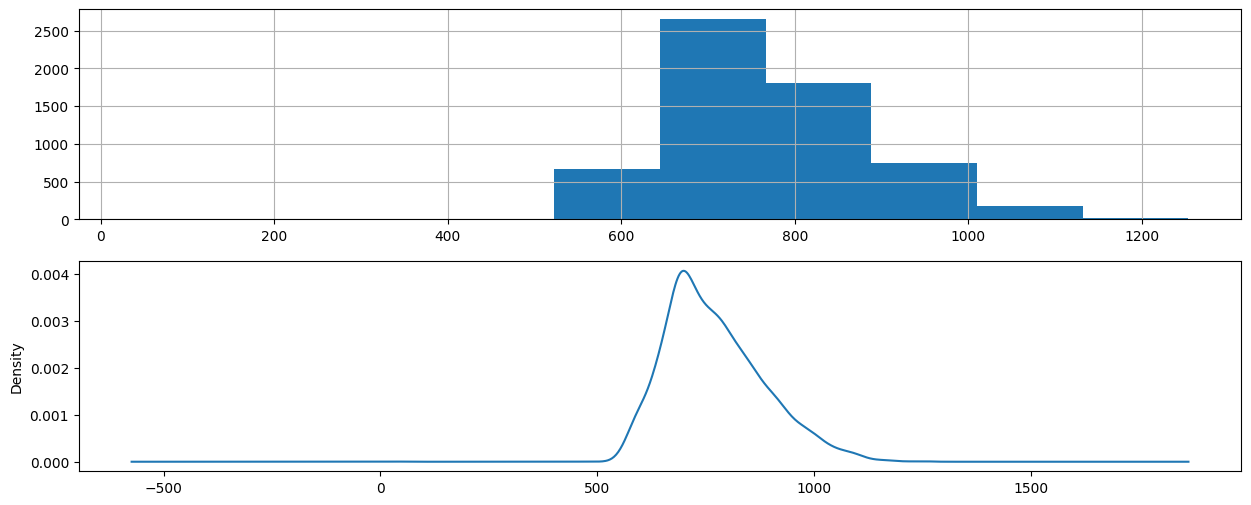

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["PJME_GW"].hist()
plt.subplot(212)
df["PJME_GW"].plot(kind='kde')
plt.show()

Define the TS evaluation function.

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

def timeseries_evaluation_metrics_func(y_true, y_pred, model_name):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate raw error metrics
    mse = metrics.mean_squared_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)


    print(f'Evaluation metric results for {model_name}:-')
    print(f' MSE is : {mse}')
    print(f' MAE is : {mae}')
    print(f' RMSE is : {rmse}')
    print(f' MAPE is : {mape}')
    print(f' R2 is : {r2}\n')


ADF test function to check for stationary data.

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['PJME_GW' ],'PJME_GW')

Results of Dickey-Fuller Test for column: PJME_GW
Test Statistic                -8.309223e+00
p-value                        3.829069e-13
No Lags Used                   3.300000e+01
Number of Observations Used    6.025000e+03
Critical Value (1%)           -3.431436e+00
Critical Value (5%)           -2.862020e+00
Critical Value (10%)          -2.567025e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Close is non-stationary and auto-arima handles this internally.

Model training will be done only for the Close column from the dataset. Make a copy of the data and perform the test/train split.

The train will have all the data except the last 30 days and test will contain only the last 30 days to evaluate against predictions.

In [ ]:
X = df[['PJME_GW']]
train, test = X[0:-30], X[-30:]

The pmdarima modeule will help us to identify p, d, q without the hassle of looking at the plot.

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=65786.398, Time=4.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=66388.198, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66231.405, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=65989.929, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=66386.201, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=64818.189, Time=4.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=65381.546, Time=1.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=64780.891, Time=7.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=65349.026, Time=1.00 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=64568.783, Time=10.84 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=64962.647, Time=1.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=64318.195, Time=3.62 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=64324.349, Time=2.76 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=64064.917, Time=17.01 sec
 ARIMA(6,1,0)(0,0

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6029
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -31702.335
Date:                Tue, 05 Dec 2023   AIC                          63424.671
Time:                        11:30:04   BIC                          63491.713
Sample:                             0   HQIC                         63447.947
                               - 6029                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0588      0.483      0.122      0.903      -0.889       1.006
ar.L1          0.3726      0.021     18.089      0.000       0.332       0.413
ar.L2         -1.0007      0.013    -78.572      0.000      -1.026      -0.976
ar.L3          0.5158      0.028     18.238      0.000       0.460       0.571
ar.L4         -0.4268      0.013    -32.762      0.000      -0.452      -0.401
ar.L5         -0.1374      0.016     -8.553      0.000      -0.169      -0.106
ma.L1         -0.2544      0.018    -14.195      0.000      -0.289      -0.219
ma.L2          0.6642      0.009     77.600      0.000       0.647       0.681
ma.L3         -0.6749      0.018    -38.013      0.000      -0.710      -0.640
sigma2      2331.3938     37.037     62.948      0.000    2258.803    2403.985
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               373.61
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.09
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto-ARIMA says **ARIMA(7,1,2)** is the optimal selection for the dataset.

Forecast both results and the confidence for the next 30 days and store it in a DataFrame.

**Confidence** is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence.

**return_conf_int=True:** Whether to get the confidence intervals of the forecasts.

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['PJME_GW_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(6028,6058)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast,'ARIMA')

Evaluation metric results for ARIMA:-
Scaled MSE is : 41896.94925703611
Scaled MAE is : 122.65239858566244
Scaled RMSE is : 204.68744284160695
Scaled MAPE is : 98.95474076368644
Scaled R2 is : -0.41322255888757886



In [ ]:
forecast["new_index"] = range(6028,6058)
forecast = forecast.set_index("new_index")

Plot the results with confidence bounds.

In [ ]:
from plotly import graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train.PJME_GW, mode='lines', name='Train', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test.index, y=test.PJME_GW, mode='lines', name='Test', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=test.index, y=forecast.PJME_GW_pred, mode='lines', name='Predicted', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_conf.index, y=df_conf['Upper_bound'], mode='lines', name='Confidence Interval Upper Bound', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_conf.index, y=df_conf['Lower_bound'], mode='lines', name='Confidence Interval Lower Bound', line=dict(color='purple')))
fig.update_layout(
    title="Train, Test, Predicted, and Confidence Intervals",
    xaxis_title="Date",
    yaxis_title="Values",
    showlegend=True,
    autosize=True
)
fig.show()

Plot the diagnostic Plot.

**Standardized Residual:** It's a measure of the strength of the difference between observed and expected values.

**Histogram plus estimated density:** KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

**Normal Q-Q:** Q-Q plots let you check that the data meet the assumption of normality. They compare the distribution of your data to a normal distribution by plotting the quartiles of your data against the quartiles of a normal distribution. If your data are normally distributed then they should form an approximately straight line.

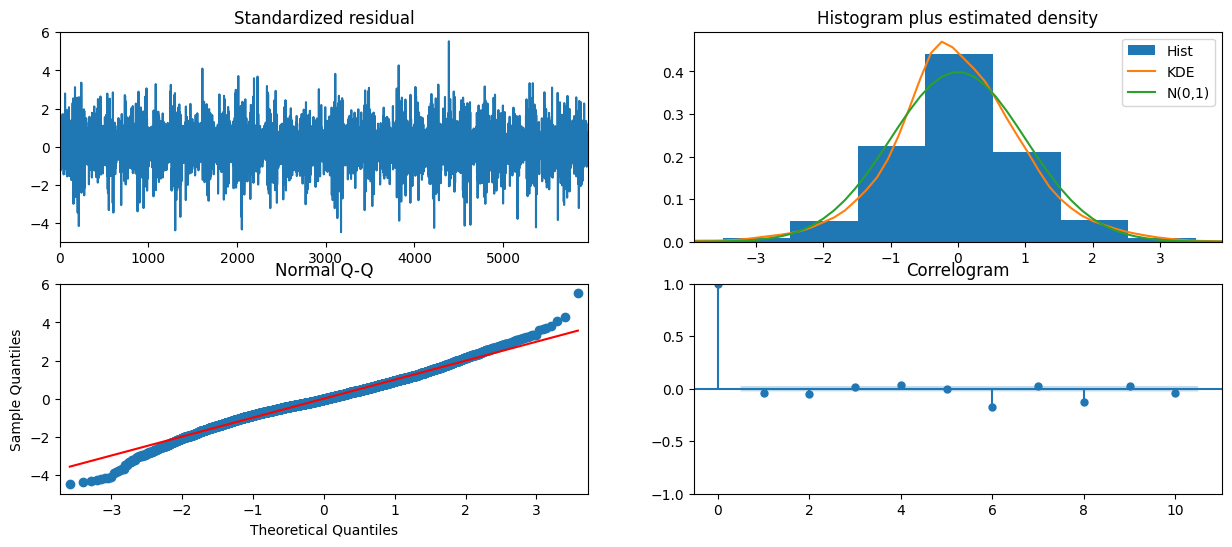

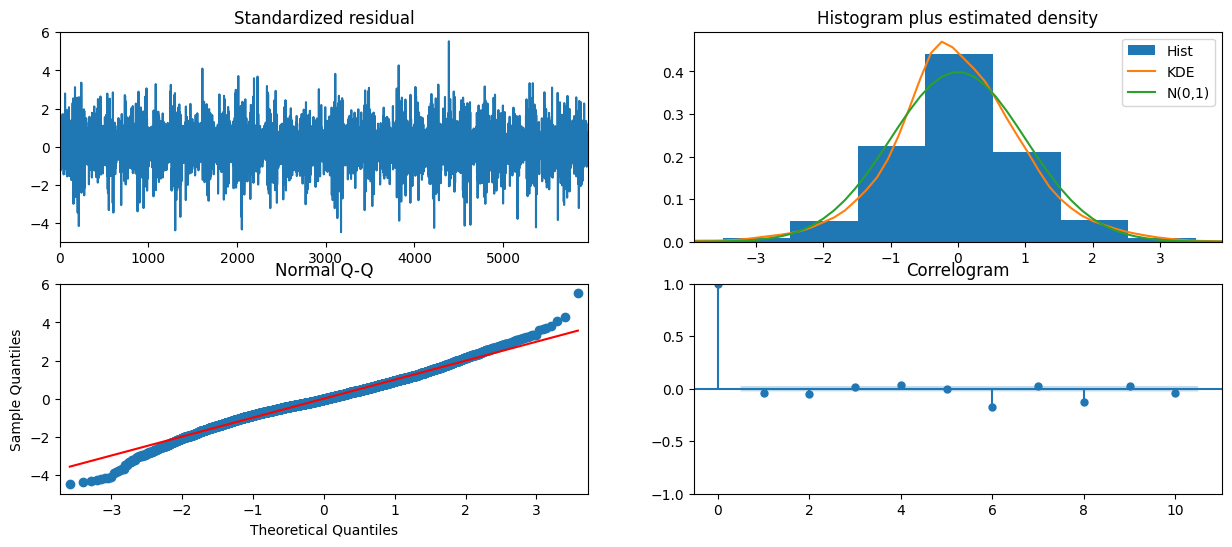

In [ ]:
stepwise_model.plot_diagnostics()

In [ ]:
forecast

PJME_GW_pred
new_index              
5958         664.434427
5959         668.239983
5960         631.260754
5961         610.240343
5962         635.190670
...                 ...
6053         646.466019
6054         645.251509
6055         627.521347
6056         636.585424
6057         650.160826

[100 rows x 1 columns]

##SARIMA DAILY

In [ ]:
df.drop(df.index[-1],inplace=True)

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['PJME_GW' ],'PJME_GW')

In [ ]:
X = df[['PJME_GW']]
train, test = X[0:-30], X[-30:]

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go
from pmdarima.arima import auto_arima
from sklearn import metrics

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train, seasonal=True)

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6028
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -31711.382
Date:                Wed, 06 Dec 2023   AIC                          63440.764
Time:                        18:17:29   BIC                          63501.100
Sample:                             0   HQIC                         63461.712
                               - 6028                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4500      0.019     23.579      0.000       0.413       0.487
ar.L2         -1.0191      0.013    -77.433      0.000      -1.045      -0.993
ar.L3          0.6072      0.026     23.299      0.000       0.556       0.658
ar.L4         -0.4642      0.013    -34.756      0.000      -0.490      -0.438
ar.L5         -0.0974      0.016     -6.198      0.000      -0.128      -0.067
ma.L1         -0.3140      0.015    -20.345      0.000      -0.344      -0.284
ma.L2          0.6371      0.008     80.723      0.000       0.622       0.653
ma.L3         -0.7245      0.015    -47.856      0.000      -0.754      -0.695
sigma2      2321.4083     36.668     63.310      0.000    2249.541    2393.275
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):               354.46
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.11
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['PJME_GW_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(6028,6058)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast,'SARIMA')

Evaluation metric results for SARIMA:-
 MSE is : 12739.84649678905
 MAE is : 91.51384257515835
 RMSE is : 112.87092848377323
 MAPE is : 11.426002502423525
 R2 is : -0.6562339875667442



In [ ]:
forecast["new_index"] = range(6028,6058)
forecast = forecast.set_index("new_index")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train.PJME_GW, mode='lines', name='Train', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test.index, y=test.PJME_GW, mode='lines', name='Test', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=test.index, y=forecast.PJME_GW_pred, mode='lines', name='Predicted', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_conf.index, y=df_conf['Upper_bound'], mode='lines', name='Confidence Interval Upper Bound', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_conf.index, y=df_conf['Lower_bound'], mode='lines', name='Confidence Interval Lower Bound', line=dict(color='purple')))
fig.update_layout(
    title="Train, Test, Predicted, and Confidence Intervals",
    xaxis_title="Date",
    yaxis_title="Values",
    showlegend=True,
    autosize=True
)
fig.show()


##SARIMA

In [ ]:
!pip install -q pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df_pjme['Date'] = df_pjme['Datetime'].dt.strftime('%Y-%m-%d')
df = df_pjme.groupby(df_pjme['Datetime'].dt.to_period("M"))['PJME_GW'].sum().reset_index()


In [ ]:
df.drop(df.index[-1],inplace=True)

In [ ]:
#Train and test
training = df.iloc[:-31]
test = df.iloc[-31:]

In [ ]:
df['PJME_TW'] = df['PJME_GW'] / 1e3
df = df.drop(columns=['PJME_GW'])

In [ ]:
df

Datetime    PJME_TW
0    2002-01  23.089022
1    2002-02  20.320720
2    2002-03  21.483191
3    2002-04  20.516472
4    2002-05  20.886798
..       ...        ...
194  2018-03  22.615842
195  2018-04  19.694352
196  2018-05  21.278364
197  2018-06  23.050418
198  2018-07  27.302373

[199 rows x 2 columns]

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['PJME_TW'])

ADF Test Statistic : -1.8467926046791177
p-value : 0.3574901625170505
#Lags Used : 15
Number of Observations Used : 183
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['PJME_TW First Difference'] = df['PJME_TW'] - df['PJME_TW'].shift(1)

In [ ]:
df['PJME_TW'].shift(1)

0            NaN
1      23.089022
2      20.320720
3      21.483191
4      20.516472
         ...    
194    20.961766
195    22.615842
196    19.694352
197    21.278364
198    23.050418
Name: PJME_TW, Length: 199, dtype: float64

In [ ]:
df['PJME_TW seasonal Difference'] = df['PJME_TW'] - df['PJME_TW'].shift(12)

In [ ]:
df

Datetime    PJME_TW  PJME_TW First Difference  PJME_TW seasonal Difference
0    2002-01  23.089022                       NaN                          NaN
1    2002-02  20.320720                 -2.768302                          NaN
2    2002-03  21.483191                  1.162471                          NaN
3    2002-04  20.516472                 -0.966719                          NaN
4    2002-05  20.886798                  0.370326                          NaN
..       ...        ...                       ...                          ...
194  2018-03  22.615842                  1.654076                     0.101912
195  2018-04  19.694352                 -2.921490                     0.747942
196  2018-05  21.278364                  1.584012                     1.202621
197  2018-06  23.050418                  1.772054                    -0.607809
198  2018-07  27.302373                  4.251955                     0.150597

[199 rows x 4 columns]

In [ ]:
adfuller_test(df['PJME_TW seasonal Difference'].dropna())

ADF Test Statistic : -4.694059868707836
p-value : 8.634177223803158e-05
#Lags Used : 12
Number of Observations Used : 174
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


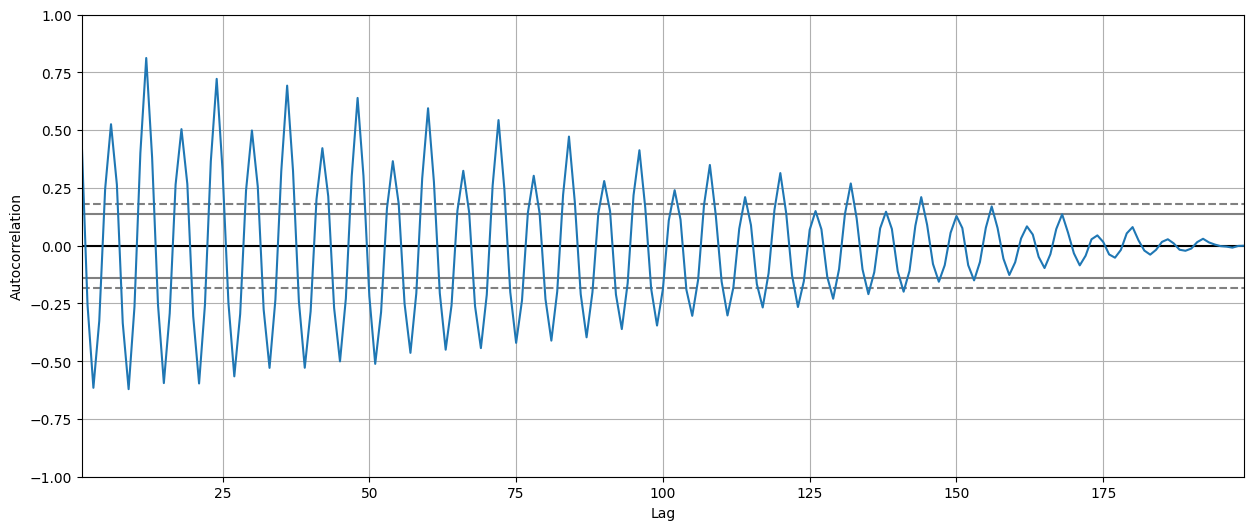

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['PJME_TW'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import statsmodels.api as sm

In [ ]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import pacf, acf

# Calculate ACF and PACF
acf_vals = acf(df['PJME_TW seasonal Difference'].iloc[13:], nlags=40)
pacf_vals = pacf(df['PJME_TW seasonal Difference'].iloc[13:], nlags=40)

# Create the plots
fig = go.Figure()
fig.add_trace(go.Bar(x=np.arange(len(acf_vals)), y=acf_vals, name='ACF'))
fig.update_layout(title='Autocorrelation Function')
fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(x=np.arange(len(pacf_vals)), y=pacf_vals, name='PACF'))
fig.update_layout(title='Partial Autocorrelation Function')
fig.show()

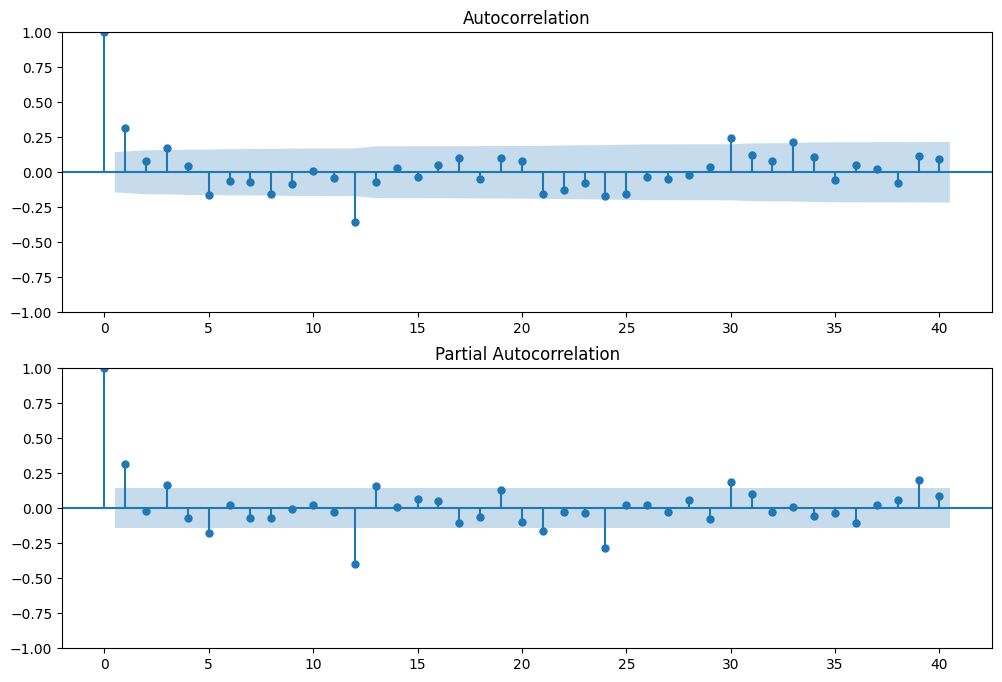

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['PJME_TW seasonal Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['PJME_TW seasonal Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['PJME_TW'],order=(2,1,2))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                PJME_TW   No. Observations:                  199
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -402.602
Date:                Tue, 05 Dec 2023   AIC                            815.203
Time:                        13:12:13   BIC                            831.645
Sample:                             0   HQIC                           821.858
                                - 199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9461      0.077     12.308      0.000       0.795       1.097
ar.L2         -0.7303      0.057    -12.783      0.000      -0.842      -0.618
ma.L1         -1.3322      0.112    -11.878      0.000      -1.552      -1.112
ma.L2          0.3635      0.113      3.213      0.001       0.142       0.585
sigma2         3.3468      0.367      9.113      0.000       2.627       4.067
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.42   Prob(JB):                         0.49
Heteroskedasticity (H):               1.06   Skew:                            -0.14
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df['forecast']=model_fit.predict(start=180,end=198,dynamic=True)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['PJME_TW'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=df.index, y=df['forecast'], mode='lines', name='Forecast'))
fig.update_layout(title='Actual vs Forecast',
                  xaxis_title='Date',
                  yaxis_title='Energy Consumption',
                  #template='plotly_dark'
                  )
fig.show()


In [ ]:
model=sm.tsa.statespace.SARIMAX(df['PJME_TW'],order=(2, 1, 2),seasonal_order=(2,1,2,6))
results=model.fit()

In [ ]:
df['forecast']=results.predict(start=182,end=198,dynamic=True)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['PJME_TW'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=df.index, y=df['forecast'], mode='lines', name='Forecast'))
fig.update_layout(title='Actual vs Forecast',
                  xaxis_title='Date',
                  yaxis_title='Energy Consumption',
                 template='plotly_dark'
                  )
fig.show()


In [ ]:
df

Datetime    PJME_TW  PJME_TW First Difference  \
0    2002-01  23.089022                       NaN   
1    2002-02  20.320720                 -2.768302   
2    2002-03  21.483191                  1.162471   
3    2002-04  20.516472                 -0.966719   
4    2002-05  20.886798                  0.370326   
..       ...        ...                       ...   
194  2018-03  22.615842                  1.654076   
195  2018-04  19.694352                 -2.921490   
196  2018-05  21.278364                  1.584012   
197  2018-06  23.050418                  1.772054   
198  2018-07  27.302373                  4.251955   

     PJME_TW seasonal Difference   forecast  
0                            NaN        NaN  
1                            NaN        NaN  
2                            NaN        NaN  
3                            NaN        NaN  
4                            NaN        NaN  
..                           ...        ...  
194                     0.101912  22.350631  
195                     0.747942  19.534697  
196                     1.202621  21.132280  
197                    -0.607809  23.866905  
198                     0.150597  27.969773  

[199 rows x 5 columns]

In [ ]:
temp =df
temp.dropna(inplace=True)

In [ ]:
y_true = temp['PJME_TW']
y_pred = temp['forecast']
timeseries_evaluation_metrics_func(y_true, y_pred, model_name='sarima')

Evaluation metric results for sarima:-
 MSE is : 0.68837597519101
 MAE is : 0.6774631836350989
 RMSE is : 0.8296842623498472
 MAPE is : 2.9202400526731265
 R2 is : 0.8938134619522591



#EXPT-7

In [ ]:
import pandas as pd
link1 = f'https://drive.google.com/uc?id=1RwNxuRZys2g3b2BxFOh--iEwhgc7QsZ-'
link2 = f'https://drive.google.com/uc?id=1KGT_JucDVi2lUwFChmWrBxkgJBh7XwhA'
df_pjme = pd.read_csv(link1)
df_pjmw = pd.read_csv(link2)

In [ ]:
df_pjmw

Datetime  PJMW_MW
0       2002-12-31 01:00:00   5077.0
1       2002-12-31 02:00:00   4939.0
2       2002-12-31 03:00:00   4885.0
3       2002-12-31 04:00:00   4857.0
4       2002-12-31 05:00:00   4930.0
...                     ...      ...
143201  2018-01-01 20:00:00   8401.0
143202  2018-01-01 21:00:00   8373.0
143203  2018-01-01 22:00:00   8238.0
143204  2018-01-01 23:00:00   7958.0
143205  2018-01-02 00:00:00   7691.0

[143206 rows x 2 columns]

In [ ]:
df_pjme

Datetime  PJME_MW
0       2002-12-31 01:00:00  26498.0
1       2002-12-31 02:00:00  25147.0
2       2002-12-31 03:00:00  24574.0
3       2002-12-31 04:00:00  24393.0
4       2002-12-31 05:00:00  24860.0
...                     ...      ...
145361  2018-01-01 20:00:00  44284.0
145362  2018-01-01 21:00:00  43751.0
145363  2018-01-01 22:00:00  42402.0
145364  2018-01-01 23:00:00  40164.0
145365  2018-01-02 00:00:00  38608.0

[145366 rows x 2 columns]

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df_pjme['Date'] = df_pjme['Datetime'].dt.strftime('%Y-%m-%d')
print(df_pjme)

                  Datetime  PJME_MW        Date
0      2002-12-31 01:00:00  26498.0  2002-12-31
1      2002-12-31 02:00:00  25147.0  2002-12-31
2      2002-12-31 03:00:00  24574.0  2002-12-31
3      2002-12-31 04:00:00  24393.0  2002-12-31
4      2002-12-31 05:00:00  24860.0  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00  44284.0  2018-01-01
145362 2018-01-01 21:00:00  43751.0  2018-01-01
145363 2018-01-01 22:00:00  42402.0  2018-01-01
145364 2018-01-01 23:00:00  40164.0  2018-01-01
145365 2018-01-02 00:00:00  38608.0  2018-01-02

[145366 rows x 3 columns]


In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_MW'].sum().reset_index()

In [ ]:
df1=df[['Date','PJME_MW']]
df1

Date   PJME_MW
0     2002-01-01  714857.0
1     2002-01-02  822277.0
2     2002-01-03  828285.0
3     2002-01-04  809171.0
4     2002-01-05  729723.0
...          ...       ...
6054  2018-07-30  790978.0
6055  2018-07-31  828938.0
6056  2018-08-01  941539.0
6057  2018-08-02  950233.0
6058  2018-08-03   35486.0

[6059 rows x 2 columns]

In [ ]:
df1['PJME_GW'] = df1['PJME_MW'] / 1e3
df1 = df1.drop(columns=['PJME_MW'])

In [ ]:
df_pjmw['Datetime'] = pd.to_datetime(df_pjmw['Datetime'])
df_pjmw['Date'] = df_pjmw['Datetime'].dt.strftime('%Y-%m-%d')
print(df_pjmw)

                  Datetime  PJMW_MW        Date
0      2002-12-31 01:00:00   5077.0  2002-12-31
1      2002-12-31 02:00:00   4939.0  2002-12-31
2      2002-12-31 03:00:00   4885.0  2002-12-31
3      2002-12-31 04:00:00   4857.0  2002-12-31
4      2002-12-31 05:00:00   4930.0  2002-12-31
...                    ...      ...         ...
143201 2018-01-01 20:00:00   8401.0  2018-01-01
143202 2018-01-01 21:00:00   8373.0  2018-01-01
143203 2018-01-01 22:00:00   8238.0  2018-01-01
143204 2018-01-01 23:00:00   7958.0  2018-01-01
143205 2018-01-02 00:00:00   7691.0  2018-01-02

[143206 rows x 3 columns]


In [ ]:
df_pjmw['Datetime'] = pd.to_datetime(df_pjmw['Datetime'])
df= df_pjmw.groupby('Date')['PJMW_MW'].sum().reset_index()

In [ ]:
df2=df[['Date','PJMW_MW']]
df2

Date   PJMW_MW
0     2002-04-01  121237.0
1     2002-04-02  127450.0
2     2002-04-03  127822.0
3     2002-04-04  136099.0
4     2002-04-05  136467.0
...          ...       ...
5964  2018-07-30  131825.0
5965  2018-07-31  135858.0
5966  2018-08-01  143033.0
5967  2018-08-02  139321.0
5968  2018-08-03    5489.0

[5969 rows x 2 columns]

In [ ]:
df2['PJMW_GW'] = df2['PJMW_MW'] / 1e3
df2 = df2.drop(columns=['PJMW_MW'])

In [ ]:
import pandas as pd
merged_df = pd.merge(df1, df2, on='Date', how='inner')
merged_df

Date  PJME_GW  PJMW_GW
0     2002-04-01  660.494  121.237
1     2002-04-02  687.613  127.450
2     2002-04-03  681.449  127.822
3     2002-04-04  704.041  136.099
4     2002-04-05  718.623  136.467
...          ...      ...      ...
5964  2018-07-30  790.978  131.825
5965  2018-07-31  828.938  135.858
5966  2018-08-01  941.539  143.033
5967  2018-08-02  950.233  139.321
5968  2018-08-03   35.486    5.489

[5969 rows x 3 columns]

In [ ]:
df = merged_df
df

Date  PJME_GW  PJMW_GW
0     2002-04-01  660.494  121.237
1     2002-04-02  687.613  127.450
2     2002-04-03  681.449  127.822
3     2002-04-04  704.041  136.099
4     2002-04-05  718.623  136.467
...          ...      ...      ...
5964  2018-07-30  790.978  131.825
5965  2018-07-31  828.938  135.858
5966  2018-08-01  941.539  143.033
5967  2018-08-02  950.233  139.321
5968  2018-08-03   35.486    5.489

[5969 rows x 3 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = df[(df['Date'] > '2016-01-14') & (df['Date'] <= '2017-01-30')]

In [ ]:
df.columns

Index(['Date', 'PJME_GW', 'PJMW_GW'], dtype='object')

In [ ]:
df.head(10)

Date  PJME_GW  PJMW_GW
5037  2016-01-15  764.267  142.943
5038  2016-01-16  681.176  134.025
5039  2016-01-17  728.423  142.672
5040  2016-01-18  887.930  184.607
5041  2016-01-19  961.848  192.400
5042  2016-01-20  902.689  186.197
5043  2016-01-21  867.547  174.244
5044  2016-01-22  906.943  179.676
5045  2016-01-23  861.253  166.257
5046  2016-01-24  802.438  156.168

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=False, subplot_titles=('PJME_MW Energy Production', 'PJMW_MW Energy Production'))

for c in df[['PJME_GW', 'PJMW_GW']]:
    trace = go.Scatter(x=df['Date'], y=df[c], mode='lines', name=c)
    fig.add_trace(trace, row=1 if c == 'PJME_GW' else 2, col=1)

fig.update_layout(title_text='Energy Production in MW before stationary',
                  xaxis_title='Date',
                  showlegend=True)
fig.show()


Define a time-series evaluation function, as shown below:

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return

Here is the ADF test function to check for stationary data:

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Here is how to check whether the variables are stationary:

In [ ]:
for name, column in df[['PJME_GW', 'PJMW_GW']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: PJME_GW
Test Statistic                  -1.895908
p-value                          0.333988
No Lags Used                    15.000000
Number of Observations Used    366.000000
Critical Value (1%)             -3.448344
Critical Value (5%)             -2.869469
Critical Value (10%)            -2.570994
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: PJMW_GW
Test Statistic                  -2.098503
p-value                          0.245117
No Lags Used                    16.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary




Make a copy of the data, and let’s perform the test train split.
The train will have all the data except the last 30 days, and the test will contain only the last 30 days to evaluate against the predictions.

In [ ]:
X = df[['PJME_GW', 'PJMW_GW']]
train, test = X[0:-30], X[-30:]

Make the data stationary by using Pandas differencing, as shown here:

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

Check whether the variables are stationary after first differencing, as
shown here:

In [ ]:
for name, column in train_diff[['PJME_GW', 'PJMW_GW']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: PJME_GW
Test Statistic                -6.319021e+00
p-value                        3.099038e-08
No Lags Used                   1.400000e+01
Number of Observations Used    3.360000e+02
Critical Value (1%)           -3.449963e+00
Critical Value (5%)           -2.870181e+00
Critical Value (10%)          -2.571373e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: PJMW_GW
Test Statistic                -6.770846e+00
p-value                        2.644326e-09
No Lags Used                   1.400000e+01
Number of Observations Used    3.360000e+02
Critical Value (1%)           -3.449963e+00
Critical Value (5%)           -2.870181e+00
Critical Value (10%)          -2.571373e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




Create the plots after making the data stationary, as shown below:

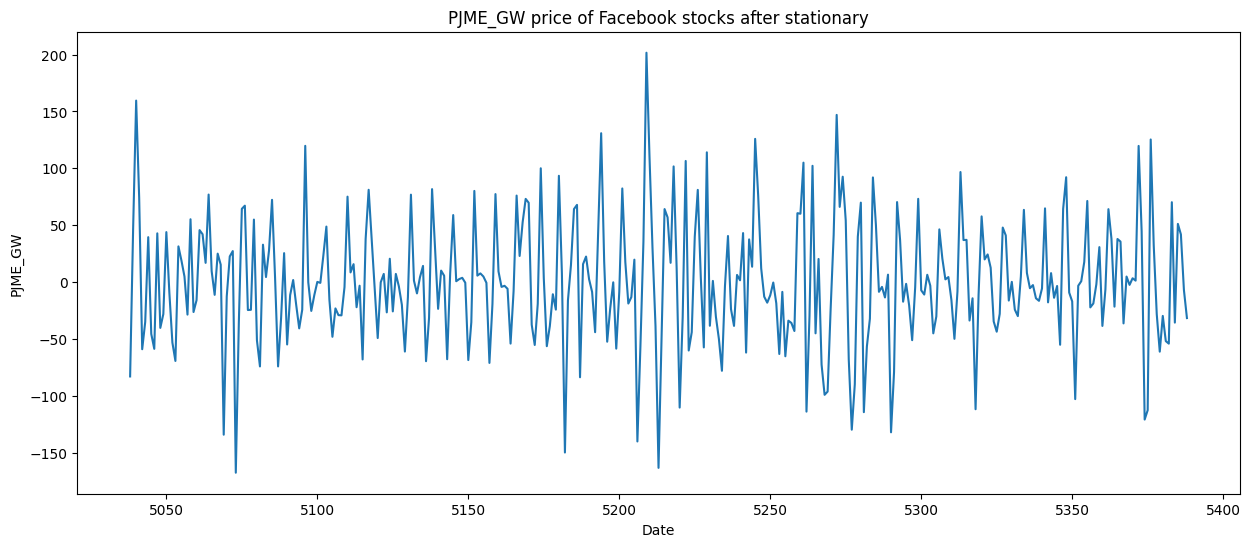

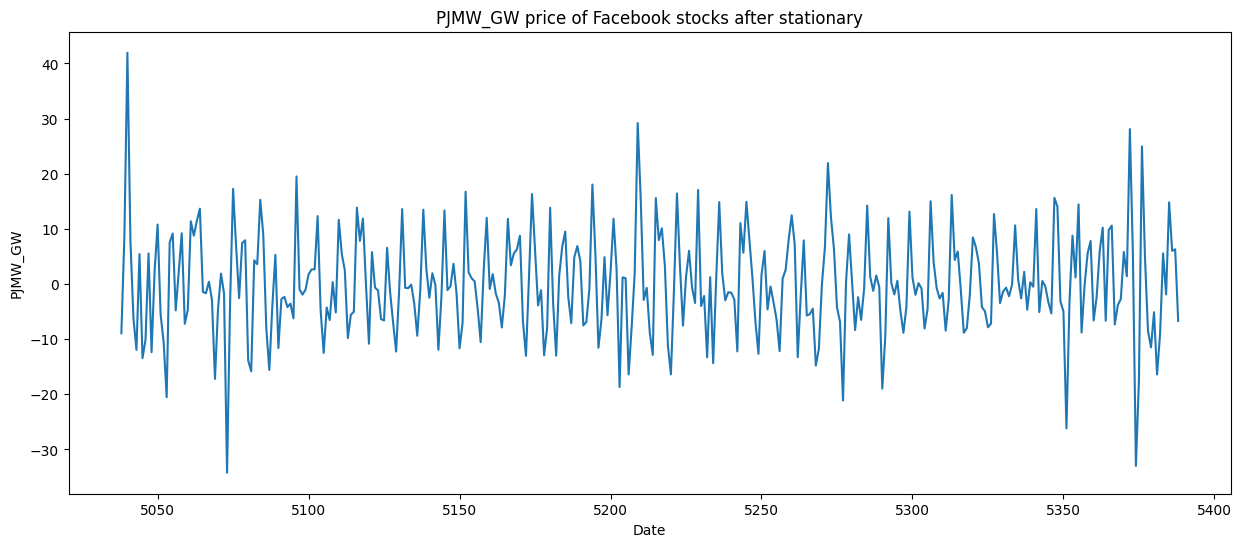

In [ ]:
for c in train_diff[['PJME_GW', 'PJMW_GW']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks after stationary")
    plt.show()

The following loop will plot a histogram and KDE for all the columns
after making it stationary

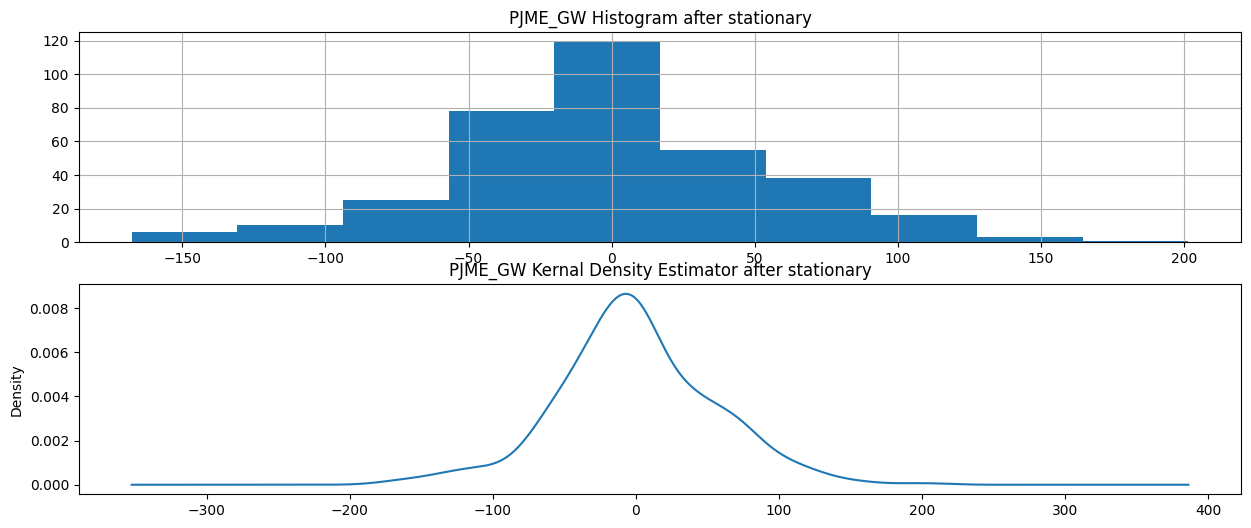

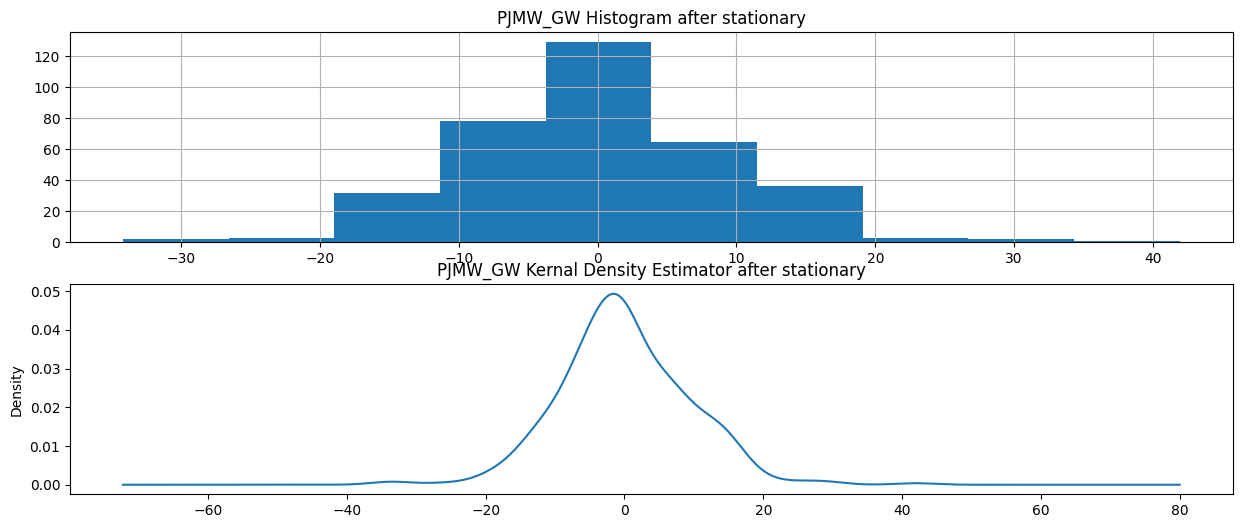

In [ ]:
for c in train_diff[['PJME_GW', 'PJMW_GW']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

PJME_MW  PJMW_MW
5038  -83091.0  -8918.0
5039   47247.0   8647.0
5040  159507.0  41935.0
5041   73918.0   7793.0
5042  -59159.0  -6203.0
5043  -35142.0 -11953.0
5044   39396.0   5432.0
5045  -45690.0 -13419.0
5046  -58815.0 -10089.0
5047   42754.0   5546.0

A **cointegration test** is the co-movement among underlying variables over the long run.

**Cointegration analysis** aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

**Two or more variables are cointegrated if and only if they share common trends.**

Correlation is simply a measure of the degree of mutual association between two or more variables.

We can see that the test says that there is the presence of a long-run relationship between features.

**coint_johansen():**

coint_johansen(endog, det_order, k_ar_diff)

**det_order - int**

-1 - no deterministic terms

0 - constant term

1 - linear trend

**k_ar_diffint - nonnegative**

Number of lagged differences in the model.

The second term in the arguments represents the order of null hypothesis. The third term specifies the number of lagged difference terms used when computing the estimator.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df):
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6):
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train_diff[['PJME_GW', 'PJMW_GW']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
PJME_GW >  215.71    > 12.3212   =>   True
PJMW_GW >  100.23    > 4.1296    =>   True


Fit the VAR model for the AR term between 1 to 9 and choose the best AR component, as shown here:

In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC: {results.aic}, BIC: { results.bic}')

Order : 1, AIC: 11.079640184502582, BIC: 11.145776181436585
Order : 2, AIC: 10.951936039339936, BIC: 11.06239655287009
Order : 3, AIC: 10.887685602826817, BIC: 11.04265926580625
Order : 4, AIC: 10.859128462009929, BIC: 11.058805251747808
Order : 5, AIC: 10.805215053571638, BIC: 11.049786305164904
Order : 6, AIC: 10.794129295575052, BIC: 11.083787715409299
Order : 7, AIC: 10.783779894267951, BIC: 11.11871957369005
Order : 8, AIC: 10.762165807538471, BIC: 11.142582236703609
Order : 9, AIC: 10.773146332856992, BIC: 11.199236414752837


To make data stationary, we used Pandas differencing after forecasting
the results. We need to inverse the result to the original scale. As we don’t
have a Pandas function for this, let’s define a custom function to inverse
Pandas differencing.

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Autoregressive AR(4) appears to be providing the least Akaike
Information Criterion (AIC) and Bayesian Information Criterion (BIC), so
let’s fit and forecast.

AIC and BIC are two ways of scoring a model based on its log
likelihood and complexity.

In [ ]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['PJME_GW', 'PJMW_GW']].values, steps=30)
df_pred = pd.DataFrame(z, columns=['PJME_GW', 'PJMW_GW'])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Dec, 2023
Time:                     15:45:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.0588
Nobs:                     347.000    HQIC:                   10.9386
Log likelihood:          -2850.80    FPE:                    52007.9
AIC:                      10.8591    Det(Omega_mle):         49411.6
--------------------------------------------------------------------
Results for equation PJME_GW
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.372363         2.616220           -0.142           0.887
L1.PJME_GW        -0.146419         0.096731           -1.514           0.130
L1.PJMW_GW         2.423367         0.568175            4.265         

Arrange an index for aligning plots, as shown below:

In [ ]:
df_pred["new_index"] = range(5388,5418)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

PJME_GW   PJMW_GW
new_index                     
5388      -14.564428 -5.078256
5389        4.989647  0.617684
5390        8.540920  0.737674
5391       -1.965296  0.638703
5392       -1.419596  0.343347
5393       -0.164738 -0.271584
5394       -0.652802 -0.290162
5395        0.329149 -0.190439
5396       -0.501476 -0.150793
5397       -0.999484 -0.089187
5398       -0.520766 -0.058269
5399       -0.292111 -0.058634
5400       -0.183309 -0.079838
5401       -0.274795 -0.105964
5402       -0.460975 -0.116986
5403       -0.503946 -0.111232
5404       -0.458076 -0.098327
5405       -0.394618 -0.090152
5406       -0.362629 -0.090706
5407       -0.376470 -0.095731
5408       -0.401826 -0.099932
5409       -0.415946 -0.100753
5410       -0.414873 -0.099080
5411       -0.405888 -0.097219
5412       -0.399362 -0.096516
5413       -0.398431 -0.096919
5414       -0.400968 -0.097652
5415       -0.403710 -0.098063
5416       -0.404676 -0.098026
5417       -0.404094 -0.097775

Let’s inverse the differenced prediction, as shown below:

In [ ]:
res = inverse_diff(df[['PJME_GW', 'PJMW_GW']],df_pred)

In [ ]:
res

PJME_GW   PJMW_GW  PJME_GW_1st_inv_diff  PJMW_GW_1st_inv_diff
new_index                                                                 
5388      -14.564428 -5.078256            788.332572            153.359744
5389        4.989647  0.617684            793.322219            153.977428
5390        8.540920  0.737674            801.863139            154.715103
5391       -1.965296  0.638703            799.897843            155.353806
5392       -1.419596  0.343347            798.478246            155.697153
5393       -0.164738 -0.271584            798.313508            155.425569
5394       -0.652802 -0.290162            797.660707            155.135407
5395        0.329149 -0.190439            797.989856            154.944968
5396       -0.501476 -0.150793            797.488379            154.794175
5397       -0.999484 -0.089187            796.488895            154.704988
5398       -0.520766 -0.058269            795.968129            154.646720
5399       -0.292111 -0.058634            795.676018            154.588085
5400       -0.183309 -0.079838            795.492709            154.508248
5401       -0.274795 -0.105964            795.217914            154.402284
5402       -0.460975 -0.116986            794.756939            154.285298
5403       -0.503946 -0.111232            794.252993            154.174066
5404       -0.458076 -0.098327            793.794917            154.075738
5405       -0.394618 -0.090152            793.400299            153.985586
5406       -0.362629 -0.090706            793.037670            153.894879
5407       -0.376470 -0.095731            792.661200            153.799148
5408       -0.401826 -0.099932            792.259374            153.699217
5409       -0.415946 -0.100753            791.843428            153.598464
5410       -0.414873 -0.099080            791.428555            153.499384
5411       -0.405888 -0.097219            791.022667            153.402165
5412       -0.399362 -0.096516            790.623305            153.305649
5413       -0.398431 -0.096919            790.224873            153.208730
5414       -0.400968 -0.097652            789.823905            153.111077
5415       -0.403710 -0.098063            789.420195            153.013014
5416       -0.404676 -0.098026            789.015519            152.914988
5417       -0.404094 -0.097775            788.611424            152.817213

Evaluate the results individually, as shown below:

In [ ]:
for i in ['PJME_GW', 'PJMW_GW',]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for PJME_GW
MSE is : 6024.087788071109
MAE is : 65.01641210490742
RMSE is : 77.61499718528056
MAPE is : 8.533131409493086
R2 is : -0.06657362909221787

Evaluation metric for PJMW_GW
MSE is : 355.286241005864
MAE is : 16.93827823920031
RMSE is : 18.849038198429753
MAPE is : 11.896619600777857
R2 is : -0.177040575904303



Plot the results, as shown below:

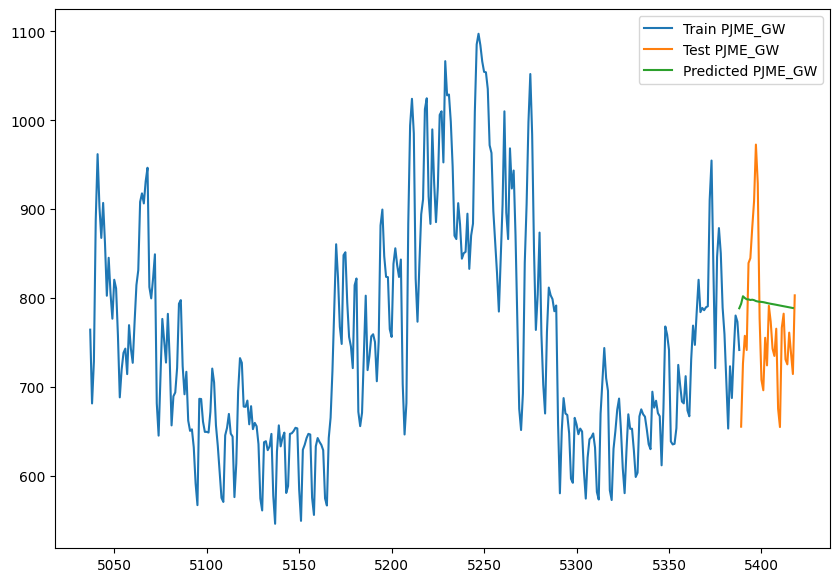

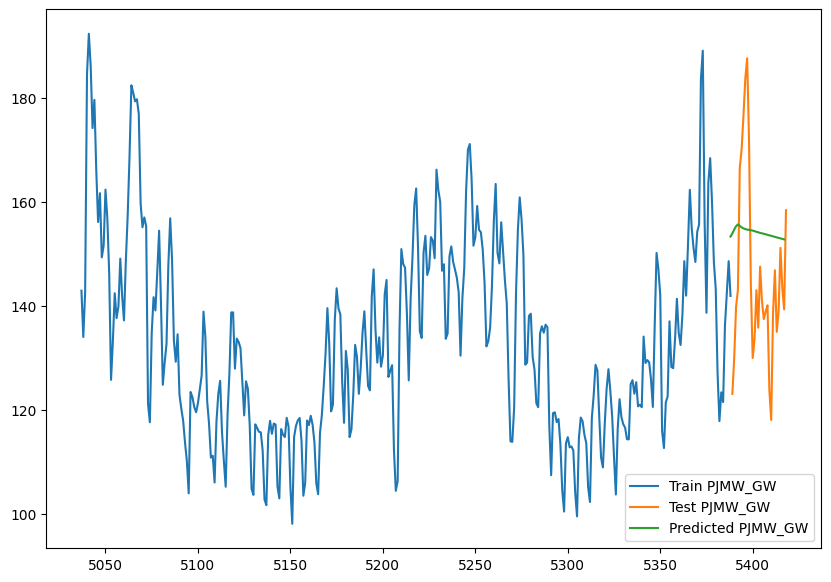

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['PJME_GW', 'PJMW_GW']:

    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

#EXPT-8

In [ ]:
import pandas as pd
link1 = f'https://drive.google.com/uc?id=1RwNxuRZys2g3b2BxFOh--iEwhgc7QsZ-'
df_pjme = pd.read_csv(link1)

In [ ]:
df_pjme

Datetime  PJME_MW
0       2002-12-31 01:00:00  26498.0
1       2002-12-31 02:00:00  25147.0
2       2002-12-31 03:00:00  24574.0
3       2002-12-31 04:00:00  24393.0
4       2002-12-31 05:00:00  24860.0
...                     ...      ...
145361  2018-01-01 20:00:00  44284.0
145362  2018-01-01 21:00:00  43751.0
145363  2018-01-01 22:00:00  42402.0
145364  2018-01-01 23:00:00  40164.0
145365  2018-01-02 00:00:00  38608.0

[145366 rows x 2 columns]

In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df_pjme['Date'] = df_pjme['Datetime'].dt.strftime('%Y-%m-%d')
print(df_pjme)


                  Datetime  PJME_MW        Date
0      2002-12-31 01:00:00  26498.0  2002-12-31
1      2002-12-31 02:00:00  25147.0  2002-12-31
2      2002-12-31 03:00:00  24574.0  2002-12-31
3      2002-12-31 04:00:00  24393.0  2002-12-31
4      2002-12-31 05:00:00  24860.0  2002-12-31
...                    ...      ...         ...
145361 2018-01-01 20:00:00  44284.0  2018-01-01
145362 2018-01-01 21:00:00  43751.0  2018-01-01
145363 2018-01-01 22:00:00  42402.0  2018-01-01
145364 2018-01-01 23:00:00  40164.0  2018-01-01
145365 2018-01-02 00:00:00  38608.0  2018-01-02

[145366 rows x 3 columns]


In [ ]:
df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
df= df_pjme.groupby('Date')['PJME_MW'].sum().reset_index()
df

Date   PJME_MW
0     2002-01-01  714857.0
1     2002-01-02  822277.0
2     2002-01-03  828285.0
3     2002-01-04  809171.0
4     2002-01-05  729723.0
...          ...       ...
6054  2018-07-30  790978.0
6055  2018-07-31  828938.0
6056  2018-08-01  941539.0
6057  2018-08-02  950233.0
6058  2018-08-03   35486.0

[6059 rows x 2 columns]

In [ ]:
df['PJME_GW'] = df['PJME_MW'] / 1e3
df = df.drop(columns=['PJME_MW'])

##CNN Model

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from sklearn import metrics

In [ ]:
def train_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(0, len(sequence)-30):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)


def test_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(len(sequence)-30, len(sequence)):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

In [ ]:
raw_sequence = df['PJME_GW']
steps = 30

X, y = train_split_sequence(raw_sequence, steps)

In [ ]:
print("**************************************")
print("The input to the CNN :\n", raw_sequence)
print("**************************************")
print("The features (X), lagged values of time series, for our CNN Model")
print(X)
print("**************************************")
print("The respective observed values (y) of sequence for training our CNN Model")
print(y)
print("**************************************")

**************************************
The input to the CNN :
 0       714.857
1       822.277
2       828.285
3       809.171
4       729.723
         ...   
6054    790.978
6055    828.938
6056    941.539
6057    950.233
6058     35.486
Name: PJME_GW, Length: 6059, dtype: float64
**************************************
The features (X), lagged values of time series, for our CNN Model
[[ 714.857  822.277  828.285 ...  707.708  696.677  685.796]
 [ 822.277  828.285  809.171 ...  696.677  685.796  729.02 ]
 [ 828.285  809.171  729.723 ...  685.796  729.02   711.909]
 ...
 [1085.235 1086.193  951.667 ...  771.91   790.978  828.938]
 [1086.193  951.667 1017.657 ...  790.978  828.938  941.539]
 [ 951.667 1017.657  939.486 ...  828.938  941.539  950.233]]
**************************************
The respective observed values (y) of sequence for training our CNN Model
[729.02  711.909 687.53  ... 941.539 950.233  35.486]
**************************************


In [ ]:
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping, the shape of input X")
print(X.shape)
print("**************************************")
print("**************************************")
print("The final form of input feature matrix X is")
print(X)
print("**************************************")
print("**************************************")
print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert\n"
,"a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************")
print("**************************************")

After reshaping, the shape of input X
(6029, 30, 1)
**************************************
**************************************
The final form of input feature matrix X is
[[[ 714.857]
  [ 822.277]
  [ 828.285]
  ...
  [ 707.708]
  [ 696.677]
  [ 685.796]]

 [[ 822.277]
  [ 828.285]
  [ 809.171]
  ...
  [ 696.677]
  [ 685.796]
  [ 729.02 ]]

 [[ 828.285]
  [ 809.171]
  [ 729.723]
  ...
  [ 685.796]
  [ 729.02 ]
  [ 711.909]]

 ...

 [[1085.235]
  [1086.193]
  [ 951.667]
  ...
  [ 771.91 ]
  [ 790.978]
  [ 828.938]]

 [[1086.193]
  [ 951.667]
  [1017.657]
  ...
  [ 790.978]
  [ 828.938]
  [ 941.539]]

 [[ 951.667]
  [1017.657]
  [ 939.486]
  ...
  [ 828.938]
  [ 941.539]
  [ 950.233]]]
**************************************
**************************************
Feature matrix X is ready for input to CNN model. We have used feature engineering to convert
 a sequence to matrix with image matrix shape to find patterns in sequence
**************************************
******************

In [ ]:
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping, the shape of input X")
print(X.shape)
print("**************************************")
print("**************************************")
print("The final form of input feature matrix X is")
print(X)
print("**************************************")
print("**************************************")
print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert\n"
,"a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************")
print("**************************************")

After reshaping, the shape of input X
(6029, 30, 1)
**************************************
**************************************
The final form of input feature matrix X is
[[[ 714.857]
  [ 822.277]
  [ 828.285]
  ...
  [ 707.708]
  [ 696.677]
  [ 685.796]]

 [[ 822.277]
  [ 828.285]
  [ 809.171]
  ...
  [ 696.677]
  [ 685.796]
  [ 729.02 ]]

 [[ 828.285]
  [ 809.171]
  [ 729.723]
  ...
  [ 685.796]
  [ 729.02 ]
  [ 711.909]]

 ...

 [[1085.235]
  [1086.193]
  [ 951.667]
  ...
  [ 771.91 ]
  [ 790.978]
  [ 828.938]]

 [[1086.193]
  [ 951.667]
  [1017.657]
  ...
  [ 790.978]
  [ 828.938]
  [ 941.539]]

 [[ 951.667]
  [1017.657]
  [ 939.486]
  ...
  [ 828.938]
  [ 941.539]
  [ 950.233]]]
**************************************
**************************************
Feature matrix X is ready for input to CNN model. We have used feature engineering to convert
 a sequence to matrix with image matrix shape to find patterns in sequence
**************************************
******************

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 64)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 100)               89700     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 89993 (351.54 KB)
Trainable params: 89993 (351.54 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
189/189 [==============================] - 17s 13ms/step - loss: 18134.3145
Epoch 2/50
189/189 [==============================] - 2s 9ms/step - loss: 6418.6846
Epoch 3/50
189/189 [==============================] - 1s 7ms/step - loss: 5566.6543
Epoch 4/50
189/189 [==============================] - 2s 8ms/step - loss: 5384.7524
Epoch 5/50
189/189 [==============================] - 1s 6ms/step - loss: 5389.0596
Epoch 6/50
189/189 [==============================] - 1s 7ms/step - loss: 5437.2261
Epoch 7/50
189/189 [==============================] - 1s 7ms/step - loss: 5183.6035
Epoch 8/50
189/189 [==============================] - 1s 7ms/step - loss: 5118.5352
Epoch 9/50
189/189 [==============================] - 1s 7ms/step - loss: 5148.3350
Epoch 10/50
189/189 [==============================] - 2s 11ms/step - loss: 5408.9126
Epoch 11/50
189/189 [==============================] - 2s 9ms/step - loss: 5296.1670
Epoch 12/50
189/189 [==============================] - 1s 7ms/step - l

In [ ]:
x_test, y_test = train_split_sequence(raw_sequence, steps)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))
y_pred = model.predict(x_test, verbose=0)

print(f"The next predicted output vs original is:")
data = pd.DataFrame(y_pred, columns=['y_pred'])
data["y_test"] = y_test
data.head()

The next predicted output vs original is:


y_pred   y_test
0  739.903320  729.020
1  681.795532  711.909
2  667.406982  687.530
3  642.321594  686.370
4  698.478455  781.528

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Assuming 'y_pred' and 'y_test' are NumPy arrays or lists
# If 'y_test' is normalized, you may want to inverse transform it using the scaler

# Create a DataFrame
pred = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test': y_test})

# Create a scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=pred.index, y=pred['y_test'], mode='lines', name='Original'))
fig.add_trace(go.Scatter(x=pred.index, y=pred['y_pred'], mode='lines', name='Predicted'))

fig.update_layout(title='Original vs Predicted Values',
                  xaxis_title='Index',
                  yaxis_title='Value',
                  legend=dict(x=0, y=1, traceorder='normal'))

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Assuming 'y_pred' and 'y_test' are NumPy arrays or lists
# If 'y_test' is normalized, you may want to inverse transform it using the scaler

# Create a DataFrame
pred = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_test': y_test})

# Select only the last 30 values
last_30_values = pred.iloc[-30:]

# Create a scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=last_30_values.index, y=last_30_values['y_test'], mode='lines', name='Original'))
fig.add_trace(go.Scatter(x=last_30_values.index, y=last_30_values['y_pred'], mode='lines', name='Predicted'))

fig.update_layout(title='Original vs Predicted Values (Last 30)',
                  xaxis_title='Index',
                  yaxis_title='Value',
                  legend=dict(x=0, y=1, traceorder='normal'))

# Show the plot
fig.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

6006.541344241633

In [ ]:
timeseries_evaluation_metrics_func(y_test, y_pred , 'CNN')

Evaluation metric results for CNN:-
 MSE is : 6006.541344241633
 MAE is : 60.28522442658336
 RMSE is : 77.5018796174753
 MAPE is : 17.13735645535884
 R2 is : 0.5311910847371688



#EXPT-9

In [ ]:
!pip install arch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 13.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from arch import arch_model

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [ ]:
def GARCH(column_name,p,q):
  print("\n",column_name, "Graph")
  df[column_name].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(column_name)
  plt.title(column_name)
  plt.show()

  new_df = df[column_name]

  print("\nPACF Graph")
  plot_pacf(new_df)
  plt.show()

  test_size = 30
  train, test = new_df[:-test_size], new_df[-test_size:]

  model = arch_model(train, p=p, q=q)
  model_fit = model.fit()
  print(model_fit.summary())
  forecast = model_fit.forecast()

  return forecast

def predict_volatility(column_name, p, q):
  new_df = df[column_name]
  rolling_predictions = []
  test_size = 30

  for i in range(test_size):
    train = new_df[:-(test_size-i)]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])

  plt.figure(figsize=(10,4))
  true, = plt.plot(df[column_name][-test_size:])
  preds, = plt.plot(rolling_predictions)
  plt.title(f'Volatility Prediction - Rolling forecast for GARCH[{p}, {q}]', fontsize=20)
  plt.legend([ 'True Volatility', 'Predicted Volatility'], fontsize=16)
  return rolling_predictions


 PJME_GW Graph


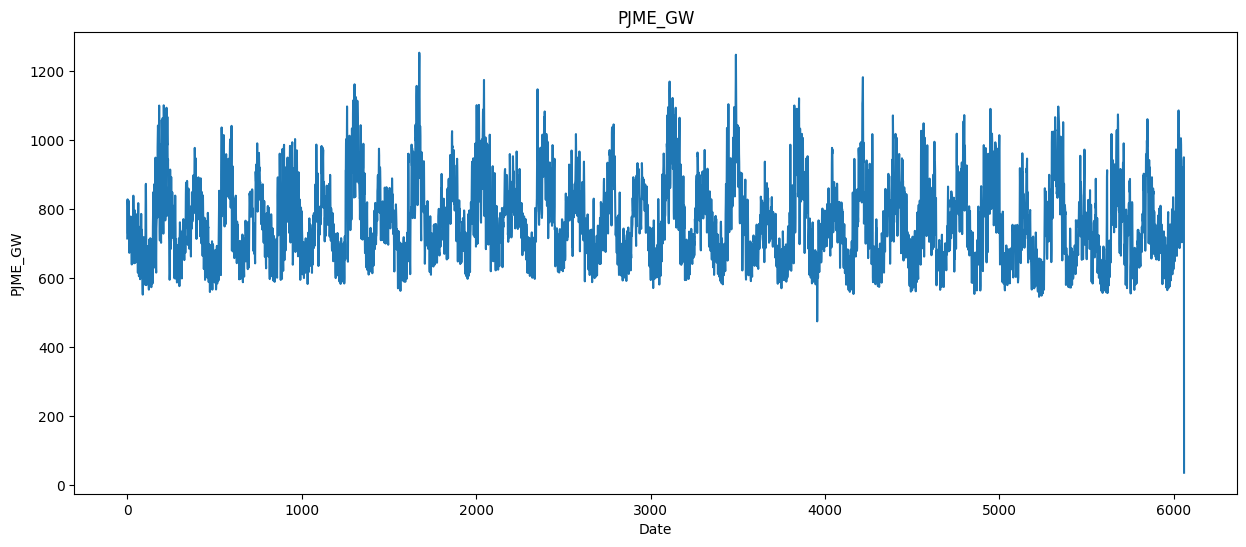


PACF Graph


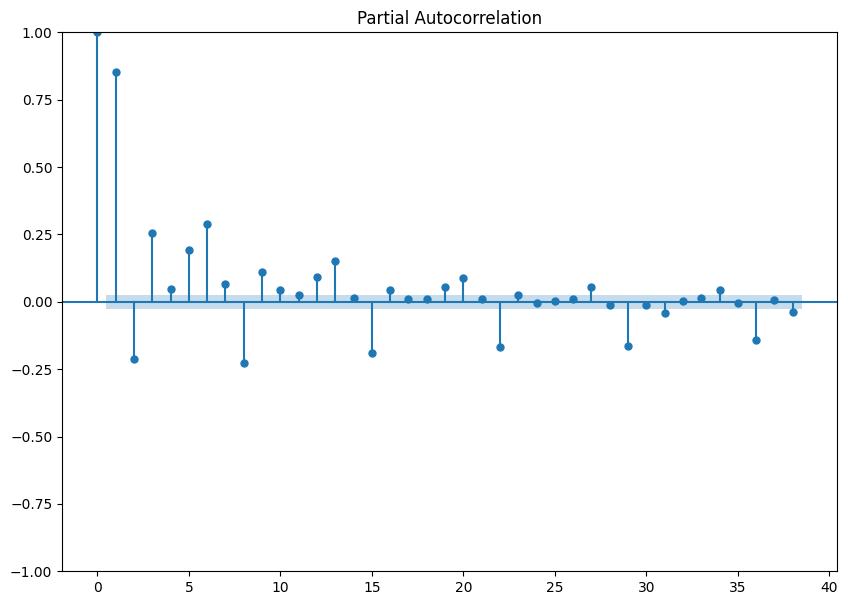

Iteration:      1,   Func. Count:      7,   Neg. LLF: 38672.5142133285
Iteration:      2,   Func. Count:     14,   Neg. LLF: 49169.31228204647
Iteration:      3,   Func. Count:     22,   Neg. LLF: 35984.99961612966
Iteration:      4,   Func. Count:     28,   Neg. LLF: 36323.881407553956
Iteration:      5,   Func. Count:     35,   Neg. LLF: 36071.64016700398
Iteration:      6,   Func. Count:     42,   Neg. LLF: 35978.70127290316
Iteration:      7,   Func. Count:     48,   Neg. LLF: 35978.425658950364
Iteration:      8,   Func. Count:     54,   Neg. LLF: 35978.32090801866
Iteration:      9,   Func. Count:     60,   Neg. LLF: 35977.628186489426
Iteration:     10,   Func. Count:     66,   Neg. LLF: 35973.91920579017
Iteration:     11,   Func. Count:     72,   Neg. LLF: 35966.98251406842
Iteration:     12,   Func. Count:     78,   Neg. LLF: 35951.369623703584
Iteration:     13,   Func. Count:     84,   Neg. LLF: 35918.51105050158
Iteration:     14,   Func. Count:     90,   Neg. LLF: 35889.4

In [ ]:
forecast = GARCH("PJME_GW", 1 ,2)
print("\nPredicting volatility")

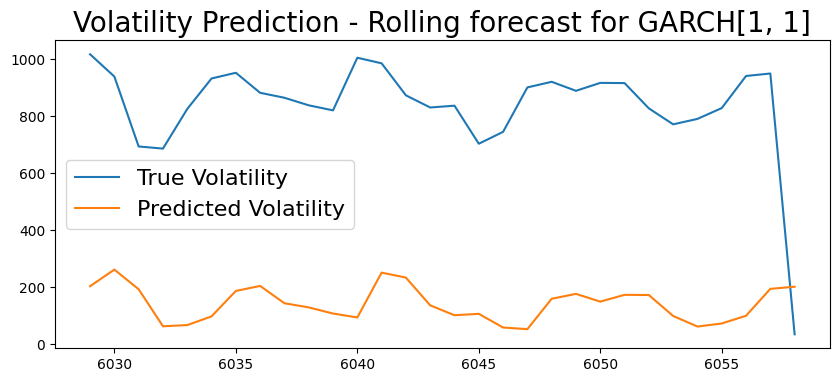

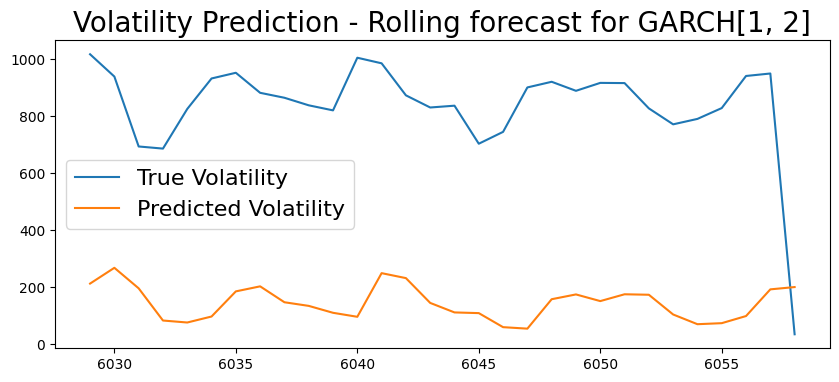

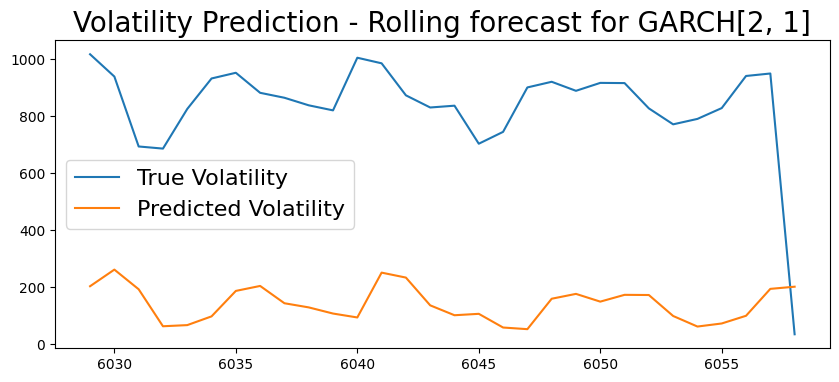

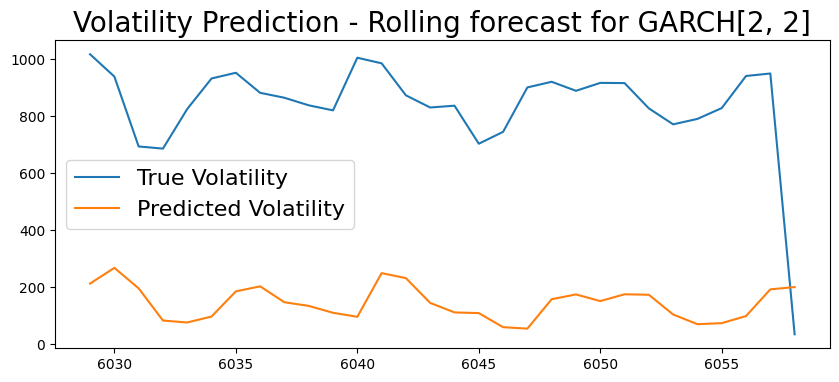

In [ ]:
for i in range(2):
  for j in range(2):
    predict_volatility("PJME_GW", i+1, j+1)

In [ ]:
X = df[['PJME_GW' ]]
train, test = X[0:-30], X[-30:]

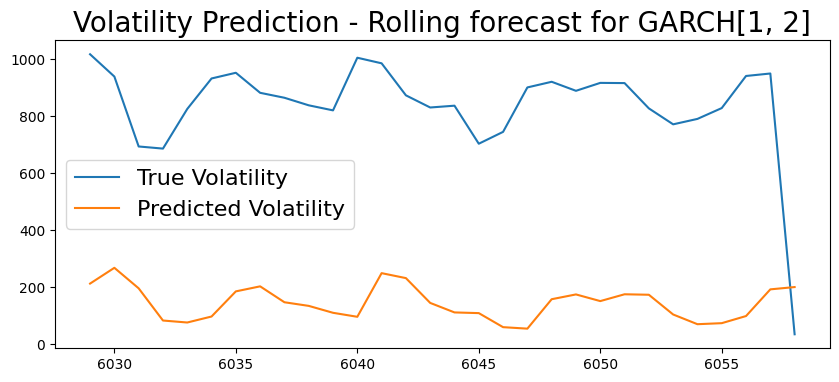

In [ ]:
forecast = predict_volatility("PJME_GW", 1, 2)

In [ ]:
timeseries_evaluation_metrics_func(test, forecast , 'ARCH/GARCH')

Evaluation metric results for ARCH/GARCH:-
 MSE is : 511279.4478671986
 MAE is : 703.3964774937814
 RMSE is : 715.0380744178583
 MAPE is : 90.5720945403086
 R2 is : -16.245925119480308



# Result

In [ ]:
import plotly.graph_objects as go

# Root Mean Square values
rms_values = [204, 116, 77, 715]
models = ['ARIMA', 'SARIMA', 'CNN', 'GARCH']
colors = ['red', 'green', 'blue', 'orange']

# Create a bar plot
fig = go.Figure()

for model, rms, color in zip(models, rms_values, colors):
    fig.add_trace(go.Bar(x=[model], y=[rms], marker_color=color, name=model))
    # Add annotation
    fig.add_annotation(x=model, y=rms, text=str(rms),
                       showarrow=True, arrowhead=4, ax=0, ay=-40)

fig.update_layout(title='Root Mean Square Values Comparison',
                  xaxis_title='Models',
                  yaxis_title='Root Mean Square')

# Show the plot
fig.show()
